In [2]:
#@title Mount your Google Drive
# If you run this notebook locally or on a cluster (i.e. not on Google Colab)
# you can delete this cell which is specific to Google Colab. You may also
# change the paths for data/logs in Arguments below.
%matplotlib inline
%load_ext autoreload
%autoreload 2

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ls /content/gdrive/Othercomputers/'My Computer'/IFT6135_W25_A2_release/plots

 4.3.1_gpt.png	  4.3.2.png	    gpt_training.png	 metrics_layers_d   old
 4.3.1_lstm.png   4.4.1.png	    layers		 modulo_gpt.png     parameter_metrics
 4.3.1.png	  Binary_ternuary  'lstm training.PNG'	 modulo_lstm.png    wd


In [4]:
!ls /content/gdrive/MyDrive/'Colab Notebooks'/IFT6135_W25_A2_release

'attention_BOS_9+10=19.pdf'		  lstm.py
'attention_BOSĠ9Ġ+Ġ10Ġ=Ġ24.pdf'		  LSTM_separate_metrics.png
'attention_weights_9Ġ+Ġ10Ġ=Ġ19.pdf'	  main.ipynb
'attention_weights_random_sample=0.pdf'   plotter.py
 attention_weights_random_sample.pdf	  __pycache__
'attention_weights_sample=0.pdf'	  README.md
'attention_weights_sample=1.pdf'	  requirements.txt
 checkpointing.py			  run_exp.py
 data.py				  saved_models
 gpt.py					  separate_operations_results.png
 GPT_separate_metrics.png		  trainer.py
 logs					  train.py
 lstm_metrics_detailed.csv		  Upload
 lstm_metrics_summary.csv


In [5]:
!ls /content/

gdrive	sample_data


In [6]:
%cd /content/gdrive/MyDrive/'Colab Notebooks'/IFT6135_W25_A2_release

/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release


In [7]:
import os
print("Current working directory:", os.getcwd())


Current working directory: /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release


In [8]:
#@title Link your assignment folder & install requirements
#@markdown Enter the path to the assignment folder in your Google Drive
# If you run this notebook locally or on a cluster (i.e. not on Google Colab)
# you can delete this cell which is specific to Google Colab. You may also
# change the paths for data/logs in Arguments below.
import sys
import os
import shutil
import warnings

folder = "/content/gdrive/MyDrive/'Colab Notebooks'/IFT6135_W25_A2_release" #@param {type:"string"}
!ln -Ts "$folder" /content/assignment 2> /dev/null

# Add the assignment folder to Python path
if '/content/assignment' not in sys.path:
  sys.path.insert(0, '/content/assignment')

# Check if CUDA is available
import torch
if not torch.cuda.is_available():
  warnings.warn('CUDA is not available.')

In [9]:
%matplotlib inline
import warnings

from dataclasses import dataclass
import torch
from torch import optim
from torchvision.datasets import CIFAR10
from torchvision import transforms
import json
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch.utils.data import DataLoader
import time
import os


# LSTM

In [19]:
import torch
import os
from train import Arguments, train_m_models
import matplotlib.pyplot as plt
import numpy as np

# Define batch sizes and seeds
batch_sizes = [32, 512]  # Only these batch sizes
num_layers = 2           # Only this layer count
seeds = [0, 42]
T = 2 * 10**4 + 1

# Store all metrics for plotting
all_results = {}

args = Arguments()

# === Common Data Configuration ===
args.p = 31
args.operator = "+"
args.r_train = 0.5
args.operation_orders = 2
args.eval_batch_size = 2**12
args.num_workers = 0

# === Common Model Configuration ===
args.model = 'lstm'
args.num_heads = 4
args.num_layers = num_layers  # Fixed to 2 layers
args.embedding_size = 2**7
args.hidden_size = 2**7
args.dropout = 0.0
args.share_embeddings = False
args.bias_classifier = True

# === Common Optimization Configuration ===
args.optimizer = 'adamw'
args.lr = 1e-3
args.weight_decay = 1e0

# === Common Training Configuration ===
args.n_steps = T
args.eval_first = 10**2
args.eval_period = 10**2
args.print_step = 10**2
args.save_model_step = 10**3
args.save_statistic_step = 10**3

# === Common Misc Configuration ===
args.device = "cuda" if torch.cuda.is_available() else "cpu"
args.exp_id = 0
args.seed = 42
args.verbose = True

# Base log directory
base_log_dir = "/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs"

for B in batch_sizes:
    # Set batch-specific parameters
    args.train_batch_size = B
    args.exp_name = f"B={B}"

    # Create directory structure
    model_dir = os.path.join(base_log_dir, args.model)
    layer_dir = os.path.join(model_dir, f"layer_{num_layers}")
    batch_dir = os.path.join(layer_dir, f"b={B}")
    os.makedirs(batch_dir, exist_ok=True)
    args.log_dir = batch_dir

    print(f"\n=== Training with batch size B={B}, layers={num_layers} ===")
    _, all_metrics, _ = train_m_models(args, M=len(seeds), seeds=seeds)

    # Store results
    all_results[B] = all_metrics

print("\nTraining completed for all specified configurations!")


=== Training with batch size B=32, layers=2 ===
Model 1/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
eval_batch_size : 4096
num_workers : 0
model : lstm
num_heads : 4
num_layers : 2
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_id : 0
seed : 0
verbose : True
train_batch_size : 32
exp_name : B=32
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_2/b=32
Model : LSTMLM(
  (embedding): Embedding(36, 128, padding_idx=35)
  (lstm): LSTM(
    (layers): ModuleList(
      (0-1): 2 x LSTMCell(
        (input_gate): Linear(in_features=256, out_features=128, bias=True)
        (forget_gate): Linear(in_features=256, out_features=128, bias=True)
        (output_gate): Linear(in_features=256, out_features=128, bias

Training:   0%|          | 0/1334 [00:00<?, ?it/s]


Train loss : 3.501846 | Train accuracy : 0.000000 | Train l2_norm : 76.101074 | Test loss : 3.503038 | Test accuracy : 0.000000 | Test l2_norm : 76.101074 | lr = 0.001


Training:   1%|          | 7/1334 [00:15<46:48,  2.12s/it]


Train loss : 1.732310 | Train accuracy : 0.043750 | Train l2_norm : 69.978722 | Test loss : 1.769353 | Test accuracy : 0.014553 | Test l2_norm : 69.978722 | lr = 0.001


Training:   1%|          | 13/1334 [00:18<14:25,  1.53it/s]


Train loss : 1.677531 | Train accuracy : 0.075000 | Train l2_norm : 64.031654 | Test loss : 1.804543 | Test accuracy : 0.000000 | Test l2_norm : 64.031654 | lr = 0.001


Training:   1%|▏         | 20/1334 [00:21<09:19,  2.35it/s]


Train loss : 1.526529 | Train accuracy : 0.175000 | Train l2_norm : 59.676861 | Test loss : 2.016276 | Test accuracy : 0.006237 | Test l2_norm : 59.676861 | lr = 0.001


Training:   2%|▏         | 27/1334 [00:24<07:24,  2.94it/s]


Train loss : 1.280066 | Train accuracy : 0.341667 | Train l2_norm : 56.648655 | Test loss : 2.303284 | Test accuracy : 0.002079 | Test l2_norm : 56.648655 | lr = 0.001


Training:   3%|▎         | 34/1334 [00:26<07:19,  2.96it/s]


Train loss : 0.970896 | Train accuracy : 0.620833 | Train l2_norm : 54.567070 | Test loss : 2.544603 | Test accuracy : 0.000000 | Test l2_norm : 54.567070 | lr = 0.001


Training:   3%|▎         | 40/1334 [00:28<08:42,  2.48it/s]


Train loss : 0.637528 | Train accuracy : 0.864583 | Train l2_norm : 53.087387 | Test loss : 2.713971 | Test accuracy : 0.000000 | Test l2_norm : 53.087387 | lr = 0.001


Training:   3%|▎         | 46/1334 [00:31<08:18,  2.58it/s]


Train loss : 0.404752 | Train accuracy : 0.960417 | Train l2_norm : 51.924416 | Test loss : 2.849575 | Test accuracy : 0.000000 | Test l2_norm : 51.924416 | lr = 0.001


Training:   4%|▍         | 53/1334 [00:33<06:57,  3.07it/s]


Train loss : 0.241333 | Train accuracy : 0.997917 | Train l2_norm : 50.719776 | Test loss : 2.888042 | Test accuracy : 0.000000 | Test l2_norm : 50.719776 | lr = 0.001


Training:   4%|▍         | 60/1334 [00:35<07:05,  3.00it/s]


Train loss : 0.164173 | Train accuracy : 1.000000 | Train l2_norm : 49.333355 | Test loss : 2.902251 | Test accuracy : 0.004158 | Test l2_norm : 49.333355 | lr = 0.001


Training:   5%|▌         | 67/1334 [00:38<07:25,  2.84it/s]


Train loss : 0.126616 | Train accuracy : 1.000000 | Train l2_norm : 47.890598 | Test loss : 2.851321 | Test accuracy : 0.006237 | Test l2_norm : 47.890598 | lr = 0.001


Training:   5%|▌         | 73/1334 [00:40<06:44,  3.12it/s]


Train loss : 0.106305 | Train accuracy : 1.000000 | Train l2_norm : 46.581135 | Test loss : 2.799593 | Test accuracy : 0.006237 | Test l2_norm : 46.581135 | lr = 0.001


Training:   6%|▌         | 80/1334 [00:43<09:45,  2.14it/s]


Train loss : 0.093081 | Train accuracy : 1.000000 | Train l2_norm : 45.472191 | Test loss : 2.732184 | Test accuracy : 0.008316 | Test l2_norm : 45.472191 | lr = 0.001


Training:   7%|▋         | 87/1334 [00:45<07:23,  2.81it/s]


Train loss : 0.080917 | Train accuracy : 1.000000 | Train l2_norm : 44.661625 | Test loss : 2.654660 | Test accuracy : 0.020790 | Test l2_norm : 44.661625 | lr = 0.001


Training:   7%|▋         | 93/1334 [00:47<06:24,  3.23it/s]


Train loss : 0.076831 | Train accuracy : 1.000000 | Train l2_norm : 43.890865 | Test loss : 2.589583 | Test accuracy : 0.018711 | Test l2_norm : 43.890865 | lr = 0.001


Training:   7%|▋         | 100/1334 [00:49<06:43,  3.06it/s]


Train loss : 0.078502 | Train accuracy : 1.000000 | Train l2_norm : 43.284317 | Test loss : 2.509245 | Test accuracy : 0.020790 | Test l2_norm : 43.284317 | lr = 0.001


Training:   8%|▊         | 107/1334 [00:52<06:40,  3.06it/s]


Train loss : 0.060561 | Train accuracy : 1.000000 | Train l2_norm : 42.876637 | Test loss : 2.429389 | Test accuracy : 0.033264 | Test l2_norm : 42.876637 | lr = 0.001


Training:   8%|▊         | 113/1334 [00:54<07:36,  2.68it/s]


Train loss : 0.060377 | Train accuracy : 1.000000 | Train l2_norm : 42.293911 | Test loss : 2.355429 | Test accuracy : 0.056133 | Test l2_norm : 42.293911 | lr = 0.001


Training:   9%|▉         | 120/1334 [00:57<08:42,  2.32it/s]


Train loss : 0.054101 | Train accuracy : 1.000000 | Train l2_norm : 41.970413 | Test loss : 2.238917 | Test accuracy : 0.058212 | Test l2_norm : 41.970413 | lr = 0.001


Training:  10%|▉         | 127/1334 [00:59<06:45,  2.98it/s]


Train loss : 0.053801 | Train accuracy : 1.000000 | Train l2_norm : 41.610023 | Test loss : 2.189206 | Test accuracy : 0.064449 | Test l2_norm : 41.610023 | lr = 0.001


Training:  10%|▉         | 133/1334 [01:01<06:07,  3.27it/s]


Train loss : 0.049469 | Train accuracy : 1.000000 | Train l2_norm : 41.282780 | Test loss : 2.055314 | Test accuracy : 0.083160 | Test l2_norm : 41.282780 | lr = 0.001


Training:  10%|█         | 140/1334 [01:03<06:27,  3.08it/s]


Train loss : 0.046096 | Train accuracy : 1.000000 | Train l2_norm : 40.981655 | Test loss : 1.970765 | Test accuracy : 0.095634 | Test l2_norm : 40.981655 | lr = 0.001


Training:  11%|█         | 147/1334 [01:05<06:23,  3.10it/s]


Train loss : 0.038961 | Train accuracy : 1.000000 | Train l2_norm : 40.807751 | Test loss : 1.817862 | Test accuracy : 0.118503 | Test l2_norm : 40.807751 | lr = 0.001


Training:  11%|█▏        | 153/1334 [01:07<07:27,  2.64it/s]


Train loss : 0.040920 | Train accuracy : 1.000000 | Train l2_norm : 40.457153 | Test loss : 1.745098 | Test accuracy : 0.145530 | Test l2_norm : 40.457153 | lr = 0.001


Training:  12%|█▏        | 160/1334 [01:10<07:20,  2.67it/s]


Train loss : 0.038070 | Train accuracy : 1.000000 | Train l2_norm : 40.416924 | Test loss : 1.612353 | Test accuracy : 0.180873 | Test l2_norm : 40.416924 | lr = 0.001


Training:  13%|█▎        | 167/1334 [01:13<06:27,  3.01it/s]


Train loss : 0.035785 | Train accuracy : 1.000000 | Train l2_norm : 40.095860 | Test loss : 1.496562 | Test accuracy : 0.187110 | Test l2_norm : 40.095860 | lr = 0.001


Training:  13%|█▎        | 174/1334 [01:15<06:13,  3.11it/s]


Train loss : 0.032126 | Train accuracy : 1.000000 | Train l2_norm : 40.000725 | Test loss : 1.387126 | Test accuracy : 0.220374 | Test l2_norm : 40.000725 | lr = 0.001


Training:  13%|█▎        | 180/1334 [01:17<07:35,  2.53it/s]


Train loss : 0.030033 | Train accuracy : 1.000000 | Train l2_norm : 39.707405 | Test loss : 1.242510 | Test accuracy : 0.301455 | Test l2_norm : 39.707405 | lr = 0.001


Training:  14%|█▍        | 187/1334 [01:19<06:17,  3.04it/s]


Train loss : 0.030297 | Train accuracy : 1.000000 | Train l2_norm : 39.477627 | Test loss : 1.122205 | Test accuracy : 0.349272 | Test l2_norm : 39.477627 | lr = 0.001


Training:  14%|█▍        | 193/1334 [01:21<07:42,  2.46it/s]


Train loss : 0.030618 | Train accuracy : 1.000000 | Train l2_norm : 39.320629 | Test loss : 1.011309 | Test accuracy : 0.417879 | Test l2_norm : 39.320629 | lr = 0.001


Training:  15%|█▍        | 200/1334 [01:24<06:41,  2.82it/s]


Train loss : 0.030635 | Train accuracy : 1.000000 | Train l2_norm : 39.097843 | Test loss : 0.887674 | Test accuracy : 0.469854 | Test l2_norm : 39.097843 | lr = 0.001


Training:  16%|█▌        | 207/1334 [01:26<06:06,  3.07it/s]


Train loss : 0.023708 | Train accuracy : 1.000000 | Train l2_norm : 39.029182 | Test loss : 0.738962 | Test accuracy : 0.573805 | Test l2_norm : 39.029182 | lr = 0.001


Training:  16%|█▌        | 213/1334 [01:28<05:42,  3.27it/s]


Train loss : 0.028673 | Train accuracy : 1.000000 | Train l2_norm : 38.661842 | Test loss : 0.703281 | Test accuracy : 0.586279 | Test l2_norm : 38.661842 | lr = 0.001


Training:  16%|█▋        | 220/1334 [01:30<05:58,  3.11it/s]


Train loss : 0.022707 | Train accuracy : 1.000000 | Train l2_norm : 38.518341 | Test loss : 0.556938 | Test accuracy : 0.713098 | Test l2_norm : 38.518341 | lr = 0.001


Training:  17%|█▋        | 227/1334 [01:33<06:42,  2.75it/s]


Train loss : 0.021729 | Train accuracy : 1.000000 | Train l2_norm : 38.286823 | Test loss : 0.486291 | Test accuracy : 0.765073 | Test l2_norm : 38.286823 | lr = 0.001


Training:  18%|█▊        | 234/1334 [01:36<07:41,  2.38it/s]


Train loss : 0.019860 | Train accuracy : 1.000000 | Train l2_norm : 38.201809 | Test loss : 0.412886 | Test accuracy : 0.804574 | Test l2_norm : 38.201809 | lr = 0.001


Training:  18%|█▊        | 240/1334 [01:37<06:11,  2.94it/s]


Train loss : 0.020516 | Train accuracy : 1.000000 | Train l2_norm : 38.010571 | Test loss : 0.371191 | Test accuracy : 0.827443 | Test l2_norm : 38.010571 | lr = 0.001


Training:  19%|█▊        | 247/1334 [01:40<05:50,  3.10it/s]


Train loss : 0.018499 | Train accuracy : 1.000000 | Train l2_norm : 37.786423 | Test loss : 0.304612 | Test accuracy : 0.904366 | Test l2_norm : 37.786423 | lr = 0.001


Training:  19%|█▉        | 253/1334 [01:41<05:31,  3.26it/s]


Train loss : 0.017511 | Train accuracy : 1.000000 | Train l2_norm : 37.633251 | Test loss : 0.254682 | Test accuracy : 0.920998 | Test l2_norm : 37.633251 | lr = 0.001


Training:  19%|█▉        | 260/1334 [01:44<05:51,  3.06it/s]


Train loss : 0.017404 | Train accuracy : 1.000000 | Train l2_norm : 37.425236 | Test loss : 0.207068 | Test accuracy : 0.954262 | Test l2_norm : 37.425236 | lr = 0.001


Training:  20%|██        | 267/1334 [01:46<07:15,  2.45it/s]


Train loss : 0.017277 | Train accuracy : 1.000000 | Train l2_norm : 37.263248 | Test loss : 0.175933 | Test accuracy : 0.968815 | Test l2_norm : 37.263248 | lr = 0.001


Training:  21%|██        | 274/1334 [01:49<06:40,  2.65it/s]


Train loss : 0.015417 | Train accuracy : 1.000000 | Train l2_norm : 37.187271 | Test loss : 0.145899 | Test accuracy : 0.981289 | Test l2_norm : 37.187271 | lr = 0.001


Training:  21%|██        | 280/1334 [01:51<05:49,  3.01it/s]


Train loss : 0.014501 | Train accuracy : 1.000000 | Train l2_norm : 37.002449 | Test loss : 0.118591 | Test accuracy : 0.993763 | Test l2_norm : 37.002449 | lr = 0.001


Training:  22%|██▏       | 287/1334 [01:53<05:47,  3.02it/s]


Train loss : 0.013211 | Train accuracy : 1.000000 | Train l2_norm : 36.852482 | Test loss : 0.102217 | Test accuracy : 0.989605 | Test l2_norm : 36.852482 | lr = 0.001


Training:  22%|██▏       | 293/1334 [01:55<05:22,  3.23it/s]


Train loss : 0.014964 | Train accuracy : 1.000000 | Train l2_norm : 36.697895 | Test loss : 0.099554 | Test accuracy : 0.991684 | Test l2_norm : 36.697895 | lr = 0.001


Training:  22%|██▏       | 300/1334 [01:57<05:40,  3.04it/s]


Train loss : 0.011834 | Train accuracy : 1.000000 | Train l2_norm : 36.573490 | Test loss : 0.067506 | Test accuracy : 1.000000 | Test l2_norm : 36.573490 | lr = 0.001


Training:  23%|██▎       | 307/1334 [02:00<09:28,  1.80it/s]


Train loss : 0.011884 | Train accuracy : 1.000000 | Train l2_norm : 36.421326 | Test loss : 0.062175 | Test accuracy : 1.000000 | Test l2_norm : 36.421326 | lr = 0.001


Training:  24%|██▎       | 314/1334 [02:03<06:03,  2.80it/s]


Train loss : 0.011307 | Train accuracy : 1.000000 | Train l2_norm : 36.305019 | Test loss : 0.054222 | Test accuracy : 1.000000 | Test l2_norm : 36.305019 | lr = 0.001


Training:  24%|██▍       | 320/1334 [02:05<06:07,  2.76it/s]


Train loss : 0.011597 | Train accuracy : 1.000000 | Train l2_norm : 36.166832 | Test loss : 0.055157 | Test accuracy : 1.000000 | Test l2_norm : 36.166832 | lr = 0.001


Training:  25%|██▍       | 327/1334 [02:07<05:32,  3.03it/s]


Train loss : 0.010195 | Train accuracy : 1.000000 | Train l2_norm : 36.106819 | Test loss : 0.041676 | Test accuracy : 1.000000 | Test l2_norm : 36.106819 | lr = 0.001


Training:  25%|██▍       | 333/1334 [02:09<05:06,  3.26it/s]


Train loss : 0.009565 | Train accuracy : 1.000000 | Train l2_norm : 35.991817 | Test loss : 0.034813 | Test accuracy : 1.000000 | Test l2_norm : 35.991817 | lr = 0.001


Training:  25%|██▌       | 340/1334 [02:11<05:27,  3.03it/s]


Train loss : 0.008847 | Train accuracy : 1.000000 | Train l2_norm : 35.898491 | Test loss : 0.029976 | Test accuracy : 1.000000 | Test l2_norm : 35.898491 | lr = 0.001


Training:  26%|██▌       | 347/1334 [02:14<07:23,  2.22it/s]


Train loss : 0.008953 | Train accuracy : 1.000000 | Train l2_norm : 35.830219 | Test loss : 0.028363 | Test accuracy : 1.000000 | Test l2_norm : 35.830219 | lr = 0.001


Training:  26%|██▋       | 353/1334 [02:16<05:12,  3.14it/s]


Train loss : 0.009261 | Train accuracy : 1.000000 | Train l2_norm : 35.720993 | Test loss : 0.030330 | Test accuracy : 1.000000 | Test l2_norm : 35.720993 | lr = 0.001


Training:  27%|██▋       | 360/1334 [02:18<05:19,  3.05it/s]


Train loss : 0.008110 | Train accuracy : 1.000000 | Train l2_norm : 35.652657 | Test loss : 0.023005 | Test accuracy : 1.000000 | Test l2_norm : 35.652657 | lr = 0.001


Training:  28%|██▊       | 367/1334 [02:21<05:12,  3.10it/s]


Train loss : 0.007495 | Train accuracy : 1.000000 | Train l2_norm : 35.620110 | Test loss : 0.020119 | Test accuracy : 1.000000 | Test l2_norm : 35.620110 | lr = 0.001


Training:  28%|██▊       | 374/1334 [02:23<05:09,  3.10it/s]


Train loss : 0.007171 | Train accuracy : 1.000000 | Train l2_norm : 35.549820 | Test loss : 0.018882 | Test accuracy : 1.000000 | Test l2_norm : 35.549820 | lr = 0.001


Training:  28%|██▊       | 380/1334 [02:25<06:03,  2.62it/s]


Train loss : 0.006806 | Train accuracy : 1.000000 | Train l2_norm : 35.496357 | Test loss : 0.017409 | Test accuracy : 1.000000 | Test l2_norm : 35.496357 | lr = 0.001


Training:  29%|██▉       | 387/1334 [02:28<06:29,  2.43it/s]


Train loss : 0.006425 | Train accuracy : 1.000000 | Train l2_norm : 35.481487 | Test loss : 0.015749 | Test accuracy : 1.000000 | Test l2_norm : 35.481487 | lr = 0.001


Training:  30%|██▉       | 394/1334 [02:30<05:09,  3.03it/s]


Train loss : 0.006189 | Train accuracy : 1.000000 | Train l2_norm : 35.553429 | Test loss : 0.015365 | Test accuracy : 1.000000 | Test l2_norm : 35.553429 | lr = 0.001


Training:  30%|██▉       | 400/1334 [02:32<05:15,  2.96it/s]


Train loss : 0.006075 | Train accuracy : 1.000000 | Train l2_norm : 35.431805 | Test loss : 0.014211 | Test accuracy : 1.000000 | Test l2_norm : 35.431805 | lr = 0.001


Training:  31%|███       | 407/1334 [02:34<04:56,  3.12it/s]


Train loss : 0.006138 | Train accuracy : 1.000000 | Train l2_norm : 35.365005 | Test loss : 0.014142 | Test accuracy : 1.000000 | Test l2_norm : 35.365005 | lr = 0.001


Training:  31%|███       | 414/1334 [02:36<04:56,  3.10it/s]


Train loss : 0.005602 | Train accuracy : 1.000000 | Train l2_norm : 35.359638 | Test loss : 0.012554 | Test accuracy : 1.000000 | Test l2_norm : 35.359638 | lr = 0.001


Training:  31%|███▏      | 420/1334 [02:39<08:25,  1.81it/s]


Train loss : 0.005230 | Train accuracy : 1.000000 | Train l2_norm : 35.341595 | Test loss : 0.011846 | Test accuracy : 1.000000 | Test l2_norm : 35.341595 | lr = 0.001


Training:  32%|███▏      | 427/1334 [02:42<05:31,  2.73it/s]


Train loss : 0.004886 | Train accuracy : 1.000000 | Train l2_norm : 35.313305 | Test loss : 0.010344 | Test accuracy : 1.000000 | Test l2_norm : 35.313305 | lr = 0.001


Training:  32%|███▏      | 433/1334 [02:44<04:38,  3.24it/s]


Train loss : 0.004897 | Train accuracy : 1.000000 | Train l2_norm : 35.283146 | Test loss : 0.010681 | Test accuracy : 1.000000 | Test l2_norm : 35.283146 | lr = 0.001


Training:  33%|███▎      | 440/1334 [02:46<04:53,  3.04it/s]


Train loss : 0.004398 | Train accuracy : 1.000000 | Train l2_norm : 35.303654 | Test loss : 0.009121 | Test accuracy : 1.000000 | Test l2_norm : 35.303654 | lr = 0.001


Training:  34%|███▎      | 447/1334 [02:48<04:46,  3.10it/s]


Train loss : 0.004233 | Train accuracy : 1.000000 | Train l2_norm : 35.283337 | Test loss : 0.008653 | Test accuracy : 1.000000 | Test l2_norm : 35.283337 | lr = 0.001


Training:  34%|███▍      | 454/1334 [02:50<04:44,  3.09it/s]


Train loss : 0.004057 | Train accuracy : 1.000000 | Train l2_norm : 35.350552 | Test loss : 0.008661 | Test accuracy : 1.000000 | Test l2_norm : 35.350552 | lr = 0.001


Training:  34%|███▍      | 460/1334 [02:53<06:09,  2.37it/s]


Train loss : 0.003863 | Train accuracy : 1.000000 | Train l2_norm : 35.316929 | Test loss : 0.007573 | Test accuracy : 1.000000 | Test l2_norm : 35.316929 | lr = 0.001


Training:  35%|███▌      | 467/1334 [02:55<05:14,  2.76it/s]


Train loss : 0.003793 | Train accuracy : 1.000000 | Train l2_norm : 35.328705 | Test loss : 0.008044 | Test accuracy : 1.000000 | Test l2_norm : 35.328705 | lr = 0.001


Training:  36%|███▌      | 474/1334 [02:57<04:43,  3.03it/s]


Train loss : 0.003521 | Train accuracy : 1.000000 | Train l2_norm : 35.333847 | Test loss : 0.007019 | Test accuracy : 1.000000 | Test l2_norm : 35.333847 | lr = 0.001


Training:  36%|███▌      | 480/1334 [02:59<04:37,  3.07it/s]


Train loss : 0.003355 | Train accuracy : 1.000000 | Train l2_norm : 35.325958 | Test loss : 0.006785 | Test accuracy : 1.000000 | Test l2_norm : 35.325958 | lr = 0.001


Training:  37%|███▋      | 487/1334 [03:01<04:35,  3.08it/s]


Train loss : 0.003217 | Train accuracy : 1.000000 | Train l2_norm : 35.330124 | Test loss : 0.006558 | Test accuracy : 1.000000 | Test l2_norm : 35.330124 | lr = 0.001


Training:  37%|███▋      | 493/1334 [03:03<04:17,  3.27it/s]


Train loss : 0.003007 | Train accuracy : 1.000000 | Train l2_norm : 35.351505 | Test loss : 0.005825 | Test accuracy : 1.000000 | Test l2_norm : 35.351505 | lr = 0.001


Training:  37%|███▋      | 500/1334 [03:06<06:21,  2.19it/s]


Train loss : 0.002907 | Train accuracy : 1.000000 | Train l2_norm : 35.327579 | Test loss : 0.005833 | Test accuracy : 1.000000 | Test l2_norm : 35.327579 | lr = 0.001


Training:  38%|███▊      | 507/1334 [03:09<04:39,  2.96it/s]


Train loss : 0.002709 | Train accuracy : 1.000000 | Train l2_norm : 35.342979 | Test loss : 0.005679 | Test accuracy : 1.000000 | Test l2_norm : 35.342979 | lr = 0.001


Training:  38%|███▊      | 513/1334 [03:10<04:15,  3.21it/s]


Train loss : 0.002704 | Train accuracy : 1.000000 | Train l2_norm : 35.327995 | Test loss : 0.005215 | Test accuracy : 1.000000 | Test l2_norm : 35.327995 | lr = 0.001


Training:  39%|███▉      | 520/1334 [03:13<05:46,  2.35it/s]


Train loss : 0.002455 | Train accuracy : 1.000000 | Train l2_norm : 35.345131 | Test loss : 0.004810 | Test accuracy : 1.000000 | Test l2_norm : 35.345131 | lr = 0.001


Training:  40%|███▉      | 527/1334 [03:16<04:39,  2.89it/s]


Train loss : 0.002387 | Train accuracy : 1.000000 | Train l2_norm : 35.292595 | Test loss : 0.004709 | Test accuracy : 1.000000 | Test l2_norm : 35.292595 | lr = 0.001


Training:  40%|███▉      | 533/1334 [03:18<05:12,  2.56it/s]


Train loss : 0.002315 | Train accuracy : 1.000000 | Train l2_norm : 35.342060 | Test loss : 0.004815 | Test accuracy : 1.000000 | Test l2_norm : 35.342060 | lr = 0.001


Training:  40%|████      | 540/1334 [03:21<04:41,  2.82it/s]


Train loss : 0.002239 | Train accuracy : 1.000000 | Train l2_norm : 35.314777 | Test loss : 0.004480 | Test accuracy : 1.000000 | Test l2_norm : 35.314777 | lr = 0.001


Training:  41%|████      | 547/1334 [03:23<04:20,  3.02it/s]


Train loss : 0.002206 | Train accuracy : 1.000000 | Train l2_norm : 35.302624 | Test loss : 0.004247 | Test accuracy : 1.000000 | Test l2_norm : 35.302624 | lr = 0.001


Training:  42%|████▏     | 554/1334 [03:25<04:20,  2.99it/s]


Train loss : 0.002117 | Train accuracy : 1.000000 | Train l2_norm : 35.287239 | Test loss : 0.004240 | Test accuracy : 1.000000 | Test l2_norm : 35.287239 | lr = 0.001


Training:  42%|████▏     | 560/1334 [03:27<04:10,  3.09it/s]


Train loss : 0.001947 | Train accuracy : 1.000000 | Train l2_norm : 35.317669 | Test loss : 0.003884 | Test accuracy : 1.000000 | Test l2_norm : 35.317669 | lr = 0.001


Training:  43%|████▎     | 567/1334 [03:29<04:09,  3.07it/s]


Train loss : 0.001731 | Train accuracy : 1.000000 | Train l2_norm : 35.303162 | Test loss : 0.003404 | Test accuracy : 1.000000 | Test l2_norm : 35.303162 | lr = 0.001


Training:  43%|████▎     | 573/1334 [03:32<05:09,  2.46it/s]


Train loss : 0.001762 | Train accuracy : 1.000000 | Train l2_norm : 35.260475 | Test loss : 0.003299 | Test accuracy : 1.000000 | Test l2_norm : 35.260475 | lr = 0.001


Training:  43%|████▎     | 580/1334 [03:34<04:18,  2.92it/s]


Train loss : 0.001586 | Train accuracy : 1.000000 | Train l2_norm : 35.295452 | Test loss : 0.003153 | Test accuracy : 1.000000 | Test l2_norm : 35.295452 | lr = 0.001


Training:  44%|████▍     | 587/1334 [03:36<04:05,  3.05it/s]


Train loss : 0.001623 | Train accuracy : 1.000000 | Train l2_norm : 35.217667 | Test loss : 0.002911 | Test accuracy : 1.000000 | Test l2_norm : 35.217667 | lr = 0.001


Training:  45%|████▍     | 594/1334 [03:39<04:02,  3.05it/s]


Train loss : 0.001516 | Train accuracy : 1.000000 | Train l2_norm : 35.181828 | Test loss : 0.002786 | Test accuracy : 1.000000 | Test l2_norm : 35.181828 | lr = 0.001


Training:  45%|████▍     | 600/1334 [03:41<04:11,  2.92it/s]


Train loss : 0.001411 | Train accuracy : 1.000000 | Train l2_norm : 35.196426 | Test loss : 0.002652 | Test accuracy : 1.000000 | Test l2_norm : 35.196426 | lr = 0.001


Training:  46%|████▌     | 607/1334 [03:43<04:34,  2.65it/s]


Train loss : 0.001426 | Train accuracy : 1.000000 | Train l2_norm : 35.144615 | Test loss : 0.002766 | Test accuracy : 1.000000 | Test l2_norm : 35.144615 | lr = 0.001


Training:  46%|████▌     | 613/1334 [03:45<04:59,  2.41it/s]


Train loss : 0.001288 | Train accuracy : 1.000000 | Train l2_norm : 35.182709 | Test loss : 0.002378 | Test accuracy : 1.000000 | Test l2_norm : 35.182709 | lr = 0.001


Training:  46%|████▋     | 620/1334 [03:48<04:00,  2.97it/s]


Train loss : 0.001359 | Train accuracy : 1.000000 | Train l2_norm : 35.137550 | Test loss : 0.002611 | Test accuracy : 1.000000 | Test l2_norm : 35.137550 | lr = 0.001


Training:  47%|████▋     | 627/1334 [03:50<03:50,  3.07it/s]


Train loss : 0.001243 | Train accuracy : 1.000000 | Train l2_norm : 35.171803 | Test loss : 0.002464 | Test accuracy : 1.000000 | Test l2_norm : 35.171803 | lr = 0.001


Training:  48%|████▊     | 634/1334 [03:52<03:49,  3.06it/s]


Train loss : 0.001163 | Train accuracy : 1.000000 | Train l2_norm : 35.106060 | Test loss : 0.002141 | Test accuracy : 1.000000 | Test l2_norm : 35.106060 | lr = 0.001


Training:  48%|████▊     | 640/1334 [03:54<03:47,  3.05it/s]


Train loss : 0.001067 | Train accuracy : 1.000000 | Train l2_norm : 35.122292 | Test loss : 0.002040 | Test accuracy : 1.000000 | Test l2_norm : 35.122292 | lr = 0.001


Training:  49%|████▊     | 647/1334 [03:56<04:40,  2.45it/s]


Train loss : 0.000993 | Train accuracy : 1.000000 | Train l2_norm : 35.146233 | Test loss : 0.001851 | Test accuracy : 1.000000 | Test l2_norm : 35.146233 | lr = 0.001


Training:  49%|████▉     | 654/1334 [03:59<04:13,  2.68it/s]


Train loss : 0.000983 | Train accuracy : 1.000000 | Train l2_norm : 35.121307 | Test loss : 0.001843 | Test accuracy : 1.000000 | Test l2_norm : 35.121307 | lr = 0.001


Training:  49%|████▉     | 660/1334 [04:01<03:43,  3.01it/s]


Train loss : 0.000909 | Train accuracy : 1.000000 | Train l2_norm : 35.115929 | Test loss : 0.001694 | Test accuracy : 1.000000 | Test l2_norm : 35.115929 | lr = 0.001


Training:  50%|█████     | 667/1334 [04:03<03:43,  2.99it/s]


Train loss : 0.000940 | Train accuracy : 1.000000 | Train l2_norm : 35.105232 | Test loss : 0.001816 | Test accuracy : 1.000000 | Test l2_norm : 35.105232 | lr = 0.001


Training:  51%|█████     | 674/1334 [04:06<03:32,  3.10it/s]


Train loss : 0.001136 | Train accuracy : 1.000000 | Train l2_norm : 35.111954 | Test loss : 0.002599 | Test accuracy : 1.000000 | Test l2_norm : 35.111954 | lr = 0.001


Training:  51%|█████     | 680/1334 [04:07<03:33,  3.07it/s]


Train loss : 0.000873 | Train accuracy : 1.000000 | Train l2_norm : 35.092289 | Test loss : 0.001685 | Test accuracy : 1.000000 | Test l2_norm : 35.092289 | lr = 0.001


Training:  51%|█████▏    | 687/1334 [04:10<04:29,  2.40it/s]


Train loss : 0.000854 | Train accuracy : 1.000000 | Train l2_norm : 35.170174 | Test loss : 0.001567 | Test accuracy : 1.000000 | Test l2_norm : 35.170174 | lr = 0.001


Training:  52%|█████▏    | 694/1334 [04:13<03:45,  2.83it/s]


Train loss : 0.000790 | Train accuracy : 1.000000 | Train l2_norm : 35.123417 | Test loss : 0.001560 | Test accuracy : 1.000000 | Test l2_norm : 35.123417 | lr = 0.001


Training:  52%|█████▏    | 700/1334 [04:15<03:30,  3.01it/s]


Train loss : 0.000699 | Train accuracy : 1.000000 | Train l2_norm : 35.173038 | Test loss : 0.001385 | Test accuracy : 1.000000 | Test l2_norm : 35.173038 | lr = 0.001


Training:  53%|█████▎    | 707/1334 [04:17<03:26,  3.04it/s]


Train loss : 0.000681 | Train accuracy : 1.000000 | Train l2_norm : 35.187965 | Test loss : 0.001318 | Test accuracy : 1.000000 | Test l2_norm : 35.187965 | lr = 0.001


Training:  53%|█████▎    | 713/1334 [04:19<03:12,  3.23it/s]


Train loss : 0.000698 | Train accuracy : 1.000000 | Train l2_norm : 35.179871 | Test loss : 0.001331 | Test accuracy : 1.000000 | Test l2_norm : 35.179871 | lr = 0.001


Training:  54%|█████▍    | 720/1334 [04:21<03:24,  3.01it/s]


Train loss : 0.000621 | Train accuracy : 1.000000 | Train l2_norm : 35.223267 | Test loss : 0.001244 | Test accuracy : 1.000000 | Test l2_norm : 35.223267 | lr = 0.001


Training:  54%|█████▍    | 727/1334 [04:24<04:33,  2.22it/s]


Train loss : 0.000594 | Train accuracy : 1.000000 | Train l2_norm : 35.190689 | Test loss : 0.001149 | Test accuracy : 1.000000 | Test l2_norm : 35.190689 | lr = 0.001


Training:  55%|█████▍    | 733/1334 [04:26<03:18,  3.03it/s]


Train loss : 0.000595 | Train accuracy : 1.000000 | Train l2_norm : 35.254341 | Test loss : 0.001174 | Test accuracy : 1.000000 | Test l2_norm : 35.254341 | lr = 0.001


Training:  55%|█████▌    | 740/1334 [04:28<03:20,  2.96it/s]


Train loss : 0.000536 | Train accuracy : 1.000000 | Train l2_norm : 35.243443 | Test loss : 0.001024 | Test accuracy : 1.000000 | Test l2_norm : 35.243443 | lr = 0.001


Training:  56%|█████▌    | 747/1334 [04:30<03:07,  3.13it/s]


Train loss : 0.000525 | Train accuracy : 1.000000 | Train l2_norm : 35.264454 | Test loss : 0.001050 | Test accuracy : 1.000000 | Test l2_norm : 35.264454 | lr = 0.001


Training:  57%|█████▋    | 754/1334 [04:33<03:45,  2.57it/s]


Train loss : 0.000494 | Train accuracy : 1.000000 | Train l2_norm : 35.268749 | Test loss : 0.000984 | Test accuracy : 1.000000 | Test l2_norm : 35.268749 | lr = 0.001


Training:  57%|█████▋    | 760/1334 [04:35<03:41,  2.59it/s]


Train loss : 0.000472 | Train accuracy : 1.000000 | Train l2_norm : 35.280186 | Test loss : 0.000910 | Test accuracy : 1.000000 | Test l2_norm : 35.280186 | lr = 0.001


Training:  57%|█████▋    | 767/1334 [04:38<03:49,  2.47it/s]


Train loss : 0.000460 | Train accuracy : 1.000000 | Train l2_norm : 35.295555 | Test loss : 0.000874 | Test accuracy : 1.000000 | Test l2_norm : 35.295555 | lr = 0.001


Training:  58%|█████▊    | 774/1334 [04:40<03:04,  3.04it/s]


Train loss : 0.000421 | Train accuracy : 1.000000 | Train l2_norm : 35.321621 | Test loss : 0.000810 | Test accuracy : 1.000000 | Test l2_norm : 35.321621 | lr = 0.001


Training:  58%|█████▊    | 780/1334 [04:42<03:01,  3.05it/s]


Train loss : 0.000430 | Train accuracy : 1.000000 | Train l2_norm : 35.329910 | Test loss : 0.000866 | Test accuracy : 1.000000 | Test l2_norm : 35.329910 | lr = 0.001


Training:  59%|█████▉    | 787/1334 [04:44<02:58,  3.07it/s]


Train loss : 0.000399 | Train accuracy : 1.000000 | Train l2_norm : 35.347034 | Test loss : 0.000744 | Test accuracy : 1.000000 | Test l2_norm : 35.347034 | lr = 0.001


Training:  60%|█████▉    | 794/1334 [04:46<02:54,  3.10it/s]


Train loss : 0.000377 | Train accuracy : 1.000000 | Train l2_norm : 35.377022 | Test loss : 0.000764 | Test accuracy : 1.000000 | Test l2_norm : 35.377022 | lr = 0.001


Training:  60%|█████▉    | 800/1334 [04:49<03:48,  2.34it/s]


Train loss : 0.000373 | Train accuracy : 1.000000 | Train l2_norm : 35.406635 | Test loss : 0.000723 | Test accuracy : 1.000000 | Test l2_norm : 35.406635 | lr = 0.001


Training:  60%|██████    | 807/1334 [04:51<03:13,  2.73it/s]


Train loss : 0.000366 | Train accuracy : 1.000000 | Train l2_norm : 35.457344 | Test loss : 0.000772 | Test accuracy : 1.000000 | Test l2_norm : 35.457344 | lr = 0.001


Training:  61%|██████    | 813/1334 [04:53<02:41,  3.23it/s]


Train loss : 0.000333 | Train accuracy : 1.000000 | Train l2_norm : 35.403141 | Test loss : 0.000657 | Test accuracy : 1.000000 | Test l2_norm : 35.403141 | lr = 0.001


Training:  61%|██████▏   | 820/1334 [04:55<02:52,  2.98it/s]


Train loss : 0.000319 | Train accuracy : 1.000000 | Train l2_norm : 35.420425 | Test loss : 0.000638 | Test accuracy : 1.000000 | Test l2_norm : 35.420425 | lr = 0.001


Training:  62%|██████▏   | 827/1334 [04:58<02:44,  3.08it/s]


Train loss : 0.000302 | Train accuracy : 1.000000 | Train l2_norm : 35.489223 | Test loss : 0.000636 | Test accuracy : 1.000000 | Test l2_norm : 35.489223 | lr = 0.001


Training:  62%|██████▏   | 833/1334 [04:59<02:33,  3.27it/s]


Train loss : 0.000283 | Train accuracy : 1.000000 | Train l2_norm : 35.480145 | Test loss : 0.000552 | Test accuracy : 1.000000 | Test l2_norm : 35.480145 | lr = 0.001


Training:  63%|██████▎   | 840/1334 [05:02<03:25,  2.41it/s]


Train loss : 0.000273 | Train accuracy : 1.000000 | Train l2_norm : 35.521431 | Test loss : 0.000513 | Test accuracy : 1.000000 | Test l2_norm : 35.521431 | lr = 0.001


Training:  63%|██████▎   | 847/1334 [05:05<02:47,  2.90it/s]


Train loss : 0.000264 | Train accuracy : 1.000000 | Train l2_norm : 35.498169 | Test loss : 0.000517 | Test accuracy : 1.000000 | Test l2_norm : 35.498169 | lr = 0.001


Training:  64%|██████▍   | 854/1334 [05:07<02:39,  3.01it/s]


Train loss : 0.000247 | Train accuracy : 1.000000 | Train l2_norm : 35.558453 | Test loss : 0.000496 | Test accuracy : 1.000000 | Test l2_norm : 35.558453 | lr = 0.001


Training:  64%|██████▍   | 860/1334 [05:09<02:36,  3.04it/s]


Train loss : 0.000243 | Train accuracy : 1.000000 | Train l2_norm : 35.550350 | Test loss : 0.000487 | Test accuracy : 1.000000 | Test l2_norm : 35.550350 | lr = 0.001


Training:  65%|██████▍   | 867/1334 [05:11<02:35,  3.01it/s]


Train loss : 0.000245 | Train accuracy : 1.000000 | Train l2_norm : 35.578194 | Test loss : 0.000492 | Test accuracy : 1.000000 | Test l2_norm : 35.578194 | lr = 0.001


Training:  65%|██████▌   | 873/1334 [05:13<02:19,  3.30it/s]


Train loss : 0.000230 | Train accuracy : 1.000000 | Train l2_norm : 35.590317 | Test loss : 0.000461 | Test accuracy : 1.000000 | Test l2_norm : 35.590317 | lr = 0.001


Training:  66%|██████▌   | 880/1334 [05:16<03:23,  2.23it/s]


Train loss : 0.000204 | Train accuracy : 1.000000 | Train l2_norm : 35.610756 | Test loss : 0.000408 | Test accuracy : 1.000000 | Test l2_norm : 35.610756 | lr = 0.001


Training:  66%|██████▋   | 887/1334 [05:18<02:32,  2.94it/s]


Train loss : 0.000205 | Train accuracy : 1.000000 | Train l2_norm : 35.596237 | Test loss : 0.000414 | Test accuracy : 1.000000 | Test l2_norm : 35.596237 | lr = 0.001


Training:  67%|██████▋   | 893/1334 [05:20<02:14,  3.27it/s]


Train loss : 0.000197 | Train accuracy : 1.000000 | Train l2_norm : 35.647007 | Test loss : 0.000427 | Test accuracy : 1.000000 | Test l2_norm : 35.647007 | lr = 0.001


Training:  67%|██████▋   | 900/1334 [05:22<02:24,  2.99it/s]


Train loss : 0.000183 | Train accuracy : 1.000000 | Train l2_norm : 35.657558 | Test loss : 0.000375 | Test accuracy : 1.000000 | Test l2_norm : 35.657558 | lr = 0.001


Training:  68%|██████▊   | 907/1334 [05:24<02:22,  3.00it/s]


Train loss : 0.000174 | Train accuracy : 1.000000 | Train l2_norm : 35.739910 | Test loss : 0.000349 | Test accuracy : 1.000000 | Test l2_norm : 35.739910 | lr = 0.001


Training:  68%|██████▊   | 913/1334 [05:26<02:25,  2.89it/s]


Train loss : 0.000173 | Train accuracy : 1.000000 | Train l2_norm : 35.690372 | Test loss : 0.000364 | Test accuracy : 1.000000 | Test l2_norm : 35.690372 | lr = 0.001


Training:  69%|██████▉   | 920/1334 [05:30<02:53,  2.38it/s]


Train loss : 0.000160 | Train accuracy : 1.000000 | Train l2_norm : 35.743679 | Test loss : 0.000348 | Test accuracy : 1.000000 | Test l2_norm : 35.743679 | lr = 0.001


Training:  69%|██████▉   | 927/1334 [05:32<02:14,  3.02it/s]


Train loss : 0.000151 | Train accuracy : 1.000000 | Train l2_norm : 35.753727 | Test loss : 0.000298 | Test accuracy : 1.000000 | Test l2_norm : 35.753727 | lr = 0.001


Training:  70%|██████▉   | 933/1334 [05:33<02:00,  3.33it/s]


Train loss : 0.000149 | Train accuracy : 1.000000 | Train l2_norm : 35.772541 | Test loss : 0.000299 | Test accuracy : 1.000000 | Test l2_norm : 35.772541 | lr = 0.001


Training:  70%|███████   | 940/1334 [05:36<02:09,  3.05it/s]


Train loss : 0.000140 | Train accuracy : 1.000000 | Train l2_norm : 35.758934 | Test loss : 0.000280 | Test accuracy : 1.000000 | Test l2_norm : 35.758934 | lr = 0.001


Training:  71%|███████   | 947/1334 [05:38<02:06,  3.07it/s]


Train loss : 0.000131 | Train accuracy : 1.000000 | Train l2_norm : 35.818409 | Test loss : 0.000262 | Test accuracy : 1.000000 | Test l2_norm : 35.818409 | lr = 0.001


Training:  71%|███████▏  | 953/1334 [05:40<02:22,  2.67it/s]


Train loss : 0.000131 | Train accuracy : 1.000000 | Train l2_norm : 35.803749 | Test loss : 0.000278 | Test accuracy : 1.000000 | Test l2_norm : 35.803749 | lr = 0.001


Training:  72%|███████▏  | 960/1334 [05:43<02:19,  2.67it/s]


Train loss : 0.000127 | Train accuracy : 1.000000 | Train l2_norm : 35.815945 | Test loss : 0.000266 | Test accuracy : 1.000000 | Test l2_norm : 35.815945 | lr = 0.001


Training:  72%|███████▏  | 967/1334 [05:45<01:59,  3.07it/s]


Train loss : 0.000119 | Train accuracy : 1.000000 | Train l2_norm : 35.876759 | Test loss : 0.000233 | Test accuracy : 1.000000 | Test l2_norm : 35.876759 | lr = 0.001


Training:  73%|███████▎  | 973/1334 [05:47<01:48,  3.34it/s]


Train loss : 0.000112 | Train accuracy : 1.000000 | Train l2_norm : 35.875378 | Test loss : 0.000234 | Test accuracy : 1.000000 | Test l2_norm : 35.875378 | lr = 0.001


Training:  73%|███████▎  | 980/1334 [05:49<01:53,  3.11it/s]


Train loss : 0.000106 | Train accuracy : 1.000000 | Train l2_norm : 35.909248 | Test loss : 0.000225 | Test accuracy : 1.000000 | Test l2_norm : 35.909248 | lr = 0.001


Training:  74%|███████▍  | 987/1334 [05:51<01:53,  3.07it/s]


Train loss : 0.000100 | Train accuracy : 1.000000 | Train l2_norm : 35.915787 | Test loss : 0.000202 | Test accuracy : 1.000000 | Test l2_norm : 35.915787 | lr = 0.001


Training:  74%|███████▍  | 993/1334 [05:54<02:11,  2.59it/s]


Train loss : 0.000101 | Train accuracy : 1.000000 | Train l2_norm : 35.894817 | Test loss : 0.000208 | Test accuracy : 1.000000 | Test l2_norm : 35.894817 | lr = 0.001


Training:  75%|███████▍  | 1000/1334 [05:56<02:06,  2.65it/s]


Train loss : 0.000094 | Train accuracy : 1.000000 | Train l2_norm : 35.966698 | Test loss : 0.000201 | Test accuracy : 1.000000 | Test l2_norm : 35.966698 | lr = 0.001


Training:  75%|███████▌  | 1007/1334 [05:59<01:48,  3.02it/s]


Train loss : 0.000091 | Train accuracy : 1.000000 | Train l2_norm : 35.933281 | Test loss : 0.000186 | Test accuracy : 1.000000 | Test l2_norm : 35.933281 | lr = 0.001


Training:  76%|███████▌  | 1014/1334 [06:01<01:43,  3.08it/s]


Train loss : 0.000086 | Train accuracy : 1.000000 | Train l2_norm : 35.987545 | Test loss : 0.000188 | Test accuracy : 1.000000 | Test l2_norm : 35.987545 | lr = 0.001


Training:  76%|███████▋  | 1020/1334 [06:03<01:42,  3.08it/s]


Train loss : 0.000081 | Train accuracy : 1.000000 | Train l2_norm : 35.994534 | Test loss : 0.000165 | Test accuracy : 1.000000 | Test l2_norm : 35.994534 | lr = 0.001


Training:  77%|███████▋  | 1027/1334 [06:05<01:41,  3.01it/s]


Train loss : 0.000079 | Train accuracy : 1.000000 | Train l2_norm : 36.022533 | Test loss : 0.000166 | Test accuracy : 1.000000 | Test l2_norm : 36.022533 | lr = 0.001


Training:  77%|███████▋  | 1033/1334 [06:08<02:18,  2.17it/s]


Train loss : 0.000075 | Train accuracy : 1.000000 | Train l2_norm : 36.059975 | Test loss : 0.000153 | Test accuracy : 1.000000 | Test l2_norm : 36.059975 | lr = 0.001


Training:  78%|███████▊  | 1040/1334 [06:11<01:56,  2.52it/s]


Train loss : 0.000071 | Train accuracy : 1.000000 | Train l2_norm : 36.067638 | Test loss : 0.000145 | Test accuracy : 1.000000 | Test l2_norm : 36.067638 | lr = 0.001


Training:  78%|███████▊  | 1047/1334 [06:13<01:34,  3.02it/s]


Train loss : 0.000069 | Train accuracy : 1.000000 | Train l2_norm : 36.043480 | Test loss : 0.000140 | Test accuracy : 1.000000 | Test l2_norm : 36.043480 | lr = 0.001


Training:  79%|███████▉  | 1053/1334 [06:15<01:26,  3.24it/s]


Train loss : 0.000066 | Train accuracy : 1.000000 | Train l2_norm : 36.044857 | Test loss : 0.000135 | Test accuracy : 1.000000 | Test l2_norm : 36.044857 | lr = 0.001


Training:  79%|███████▉  | 1060/1334 [06:17<01:29,  3.08it/s]


Train loss : 0.000062 | Train accuracy : 1.000000 | Train l2_norm : 36.058525 | Test loss : 0.000128 | Test accuracy : 1.000000 | Test l2_norm : 36.058525 | lr = 0.001


Training:  80%|███████▉  | 1067/1334 [06:20<01:31,  2.90it/s]


Train loss : 0.000064 | Train accuracy : 1.000000 | Train l2_norm : 36.078594 | Test loss : 0.000142 | Test accuracy : 1.000000 | Test l2_norm : 36.078594 | lr = 0.001


Training:  80%|████████  | 1073/1334 [06:22<01:41,  2.57it/s]


Train loss : 0.000056 | Train accuracy : 1.000000 | Train l2_norm : 36.122936 | Test loss : 0.000117 | Test accuracy : 1.000000 | Test l2_norm : 36.122936 | lr = 0.001


Training:  81%|████████  | 1080/1334 [06:24<01:29,  2.85it/s]


Train loss : 0.000056 | Train accuracy : 1.000000 | Train l2_norm : 36.099365 | Test loss : 0.000116 | Test accuracy : 1.000000 | Test l2_norm : 36.099365 | lr = 0.001


Training:  81%|████████▏ | 1087/1334 [06:27<01:22,  3.00it/s]


Train loss : 0.000054 | Train accuracy : 1.000000 | Train l2_norm : 36.141903 | Test loss : 0.000111 | Test accuracy : 1.000000 | Test l2_norm : 36.141903 | lr = 0.001


Training:  82%|████████▏ | 1094/1334 [06:29<01:18,  3.04it/s]


Train loss : 0.000055 | Train accuracy : 1.000000 | Train l2_norm : 36.106300 | Test loss : 0.000112 | Test accuracy : 1.000000 | Test l2_norm : 36.106300 | lr = 0.001


Training:  82%|████████▏ | 1100/1334 [06:31<01:16,  3.05it/s]


Train loss : 0.000048 | Train accuracy : 1.000000 | Train l2_norm : 36.134590 | Test loss : 0.000099 | Test accuracy : 1.000000 | Test l2_norm : 36.134590 | lr = 0.001


Training:  83%|████████▎ | 1107/1334 [06:33<01:12,  3.12it/s]


Train loss : 0.000046 | Train accuracy : 1.000000 | Train l2_norm : 36.126320 | Test loss : 0.000093 | Test accuracy : 1.000000 | Test l2_norm : 36.126320 | lr = 0.001


Training:  83%|████████▎ | 1113/1334 [06:35<01:30,  2.44it/s]


Train loss : 0.000045 | Train accuracy : 1.000000 | Train l2_norm : 36.185928 | Test loss : 0.000096 | Test accuracy : 1.000000 | Test l2_norm : 36.185928 | lr = 0.001


Training:  84%|████████▍ | 1120/1334 [06:38<01:13,  2.90it/s]


Train loss : 0.000043 | Train accuracy : 1.000000 | Train l2_norm : 36.141804 | Test loss : 0.000095 | Test accuracy : 1.000000 | Test l2_norm : 36.141804 | lr = 0.001


Training:  84%|████████▍ | 1127/1334 [06:40<01:06,  3.10it/s]


Train loss : 0.000040 | Train accuracy : 1.000000 | Train l2_norm : 36.145378 | Test loss : 0.000081 | Test accuracy : 1.000000 | Test l2_norm : 36.145378 | lr = 0.001


Training:  85%|████████▍ | 1133/1334 [06:42<01:00,  3.30it/s]


Train loss : 0.000040 | Train accuracy : 1.000000 | Train l2_norm : 36.177986 | Test loss : 0.000090 | Test accuracy : 1.000000 | Test l2_norm : 36.177986 | lr = 0.001


Training:  85%|████████▌ | 1140/1334 [06:44<01:03,  3.07it/s]


Train loss : 0.000039 | Train accuracy : 1.000000 | Train l2_norm : 36.140450 | Test loss : 0.000082 | Test accuracy : 1.000000 | Test l2_norm : 36.140450 | lr = 0.001


Training:  86%|████████▌ | 1147/1334 [06:46<01:09,  2.68it/s]


Train loss : 0.000035 | Train accuracy : 1.000000 | Train l2_norm : 36.193722 | Test loss : 0.000072 | Test accuracy : 1.000000 | Test l2_norm : 36.193722 | lr = 0.001


Training:  87%|████████▋ | 1154/1334 [06:49<01:13,  2.43it/s]


Train loss : 0.000034 | Train accuracy : 1.000000 | Train l2_norm : 36.170761 | Test loss : 0.000069 | Test accuracy : 1.000000 | Test l2_norm : 36.170761 | lr = 0.001


Training:  87%|████████▋ | 1160/1334 [06:51<00:58,  3.00it/s]


Train loss : 0.000032 | Train accuracy : 1.000000 | Train l2_norm : 36.160187 | Test loss : 0.000072 | Test accuracy : 1.000000 | Test l2_norm : 36.160187 | lr = 0.001


Training:  87%|████████▋ | 1167/1334 [06:54<00:55,  3.00it/s]


Train loss : 0.000031 | Train accuracy : 1.000000 | Train l2_norm : 36.186935 | Test loss : 0.000062 | Test accuracy : 1.000000 | Test l2_norm : 36.186935 | lr = 0.001


Training:  88%|████████▊ | 1173/1334 [06:55<00:49,  3.28it/s]


Train loss : 0.000031 | Train accuracy : 1.000000 | Train l2_norm : 36.197140 | Test loss : 0.000069 | Test accuracy : 1.000000 | Test l2_norm : 36.197140 | lr = 0.001


Training:  88%|████████▊ | 1180/1334 [06:58<00:50,  3.05it/s]


Train loss : 0.000028 | Train accuracy : 1.000000 | Train l2_norm : 36.182621 | Test loss : 0.000058 | Test accuracy : 1.000000 | Test l2_norm : 36.182621 | lr = 0.001


Training:  89%|████████▉ | 1187/1334 [07:00<00:58,  2.49it/s]


Train loss : 0.000028 | Train accuracy : 1.000000 | Train l2_norm : 36.180706 | Test loss : 0.000060 | Test accuracy : 1.000000 | Test l2_norm : 36.180706 | lr = 0.001


Training:  89%|████████▉ | 1193/1334 [07:03<00:52,  2.69it/s]


Train loss : 0.000025 | Train accuracy : 1.000000 | Train l2_norm : 36.171818 | Test loss : 0.000054 | Test accuracy : 1.000000 | Test l2_norm : 36.171818 | lr = 0.001


Training:  90%|████████▉ | 1200/1334 [07:05<00:46,  2.87it/s]


Train loss : 0.000026 | Train accuracy : 1.000000 | Train l2_norm : 36.139622 | Test loss : 0.000051 | Test accuracy : 1.000000 | Test l2_norm : 36.139622 | lr = 0.001


Training:  90%|█████████ | 1207/1334 [07:07<00:41,  3.06it/s]


Train loss : 0.000024 | Train accuracy : 1.000000 | Train l2_norm : 36.186985 | Test loss : 0.000051 | Test accuracy : 1.000000 | Test l2_norm : 36.186985 | lr = 0.001


Training:  91%|█████████ | 1214/1334 [07:09<00:39,  3.05it/s]


Train loss : 0.000024 | Train accuracy : 1.000000 | Train l2_norm : 36.130501 | Test loss : 0.000048 | Test accuracy : 1.000000 | Test l2_norm : 36.130501 | lr = 0.001


Training:  91%|█████████▏| 1220/1334 [07:11<00:37,  3.05it/s]


Train loss : 0.000022 | Train accuracy : 1.000000 | Train l2_norm : 36.131134 | Test loss : 0.000049 | Test accuracy : 1.000000 | Test l2_norm : 36.131134 | lr = 0.001


Training:  92%|█████████▏| 1227/1334 [07:14<00:44,  2.42it/s]


Train loss : 0.000021 | Train accuracy : 1.000000 | Train l2_norm : 36.113487 | Test loss : 0.000044 | Test accuracy : 1.000000 | Test l2_norm : 36.113487 | lr = 0.001


Training:  92%|█████████▏| 1233/1334 [07:16<00:34,  2.94it/s]


Train loss : 0.000020 | Train accuracy : 1.000000 | Train l2_norm : 36.122097 | Test loss : 0.000044 | Test accuracy : 1.000000 | Test l2_norm : 36.122097 | lr = 0.001


Training:  93%|█████████▎| 1240/1334 [07:18<00:30,  3.05it/s]


Train loss : 0.000020 | Train accuracy : 1.000000 | Train l2_norm : 36.116150 | Test loss : 0.000042 | Test accuracy : 1.000000 | Test l2_norm : 36.116150 | lr = 0.001


Training:  93%|█████████▎| 1247/1334 [07:20<00:28,  3.11it/s]


Train loss : 0.000018 | Train accuracy : 1.000000 | Train l2_norm : 36.090736 | Test loss : 0.000040 | Test accuracy : 1.000000 | Test l2_norm : 36.090736 | lr = 0.001


Training:  94%|█████████▍| 1254/1334 [07:23<00:26,  3.05it/s]


Train loss : 0.000017 | Train accuracy : 1.000000 | Train l2_norm : 36.095600 | Test loss : 0.000039 | Test accuracy : 1.000000 | Test l2_norm : 36.095600 | lr = 0.001


Training:  94%|█████████▍| 1260/1334 [07:25<00:23,  3.10it/s]


Train loss : 0.000017 | Train accuracy : 1.000000 | Train l2_norm : 36.059856 | Test loss : 0.000036 | Test accuracy : 1.000000 | Test l2_norm : 36.059856 | lr = 0.001


Training:  95%|█████████▍| 1266/1334 [07:27<00:26,  2.56it/s]


Train loss : 0.000017 | Train accuracy : 1.000000 | Train l2_norm : 36.055904 | Test loss : 0.000036 | Test accuracy : 1.000000 | Test l2_norm : 36.055904 | lr = 0.001


Training:  96%|█████████▌| 1274/1334 [07:30<00:20,  2.91it/s]


Train loss : 0.000017 | Train accuracy : 1.000000 | Train l2_norm : 36.009117 | Test loss : 0.000035 | Test accuracy : 1.000000 | Test l2_norm : 36.009117 | lr = 0.001


Training:  96%|█████████▌| 1280/1334 [07:32<00:17,  3.06it/s]


Train loss : 0.000015 | Train accuracy : 1.000000 | Train l2_norm : 35.978497 | Test loss : 0.000033 | Test accuracy : 1.000000 | Test l2_norm : 35.978497 | lr = 0.001


Training:  96%|█████████▋| 1287/1334 [07:34<00:15,  3.02it/s]


Train loss : 0.000015 | Train accuracy : 1.000000 | Train l2_norm : 35.983749 | Test loss : 0.000031 | Test accuracy : 1.000000 | Test l2_norm : 35.983749 | lr = 0.001


Training:  97%|█████████▋| 1294/1334 [07:36<00:13,  3.08it/s]


Train loss : 0.000014 | Train accuracy : 1.000000 | Train l2_norm : 35.953407 | Test loss : 0.000030 | Test accuracy : 1.000000 | Test l2_norm : 35.953407 | lr = 0.001


Training:  97%|█████████▋| 1300/1334 [07:38<00:15,  2.26it/s]


Train loss : 0.000013 | Train accuracy : 1.000000 | Train l2_norm : 35.931629 | Test loss : 0.000029 | Test accuracy : 1.000000 | Test l2_norm : 35.931629 | lr = 0.001


Training:  98%|█████████▊| 1307/1334 [07:41<00:11,  2.41it/s]


Train loss : 0.000013 | Train accuracy : 1.000000 | Train l2_norm : 35.898376 | Test loss : 0.000027 | Test accuracy : 1.000000 | Test l2_norm : 35.898376 | lr = 0.001


Training:  99%|█████████▊| 1314/1334 [07:44<00:06,  3.03it/s]


Train loss : 0.000011 | Train accuracy : 1.000000 | Train l2_norm : 35.939152 | Test loss : 0.000024 | Test accuracy : 1.000000 | Test l2_norm : 35.939152 | lr = 0.001


Training:  99%|█████████▉| 1320/1334 [07:45<00:04,  3.04it/s]


Train loss : 0.000012 | Train accuracy : 1.000000 | Train l2_norm : 35.838058 | Test loss : 0.000026 | Test accuracy : 1.000000 | Test l2_norm : 35.838058 | lr = 0.001


Training:  99%|█████████▉| 1327/1334 [07:48<00:02,  3.07it/s]


Train loss : 0.000012 | Train accuracy : 1.000000 | Train l2_norm : 35.837090 | Test loss : 0.000027 | Test accuracy : 1.000000 | Test l2_norm : 35.837090 | lr = 0.001


Training: 100%|█████████▉| 1333/1334 [07:50<00:00,  3.29it/s]


Train loss : 0.000011 | Train accuracy : 1.000000 | Train l2_norm : 35.793556 | Test loss : 0.000024 | Test accuracy : 1.000000 | Test l2_norm : 35.793556 | lr = 0.001


Training: 100%|██████████| 1334/1334 [07:50<00:00,  2.83it/s]


Train loss : 0.000011 | Train accuracy : 1.000000 | Train l2_norm : 35.791428 | Test loss : 0.000026 | Test accuracy : 1.000000 | Test l2_norm : 35.791428 | lr = 0.001


Model 2/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
eval_batch_size : 4096
num_workers : 0
model : lstm
num_heads : 4
num_layers : 2
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_id : 1
seed : 42
verbose : True
train_batch_size : 32
exp_name : B=32
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_2/b=32
Model : LSTMLM(
  (embedding): Embedding(36, 128, padding_idx=35)
  (lstm): LSTM(
    (layers): ModuleList(
      (0-1): 2 x LSTMCell(
        (input_gate): Linear(in_features=256, out_features=128, bias=True)
        (forget_gate): Linear(in_features=256, out_features=128, bias=True)
        (output_gate): Linear(in_features=256, out_features=128, bias=True)
        (candidate_cell): Linear(in_featu

Training:   0%|          | 0/1334 [00:00<?, ?it/s]


Train loss : 3.549551 | Train accuracy : 0.010417 | Train l2_norm : 76.145927 | Test loss : 3.547062 | Test accuracy : 0.012474 | Test l2_norm : 76.145927 | lr = 0.001


Training:   1%|          | 7/1334 [00:15<52:12,  2.36s/it]


Train loss : 1.726770 | Train accuracy : 0.052083 | Train l2_norm : 70.017044 | Test loss : 1.753467 | Test accuracy : 0.016632 | Test l2_norm : 70.017044 | lr = 0.001


Training:   1%|          | 13/1334 [00:18<14:44,  1.49it/s]


Train loss : 1.685292 | Train accuracy : 0.066667 | Train l2_norm : 64.012642 | Test loss : 1.788265 | Test accuracy : 0.008316 | Test l2_norm : 64.012642 | lr = 0.001


Training:   1%|▏         | 20/1334 [00:20<08:20,  2.63it/s]


Train loss : 1.542738 | Train accuracy : 0.179167 | Train l2_norm : 59.696613 | Test loss : 1.980616 | Test accuracy : 0.004158 | Test l2_norm : 59.696613 | lr = 0.001


Training:   2%|▏         | 27/1334 [00:22<07:15,  3.00it/s]


Train loss : 1.323412 | Train accuracy : 0.341667 | Train l2_norm : 56.620499 | Test loss : 2.213690 | Test accuracy : 0.002079 | Test l2_norm : 56.620499 | lr = 0.001


Training:   3%|▎         | 34/1334 [00:24<07:07,  3.04it/s]


Train loss : 1.033204 | Train accuracy : 0.572917 | Train l2_norm : 54.498753 | Test loss : 2.413224 | Test accuracy : 0.002079 | Test l2_norm : 54.498753 | lr = 0.001


Training:   3%|▎         | 40/1334 [00:27<08:03,  2.68it/s]


Train loss : 0.713152 | Train accuracy : 0.818750 | Train l2_norm : 53.127602 | Test loss : 2.591318 | Test accuracy : 0.000000 | Test l2_norm : 53.127602 | lr = 0.001


Training:   4%|▎         | 47/1334 [00:30<09:04,  2.36it/s]


Train loss : 0.431875 | Train accuracy : 0.962500 | Train l2_norm : 52.147709 | Test loss : 2.668954 | Test accuracy : 0.002079 | Test l2_norm : 52.147709 | lr = 0.001


Training:   4%|▍         | 53/1334 [00:31<07:20,  2.91it/s]


Train loss : 0.263405 | Train accuracy : 0.993750 | Train l2_norm : 51.113270 | Test loss : 2.702302 | Test accuracy : 0.000000 | Test l2_norm : 51.113270 | lr = 0.001


Training:   4%|▍         | 60/1334 [00:34<07:08,  2.97it/s]


Train loss : 0.167491 | Train accuracy : 1.000000 | Train l2_norm : 49.723515 | Test loss : 2.623794 | Test accuracy : 0.002079 | Test l2_norm : 49.723515 | lr = 0.001


Training:   5%|▌         | 67/1334 [00:36<07:21,  2.87it/s]


Train loss : 0.126380 | Train accuracy : 1.000000 | Train l2_norm : 48.235554 | Test loss : 2.554771 | Test accuracy : 0.006237 | Test l2_norm : 48.235554 | lr = 0.001


Training:   5%|▌         | 73/1334 [00:38<06:30,  3.23it/s]


Train loss : 0.105586 | Train accuracy : 1.000000 | Train l2_norm : 46.946636 | Test loss : 2.480938 | Test accuracy : 0.008316 | Test l2_norm : 46.946636 | lr = 0.001


Training:   6%|▌         | 80/1334 [00:41<08:35,  2.43it/s]


Train loss : 0.087627 | Train accuracy : 1.000000 | Train l2_norm : 45.849739 | Test loss : 2.381386 | Test accuracy : 0.012474 | Test l2_norm : 45.849739 | lr = 0.001


Training:   7%|▋         | 87/1334 [00:43<07:30,  2.77it/s]


Train loss : 0.079832 | Train accuracy : 1.000000 | Train l2_norm : 44.906204 | Test loss : 2.290997 | Test accuracy : 0.022869 | Test l2_norm : 44.906204 | lr = 0.001


Training:   7%|▋         | 94/1334 [00:46<06:49,  3.03it/s]


Train loss : 0.073512 | Train accuracy : 1.000000 | Train l2_norm : 44.147682 | Test loss : 2.191797 | Test accuracy : 0.035343 | Test l2_norm : 44.147682 | lr = 0.001


Training:   7%|▋         | 100/1334 [00:47<06:47,  3.03it/s]


Train loss : 0.066697 | Train accuracy : 1.000000 | Train l2_norm : 43.592438 | Test loss : 2.081477 | Test accuracy : 0.037422 | Test l2_norm : 43.592438 | lr = 0.001


Training:   8%|▊         | 107/1334 [00:50<06:46,  3.02it/s]


Train loss : 0.067459 | Train accuracy : 1.000000 | Train l2_norm : 43.132481 | Test loss : 2.021724 | Test accuracy : 0.043659 | Test l2_norm : 43.132481 | lr = 0.001


Training:   9%|▊         | 114/1334 [00:52<06:37,  3.07it/s]


Train loss : 0.055482 | Train accuracy : 1.000000 | Train l2_norm : 42.758495 | Test loss : 1.906780 | Test accuracy : 0.054054 | Test l2_norm : 42.758495 | lr = 0.001


Training:   9%|▉         | 120/1334 [00:54<08:40,  2.33it/s]


Train loss : 0.057465 | Train accuracy : 1.000000 | Train l2_norm : 42.279747 | Test loss : 1.843119 | Test accuracy : 0.064449 | Test l2_norm : 42.279747 | lr = 0.001


Training:  10%|▉         | 127/1334 [00:57<06:59,  2.87it/s]


Train loss : 0.050072 | Train accuracy : 1.000000 | Train l2_norm : 41.921333 | Test loss : 1.742651 | Test accuracy : 0.097713 | Test l2_norm : 41.921333 | lr = 0.001


Training:  10%|▉         | 133/1334 [00:59<06:07,  3.27it/s]


Train loss : 0.051605 | Train accuracy : 1.000000 | Train l2_norm : 41.529755 | Test loss : 1.627530 | Test accuracy : 0.133056 | Test l2_norm : 41.529755 | lr = 0.001


Training:  10%|█         | 140/1334 [01:01<06:26,  3.09it/s]


Train loss : 0.045855 | Train accuracy : 1.000000 | Train l2_norm : 41.353153 | Test loss : 1.524249 | Test accuracy : 0.162162 | Test l2_norm : 41.353153 | lr = 0.001


Training:  11%|█         | 147/1334 [01:03<06:37,  2.99it/s]


Train loss : 0.045112 | Train accuracy : 1.000000 | Train l2_norm : 41.087902 | Test loss : 1.426030 | Test accuracy : 0.176715 | Test l2_norm : 41.087902 | lr = 0.001


Training:  11%|█▏        | 153/1334 [01:05<06:12,  3.17it/s]


Train loss : 0.039471 | Train accuracy : 1.000000 | Train l2_norm : 40.881466 | Test loss : 1.337284 | Test accuracy : 0.232848 | Test l2_norm : 40.881466 | lr = 0.001


Training:  12%|█▏        | 160/1334 [01:09<10:03,  1.94it/s]


Train loss : 0.035997 | Train accuracy : 1.000000 | Train l2_norm : 40.795753 | Test loss : 1.231565 | Test accuracy : 0.268191 | Test l2_norm : 40.795753 | lr = 0.001


Training:  13%|█▎        | 167/1334 [01:12<07:30,  2.59it/s]


Train loss : 0.036164 | Train accuracy : 1.000000 | Train l2_norm : 40.412750 | Test loss : 1.155473 | Test accuracy : 0.293139 | Test l2_norm : 40.412750 | lr = 0.001


Training:  13%|█▎        | 174/1334 [01:14<06:27,  2.99it/s]


Train loss : 0.032957 | Train accuracy : 1.000000 | Train l2_norm : 40.136684 | Test loss : 1.049620 | Test accuracy : 0.345114 | Test l2_norm : 40.136684 | lr = 0.001


Training:  13%|█▎        | 180/1334 [01:16<06:21,  3.02it/s]


Train loss : 0.034734 | Train accuracy : 1.000000 | Train l2_norm : 39.992611 | Test loss : 0.963757 | Test accuracy : 0.430353 | Test l2_norm : 39.992611 | lr = 0.001


Training:  14%|█▍        | 187/1334 [01:18<06:16,  3.05it/s]


Train loss : 0.031393 | Train accuracy : 1.000000 | Train l2_norm : 39.904064 | Test loss : 0.857688 | Test accuracy : 0.478170 | Test l2_norm : 39.904064 | lr = 0.001


Training:  14%|█▍        | 193/1334 [01:20<05:53,  3.23it/s]


Train loss : 0.027105 | Train accuracy : 1.000000 | Train l2_norm : 39.594841 | Test loss : 0.742741 | Test accuracy : 0.528067 | Test l2_norm : 39.594841 | lr = 0.001


Training:  15%|█▍        | 200/1334 [01:23<08:57,  2.11it/s]


Train loss : 0.027765 | Train accuracy : 1.000000 | Train l2_norm : 39.466045 | Test loss : 0.677172 | Test accuracy : 0.604990 | Test l2_norm : 39.466045 | lr = 0.001


Training:  16%|█▌        | 207/1334 [01:25<06:25,  2.93it/s]


Train loss : 0.024707 | Train accuracy : 1.000000 | Train l2_norm : 39.166161 | Test loss : 0.588145 | Test accuracy : 0.665281 | Test l2_norm : 39.166161 | lr = 0.001


Training:  16%|█▌        | 214/1334 [01:27<06:05,  3.06it/s]


Train loss : 0.024454 | Train accuracy : 1.000000 | Train l2_norm : 38.870014 | Test loss : 0.518243 | Test accuracy : 0.717256 | Test l2_norm : 38.870014 | lr = 0.001


Training:  16%|█▋        | 220/1334 [01:29<06:03,  3.07it/s]


Train loss : 0.022968 | Train accuracy : 1.000000 | Train l2_norm : 38.779022 | Test loss : 0.459989 | Test accuracy : 0.752599 | Test l2_norm : 38.779022 | lr = 0.001


Training:  17%|█▋        | 227/1334 [01:32<06:04,  3.04it/s]


Train loss : 0.020636 | Train accuracy : 1.000000 | Train l2_norm : 38.581120 | Test loss : 0.389396 | Test accuracy : 0.804574 | Test l2_norm : 38.581120 | lr = 0.001


Training:  17%|█▋        | 233/1334 [01:34<06:25,  2.86it/s]


Train loss : 0.020307 | Train accuracy : 1.000000 | Train l2_norm : 38.225849 | Test loss : 0.318216 | Test accuracy : 0.869023 | Test l2_norm : 38.225849 | lr = 0.001


Training:  18%|█▊        | 240/1334 [01:37<07:44,  2.35it/s]


Train loss : 0.019224 | Train accuracy : 1.000000 | Train l2_norm : 38.029793 | Test loss : 0.257117 | Test accuracy : 0.902287 | Test l2_norm : 38.029793 | lr = 0.001


Training:  19%|█▊        | 247/1334 [01:39<05:59,  3.02it/s]


Train loss : 0.017199 | Train accuracy : 1.000000 | Train l2_norm : 37.710178 | Test loss : 0.192156 | Test accuracy : 0.941788 | Test l2_norm : 37.710178 | lr = 0.001


Training:  19%|█▉        | 253/1334 [01:41<05:29,  3.28it/s]


Train loss : 0.016048 | Train accuracy : 1.000000 | Train l2_norm : 37.424419 | Test loss : 0.135027 | Test accuracy : 0.983368 | Test l2_norm : 37.424419 | lr = 0.001


Training:  19%|█▉        | 260/1334 [01:43<05:49,  3.08it/s]


Train loss : 0.014352 | Train accuracy : 1.000000 | Train l2_norm : 37.183323 | Test loss : 0.104005 | Test accuracy : 0.989605 | Test l2_norm : 37.183323 | lr = 0.001


Training:  20%|██        | 267/1334 [01:45<06:01,  2.95it/s]


Train loss : 0.015125 | Train accuracy : 1.000000 | Train l2_norm : 36.877045 | Test loss : 0.090838 | Test accuracy : 0.995842 | Test l2_norm : 36.877045 | lr = 0.001


Training:  20%|██        | 273/1334 [01:47<06:42,  2.64it/s]


Train loss : 0.013858 | Train accuracy : 1.000000 | Train l2_norm : 36.612804 | Test loss : 0.060875 | Test accuracy : 1.000000 | Test l2_norm : 36.612804 | lr = 0.001


Training:  21%|██        | 280/1334 [01:50<06:31,  2.69it/s]


Train loss : 0.012549 | Train accuracy : 1.000000 | Train l2_norm : 36.324074 | Test loss : 0.047199 | Test accuracy : 1.000000 | Test l2_norm : 36.324074 | lr = 0.001


Training:  22%|██▏       | 287/1334 [01:52<05:46,  3.02it/s]


Train loss : 0.012273 | Train accuracy : 1.000000 | Train l2_norm : 36.125015 | Test loss : 0.040647 | Test accuracy : 1.000000 | Test l2_norm : 36.125015 | lr = 0.001


Training:  22%|██▏       | 293/1334 [01:54<05:16,  3.29it/s]


Train loss : 0.011175 | Train accuracy : 1.000000 | Train l2_norm : 35.959000 | Test loss : 0.033240 | Test accuracy : 1.000000 | Test l2_norm : 35.959000 | lr = 0.001


Training:  22%|██▏       | 300/1334 [01:57<05:49,  2.96it/s]


Train loss : 0.011145 | Train accuracy : 1.000000 | Train l2_norm : 35.803413 | Test loss : 0.032840 | Test accuracy : 1.000000 | Test l2_norm : 35.803413 | lr = 0.001


Training:  23%|██▎       | 307/1334 [01:59<05:41,  3.00it/s]


Train loss : 0.010273 | Train accuracy : 1.000000 | Train l2_norm : 35.608727 | Test loss : 0.024240 | Test accuracy : 1.000000 | Test l2_norm : 35.608727 | lr = 0.001


Training:  23%|██▎       | 313/1334 [02:01<06:42,  2.54it/s]


Train loss : 0.009703 | Train accuracy : 1.000000 | Train l2_norm : 35.514992 | Test loss : 0.022683 | Test accuracy : 1.000000 | Test l2_norm : 35.514992 | lr = 0.001


Training:  24%|██▍       | 320/1334 [02:04<05:52,  2.87it/s]


Train loss : 0.009100 | Train accuracy : 1.000000 | Train l2_norm : 35.364113 | Test loss : 0.019230 | Test accuracy : 1.000000 | Test l2_norm : 35.364113 | lr = 0.001


Training:  25%|██▍       | 327/1334 [02:06<05:35,  3.00it/s]


Train loss : 0.008652 | Train accuracy : 1.000000 | Train l2_norm : 35.282902 | Test loss : 0.017834 | Test accuracy : 1.000000 | Test l2_norm : 35.282902 | lr = 0.001


Training:  25%|██▍       | 333/1334 [02:08<05:05,  3.27it/s]


Train loss : 0.008885 | Train accuracy : 1.000000 | Train l2_norm : 35.199303 | Test loss : 0.019180 | Test accuracy : 1.000000 | Test l2_norm : 35.199303 | lr = 0.001


Training:  25%|██▌       | 340/1334 [02:10<05:25,  3.06it/s]


Train loss : 0.008840 | Train accuracy : 1.000000 | Train l2_norm : 35.216560 | Test loss : 0.017656 | Test accuracy : 1.000000 | Test l2_norm : 35.216560 | lr = 0.001


Training:  26%|██▌       | 347/1334 [02:12<05:47,  2.84it/s]


Train loss : 0.007677 | Train accuracy : 1.000000 | Train l2_norm : 35.130184 | Test loss : 0.015030 | Test accuracy : 1.000000 | Test l2_norm : 35.130184 | lr = 0.001


Training:  27%|██▋       | 354/1334 [02:15<07:01,  2.32it/s]


Train loss : 0.007129 | Train accuracy : 1.000000 | Train l2_norm : 35.078392 | Test loss : 0.013864 | Test accuracy : 1.000000 | Test l2_norm : 35.078392 | lr = 0.001


Training:  27%|██▋       | 360/1334 [02:17<05:39,  2.87it/s]


Train loss : 0.006853 | Train accuracy : 1.000000 | Train l2_norm : 35.021587 | Test loss : 0.013536 | Test accuracy : 1.000000 | Test l2_norm : 35.021587 | lr = 0.001


Training:  28%|██▊       | 367/1334 [02:20<05:19,  3.03it/s]


Train loss : 0.006596 | Train accuracy : 1.000000 | Train l2_norm : 34.999874 | Test loss : 0.012454 | Test accuracy : 1.000000 | Test l2_norm : 34.999874 | lr = 0.001


Training:  28%|██▊       | 374/1334 [02:22<05:10,  3.09it/s]


Train loss : 0.006241 | Train accuracy : 1.000000 | Train l2_norm : 34.977055 | Test loss : 0.011310 | Test accuracy : 1.000000 | Test l2_norm : 34.977055 | lr = 0.001


Training:  28%|██▊       | 380/1334 [02:24<05:11,  3.06it/s]


Train loss : 0.005802 | Train accuracy : 1.000000 | Train l2_norm : 34.999329 | Test loss : 0.010709 | Test accuracy : 1.000000 | Test l2_norm : 34.999329 | lr = 0.001


Training:  29%|██▉       | 387/1334 [02:26<06:15,  2.52it/s]


Train loss : 0.006101 | Train accuracy : 1.000000 | Train l2_norm : 34.966770 | Test loss : 0.011350 | Test accuracy : 1.000000 | Test l2_norm : 34.966770 | lr = 0.001


Training:  30%|██▉       | 394/1334 [02:29<05:57,  2.63it/s]


Train loss : 0.005449 | Train accuracy : 1.000000 | Train l2_norm : 34.965633 | Test loss : 0.009459 | Test accuracy : 1.000000 | Test l2_norm : 34.965633 | lr = 0.001


Training:  30%|██▉       | 400/1334 [02:31<05:24,  2.88it/s]


Train loss : 0.004947 | Train accuracy : 1.000000 | Train l2_norm : 34.962387 | Test loss : 0.009061 | Test accuracy : 1.000000 | Test l2_norm : 34.962387 | lr = 0.001


Training:  31%|███       | 407/1334 [02:33<05:07,  3.01it/s]


Train loss : 0.004814 | Train accuracy : 1.000000 | Train l2_norm : 34.993252 | Test loss : 0.008990 | Test accuracy : 1.000000 | Test l2_norm : 34.993252 | lr = 0.001


Training:  31%|███       | 414/1334 [02:35<04:58,  3.08it/s]


Train loss : 0.004778 | Train accuracy : 1.000000 | Train l2_norm : 34.962303 | Test loss : 0.008617 | Test accuracy : 1.000000 | Test l2_norm : 34.962303 | lr = 0.001


Training:  31%|███▏      | 420/1334 [02:37<04:59,  3.05it/s]


Train loss : 0.004640 | Train accuracy : 1.000000 | Train l2_norm : 34.978500 | Test loss : 0.008897 | Test accuracy : 1.000000 | Test l2_norm : 34.978500 | lr = 0.001


Training:  32%|███▏      | 427/1334 [02:40<06:20,  2.39it/s]


Train loss : 0.004228 | Train accuracy : 1.000000 | Train l2_norm : 35.001915 | Test loss : 0.007416 | Test accuracy : 1.000000 | Test l2_norm : 35.001915 | lr = 0.001


Training:  33%|███▎      | 434/1334 [02:42<05:18,  2.83it/s]


Train loss : 0.003880 | Train accuracy : 1.000000 | Train l2_norm : 35.069901 | Test loss : 0.007041 | Test accuracy : 1.000000 | Test l2_norm : 35.069901 | lr = 0.001


Training:  33%|███▎      | 440/1334 [02:44<04:53,  3.04it/s]


Train loss : 0.003959 | Train accuracy : 1.000000 | Train l2_norm : 35.031464 | Test loss : 0.007028 | Test accuracy : 1.000000 | Test l2_norm : 35.031464 | lr = 0.001


Training:  34%|███▎      | 447/1334 [02:47<04:48,  3.07it/s]


Train loss : 0.003859 | Train accuracy : 1.000000 | Train l2_norm : 35.046902 | Test loss : 0.007112 | Test accuracy : 1.000000 | Test l2_norm : 35.046902 | lr = 0.001


Training:  34%|███▍      | 454/1334 [02:49<04:46,  3.07it/s]


Train loss : 0.003618 | Train accuracy : 1.000000 | Train l2_norm : 35.058960 | Test loss : 0.006721 | Test accuracy : 1.000000 | Test l2_norm : 35.058960 | lr = 0.001


Training:  34%|███▍      | 460/1334 [02:51<05:46,  2.53it/s]


Train loss : 0.003442 | Train accuracy : 1.000000 | Train l2_norm : 35.108604 | Test loss : 0.006000 | Test accuracy : 1.000000 | Test l2_norm : 35.108604 | lr = 0.001


Training:  35%|███▍      | 466/1334 [02:53<05:55,  2.44it/s]


Train loss : 0.003258 | Train accuracy : 1.000000 | Train l2_norm : 35.085289 | Test loss : 0.005514 | Test accuracy : 1.000000 | Test l2_norm : 35.085289 | lr = 0.001


Training:  36%|███▌      | 474/1334 [02:56<04:52,  2.94it/s]


Train loss : 0.003243 | Train accuracy : 1.000000 | Train l2_norm : 35.108471 | Test loss : 0.005698 | Test accuracy : 1.000000 | Test l2_norm : 35.108471 | lr = 0.001


Training:  36%|███▌      | 480/1334 [02:58<04:42,  3.02it/s]


Train loss : 0.002914 | Train accuracy : 1.000000 | Train l2_norm : 35.128006 | Test loss : 0.005272 | Test accuracy : 1.000000 | Test l2_norm : 35.128006 | lr = 0.001


Training:  37%|███▋      | 487/1334 [03:00<04:40,  3.02it/s]


Train loss : 0.002740 | Train accuracy : 1.000000 | Train l2_norm : 35.137028 | Test loss : 0.004962 | Test accuracy : 1.000000 | Test l2_norm : 35.137028 | lr = 0.001


Training:  37%|███▋      | 493/1334 [03:02<04:21,  3.22it/s]


Train loss : 0.002633 | Train accuracy : 1.000000 | Train l2_norm : 35.168411 | Test loss : 0.004751 | Test accuracy : 1.000000 | Test l2_norm : 35.168411 | lr = 0.001


Training:  37%|███▋      | 500/1334 [03:05<05:23,  2.58it/s]


Train loss : 0.002401 | Train accuracy : 1.000000 | Train l2_norm : 35.244259 | Test loss : 0.004302 | Test accuracy : 1.000000 | Test l2_norm : 35.244259 | lr = 0.001


Training:  38%|███▊      | 507/1334 [03:08<05:33,  2.48it/s]


Train loss : 0.002536 | Train accuracy : 1.000000 | Train l2_norm : 35.220306 | Test loss : 0.004324 | Test accuracy : 1.000000 | Test l2_norm : 35.220306 | lr = 0.001


Training:  38%|███▊      | 513/1334 [03:09<04:20,  3.15it/s]


Train loss : 0.002444 | Train accuracy : 1.000000 | Train l2_norm : 35.238400 | Test loss : 0.004502 | Test accuracy : 1.000000 | Test l2_norm : 35.238400 | lr = 0.001


Training:  39%|███▉      | 520/1334 [03:12<04:25,  3.06it/s]


Train loss : 0.002153 | Train accuracy : 1.000000 | Train l2_norm : 35.284569 | Test loss : 0.003892 | Test accuracy : 1.000000 | Test l2_norm : 35.284569 | lr = 0.001


Training:  40%|███▉      | 527/1334 [03:14<04:24,  3.05it/s]


Train loss : 0.002137 | Train accuracy : 1.000000 | Train l2_norm : 35.289593 | Test loss : 0.003803 | Test accuracy : 1.000000 | Test l2_norm : 35.289593 | lr = 0.001


Training:  40%|███▉      | 533/1334 [03:16<04:04,  3.28it/s]


Train loss : 0.002129 | Train accuracy : 1.000000 | Train l2_norm : 35.313759 | Test loss : 0.003700 | Test accuracy : 1.000000 | Test l2_norm : 35.313759 | lr = 0.001


Training:  40%|████      | 540/1334 [03:19<05:38,  2.35it/s]


Train loss : 0.001875 | Train accuracy : 1.000000 | Train l2_norm : 35.347580 | Test loss : 0.003477 | Test accuracy : 1.000000 | Test l2_norm : 35.347580 | lr = 0.001


Training:  41%|████      | 547/1334 [03:21<04:49,  2.72it/s]


Train loss : 0.001875 | Train accuracy : 1.000000 | Train l2_norm : 35.354446 | Test loss : 0.003580 | Test accuracy : 1.000000 | Test l2_norm : 35.354446 | lr = 0.001


Training:  42%|████▏     | 554/1334 [03:23<04:15,  3.06it/s]


Train loss : 0.001810 | Train accuracy : 1.000000 | Train l2_norm : 35.396194 | Test loss : 0.003208 | Test accuracy : 1.000000 | Test l2_norm : 35.396194 | lr = 0.001


Training:  42%|████▏     | 560/1334 [03:25<04:14,  3.04it/s]


Train loss : 0.001706 | Train accuracy : 1.000000 | Train l2_norm : 35.417294 | Test loss : 0.003147 | Test accuracy : 1.000000 | Test l2_norm : 35.417294 | lr = 0.001


Training:  43%|████▎     | 567/1334 [03:28<04:13,  3.02it/s]


Train loss : 0.001611 | Train accuracy : 1.000000 | Train l2_norm : 35.453873 | Test loss : 0.002910 | Test accuracy : 1.000000 | Test l2_norm : 35.453873 | lr = 0.001


Training:  43%|████▎     | 574/1334 [03:30<04:06,  3.09it/s]


Train loss : 0.001554 | Train accuracy : 1.000000 | Train l2_norm : 35.433414 | Test loss : 0.002798 | Test accuracy : 1.000000 | Test l2_norm : 35.433414 | lr = 0.001


Training:  43%|████▎     | 580/1334 [03:32<05:33,  2.26it/s]


Train loss : 0.001510 | Train accuracy : 1.000000 | Train l2_norm : 35.494843 | Test loss : 0.002707 | Test accuracy : 1.000000 | Test l2_norm : 35.494843 | lr = 0.001


Training:  44%|████▍     | 587/1334 [03:35<04:20,  2.86it/s]


Train loss : 0.001396 | Train accuracy : 1.000000 | Train l2_norm : 35.510529 | Test loss : 0.002635 | Test accuracy : 1.000000 | Test l2_norm : 35.510529 | lr = 0.001


Training:  44%|████▍     | 593/1334 [03:37<03:54,  3.16it/s]


Train loss : 0.001348 | Train accuracy : 1.000000 | Train l2_norm : 35.523209 | Test loss : 0.002463 | Test accuracy : 1.000000 | Test l2_norm : 35.523209 | lr = 0.001


Training:  45%|████▍     | 600/1334 [03:39<04:21,  2.81it/s]


Train loss : 0.001258 | Train accuracy : 1.000000 | Train l2_norm : 35.560726 | Test loss : 0.002439 | Test accuracy : 1.000000 | Test l2_norm : 35.560726 | lr = 0.001


Training:  46%|████▌     | 607/1334 [03:41<04:02,  2.99it/s]


Train loss : 0.001234 | Train accuracy : 1.000000 | Train l2_norm : 35.599403 | Test loss : 0.002350 | Test accuracy : 1.000000 | Test l2_norm : 35.599403 | lr = 0.001


Training:  46%|████▌     | 613/1334 [03:43<04:11,  2.87it/s]


Train loss : 0.001205 | Train accuracy : 1.000000 | Train l2_norm : 35.631325 | Test loss : 0.002360 | Test accuracy : 1.000000 | Test l2_norm : 35.631325 | lr = 0.001


Training:  46%|████▋     | 620/1334 [03:46<04:57,  2.40it/s]


Train loss : 0.001139 | Train accuracy : 1.000000 | Train l2_norm : 35.656017 | Test loss : 0.002275 | Test accuracy : 1.000000 | Test l2_norm : 35.656017 | lr = 0.001


Training:  47%|████▋     | 627/1334 [03:49<03:55,  3.00it/s]


Train loss : 0.001059 | Train accuracy : 1.000000 | Train l2_norm : 35.648315 | Test loss : 0.001959 | Test accuracy : 1.000000 | Test l2_norm : 35.648315 | lr = 0.001


Training:  48%|████▊     | 634/1334 [03:51<03:49,  3.05it/s]


Train loss : 0.001006 | Train accuracy : 1.000000 | Train l2_norm : 35.720013 | Test loss : 0.001983 | Test accuracy : 1.000000 | Test l2_norm : 35.720013 | lr = 0.001


Training:  48%|████▊     | 640/1334 [03:53<03:47,  3.05it/s]


Train loss : 0.000942 | Train accuracy : 1.000000 | Train l2_norm : 35.751671 | Test loss : 0.001799 | Test accuracy : 1.000000 | Test l2_norm : 35.751671 | lr = 0.001


Training:  49%|████▊     | 647/1334 [03:55<03:49,  2.99it/s]


Train loss : 0.000951 | Train accuracy : 1.000000 | Train l2_norm : 35.763271 | Test loss : 0.001844 | Test accuracy : 1.000000 | Test l2_norm : 35.763271 | lr = 0.001


Training:  49%|████▉     | 653/1334 [03:57<04:17,  2.65it/s]


Train loss : 0.000952 | Train accuracy : 1.000000 | Train l2_norm : 35.812180 | Test loss : 0.001902 | Test accuracy : 1.000000 | Test l2_norm : 35.812180 | lr = 0.001


Training:  49%|████▉     | 660/1334 [04:01<05:22,  2.09it/s]


Train loss : 0.000872 | Train accuracy : 1.000000 | Train l2_norm : 35.809349 | Test loss : 0.001765 | Test accuracy : 1.000000 | Test l2_norm : 35.809349 | lr = 0.001


Training:  50%|█████     | 667/1334 [04:03<04:09,  2.67it/s]


Train loss : 0.000851 | Train accuracy : 1.000000 | Train l2_norm : 35.864796 | Test loss : 0.001641 | Test accuracy : 1.000000 | Test l2_norm : 35.864796 | lr = 0.001


Training:  51%|█████     | 674/1334 [04:05<03:38,  3.02it/s]


Train loss : 0.000771 | Train accuracy : 1.000000 | Train l2_norm : 35.863827 | Test loss : 0.001490 | Test accuracy : 1.000000 | Test l2_norm : 35.863827 | lr = 0.001


Training:  51%|█████     | 680/1334 [04:07<03:37,  3.01it/s]


Train loss : 0.000713 | Train accuracy : 1.000000 | Train l2_norm : 35.899914 | Test loss : 0.001371 | Test accuracy : 1.000000 | Test l2_norm : 35.899914 | lr = 0.001


Training:  51%|█████▏    | 687/1334 [04:10<03:33,  3.03it/s]


Train loss : 0.000686 | Train accuracy : 1.000000 | Train l2_norm : 35.939751 | Test loss : 0.001350 | Test accuracy : 1.000000 | Test l2_norm : 35.939751 | lr = 0.001


Training:  52%|█████▏    | 693/1334 [04:12<04:31,  2.36it/s]


Train loss : 0.000715 | Train accuracy : 1.000000 | Train l2_norm : 35.935493 | Test loss : 0.001419 | Test accuracy : 1.000000 | Test l2_norm : 35.935493 | lr = 0.001


Training:  52%|█████▏    | 700/1334 [04:15<03:39,  2.89it/s]


Train loss : 0.000647 | Train accuracy : 1.000000 | Train l2_norm : 35.970505 | Test loss : 0.001287 | Test accuracy : 1.000000 | Test l2_norm : 35.970505 | lr = 0.001


Training:  53%|█████▎    | 707/1334 [04:17<03:31,  2.97it/s]


Train loss : 0.000605 | Train accuracy : 1.000000 | Train l2_norm : 36.004368 | Test loss : 0.001185 | Test accuracy : 1.000000 | Test l2_norm : 36.004368 | lr = 0.001


Training:  53%|█████▎    | 713/1334 [04:19<03:13,  3.20it/s]


Train loss : 0.000584 | Train accuracy : 1.000000 | Train l2_norm : 36.062466 | Test loss : 0.001184 | Test accuracy : 1.000000 | Test l2_norm : 36.062466 | lr = 0.001


Training:  54%|█████▍    | 720/1334 [04:21<03:24,  3.00it/s]


Train loss : 0.000580 | Train accuracy : 1.000000 | Train l2_norm : 36.052071 | Test loss : 0.001142 | Test accuracy : 1.000000 | Test l2_norm : 36.052071 | lr = 0.001


Training:  54%|█████▍    | 727/1334 [04:24<04:05,  2.48it/s]


Train loss : 0.000576 | Train accuracy : 1.000000 | Train l2_norm : 36.106293 | Test loss : 0.001149 | Test accuracy : 1.000000 | Test l2_norm : 36.106293 | lr = 0.001


Training:  55%|█████▍    | 733/1334 [04:26<03:47,  2.64it/s]


Train loss : 0.000516 | Train accuracy : 1.000000 | Train l2_norm : 36.163616 | Test loss : 0.001026 | Test accuracy : 1.000000 | Test l2_norm : 36.163616 | lr = 0.001


Training:  55%|█████▌    | 740/1334 [04:28<03:23,  2.92it/s]


Train loss : 0.000473 | Train accuracy : 1.000000 | Train l2_norm : 36.166256 | Test loss : 0.000932 | Test accuracy : 1.000000 | Test l2_norm : 36.166256 | lr = 0.001


Training:  56%|█████▌    | 747/1334 [04:31<03:10,  3.08it/s]


Train loss : 0.000468 | Train accuracy : 1.000000 | Train l2_norm : 36.165749 | Test loss : 0.000941 | Test accuracy : 1.000000 | Test l2_norm : 36.165749 | lr = 0.001


Training:  57%|█████▋    | 754/1334 [04:33<03:11,  3.03it/s]


Train loss : 0.000448 | Train accuracy : 1.000000 | Train l2_norm : 36.248962 | Test loss : 0.000865 | Test accuracy : 1.000000 | Test l2_norm : 36.248962 | lr = 0.001


Training:  57%|█████▋    | 760/1334 [04:35<03:11,  3.00it/s]


Train loss : 0.000425 | Train accuracy : 1.000000 | Train l2_norm : 36.243534 | Test loss : 0.000850 | Test accuracy : 1.000000 | Test l2_norm : 36.243534 | lr = 0.001


Training:  57%|█████▋    | 767/1334 [04:38<04:06,  2.30it/s]


Train loss : 0.000431 | Train accuracy : 1.000000 | Train l2_norm : 36.282635 | Test loss : 0.000844 | Test accuracy : 1.000000 | Test l2_norm : 36.282635 | lr = 0.001


Training:  58%|█████▊    | 773/1334 [04:40<03:15,  2.87it/s]


Train loss : 0.000383 | Train accuracy : 1.000000 | Train l2_norm : 36.290302 | Test loss : 0.000757 | Test accuracy : 1.000000 | Test l2_norm : 36.290302 | lr = 0.001


Training:  58%|█████▊    | 780/1334 [04:42<03:02,  3.04it/s]


Train loss : 0.000396 | Train accuracy : 1.000000 | Train l2_norm : 36.309448 | Test loss : 0.000747 | Test accuracy : 1.000000 | Test l2_norm : 36.309448 | lr = 0.001


Training:  59%|█████▉    | 787/1334 [04:44<02:59,  3.05it/s]


Train loss : 0.000353 | Train accuracy : 1.000000 | Train l2_norm : 36.374054 | Test loss : 0.000723 | Test accuracy : 1.000000 | Test l2_norm : 36.374054 | lr = 0.001


Training:  59%|█████▉    | 793/1334 [04:46<02:46,  3.25it/s]


Train loss : 0.000341 | Train accuracy : 1.000000 | Train l2_norm : 36.381809 | Test loss : 0.000700 | Test accuracy : 1.000000 | Test l2_norm : 36.381809 | lr = 0.001


Training:  60%|█████▉    | 800/1334 [04:48<03:00,  2.96it/s]


Train loss : 0.000321 | Train accuracy : 1.000000 | Train l2_norm : 36.394745 | Test loss : 0.000650 | Test accuracy : 1.000000 | Test l2_norm : 36.394745 | lr = 0.001


Training:  60%|██████    | 807/1334 [04:52<04:06,  2.14it/s]


Train loss : 0.000312 | Train accuracy : 1.000000 | Train l2_norm : 36.422283 | Test loss : 0.000624 | Test accuracy : 1.000000 | Test l2_norm : 36.422283 | lr = 0.001


Training:  61%|██████    | 814/1334 [04:54<02:54,  2.98it/s]


Train loss : 0.000293 | Train accuracy : 1.000000 | Train l2_norm : 36.489178 | Test loss : 0.000593 | Test accuracy : 1.000000 | Test l2_norm : 36.489178 | lr = 0.001


Training:  61%|██████▏   | 820/1334 [04:56<02:47,  3.07it/s]


Train loss : 0.000291 | Train accuracy : 1.000000 | Train l2_norm : 36.491909 | Test loss : 0.000663 | Test accuracy : 1.000000 | Test l2_norm : 36.491909 | lr = 0.001


Training:  62%|██████▏   | 827/1334 [04:58<02:47,  3.03it/s]


Train loss : 0.000274 | Train accuracy : 1.000000 | Train l2_norm : 36.502598 | Test loss : 0.000599 | Test accuracy : 1.000000 | Test l2_norm : 36.502598 | lr = 0.001


Training:  63%|██████▎   | 834/1334 [05:00<02:42,  3.07it/s]


Train loss : 0.000259 | Train accuracy : 1.000000 | Train l2_norm : 36.528465 | Test loss : 0.000547 | Test accuracy : 1.000000 | Test l2_norm : 36.528465 | lr = 0.001


Training:  63%|██████▎   | 840/1334 [05:02<03:23,  2.43it/s]


Train loss : 0.000238 | Train accuracy : 1.000000 | Train l2_norm : 36.593227 | Test loss : 0.000483 | Test accuracy : 1.000000 | Test l2_norm : 36.593227 | lr = 0.001


Training:  63%|██████▎   | 847/1334 [05:05<03:10,  2.55it/s]


Train loss : 0.000240 | Train accuracy : 1.000000 | Train l2_norm : 36.577663 | Test loss : 0.000490 | Test accuracy : 1.000000 | Test l2_norm : 36.577663 | lr = 0.001


Training:  64%|██████▍   | 853/1334 [05:07<02:32,  3.16it/s]


Train loss : 0.000231 | Train accuracy : 1.000000 | Train l2_norm : 36.627560 | Test loss : 0.000467 | Test accuracy : 1.000000 | Test l2_norm : 36.627560 | lr = 0.001


Training:  64%|██████▍   | 860/1334 [05:09<02:36,  3.03it/s]


Train loss : 0.000222 | Train accuracy : 1.000000 | Train l2_norm : 36.632812 | Test loss : 0.000468 | Test accuracy : 1.000000 | Test l2_norm : 36.632812 | lr = 0.001


Training:  65%|██████▍   | 867/1334 [05:12<02:47,  2.78it/s]


Train loss : 0.000206 | Train accuracy : 1.000000 | Train l2_norm : 36.714699 | Test loss : 0.000418 | Test accuracy : 1.000000 | Test l2_norm : 36.714699 | lr = 0.001


Training:  66%|██████▌   | 874/1334 [05:14<02:32,  3.01it/s]


Train loss : 0.000211 | Train accuracy : 1.000000 | Train l2_norm : 36.700020 | Test loss : 0.000443 | Test accuracy : 1.000000 | Test l2_norm : 36.700020 | lr = 0.001


Training:  66%|██████▌   | 880/1334 [05:16<03:15,  2.33it/s]


Train loss : 0.000181 | Train accuracy : 1.000000 | Train l2_norm : 36.776573 | Test loss : 0.000379 | Test accuracy : 1.000000 | Test l2_norm : 36.776573 | lr = 0.001


Training:  66%|██████▋   | 887/1334 [05:19<02:38,  2.82it/s]


Train loss : 0.000188 | Train accuracy : 1.000000 | Train l2_norm : 36.762486 | Test loss : 0.000391 | Test accuracy : 1.000000 | Test l2_norm : 36.762486 | lr = 0.001


Training:  67%|██████▋   | 894/1334 [05:21<02:24,  3.05it/s]


Train loss : 0.000182 | Train accuracy : 1.000000 | Train l2_norm : 36.766373 | Test loss : 0.000408 | Test accuracy : 1.000000 | Test l2_norm : 36.766373 | lr = 0.001


Training:  67%|██████▋   | 900/1334 [05:23<02:24,  3.01it/s]


Train loss : 0.000163 | Train accuracy : 1.000000 | Train l2_norm : 36.823910 | Test loss : 0.000335 | Test accuracy : 1.000000 | Test l2_norm : 36.823910 | lr = 0.001


Training:  68%|██████▊   | 907/1334 [05:25<02:21,  3.02it/s]


Train loss : 0.000165 | Train accuracy : 1.000000 | Train l2_norm : 36.816422 | Test loss : 0.000356 | Test accuracy : 1.000000 | Test l2_norm : 36.816422 | lr = 0.001


Training:  68%|██████▊   | 913/1334 [05:27<02:11,  3.21it/s]


Train loss : 0.000158 | Train accuracy : 1.000000 | Train l2_norm : 36.853317 | Test loss : 0.000339 | Test accuracy : 1.000000 | Test l2_norm : 36.853317 | lr = 0.001


Training:  69%|██████▉   | 920/1334 [05:30<03:08,  2.20it/s]


Train loss : 0.000150 | Train accuracy : 1.000000 | Train l2_norm : 36.857666 | Test loss : 0.000327 | Test accuracy : 1.000000 | Test l2_norm : 36.857666 | lr = 0.001


Training:  69%|██████▉   | 927/1334 [05:33<02:19,  2.93it/s]


Train loss : 0.000147 | Train accuracy : 1.000000 | Train l2_norm : 36.923313 | Test loss : 0.000321 | Test accuracy : 1.000000 | Test l2_norm : 36.923313 | lr = 0.001


Training:  70%|██████▉   | 933/1334 [05:34<02:03,  3.23it/s]


Train loss : 0.000133 | Train accuracy : 1.000000 | Train l2_norm : 36.909943 | Test loss : 0.000283 | Test accuracy : 1.000000 | Test l2_norm : 36.909943 | lr = 0.001


Training:  70%|███████   | 940/1334 [05:37<02:15,  2.92it/s]


Train loss : 0.000122 | Train accuracy : 1.000000 | Train l2_norm : 36.936005 | Test loss : 0.000258 | Test accuracy : 1.000000 | Test l2_norm : 36.936005 | lr = 0.001


Training:  71%|███████   | 947/1334 [05:39<02:08,  3.00it/s]


Train loss : 0.000123 | Train accuracy : 1.000000 | Train l2_norm : 36.960007 | Test loss : 0.000273 | Test accuracy : 1.000000 | Test l2_norm : 36.960007 | lr = 0.001


Training:  71%|███████▏  | 953/1334 [05:41<02:14,  2.83it/s]


Train loss : 0.000116 | Train accuracy : 1.000000 | Train l2_norm : 36.987087 | Test loss : 0.000239 | Test accuracy : 1.000000 | Test l2_norm : 36.987087 | lr = 0.001


Training:  72%|███████▏  | 960/1334 [05:44<02:28,  2.52it/s]


Train loss : 0.000110 | Train accuracy : 1.000000 | Train l2_norm : 36.985050 | Test loss : 0.000244 | Test accuracy : 1.000000 | Test l2_norm : 36.985050 | lr = 0.001


Training:  72%|███████▏  | 967/1334 [05:46<02:03,  2.98it/s]


Train loss : 0.000106 | Train accuracy : 1.000000 | Train l2_norm : 37.014088 | Test loss : 0.000233 | Test accuracy : 1.000000 | Test l2_norm : 37.014088 | lr = 0.001


Training:  73%|███████▎  | 973/1334 [05:48<01:52,  3.21it/s]


Train loss : 0.000102 | Train accuracy : 1.000000 | Train l2_norm : 37.051411 | Test loss : 0.000228 | Test accuracy : 1.000000 | Test l2_norm : 37.051411 | lr = 0.001


Training:  73%|███████▎  | 980/1334 [05:51<01:59,  2.97it/s]


Train loss : 0.000095 | Train accuracy : 1.000000 | Train l2_norm : 37.078693 | Test loss : 0.000219 | Test accuracy : 1.000000 | Test l2_norm : 37.078693 | lr = 0.001


Training:  74%|███████▍  | 987/1334 [05:53<01:56,  2.98it/s]


Train loss : 0.000098 | Train accuracy : 1.000000 | Train l2_norm : 37.082619 | Test loss : 0.000215 | Test accuracy : 1.000000 | Test l2_norm : 37.082619 | lr = 0.001


Training:  74%|███████▍  | 993/1334 [05:55<02:16,  2.51it/s]


Train loss : 0.000089 | Train accuracy : 1.000000 | Train l2_norm : 37.096832 | Test loss : 0.000200 | Test accuracy : 1.000000 | Test l2_norm : 37.096832 | lr = 0.001


Training:  75%|███████▍  | 1000/1334 [05:58<02:03,  2.70it/s]


Train loss : 0.000083 | Train accuracy : 1.000000 | Train l2_norm : 37.127010 | Test loss : 0.000191 | Test accuracy : 1.000000 | Test l2_norm : 37.127010 | lr = 0.001


Training:  75%|███████▌  | 1007/1334 [06:00<01:49,  3.00it/s]


Train loss : 0.000084 | Train accuracy : 1.000000 | Train l2_norm : 37.128868 | Test loss : 0.000182 | Test accuracy : 1.000000 | Test l2_norm : 37.128868 | lr = 0.001


Training:  76%|███████▌  | 1014/1334 [06:03<01:45,  3.03it/s]


Train loss : 0.000077 | Train accuracy : 1.000000 | Train l2_norm : 37.157780 | Test loss : 0.000166 | Test accuracy : 1.000000 | Test l2_norm : 37.157780 | lr = 0.001


Training:  76%|███████▋  | 1020/1334 [06:04<01:43,  3.04it/s]


Train loss : 0.000073 | Train accuracy : 1.000000 | Train l2_norm : 37.179218 | Test loss : 0.000163 | Test accuracy : 1.000000 | Test l2_norm : 37.179218 | lr = 0.001


Training:  77%|███████▋  | 1027/1334 [06:07<01:59,  2.57it/s]


Train loss : 0.000073 | Train accuracy : 1.000000 | Train l2_norm : 37.180897 | Test loss : 0.000171 | Test accuracy : 1.000000 | Test l2_norm : 37.180897 | lr = 0.001


Training:  77%|███████▋  | 1033/1334 [06:10<02:19,  2.16it/s]


Train loss : 0.000069 | Train accuracy : 1.000000 | Train l2_norm : 37.195961 | Test loss : 0.000153 | Test accuracy : 1.000000 | Test l2_norm : 37.195961 | lr = 0.001


Training:  78%|███████▊  | 1040/1334 [06:12<01:41,  2.90it/s]


Train loss : 0.000064 | Train accuracy : 1.000000 | Train l2_norm : 37.236065 | Test loss : 0.000147 | Test accuracy : 1.000000 | Test l2_norm : 37.236065 | lr = 0.001


Training:  78%|███████▊  | 1047/1334 [06:14<01:35,  3.01it/s]


Train loss : 0.000062 | Train accuracy : 1.000000 | Train l2_norm : 37.218479 | Test loss : 0.000141 | Test accuracy : 1.000000 | Test l2_norm : 37.218479 | lr = 0.001


Training:  79%|███████▉  | 1053/1334 [06:16<01:27,  3.23it/s]


Train loss : 0.000060 | Train accuracy : 1.000000 | Train l2_norm : 37.257984 | Test loss : 0.000133 | Test accuracy : 1.000000 | Test l2_norm : 37.257984 | lr = 0.001


Training:  79%|███████▉  | 1060/1334 [06:18<01:33,  2.94it/s]


Train loss : 0.000055 | Train accuracy : 1.000000 | Train l2_norm : 37.257034 | Test loss : 0.000119 | Test accuracy : 1.000000 | Test l2_norm : 37.257034 | lr = 0.001


Training:  80%|███████▉  | 1066/1334 [06:21<01:41,  2.65it/s]


Train loss : 0.000058 | Train accuracy : 1.000000 | Train l2_norm : 37.255718 | Test loss : 0.000127 | Test accuracy : 1.000000 | Test l2_norm : 37.255718 | lr = 0.001


Training:  81%|████████  | 1074/1334 [06:24<01:37,  2.68it/s]


Train loss : 0.000051 | Train accuracy : 1.000000 | Train l2_norm : 37.284760 | Test loss : 0.000114 | Test accuracy : 1.000000 | Test l2_norm : 37.284760 | lr = 0.001


Training:  81%|████████  | 1080/1334 [06:26<01:24,  3.00it/s]


Train loss : 0.000050 | Train accuracy : 1.000000 | Train l2_norm : 37.282654 | Test loss : 0.000110 | Test accuracy : 1.000000 | Test l2_norm : 37.282654 | lr = 0.001


Training:  81%|████████▏ | 1087/1334 [06:28<01:28,  2.80it/s]


Train loss : 0.000047 | Train accuracy : 1.000000 | Train l2_norm : 37.304462 | Test loss : 0.000110 | Test accuracy : 1.000000 | Test l2_norm : 37.304462 | lr = 0.001


Training:  82%|████████▏ | 1093/1334 [06:30<01:18,  3.08it/s]


Train loss : 0.000046 | Train accuracy : 1.000000 | Train l2_norm : 37.294136 | Test loss : 0.000103 | Test accuracy : 1.000000 | Test l2_norm : 37.294136 | lr = 0.001


Training:  82%|████████▏ | 1100/1334 [06:32<01:18,  2.97it/s]


Train loss : 0.000043 | Train accuracy : 1.000000 | Train l2_norm : 37.309452 | Test loss : 0.000098 | Test accuracy : 1.000000 | Test l2_norm : 37.309452 | lr = 0.001


Training:  83%|████████▎ | 1107/1334 [06:36<01:45,  2.15it/s]


Train loss : 0.000041 | Train accuracy : 1.000000 | Train l2_norm : 37.334194 | Test loss : 0.000092 | Test accuracy : 1.000000 | Test l2_norm : 37.334194 | lr = 0.001


Training:  83%|████████▎ | 1113/1334 [06:37<01:12,  3.03it/s]


Train loss : 0.000040 | Train accuracy : 1.000000 | Train l2_norm : 37.343849 | Test loss : 0.000095 | Test accuracy : 1.000000 | Test l2_norm : 37.343849 | lr = 0.001


Training:  84%|████████▍ | 1120/1334 [06:40<01:16,  2.78it/s]


Train loss : 0.000038 | Train accuracy : 1.000000 | Train l2_norm : 37.343113 | Test loss : 0.000090 | Test accuracy : 1.000000 | Test l2_norm : 37.343113 | lr = 0.001


Training:  84%|████████▍ | 1127/1334 [06:42<01:15,  2.75it/s]


Train loss : 0.000038 | Train accuracy : 1.000000 | Train l2_norm : 37.328445 | Test loss : 0.000084 | Test accuracy : 1.000000 | Test l2_norm : 37.328445 | lr = 0.001


Training:  85%|████████▍ | 1133/1334 [06:44<01:07,  2.99it/s]


Train loss : 0.000035 | Train accuracy : 1.000000 | Train l2_norm : 37.353779 | Test loss : 0.000079 | Test accuracy : 1.000000 | Test l2_norm : 37.353779 | lr = 0.001


Training:  85%|████████▌ | 1140/1334 [06:47<01:21,  2.38it/s]


Train loss : 0.000034 | Train accuracy : 1.000000 | Train l2_norm : 37.345222 | Test loss : 0.000081 | Test accuracy : 1.000000 | Test l2_norm : 37.345222 | lr = 0.001


Training:  86%|████████▌ | 1147/1334 [06:50<01:21,  2.28it/s]


Train loss : 0.000032 | Train accuracy : 1.000000 | Train l2_norm : 37.359024 | Test loss : 0.000073 | Test accuracy : 1.000000 | Test l2_norm : 37.359024 | lr = 0.001


Training:  87%|████████▋ | 1154/1334 [06:53<01:12,  2.48it/s]


Train loss : 0.000032 | Train accuracy : 1.000000 | Train l2_norm : 37.379803 | Test loss : 0.000072 | Test accuracy : 1.000000 | Test l2_norm : 37.379803 | lr = 0.001


Training:  87%|████████▋ | 1160/1334 [06:55<01:01,  2.84it/s]


Train loss : 0.000030 | Train accuracy : 1.000000 | Train l2_norm : 37.364223 | Test loss : 0.000066 | Test accuracy : 1.000000 | Test l2_norm : 37.364223 | lr = 0.001


Training:  87%|████████▋ | 1167/1334 [06:57<00:55,  2.99it/s]


Train loss : 0.000028 | Train accuracy : 1.000000 | Train l2_norm : 37.358791 | Test loss : 0.000061 | Test accuracy : 1.000000 | Test l2_norm : 37.358791 | lr = 0.001


Training:  88%|████████▊ | 1173/1334 [06:59<00:58,  2.76it/s]


Train loss : 0.000028 | Train accuracy : 1.000000 | Train l2_norm : 37.348854 | Test loss : 0.000065 | Test accuracy : 1.000000 | Test l2_norm : 37.348854 | lr = 0.001


Training:  88%|████████▊ | 1180/1334 [07:03<01:02,  2.47it/s]


Train loss : 0.000026 | Train accuracy : 1.000000 | Train l2_norm : 37.340332 | Test loss : 0.000063 | Test accuracy : 1.000000 | Test l2_norm : 37.340332 | lr = 0.001


Training:  89%|████████▉ | 1187/1334 [07:05<00:49,  2.98it/s]


Train loss : 0.000025 | Train accuracy : 1.000000 | Train l2_norm : 37.334652 | Test loss : 0.000057 | Test accuracy : 1.000000 | Test l2_norm : 37.334652 | lr = 0.001


Training:  90%|████████▉ | 1194/1334 [07:07<00:47,  2.95it/s]


Train loss : 0.000024 | Train accuracy : 1.000000 | Train l2_norm : 37.345081 | Test loss : 0.000055 | Test accuracy : 1.000000 | Test l2_norm : 37.345081 | lr = 0.001


Training:  90%|████████▉ | 1200/1334 [07:09<00:46,  2.86it/s]


Train loss : 0.000022 | Train accuracy : 1.000000 | Train l2_norm : 37.342953 | Test loss : 0.000051 | Test accuracy : 1.000000 | Test l2_norm : 37.342953 | lr = 0.001


Training:  90%|█████████ | 1207/1334 [07:11<00:45,  2.79it/s]


Train loss : 0.000023 | Train accuracy : 1.000000 | Train l2_norm : 37.300560 | Test loss : 0.000052 | Test accuracy : 1.000000 | Test l2_norm : 37.300560 | lr = 0.001


Training:  91%|█████████ | 1213/1334 [07:14<00:50,  2.39it/s]


Train loss : 0.000021 | Train accuracy : 1.000000 | Train l2_norm : 37.318146 | Test loss : 0.000049 | Test accuracy : 1.000000 | Test l2_norm : 37.318146 | lr = 0.001


Training:  91%|█████████▏| 1220/1334 [07:17<00:40,  2.78it/s]


Train loss : 0.000020 | Train accuracy : 1.000000 | Train l2_norm : 37.287621 | Test loss : 0.000046 | Test accuracy : 1.000000 | Test l2_norm : 37.287621 | lr = 0.001


Training:  92%|█████████▏| 1227/1334 [07:19<00:37,  2.88it/s]


Train loss : 0.000019 | Train accuracy : 1.000000 | Train l2_norm : 37.269241 | Test loss : 0.000045 | Test accuracy : 1.000000 | Test l2_norm : 37.269241 | lr = 0.001


Training:  92%|█████████▏| 1233/1334 [07:21<00:32,  3.07it/s]


Train loss : 0.000018 | Train accuracy : 1.000000 | Train l2_norm : 37.269993 | Test loss : 0.000043 | Test accuracy : 1.000000 | Test l2_norm : 37.269993 | lr = 0.001


Training:  93%|█████████▎| 1240/1334 [07:23<00:31,  2.97it/s]


Train loss : 0.000018 | Train accuracy : 1.000000 | Train l2_norm : 37.230331 | Test loss : 0.000042 | Test accuracy : 1.000000 | Test l2_norm : 37.230331 | lr = 0.001


Training:  93%|█████████▎| 1247/1334 [07:26<00:40,  2.14it/s]


Train loss : 0.000016 | Train accuracy : 1.000000 | Train l2_norm : 37.248028 | Test loss : 0.000039 | Test accuracy : 1.000000 | Test l2_norm : 37.248028 | lr = 0.001


Training:  94%|█████████▍| 1253/1334 [07:29<00:35,  2.29it/s]


Train loss : 0.000015 | Train accuracy : 1.000000 | Train l2_norm : 37.240562 | Test loss : 0.000036 | Test accuracy : 1.000000 | Test l2_norm : 37.240562 | lr = 0.001


Training:  94%|█████████▍| 1260/1334 [07:32<00:25,  2.88it/s]


Train loss : 0.000016 | Train accuracy : 1.000000 | Train l2_norm : 37.178169 | Test loss : 0.000038 | Test accuracy : 1.000000 | Test l2_norm : 37.178169 | lr = 0.001


Training:  95%|█████████▍| 1267/1334 [07:34<00:25,  2.60it/s]


Train loss : 0.000015 | Train accuracy : 1.000000 | Train l2_norm : 37.166134 | Test loss : 0.000035 | Test accuracy : 1.000000 | Test l2_norm : 37.166134 | lr = 0.001


Training:  95%|█████████▌| 1273/1334 [07:36<00:20,  3.04it/s]


Train loss : 0.000014 | Train accuracy : 1.000000 | Train l2_norm : 37.142391 | Test loss : 0.000032 | Test accuracy : 1.000000 | Test l2_norm : 37.142391 | lr = 0.001


Training:  96%|█████████▌| 1280/1334 [07:39<00:22,  2.42it/s]


Train loss : 0.000013 | Train accuracy : 1.000000 | Train l2_norm : 37.097881 | Test loss : 0.000030 | Test accuracy : 1.000000 | Test l2_norm : 37.097881 | lr = 0.001


Training:  96%|█████████▋| 1287/1334 [07:42<00:22,  2.12it/s]


Train loss : 0.000014 | Train accuracy : 1.000000 | Train l2_norm : 37.085953 | Test loss : 0.000033 | Test accuracy : 1.000000 | Test l2_norm : 37.085953 | lr = 0.001


Training:  97%|█████████▋| 1293/1334 [07:44<00:13,  2.95it/s]


Train loss : 0.000013 | Train accuracy : 1.000000 | Train l2_norm : 37.078300 | Test loss : 0.000031 | Test accuracy : 1.000000 | Test l2_norm : 37.078300 | lr = 0.001


Training:  97%|█████████▋| 1300/1334 [07:47<00:11,  2.87it/s]


Train loss : 0.000012 | Train accuracy : 1.000000 | Train l2_norm : 37.016033 | Test loss : 0.000028 | Test accuracy : 1.000000 | Test l2_norm : 37.016033 | lr = 0.001


Training:  98%|█████████▊| 1307/1334 [07:49<00:08,  3.00it/s]


Train loss : 0.000012 | Train accuracy : 1.000000 | Train l2_norm : 36.982281 | Test loss : 0.000031 | Test accuracy : 1.000000 | Test l2_norm : 36.982281 | lr = 0.001


Training:  98%|█████████▊| 1313/1334 [07:51<00:06,  3.26it/s]


Train loss : 0.000011 | Train accuracy : 1.000000 | Train l2_norm : 36.963181 | Test loss : 0.000026 | Test accuracy : 1.000000 | Test l2_norm : 36.963181 | lr = 0.001


Training:  99%|█████████▉| 1320/1334 [07:54<00:06,  2.24it/s]


Train loss : 0.000011 | Train accuracy : 1.000000 | Train l2_norm : 36.935558 | Test loss : 0.000024 | Test accuracy : 1.000000 | Test l2_norm : 36.935558 | lr = 0.001


Training:  99%|█████████▉| 1327/1334 [07:56<00:02,  2.96it/s]


Train loss : 0.000010 | Train accuracy : 1.000000 | Train l2_norm : 36.870667 | Test loss : 0.000024 | Test accuracy : 1.000000 | Test l2_norm : 36.870667 | lr = 0.001


Training: 100%|█████████▉| 1333/1334 [07:58<00:00,  3.23it/s]


Train loss : 0.000010 | Train accuracy : 1.000000 | Train l2_norm : 36.852283 | Test loss : 0.000024 | Test accuracy : 1.000000 | Test l2_norm : 36.852283 | lr = 0.001


Training: 100%|██████████| 1334/1334 [07:59<00:00,  2.78it/s]


Train loss : 0.000010 | Train accuracy : 1.000000 | Train l2_norm : 36.854473 | Test loss : 0.000024 | Test accuracy : 1.000000 | Test l2_norm : 36.854473 | lr = 0.001


Model 1/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_2/b=32/0
Model 2/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_2/b=32/1

=== Training with batch size B=512, layers=2 ===
Model 1/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
eval_batch_size : 4096
num_workers : 0
model : lstm
num_heads : 4
num_layers : 2
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_id : 0
seed : 0
verbose : True
train_batch_size : 512
exp_name : B=512
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_2/b=512
Model : LSTMLM(
  (embedding): Embedding(36, 128, padding_idx=35)
  (lstm): LSTM(
    (layers): ModuleList(
      (0-1): 2 x LSTMCell(
        (input_gate)

Training:   0%|          | 1/20001 [00:00<56:32,  5.90it/s]


Train loss : 3.498929 | Train accuracy : 0.000000 | Train l2_norm : 76.100647 | Test loss : 3.500188 | Test accuracy : 0.000000 | Test l2_norm : 76.100647 | lr = 0.001


Training:   1%|          | 101/20001 [00:20<1:24:29,  3.93it/s]


Train loss : 1.709788 | Train accuracy : 0.045833 | Train l2_norm : 70.101555 | Test loss : 1.768634 | Test accuracy : 0.020790 | Test l2_norm : 70.101555 | lr = 0.001


Training:   1%|          | 202/20001 [00:27<22:45, 14.50it/s]


Train loss : 0.919356 | Train accuracy : 0.660417 | Train l2_norm : 67.602570 | Test loss : 2.691753 | Test accuracy : 0.000000 | Test l2_norm : 67.602570 | lr = 0.001


Training:   2%|▏         | 302/20001 [00:34<23:56, 13.72it/s]


Train loss : 0.068711 | Train accuracy : 1.000000 | Train l2_norm : 67.399605 | Test loss : 3.617629 | Test accuracy : 0.002079 | Test l2_norm : 67.399605 | lr = 0.001


Training:   2%|▏         | 402/20001 [00:40<23:48, 13.72it/s]


Train loss : 0.027985 | Train accuracy : 1.000000 | Train l2_norm : 63.626591 | Test loss : 3.699857 | Test accuracy : 0.004158 | Test l2_norm : 63.626591 | lr = 0.001


Training:   3%|▎         | 502/20001 [00:47<22:39, 14.34it/s]


Train loss : 0.019766 | Train accuracy : 1.000000 | Train l2_norm : 59.975708 | Test loss : 3.644680 | Test accuracy : 0.004158 | Test l2_norm : 59.975708 | lr = 0.001


Training:   3%|▎         | 602/20001 [00:54<22:09, 14.59it/s]


Train loss : 0.015754 | Train accuracy : 1.000000 | Train l2_norm : 56.883533 | Test loss : 3.558300 | Test accuracy : 0.004158 | Test l2_norm : 56.883533 | lr = 0.001


Training:   4%|▎         | 702/20001 [01:01<22:13, 14.47it/s]


Train loss : 0.068084 | Train accuracy : 1.000000 | Train l2_norm : 54.377312 | Test loss : 3.481916 | Test accuracy : 0.006237 | Test l2_norm : 54.377312 | lr = 0.001


Training:   4%|▍         | 802/20001 [01:07<21:53, 14.62it/s]


Train loss : 0.011920 | Train accuracy : 1.000000 | Train l2_norm : 52.596798 | Test loss : 3.403591 | Test accuracy : 0.008316 | Test l2_norm : 52.596798 | lr = 0.001


Training:   5%|▍         | 902/20001 [01:15<21:55, 14.52it/s]


Train loss : 0.011750 | Train accuracy : 1.000000 | Train l2_norm : 50.418339 | Test loss : 3.305902 | Test accuracy : 0.008316 | Test l2_norm : 50.418339 | lr = 0.001


Training:   5%|▌         | 1002/20001 [01:21<22:53, 13.83it/s]


Train loss : 0.010616 | Train accuracy : 1.000000 | Train l2_norm : 48.842228 | Test loss : 3.224204 | Test accuracy : 0.006237 | Test l2_norm : 48.842228 | lr = 0.001


Training:   6%|▌         | 1102/20001 [01:29<21:48, 14.44it/s]


Train loss : 0.009474 | Train accuracy : 1.000000 | Train l2_norm : 47.600540 | Test loss : 3.137905 | Test accuracy : 0.006237 | Test l2_norm : 47.600540 | lr = 0.001


Training:   6%|▌         | 1202/20001 [01:36<26:12, 11.95it/s]


Train loss : 0.008489 | Train accuracy : 1.000000 | Train l2_norm : 46.594067 | Test loss : 3.044589 | Test accuracy : 0.012474 | Test l2_norm : 46.594067 | lr = 0.001


Training:   7%|▋         | 1302/20001 [01:44<22:12, 14.03it/s]


Train loss : 0.007646 | Train accuracy : 1.000000 | Train l2_norm : 45.770267 | Test loss : 2.946004 | Test accuracy : 0.018711 | Test l2_norm : 45.770267 | lr = 0.001


Training:   7%|▋         | 1402/20001 [01:50<28:48, 10.76it/s]


Train loss : 0.006919 | Train accuracy : 1.000000 | Train l2_norm : 45.090179 | Test loss : 2.843950 | Test accuracy : 0.018711 | Test l2_norm : 45.090179 | lr = 0.001


Training:   8%|▊         | 1502/20001 [01:57<21:06, 14.61it/s]


Train loss : 0.006290 | Train accuracy : 1.000000 | Train l2_norm : 44.525429 | Test loss : 2.740323 | Test accuracy : 0.022869 | Test l2_norm : 44.525429 | lr = 0.001


Training:   8%|▊         | 1602/20001 [02:04<29:59, 10.22it/s]


Train loss : 0.005741 | Train accuracy : 1.000000 | Train l2_norm : 44.054222 | Test loss : 2.635437 | Test accuracy : 0.027027 | Test l2_norm : 44.054222 | lr = 0.001


Training:   9%|▊         | 1702/20001 [02:10<20:27, 14.90it/s]


Train loss : 0.005261 | Train accuracy : 1.000000 | Train l2_norm : 43.657684 | Test loss : 2.529918 | Test accuracy : 0.031185 | Test l2_norm : 43.657684 | lr = 0.001


Training:   9%|▉         | 1802/20001 [02:17<30:16, 10.02it/s]


Train loss : 0.004836 | Train accuracy : 1.000000 | Train l2_norm : 43.320683 | Test loss : 2.424051 | Test accuracy : 0.047817 | Test l2_norm : 43.320683 | lr = 0.001


Training:  10%|▉         | 1902/20001 [02:24<28:51, 10.45it/s]


Train loss : 0.004459 | Train accuracy : 1.000000 | Train l2_norm : 43.032341 | Test loss : 2.319604 | Test accuracy : 0.060291 | Test l2_norm : 43.032341 | lr = 0.001


Training:  10%|█         | 2002/20001 [02:31<26:33, 11.30it/s]


Train loss : 0.004124 | Train accuracy : 1.000000 | Train l2_norm : 42.785763 | Test loss : 2.218194 | Test accuracy : 0.066528 | Test l2_norm : 42.785763 | lr = 0.001


Training:  11%|█         | 2102/20001 [02:37<21:29, 13.88it/s]


Train loss : 0.003171 | Train accuracy : 1.000000 | Train l2_norm : 44.718487 | Test loss : 2.174310 | Test accuracy : 0.087318 | Test l2_norm : 44.718487 | lr = 0.001


Training:  11%|█         | 2202/20001 [02:45<20:54, 14.19it/s]


Train loss : 0.004083 | Train accuracy : 1.000000 | Train l2_norm : 42.864105 | Test loss : 2.020238 | Test accuracy : 0.101871 | Test l2_norm : 42.864105 | lr = 0.001


Training:  12%|█▏        | 2302/20001 [02:51<20:38, 14.29it/s]


Train loss : 0.004431 | Train accuracy : 1.000000 | Train l2_norm : 42.191109 | Test loss : 1.930550 | Test accuracy : 0.112266 | Test l2_norm : 42.191109 | lr = 0.001


Training:  12%|█▏        | 2403/20001 [02:59<19:52, 14.76it/s]


Train loss : 0.004237 | Train accuracy : 1.000000 | Train l2_norm : 41.884041 | Test loss : 1.849920 | Test accuracy : 0.124740 | Test l2_norm : 41.884041 | lr = 0.001


Training:  13%|█▎        | 2503/20001 [03:06<20:48, 14.01it/s]


Train loss : 0.003977 | Train accuracy : 1.000000 | Train l2_norm : 41.675774 | Test loss : 1.770172 | Test accuracy : 0.145530 | Test l2_norm : 41.675774 | lr = 0.001


Training:  13%|█▎        | 2603/20001 [03:14<19:55, 14.55it/s]


Train loss : 0.003721 | Train accuracy : 1.000000 | Train l2_norm : 41.514812 | Test loss : 1.690326 | Test accuracy : 0.168399 | Test l2_norm : 41.514812 | lr = 0.001


Training:  14%|█▎        | 2703/20001 [03:20<19:34, 14.73it/s]


Train loss : 0.003482 | Train accuracy : 1.000000 | Train l2_norm : 41.383064 | Test loss : 1.610311 | Test accuracy : 0.185031 | Test l2_norm : 41.383064 | lr = 0.001


Training:  14%|█▍        | 2803/20001 [03:27<19:35, 14.63it/s]


Train loss : 0.003261 | Train accuracy : 1.000000 | Train l2_norm : 41.270683 | Test loss : 1.530092 | Test accuracy : 0.205821 | Test l2_norm : 41.270683 | lr = 0.001


Training:  15%|█▍        | 2901/20001 [03:33<23:46, 11.98it/s]


Train loss : 0.003055 | Train accuracy : 1.000000 | Train l2_norm : 41.170860 | Test loss : 1.449255 | Test accuracy : 0.234927 | Test l2_norm : 41.170860 | lr = 0.001


Training:  15%|█▌        | 3001/20001 [03:41<22:17, 12.71it/s]


Train loss : 0.002866 | Train accuracy : 1.000000 | Train l2_norm : 41.080326 | Test loss : 1.368526 | Test accuracy : 0.272349 | Test l2_norm : 41.080326 | lr = 0.001


Training:  16%|█▌        | 3101/20001 [03:48<28:45,  9.80it/s]


Train loss : 0.002691 | Train accuracy : 1.000000 | Train l2_norm : 40.998924 | Test loss : 1.289127 | Test accuracy : 0.301455 | Test l2_norm : 40.998924 | lr = 0.001


Training:  16%|█▌        | 3203/20001 [03:55<19:14, 14.54it/s]


Train loss : 0.002528 | Train accuracy : 1.000000 | Train l2_norm : 40.926338 | Test loss : 1.211201 | Test accuracy : 0.336798 | Test l2_norm : 40.926338 | lr = 0.001


Training:  17%|█▋        | 3302/20001 [04:02<29:57,  9.29it/s]


Train loss : 0.002377 | Train accuracy : 1.000000 | Train l2_norm : 40.862297 | Test loss : 1.135021 | Test accuracy : 0.363825 | Test l2_norm : 40.862297 | lr = 0.001


Training:  17%|█▋        | 3402/20001 [04:08<19:04, 14.51it/s]


Train loss : 0.002237 | Train accuracy : 1.000000 | Train l2_norm : 40.806911 | Test loss : 1.061487 | Test accuracy : 0.386694 | Test l2_norm : 40.806911 | lr = 0.001


Training:  18%|█▊        | 3502/20001 [04:16<23:49, 11.55it/s]


Train loss : 0.002107 | Train accuracy : 1.000000 | Train l2_norm : 40.759930 | Test loss : 0.991376 | Test accuracy : 0.424116 | Test l2_norm : 40.759930 | lr = 0.001


Training:  18%|█▊        | 3602/20001 [04:22<18:48, 14.54it/s]


Train loss : 0.001985 | Train accuracy : 1.000000 | Train l2_norm : 40.720425 | Test loss : 0.924900 | Test accuracy : 0.451143 | Test l2_norm : 40.720425 | lr = 0.001


Training:  19%|█▊        | 3702/20001 [04:29<19:14, 14.12it/s]


Train loss : 0.001871 | Train accuracy : 1.000000 | Train l2_norm : 40.687141 | Test loss : 0.861978 | Test accuracy : 0.488566 | Test l2_norm : 40.687141 | lr = 0.001


Training:  19%|█▉        | 3802/20001 [04:37<19:05, 14.15it/s]


Train loss : 0.001765 | Train accuracy : 1.000000 | Train l2_norm : 40.658764 | Test loss : 0.802429 | Test accuracy : 0.530146 | Test l2_norm : 40.658764 | lr = 0.001


Training:  20%|█▉        | 3902/20001 [04:44<18:48, 14.27it/s]


Train loss : 0.001664 | Train accuracy : 1.000000 | Train l2_norm : 40.634193 | Test loss : 0.746051 | Test accuracy : 0.567568 | Test l2_norm : 40.634193 | lr = 0.001


Training:  20%|█▉        | 4000/20001 [04:51<21:14, 12.55it/s]


Train loss : 0.001571 | Train accuracy : 1.000000 | Train l2_norm : 40.612736 | Test loss : 0.692747 | Test accuracy : 0.609148 | Test l2_norm : 40.612736 | lr = 0.001


Training:  21%|██        | 4102/20001 [04:59<21:56, 12.08it/s]


Train loss : 0.001483 | Train accuracy : 1.000000 | Train l2_norm : 40.594112 | Test loss : 0.642464 | Test accuracy : 0.634096 | Test l2_norm : 40.594112 | lr = 0.001


Training:  21%|██        | 4202/20001 [05:06<24:59, 10.53it/s]


Train loss : 0.001400 | Train accuracy : 1.000000 | Train l2_norm : 40.578152 | Test loss : 0.595035 | Test accuracy : 0.650728 | Test l2_norm : 40.578152 | lr = 0.001


Training:  22%|██▏       | 4302/20001 [05:13<18:13, 14.35it/s]


Train loss : 0.001323 | Train accuracy : 1.000000 | Train l2_norm : 40.564697 | Test loss : 0.550171 | Test accuracy : 0.679834 | Test l2_norm : 40.564697 | lr = 0.001


Training:  22%|██▏       | 4402/20001 [05:19<24:30, 10.61it/s]


Train loss : 0.001251 | Train accuracy : 1.000000 | Train l2_norm : 40.553535 | Test loss : 0.507468 | Test accuracy : 0.702703 | Test l2_norm : 40.553535 | lr = 0.001


Training:  23%|██▎       | 4502/20001 [05:26<17:35, 14.68it/s]


Train loss : 0.001184 | Train accuracy : 1.000000 | Train l2_norm : 40.543919 | Test loss : 0.466395 | Test accuracy : 0.721414 | Test l2_norm : 40.543919 | lr = 0.001


Training:  23%|██▎       | 4602/20001 [05:33<26:49,  9.57it/s]


Train loss : 0.001120 | Train accuracy : 1.000000 | Train l2_norm : 40.534676 | Test loss : 0.426365 | Test accuracy : 0.748441 | Test l2_norm : 40.534676 | lr = 0.001


Training:  24%|██▎       | 4703/20001 [05:40<17:43, 14.38it/s]


Train loss : 0.001060 | Train accuracy : 1.000000 | Train l2_norm : 40.524624 | Test loss : 0.387167 | Test accuracy : 0.775468 | Test l2_norm : 40.524624 | lr = 0.001


Training:  24%|██▍       | 4802/20001 [05:47<18:26, 13.74it/s]


Train loss : 0.001004 | Train accuracy : 1.000000 | Train l2_norm : 40.513252 | Test loss : 0.349439 | Test accuracy : 0.787942 | Test l2_norm : 40.513252 | lr = 0.001


Training:  25%|██▍       | 4902/20001 [05:54<23:14, 10.83it/s]


Train loss : 0.000951 | Train accuracy : 1.000000 | Train l2_norm : 40.500702 | Test loss : 0.314035 | Test accuracy : 0.808732 | Test l2_norm : 40.500702 | lr = 0.001


Training:  25%|██▌       | 5002/20001 [06:01<21:55, 11.40it/s]


Train loss : 0.000902 | Train accuracy : 1.000000 | Train l2_norm : 40.486885 | Test loss : 0.281362 | Test accuracy : 0.827443 | Test l2_norm : 40.486885 | lr = 0.001


Training:  26%|██▌       | 5102/20001 [06:08<17:41, 14.03it/s]


Train loss : 0.000855 | Train accuracy : 1.000000 | Train l2_norm : 40.471519 | Test loss : 0.251530 | Test accuracy : 0.844075 | Test l2_norm : 40.471519 | lr = 0.001


Training:  26%|██▌       | 5202/20001 [06:15<17:35, 14.03it/s]


Train loss : 0.000810 | Train accuracy : 1.000000 | Train l2_norm : 40.454319 | Test loss : 0.224489 | Test accuracy : 0.862786 | Test l2_norm : 40.454319 | lr = 0.001


Training:  27%|██▋       | 5302/20001 [06:22<16:40, 14.69it/s]


Train loss : 0.000768 | Train accuracy : 1.000000 | Train l2_norm : 40.435009 | Test loss : 0.200121 | Test accuracy : 0.889813 | Test l2_norm : 40.435009 | lr = 0.001


Training:  27%|██▋       | 5402/20001 [06:29<16:37, 14.64it/s]


Train loss : 0.000728 | Train accuracy : 1.000000 | Train l2_norm : 40.413086 | Test loss : 0.178318 | Test accuracy : 0.906445 | Test l2_norm : 40.413086 | lr = 0.001


Training:  28%|██▊       | 5502/20001 [06:35<16:20, 14.79it/s]


Train loss : 0.000689 | Train accuracy : 1.000000 | Train l2_norm : 40.386299 | Test loss : 0.158808 | Test accuracy : 0.920998 | Test l2_norm : 40.386299 | lr = 0.001


Training:  28%|██▊       | 5602/20001 [06:43<17:56, 13.38it/s]


Train loss : 0.000654 | Train accuracy : 1.000000 | Train l2_norm : 40.353317 | Test loss : 0.141050 | Test accuracy : 0.929314 | Test l2_norm : 40.353317 | lr = 0.001


Training:  29%|██▊       | 5702/20001 [06:50<22:12, 10.73it/s]


Train loss : 0.000620 | Train accuracy : 1.000000 | Train l2_norm : 40.320969 | Test loss : 0.125174 | Test accuracy : 0.941788 | Test l2_norm : 40.320969 | lr = 0.001


Training:  29%|██▉       | 5802/20001 [06:57<16:31, 14.32it/s]


Train loss : 0.000589 | Train accuracy : 1.000000 | Train l2_norm : 40.289452 | Test loss : 0.110942 | Test accuracy : 0.948025 | Test l2_norm : 40.289452 | lr = 0.001


Training:  30%|██▉       | 5902/20001 [07:04<23:53,  9.83it/s]


Train loss : 0.000559 | Train accuracy : 1.000000 | Train l2_norm : 40.258141 | Test loss : 0.098078 | Test accuracy : 0.956341 | Test l2_norm : 40.258141 | lr = 0.001


Training:  30%|███       | 6002/20001 [07:11<17:10, 13.59it/s]


Train loss : 0.000530 | Train accuracy : 1.000000 | Train l2_norm : 40.227074 | Test loss : 0.086404 | Test accuracy : 0.962578 | Test l2_norm : 40.227074 | lr = 0.001


Training:  31%|███       | 6102/20001 [07:18<20:46, 11.15it/s]


Train loss : 0.000504 | Train accuracy : 1.000000 | Train l2_norm : 40.196373 | Test loss : 0.075806 | Test accuracy : 0.968815 | Test l2_norm : 40.196373 | lr = 0.001


Training:  31%|███       | 6202/20001 [07:26<15:37, 14.71it/s]


Train loss : 0.000478 | Train accuracy : 1.000000 | Train l2_norm : 40.166023 | Test loss : 0.066198 | Test accuracy : 0.970894 | Test l2_norm : 40.166023 | lr = 0.001


Training:  32%|███▏      | 6302/20001 [07:33<15:45, 14.48it/s]


Train loss : 0.000454 | Train accuracy : 1.000000 | Train l2_norm : 40.135929 | Test loss : 0.057501 | Test accuracy : 0.977131 | Test l2_norm : 40.135929 | lr = 0.001


Training:  32%|███▏      | 6402/20001 [07:39<15:26, 14.68it/s]


Train loss : 0.000431 | Train accuracy : 1.000000 | Train l2_norm : 40.105965 | Test loss : 0.049637 | Test accuracy : 0.979210 | Test l2_norm : 40.105965 | lr = 0.001


Training:  33%|███▎      | 6502/20001 [07:47<17:30, 12.85it/s]


Train loss : 0.000409 | Train accuracy : 1.000000 | Train l2_norm : 40.076008 | Test loss : 0.042538 | Test accuracy : 0.987526 | Test l2_norm : 40.076008 | lr = 0.001


Training:  33%|███▎      | 6602/20001 [07:53<15:32, 14.37it/s]


Train loss : 0.000389 | Train accuracy : 1.000000 | Train l2_norm : 40.045910 | Test loss : 0.036162 | Test accuracy : 0.989605 | Test l2_norm : 40.045910 | lr = 0.001


Training:  34%|███▎      | 6702/20001 [08:00<15:05, 14.68it/s]


Train loss : 0.000369 | Train accuracy : 1.000000 | Train l2_norm : 40.015461 | Test loss : 0.030497 | Test accuracy : 0.995842 | Test l2_norm : 40.015461 | lr = 0.001


Training:  34%|███▍      | 6802/20001 [08:07<15:08, 14.53it/s]


Train loss : 0.000350 | Train accuracy : 1.000000 | Train l2_norm : 39.984474 | Test loss : 0.025557 | Test accuracy : 0.995842 | Test l2_norm : 39.984474 | lr = 0.001


Training:  35%|███▍      | 6902/20001 [08:14<15:10, 14.39it/s]


Train loss : 0.000333 | Train accuracy : 1.000000 | Train l2_norm : 39.952919 | Test loss : 0.021362 | Test accuracy : 0.995842 | Test l2_norm : 39.952919 | lr = 0.001


Training:  35%|███▍      | 7000/20001 [08:20<20:26, 10.60it/s]


Train loss : 0.000316 | Train accuracy : 1.000000 | Train l2_norm : 39.920841 | Test loss : 0.017892 | Test accuracy : 0.997921 | Test l2_norm : 39.920841 | lr = 0.001


Training:  36%|███▌      | 7102/20001 [08:28<15:09, 14.18it/s]


Train loss : 0.000300 | Train accuracy : 1.000000 | Train l2_norm : 39.888435 | Test loss : 0.015062 | Test accuracy : 0.997921 | Test l2_norm : 39.888435 | lr = 0.001


Training:  36%|███▌      | 7202/20001 [08:35<21:21,  9.99it/s]


Train loss : 0.000285 | Train accuracy : 1.000000 | Train l2_norm : 39.855843 | Test loss : 0.012757 | Test accuracy : 0.997921 | Test l2_norm : 39.855843 | lr = 0.001


Training:  37%|███▋      | 7302/20001 [08:42<15:07, 13.99it/s]


Train loss : 0.000271 | Train accuracy : 1.000000 | Train l2_norm : 39.823143 | Test loss : 0.010869 | Test accuracy : 0.997921 | Test l2_norm : 39.823143 | lr = 0.001


Training:  37%|███▋      | 7402/20001 [08:49<18:56, 11.08it/s]


Train loss : 0.000257 | Train accuracy : 1.000000 | Train l2_norm : 39.790493 | Test loss : 0.009314 | Test accuracy : 0.997921 | Test l2_norm : 39.790493 | lr = 0.001


Training:  38%|███▊      | 7502/20001 [08:56<14:31, 14.34it/s]


Train loss : 0.000244 | Train accuracy : 1.000000 | Train l2_norm : 39.757988 | Test loss : 0.008023 | Test accuracy : 1.000000 | Test l2_norm : 39.757988 | lr = 0.001


Training:  38%|███▊      | 7602/20001 [09:03<15:07, 13.66it/s]


Train loss : 0.000232 | Train accuracy : 1.000000 | Train l2_norm : 39.725491 | Test loss : 0.006938 | Test accuracy : 1.000000 | Test l2_norm : 39.725491 | lr = 0.001


Training:  39%|███▊      | 7702/20001 [09:10<14:01, 14.62it/s]


Train loss : 0.000221 | Train accuracy : 1.000000 | Train l2_norm : 39.692780 | Test loss : 0.006015 | Test accuracy : 1.000000 | Test l2_norm : 39.692780 | lr = 0.001


Training:  39%|███▉      | 7802/20001 [09:17<13:56, 14.58it/s]


Train loss : 0.000210 | Train accuracy : 1.000000 | Train l2_norm : 39.659889 | Test loss : 0.005226 | Test accuracy : 1.000000 | Test l2_norm : 39.659889 | lr = 0.001


Training:  40%|███▉      | 7902/20001 [09:23<13:34, 14.86it/s]


Train loss : 0.000199 | Train accuracy : 1.000000 | Train l2_norm : 39.627407 | Test loss : 0.004548 | Test accuracy : 1.000000 | Test l2_norm : 39.627407 | lr = 0.001


Training:  40%|████      | 8002/20001 [09:30<14:48, 13.50it/s]


Train loss : 0.000189 | Train accuracy : 1.000000 | Train l2_norm : 39.595936 | Test loss : 0.003960 | Test accuracy : 1.000000 | Test l2_norm : 39.595936 | lr = 0.001


Training:  41%|████      | 8102/20001 [09:37<13:55, 14.25it/s]


Train loss : 0.000180 | Train accuracy : 1.000000 | Train l2_norm : 39.565800 | Test loss : 0.003444 | Test accuracy : 1.000000 | Test l2_norm : 39.565800 | lr = 0.001


Training:  41%|████      | 8202/20001 [09:44<13:28, 14.59it/s]


Train loss : 0.000171 | Train accuracy : 1.000000 | Train l2_norm : 39.537075 | Test loss : 0.002992 | Test accuracy : 1.000000 | Test l2_norm : 39.537075 | lr = 0.001


Training:  42%|████▏     | 8302/20001 [09:50<13:15, 14.70it/s]


Train loss : 0.000163 | Train accuracy : 1.000000 | Train l2_norm : 39.509777 | Test loss : 0.002605 | Test accuracy : 1.000000 | Test l2_norm : 39.509777 | lr = 0.001


Training:  42%|████▏     | 8402/20001 [09:58<13:21, 14.48it/s]


Train loss : 0.000155 | Train accuracy : 1.000000 | Train l2_norm : 39.483765 | Test loss : 0.002276 | Test accuracy : 1.000000 | Test l2_norm : 39.483765 | lr = 0.001


Training:  43%|████▎     | 8502/20001 [10:04<12:50, 14.93it/s]


Train loss : 0.000147 | Train accuracy : 1.000000 | Train l2_norm : 39.458828 | Test loss : 0.001998 | Test accuracy : 1.000000 | Test l2_norm : 39.458828 | lr = 0.001


Training:  43%|████▎     | 8603/20001 [10:12<13:06, 14.49it/s]


Train loss : 0.000140 | Train accuracy : 1.000000 | Train l2_norm : 39.434937 | Test loss : 0.001762 | Test accuracy : 1.000000 | Test l2_norm : 39.434937 | lr = 0.001


Training:  44%|████▎     | 8701/20001 [10:18<16:24, 11.48it/s]


Train loss : 0.000133 | Train accuracy : 1.000000 | Train l2_norm : 39.411968 | Test loss : 0.001563 | Test accuracy : 1.000000 | Test l2_norm : 39.411968 | lr = 0.001


Training:  44%|████▍     | 8803/20001 [10:26<12:24, 15.04it/s]


Train loss : 0.000127 | Train accuracy : 1.000000 | Train l2_norm : 39.389912 | Test loss : 0.001392 | Test accuracy : 1.000000 | Test l2_norm : 39.389912 | lr = 0.001


Training:  45%|████▍     | 8901/20001 [10:32<17:53, 10.34it/s]


Train loss : 0.000121 | Train accuracy : 1.000000 | Train l2_norm : 39.368710 | Test loss : 0.001247 | Test accuracy : 1.000000 | Test l2_norm : 39.368710 | lr = 0.001


Training:  45%|████▌     | 9001/20001 [10:39<18:32,  9.88it/s]


Train loss : 0.000115 | Train accuracy : 1.000000 | Train l2_norm : 39.348293 | Test loss : 0.001121 | Test accuracy : 1.000000 | Test l2_norm : 39.348293 | lr = 0.001


Training:  46%|████▌     | 9101/20001 [10:46<18:38,  9.74it/s]


Train loss : 0.000109 | Train accuracy : 1.000000 | Train l2_norm : 39.328598 | Test loss : 0.001012 | Test accuracy : 1.000000 | Test l2_norm : 39.328598 | lr = 0.001


Training:  46%|████▌     | 9203/20001 [10:53<12:18, 14.62it/s]


Train loss : 0.000104 | Train accuracy : 1.000000 | Train l2_norm : 39.309605 | Test loss : 0.000916 | Test accuracy : 1.000000 | Test l2_norm : 39.309605 | lr = 0.001


Training:  47%|████▋     | 9301/20001 [11:00<18:24,  9.68it/s]


Train loss : 0.000099 | Train accuracy : 1.000000 | Train l2_norm : 39.291321 | Test loss : 0.000832 | Test accuracy : 1.000000 | Test l2_norm : 39.291321 | lr = 0.001


Training:  47%|████▋     | 9403/20001 [11:06<12:06, 14.59it/s]


Train loss : 0.000094 | Train accuracy : 1.000000 | Train l2_norm : 39.273754 | Test loss : 0.000755 | Test accuracy : 1.000000 | Test l2_norm : 39.273754 | lr = 0.001


Training:  48%|████▊     | 9501/20001 [11:13<19:20,  9.05it/s]


Train loss : 0.000090 | Train accuracy : 1.000000 | Train l2_norm : 39.257145 | Test loss : 0.000684 | Test accuracy : 1.000000 | Test l2_norm : 39.257145 | lr = 0.001


Training:  48%|████▊     | 9603/20001 [11:20<11:45, 14.75it/s]


Train loss : 0.000085 | Train accuracy : 1.000000 | Train l2_norm : 39.241848 | Test loss : 0.000617 | Test accuracy : 1.000000 | Test l2_norm : 39.241848 | lr = 0.001


Training:  49%|████▊     | 9703/20001 [11:27<13:21, 12.84it/s]


Train loss : 0.000081 | Train accuracy : 1.000000 | Train l2_norm : 39.227623 | Test loss : 0.000557 | Test accuracy : 1.000000 | Test l2_norm : 39.227623 | lr = 0.001


Training:  49%|████▉     | 9803/20001 [11:33<11:41, 14.54it/s]


Train loss : 0.000077 | Train accuracy : 1.000000 | Train l2_norm : 39.214176 | Test loss : 0.000505 | Test accuracy : 1.000000 | Test l2_norm : 39.214176 | lr = 0.001


Training:  50%|████▉     | 9903/20001 [11:41<11:46, 14.30it/s]


Train loss : 0.000073 | Train accuracy : 1.000000 | Train l2_norm : 39.201153 | Test loss : 0.000457 | Test accuracy : 1.000000 | Test l2_norm : 39.201153 | lr = 0.001


Training:  50%|█████     | 10001/20001 [11:47<13:38, 12.21it/s]


Train loss : 0.000070 | Train accuracy : 1.000000 | Train l2_norm : 39.188484 | Test loss : 0.000415 | Test accuracy : 1.000000 | Test l2_norm : 39.188484 | lr = 0.001


Training:  51%|█████     | 10103/20001 [11:55<11:32, 14.29it/s]


Train loss : 0.000067 | Train accuracy : 1.000000 | Train l2_norm : 39.176327 | Test loss : 0.000377 | Test accuracy : 1.000000 | Test l2_norm : 39.176327 | lr = 0.001


Training:  51%|█████     | 10203/20001 [12:02<11:21, 14.38it/s]


Train loss : 0.000063 | Train accuracy : 1.000000 | Train l2_norm : 39.164852 | Test loss : 0.000343 | Test accuracy : 1.000000 | Test l2_norm : 39.164852 | lr = 0.001


Training:  52%|█████▏    | 10303/20001 [12:09<11:08, 14.51it/s]


Train loss : 0.000060 | Train accuracy : 1.000000 | Train l2_norm : 39.154255 | Test loss : 0.000313 | Test accuracy : 1.000000 | Test l2_norm : 39.154255 | lr = 0.001


Training:  52%|█████▏    | 10403/20001 [12:15<10:48, 14.80it/s]


Train loss : 0.000057 | Train accuracy : 1.000000 | Train l2_norm : 39.144669 | Test loss : 0.000286 | Test accuracy : 1.000000 | Test l2_norm : 39.144669 | lr = 0.001


Training:  53%|█████▎    | 10503/20001 [12:22<10:41, 14.80it/s]


Train loss : 0.000055 | Train accuracy : 1.000000 | Train l2_norm : 39.136089 | Test loss : 0.000261 | Test accuracy : 1.000000 | Test l2_norm : 39.136089 | lr = 0.001


Training:  53%|█████▎    | 10603/20001 [12:29<10:31, 14.89it/s]


Train loss : 0.000052 | Train accuracy : 1.000000 | Train l2_norm : 39.128708 | Test loss : 0.000239 | Test accuracy : 1.000000 | Test l2_norm : 39.128708 | lr = 0.001


Training:  54%|█████▎    | 10703/20001 [12:36<10:26, 14.84it/s]


Train loss : 0.000050 | Train accuracy : 1.000000 | Train l2_norm : 39.122372 | Test loss : 0.000219 | Test accuracy : 1.000000 | Test l2_norm : 39.122372 | lr = 0.001


Training:  54%|█████▍    | 10801/20001 [12:42<12:28, 12.30it/s]


Train loss : 0.000047 | Train accuracy : 1.000000 | Train l2_norm : 39.117184 | Test loss : 0.000202 | Test accuracy : 1.000000 | Test l2_norm : 39.117184 | lr = 0.001


Training:  55%|█████▍    | 10903/20001 [12:49<09:57, 15.24it/s]


Train loss : 0.000045 | Train accuracy : 1.000000 | Train l2_norm : 39.113014 | Test loss : 0.000186 | Test accuracy : 1.000000 | Test l2_norm : 39.113014 | lr = 0.001


Training:  55%|█████▌    | 11001/20001 [12:56<19:45,  7.59it/s]


Train loss : 0.000043 | Train accuracy : 1.000000 | Train l2_norm : 39.109737 | Test loss : 0.000172 | Test accuracy : 1.000000 | Test l2_norm : 39.109737 | lr = 0.001


Training:  56%|█████▌    | 11102/20001 [13:04<10:16, 14.43it/s]


Train loss : 0.000041 | Train accuracy : 1.000000 | Train l2_norm : 39.107048 | Test loss : 0.000160 | Test accuracy : 1.000000 | Test l2_norm : 39.107048 | lr = 0.001


Training:  56%|█████▌    | 11202/20001 [13:11<13:09, 11.14it/s]


Train loss : 0.000039 | Train accuracy : 1.000000 | Train l2_norm : 39.104809 | Test loss : 0.000149 | Test accuracy : 1.000000 | Test l2_norm : 39.104809 | lr = 0.001


Training:  57%|█████▋    | 11302/20001 [13:17<10:00, 14.49it/s]


Train loss : 0.000037 | Train accuracy : 1.000000 | Train l2_norm : 39.102806 | Test loss : 0.000139 | Test accuracy : 1.000000 | Test l2_norm : 39.102806 | lr = 0.001


Training:  57%|█████▋    | 11402/20001 [13:24<13:00, 11.02it/s]


Train loss : 0.000035 | Train accuracy : 1.000000 | Train l2_norm : 39.100864 | Test loss : 0.000130 | Test accuracy : 1.000000 | Test l2_norm : 39.100864 | lr = 0.001


Training:  58%|█████▊    | 11502/20001 [13:31<09:42, 14.58it/s]


Train loss : 0.000034 | Train accuracy : 1.000000 | Train l2_norm : 39.098812 | Test loss : 0.000122 | Test accuracy : 1.000000 | Test l2_norm : 39.098812 | lr = 0.001


Training:  58%|█████▊    | 11602/20001 [13:37<13:13, 10.59it/s]


Train loss : 0.000032 | Train accuracy : 1.000000 | Train l2_norm : 39.096397 | Test loss : 0.000115 | Test accuracy : 1.000000 | Test l2_norm : 39.096397 | lr = 0.001


Training:  59%|█████▊    | 11702/20001 [13:44<09:20, 14.81it/s]


Train loss : 0.000031 | Train accuracy : 1.000000 | Train l2_norm : 39.093586 | Test loss : 0.000108 | Test accuracy : 1.000000 | Test l2_norm : 39.093586 | lr = 0.001


Training:  59%|█████▉    | 11800/20001 [13:51<14:23,  9.50it/s]


Train loss : 0.000029 | Train accuracy : 1.000000 | Train l2_norm : 39.090302 | Test loss : 0.000102 | Test accuracy : 1.000000 | Test l2_norm : 39.090302 | lr = 0.001


Training:  60%|█████▉    | 11903/20001 [13:58<09:10, 14.71it/s]


Train loss : 0.000028 | Train accuracy : 1.000000 | Train l2_norm : 39.086235 | Test loss : 0.000096 | Test accuracy : 1.000000 | Test l2_norm : 39.086235 | lr = 0.001


Training:  60%|██████    | 12001/20001 [14:05<15:20,  8.69it/s]


Train loss : 0.000027 | Train accuracy : 1.000000 | Train l2_norm : 39.081417 | Test loss : 0.000091 | Test accuracy : 1.000000 | Test l2_norm : 39.081417 | lr = 0.001


Training:  61%|██████    | 12103/20001 [14:11<09:14, 14.23it/s]


Train loss : 0.000025 | Train accuracy : 1.000000 | Train l2_norm : 39.075741 | Test loss : 0.000086 | Test accuracy : 1.000000 | Test l2_norm : 39.075741 | lr = 0.001


Training:  61%|██████    | 12203/20001 [14:19<09:46, 13.29it/s]


Train loss : 0.000024 | Train accuracy : 1.000000 | Train l2_norm : 39.069099 | Test loss : 0.000082 | Test accuracy : 1.000000 | Test l2_norm : 39.069099 | lr = 0.001


Training:  62%|██████▏   | 12303/20001 [14:25<09:09, 14.01it/s]


Train loss : 0.000023 | Train accuracy : 1.000000 | Train l2_norm : 39.061333 | Test loss : 0.000077 | Test accuracy : 1.000000 | Test l2_norm : 39.061333 | lr = 0.001


Training:  62%|██████▏   | 12403/20001 [14:33<09:52, 12.83it/s]


Train loss : 0.000022 | Train accuracy : 1.000000 | Train l2_norm : 39.052441 | Test loss : 0.000073 | Test accuracy : 1.000000 | Test l2_norm : 39.052441 | lr = 0.001


Training:  63%|██████▎   | 12503/20001 [14:39<08:59, 13.91it/s]


Train loss : 0.000021 | Train accuracy : 1.000000 | Train l2_norm : 39.042278 | Test loss : 0.000070 | Test accuracy : 1.000000 | Test l2_norm : 39.042278 | lr = 0.001


Training:  63%|██████▎   | 12603/20001 [14:47<08:42, 14.16it/s]


Train loss : 0.000020 | Train accuracy : 1.000000 | Train l2_norm : 39.030834 | Test loss : 0.000066 | Test accuracy : 1.000000 | Test l2_norm : 39.030834 | lr = 0.001


Training:  64%|██████▎   | 12703/20001 [14:53<08:49, 13.78it/s]


Train loss : 0.000019 | Train accuracy : 1.000000 | Train l2_norm : 39.018188 | Test loss : 0.000063 | Test accuracy : 1.000000 | Test l2_norm : 39.018188 | lr = 0.001


Training:  64%|██████▍   | 12803/20001 [15:01<08:20, 14.38it/s]


Train loss : 0.000018 | Train accuracy : 1.000000 | Train l2_norm : 39.004257 | Test loss : 0.000060 | Test accuracy : 1.000000 | Test l2_norm : 39.004257 | lr = 0.001


Training:  65%|██████▍   | 12901/20001 [15:07<08:34, 13.80it/s]


Train loss : 0.000017 | Train accuracy : 1.000000 | Train l2_norm : 38.988712 | Test loss : 0.000057 | Test accuracy : 1.000000 | Test l2_norm : 38.988712 | lr = 0.001


Training:  65%|██████▌   | 13001/20001 [15:15<09:26, 12.35it/s]


Train loss : 0.000017 | Train accuracy : 1.000000 | Train l2_norm : 38.971825 | Test loss : 0.000054 | Test accuracy : 1.000000 | Test l2_norm : 38.971825 | lr = 0.001


Training:  66%|██████▌   | 13101/20001 [15:21<11:28, 10.02it/s]


Train loss : 0.000016 | Train accuracy : 1.000000 | Train l2_norm : 38.953575 | Test loss : 0.000051 | Test accuracy : 1.000000 | Test l2_norm : 38.953575 | lr = 0.001


Training:  66%|██████▌   | 13203/20001 [15:28<07:40, 14.77it/s]


Train loss : 0.000015 | Train accuracy : 1.000000 | Train l2_norm : 38.933594 | Test loss : 0.000049 | Test accuracy : 1.000000 | Test l2_norm : 38.933594 | lr = 0.001


Training:  67%|██████▋   | 13301/20001 [15:35<11:09, 10.01it/s]


Train loss : 0.000015 | Train accuracy : 1.000000 | Train l2_norm : 38.912315 | Test loss : 0.000046 | Test accuracy : 1.000000 | Test l2_norm : 38.912315 | lr = 0.001


Training:  67%|██████▋   | 13403/20001 [15:42<07:42, 14.27it/s]


Train loss : 0.000014 | Train accuracy : 1.000000 | Train l2_norm : 38.889412 | Test loss : 0.000044 | Test accuracy : 1.000000 | Test l2_norm : 38.889412 | lr = 0.001


Training:  68%|██████▊   | 13503/20001 [15:50<08:22, 12.94it/s]


Train loss : 0.000013 | Train accuracy : 1.000000 | Train l2_norm : 38.865227 | Test loss : 0.000042 | Test accuracy : 1.000000 | Test l2_norm : 38.865227 | lr = 0.001


Training:  68%|██████▊   | 13603/20001 [15:56<07:26, 14.32it/s]


Train loss : 0.000013 | Train accuracy : 1.000000 | Train l2_norm : 38.838852 | Test loss : 0.000040 | Test accuracy : 1.000000 | Test l2_norm : 38.838852 | lr = 0.001


Training:  69%|██████▊   | 13703/20001 [16:04<07:25, 14.13it/s]


Train loss : 0.000012 | Train accuracy : 1.000000 | Train l2_norm : 38.811470 | Test loss : 0.000038 | Test accuracy : 1.000000 | Test l2_norm : 38.811470 | lr = 0.001


Training:  69%|██████▉   | 13803/20001 [16:10<07:11, 14.35it/s]


Train loss : 0.000012 | Train accuracy : 1.000000 | Train l2_norm : 38.782196 | Test loss : 0.000036 | Test accuracy : 1.000000 | Test l2_norm : 38.782196 | lr = 0.001


Training:  70%|██████▉   | 13903/20001 [16:17<06:59, 14.54it/s]


Train loss : 0.000011 | Train accuracy : 1.000000 | Train l2_norm : 38.751297 | Test loss : 0.000035 | Test accuracy : 1.000000 | Test l2_norm : 38.751297 | lr = 0.001


Training:  70%|███████   | 14001/20001 [16:23<08:19, 12.00it/s]


Train loss : 0.000011 | Train accuracy : 1.000000 | Train l2_norm : 38.718880 | Test loss : 0.000033 | Test accuracy : 1.000000 | Test l2_norm : 38.718880 | lr = 0.001


Training:  71%|███████   | 14103/20001 [16:31<06:37, 14.83it/s]


Train loss : 0.000010 | Train accuracy : 1.000000 | Train l2_norm : 38.684593 | Test loss : 0.000032 | Test accuracy : 1.000000 | Test l2_norm : 38.684593 | lr = 0.001


Training:  71%|███████   | 14203/20001 [16:37<06:30, 14.85it/s]


Train loss : 0.000010 | Train accuracy : 1.000000 | Train l2_norm : 38.648201 | Test loss : 0.000030 | Test accuracy : 1.000000 | Test l2_norm : 38.648201 | lr = 0.001


Training:  72%|███████▏  | 14303/20001 [16:45<06:38, 14.31it/s]


Train loss : 0.000009 | Train accuracy : 1.000000 | Train l2_norm : 38.610115 | Test loss : 0.000029 | Test accuracy : 1.000000 | Test l2_norm : 38.610115 | lr = 0.001


Training:  72%|███████▏  | 14403/20001 [16:51<06:34, 14.18it/s]


Train loss : 0.000009 | Train accuracy : 1.000000 | Train l2_norm : 38.570564 | Test loss : 0.000028 | Test accuracy : 1.000000 | Test l2_norm : 38.570564 | lr = 0.001


Training:  73%|███████▎  | 14503/20001 [16:59<06:24, 14.29it/s]


Train loss : 0.000008 | Train accuracy : 1.000000 | Train l2_norm : 38.528599 | Test loss : 0.000026 | Test accuracy : 1.000000 | Test l2_norm : 38.528599 | lr = 0.001


Training:  73%|███████▎  | 14603/20001 [17:05<06:22, 14.11it/s]


Train loss : 0.000008 | Train accuracy : 1.000000 | Train l2_norm : 38.484932 | Test loss : 0.000025 | Test accuracy : 1.000000 | Test l2_norm : 38.484932 | lr = 0.001


Training:  74%|███████▎  | 14703/20001 [17:12<05:59, 14.75it/s]


Train loss : 0.000008 | Train accuracy : 1.000000 | Train l2_norm : 38.439693 | Test loss : 0.000024 | Test accuracy : 1.000000 | Test l2_norm : 38.439693 | lr = 0.001


Training:  74%|███████▍  | 14801/20001 [17:19<08:05, 10.71it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Train l2_norm : 38.391926 | Test loss : 0.000023 | Test accuracy : 1.000000 | Test l2_norm : 38.391926 | lr = 0.001


Training:  75%|███████▍  | 14903/20001 [17:26<05:49, 14.60it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Train l2_norm : 38.343060 | Test loss : 0.000022 | Test accuracy : 1.000000 | Test l2_norm : 38.343060 | lr = 0.001


Training:  75%|███████▌  | 15001/20001 [17:33<09:00,  9.26it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Train l2_norm : 38.291164 | Test loss : 0.000021 | Test accuracy : 1.000000 | Test l2_norm : 38.291164 | lr = 0.001


Training:  76%|███████▌  | 15101/20001 [17:40<06:10, 13.22it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Train l2_norm : 38.238064 | Test loss : 0.000020 | Test accuracy : 1.000000 | Test l2_norm : 38.238064 | lr = 0.001


Training:  76%|███████▌  | 15203/20001 [17:48<09:40,  8.26it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Train l2_norm : 38.182976 | Test loss : 0.000019 | Test accuracy : 1.000000 | Test l2_norm : 38.182976 | lr = 0.001


Training:  77%|███████▋  | 15303/20001 [17:54<06:30, 12.02it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Train l2_norm : 38.125980 | Test loss : 0.000018 | Test accuracy : 1.000000 | Test l2_norm : 38.125980 | lr = 0.001


Training:  77%|███████▋  | 15403/20001 [18:01<05:32, 13.85it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Train l2_norm : 38.066456 | Test loss : 0.000018 | Test accuracy : 1.000000 | Test l2_norm : 38.066456 | lr = 0.001


Training:  78%|███████▊  | 15503/20001 [18:08<05:08, 14.58it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Train l2_norm : 38.006241 | Test loss : 0.000017 | Test accuracy : 1.000000 | Test l2_norm : 38.006241 | lr = 0.001


Training:  78%|███████▊  | 15603/20001 [18:15<05:18, 13.83it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Train l2_norm : 37.943146 | Test loss : 0.000016 | Test accuracy : 1.000000 | Test l2_norm : 37.943146 | lr = 0.001


Training:  79%|███████▊  | 15703/20001 [18:21<04:52, 14.70it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Train l2_norm : 37.877796 | Test loss : 0.000016 | Test accuracy : 1.000000 | Test l2_norm : 37.877796 | lr = 0.001


Training:  79%|███████▉  | 15803/20001 [18:28<04:43, 14.80it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Train l2_norm : 37.811653 | Test loss : 0.000015 | Test accuracy : 1.000000 | Test l2_norm : 37.811653 | lr = 0.001


Training:  80%|███████▉  | 15903/20001 [18:36<04:45, 14.37it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Train l2_norm : 37.742821 | Test loss : 0.000014 | Test accuracy : 1.000000 | Test l2_norm : 37.742821 | lr = 0.001


Training:  80%|████████  | 16001/20001 [18:43<05:24, 12.32it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Train l2_norm : 37.672943 | Test loss : 0.000014 | Test accuracy : 1.000000 | Test l2_norm : 37.672943 | lr = 0.001


Training:  81%|████████  | 16103/20001 [18:50<04:23, 14.79it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Train l2_norm : 37.599804 | Test loss : 0.000013 | Test accuracy : 1.000000 | Test l2_norm : 37.599804 | lr = 0.001


Training:  81%|████████  | 16203/20001 [18:57<04:16, 14.82it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Train l2_norm : 37.524899 | Test loss : 0.000013 | Test accuracy : 1.000000 | Test l2_norm : 37.524899 | lr = 0.001


Training:  82%|████████▏ | 16301/20001 [19:03<05:01, 12.26it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Train l2_norm : 37.448898 | Test loss : 0.000012 | Test accuracy : 1.000000 | Test l2_norm : 37.448898 | lr = 0.001


Training:  82%|████████▏ | 16403/20001 [19:10<03:59, 15.03it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Train l2_norm : 37.369678 | Test loss : 0.000012 | Test accuracy : 1.000000 | Test l2_norm : 37.369678 | lr = 0.001


Training:  83%|████████▎ | 16501/20001 [19:17<05:39, 10.32it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Train l2_norm : 37.289471 | Test loss : 0.000011 | Test accuracy : 1.000000 | Test l2_norm : 37.289471 | lr = 0.001


Training:  83%|████████▎ | 16603/20001 [19:24<03:50, 14.77it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Train l2_norm : 37.206409 | Test loss : 0.000011 | Test accuracy : 1.000000 | Test l2_norm : 37.206409 | lr = 0.001


Training:  84%|████████▎ | 16701/20001 [19:30<05:10, 10.64it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Train l2_norm : 37.121811 | Test loss : 0.000010 | Test accuracy : 1.000000 | Test l2_norm : 37.121811 | lr = 0.001


Training:  84%|████████▍ | 16803/20001 [19:37<03:42, 14.34it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Train l2_norm : 37.035046 | Test loss : 0.000010 | Test accuracy : 1.000000 | Test l2_norm : 37.035046 | lr = 0.001


Training:  85%|████████▍ | 16901/20001 [19:44<05:23,  9.59it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Train l2_norm : 36.946060 | Test loss : 0.000010 | Test accuracy : 1.000000 | Test l2_norm : 36.946060 | lr = 0.001


Training:  85%|████████▌ | 17001/20001 [19:51<04:09, 12.01it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Train l2_norm : 36.854210 | Test loss : 0.000009 | Test accuracy : 1.000000 | Test l2_norm : 36.854210 | lr = 0.001


Training:  86%|████████▌ | 17103/20001 [19:58<04:06, 11.77it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Train l2_norm : 36.761463 | Test loss : 0.000009 | Test accuracy : 1.000000 | Test l2_norm : 36.761463 | lr = 0.001


Training:  86%|████████▌ | 17203/20001 [20:05<03:19, 14.00it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Train l2_norm : 36.665680 | Test loss : 0.000009 | Test accuracy : 1.000000 | Test l2_norm : 36.665680 | lr = 0.001


Training:  87%|████████▋ | 17303/20001 [20:12<03:10, 14.19it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Train l2_norm : 36.568260 | Test loss : 0.000008 | Test accuracy : 1.000000 | Test l2_norm : 36.568260 | lr = 0.001


Training:  87%|████████▋ | 17403/20001 [20:18<02:55, 14.79it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Train l2_norm : 36.469685 | Test loss : 0.000008 | Test accuracy : 1.000000 | Test l2_norm : 36.469685 | lr = 0.001


Training:  88%|████████▊ | 17503/20001 [20:26<02:52, 14.51it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Train l2_norm : 36.369488 | Test loss : 0.000008 | Test accuracy : 1.000000 | Test l2_norm : 36.369488 | lr = 0.001


Training:  88%|████████▊ | 17603/20001 [20:32<02:39, 15.00it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Train l2_norm : 36.266521 | Test loss : 0.000008 | Test accuracy : 1.000000 | Test l2_norm : 36.266521 | lr = 0.001


Training:  89%|████████▊ | 17703/20001 [20:39<02:37, 14.63it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Train l2_norm : 36.163177 | Test loss : 0.000007 | Test accuracy : 1.000000 | Test l2_norm : 36.163177 | lr = 0.001


Training:  89%|████████▉ | 17803/20001 [20:46<02:32, 14.45it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Train l2_norm : 36.058617 | Test loss : 0.000007 | Test accuracy : 1.000000 | Test l2_norm : 36.058617 | lr = 0.001


Training:  90%|████████▉ | 17903/20001 [20:53<02:22, 14.74it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Train l2_norm : 35.952709 | Test loss : 0.000007 | Test accuracy : 1.000000 | Test l2_norm : 35.952709 | lr = 0.001


Training:  90%|█████████ | 18001/20001 [20:59<02:37, 12.73it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Train l2_norm : 35.846100 | Test loss : 0.000007 | Test accuracy : 1.000000 | Test l2_norm : 35.846100 | lr = 0.001


Training:  91%|█████████ | 18103/20001 [21:06<02:16, 13.87it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Train l2_norm : 35.738831 | Test loss : 0.000006 | Test accuracy : 1.000000 | Test l2_norm : 35.738831 | lr = 0.001


Training:  91%|█████████ | 18203/20001 [21:13<02:04, 14.40it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Train l2_norm : 35.630989 | Test loss : 0.000006 | Test accuracy : 1.000000 | Test l2_norm : 35.630989 | lr = 0.001


Training:  92%|█████████▏| 18301/20001 [21:20<02:59,  9.49it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Train l2_norm : 35.520931 | Test loss : 0.000006 | Test accuracy : 1.000000 | Test l2_norm : 35.520931 | lr = 0.001


Training:  92%|█████████▏| 18401/20001 [21:27<02:33, 10.43it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Train l2_norm : 35.410179 | Test loss : 0.000006 | Test accuracy : 1.000000 | Test l2_norm : 35.410179 | lr = 0.001


Training:  93%|█████████▎| 18503/20001 [21:34<01:43, 14.52it/s]


Train loss : 0.000001 | Train accuracy : 1.000000 | Train l2_norm : 35.300152 | Test loss : 0.000006 | Test accuracy : 1.000000 | Test l2_norm : 35.300152 | lr = 0.001


Training:  93%|█████████▎| 18601/20001 [21:41<02:17, 10.18it/s]


Train loss : 0.000001 | Train accuracy : 1.000000 | Train l2_norm : 35.189110 | Test loss : 0.000005 | Test accuracy : 1.000000 | Test l2_norm : 35.189110 | lr = 0.001


Training:  94%|█████████▎| 18703/20001 [21:47<01:27, 14.90it/s]


Train loss : 0.000001 | Train accuracy : 1.000000 | Train l2_norm : 35.077030 | Test loss : 0.000005 | Test accuracy : 1.000000 | Test l2_norm : 35.077030 | lr = 0.001


Training:  94%|█████████▍| 18801/20001 [21:54<01:59, 10.03it/s]


Train loss : 0.000001 | Train accuracy : 1.000000 | Train l2_norm : 34.966282 | Test loss : 0.000005 | Test accuracy : 1.000000 | Test l2_norm : 34.966282 | lr = 0.001


Training:  95%|█████████▍| 18903/20001 [22:01<01:14, 14.79it/s]


Train loss : 0.000001 | Train accuracy : 1.000000 | Train l2_norm : 34.849358 | Test loss : 0.000005 | Test accuracy : 1.000000 | Test l2_norm : 34.849358 | lr = 0.001


Training:  95%|█████████▌| 19001/20001 [22:08<01:55,  8.68it/s]


Train loss : 0.000001 | Train accuracy : 1.000000 | Train l2_norm : 34.734768 | Test loss : 0.000005 | Test accuracy : 1.000000 | Test l2_norm : 34.734768 | lr = 0.001


Training:  96%|█████████▌| 19103/20001 [22:15<01:25, 10.56it/s]


Train loss : 0.000001 | Train accuracy : 1.000000 | Train l2_norm : 34.617722 | Test loss : 0.000005 | Test accuracy : 1.000000 | Test l2_norm : 34.617722 | lr = 0.001


Training:  96%|█████████▌| 19203/20001 [22:22<01:02, 12.72it/s]


Train loss : 0.000001 | Train accuracy : 1.000000 | Train l2_norm : 34.502647 | Test loss : 0.000005 | Test accuracy : 1.000000 | Test l2_norm : 34.502647 | lr = 0.001


Training:  97%|█████████▋| 19303/20001 [22:28<00:47, 14.71it/s]


Train loss : 0.000001 | Train accuracy : 1.000000 | Train l2_norm : 34.386047 | Test loss : 0.000004 | Test accuracy : 1.000000 | Test l2_norm : 34.386047 | lr = 0.001


Training:  97%|█████████▋| 19403/20001 [22:35<00:44, 13.52it/s]


Train loss : 0.000001 | Train accuracy : 1.000000 | Train l2_norm : 34.267841 | Test loss : 0.000004 | Test accuracy : 1.000000 | Test l2_norm : 34.267841 | lr = 0.001


Training:  98%|█████████▊| 19503/20001 [22:42<00:34, 14.47it/s]


Train loss : 0.000001 | Train accuracy : 1.000000 | Train l2_norm : 34.149899 | Test loss : 0.000004 | Test accuracy : 1.000000 | Test l2_norm : 34.149899 | lr = 0.001


Training:  98%|█████████▊| 19603/20001 [22:49<00:27, 14.50it/s]


Train loss : 0.000001 | Train accuracy : 1.000000 | Train l2_norm : 34.033039 | Test loss : 0.000004 | Test accuracy : 1.000000 | Test l2_norm : 34.033039 | lr = 0.001


Training:  99%|█████████▊| 19703/20001 [22:55<00:20, 14.53it/s]


Train loss : 0.000001 | Train accuracy : 1.000000 | Train l2_norm : 33.916164 | Test loss : 0.000004 | Test accuracy : 1.000000 | Test l2_norm : 33.916164 | lr = 0.001


Training:  99%|█████████▉| 19803/20001 [23:02<00:13, 14.51it/s]


Train loss : 0.000001 | Train accuracy : 1.000000 | Train l2_norm : 33.798149 | Test loss : 0.000004 | Test accuracy : 1.000000 | Test l2_norm : 33.798149 | lr = 0.001


Training: 100%|█████████▉| 19903/20001 [23:09<00:06, 14.82it/s]


Train loss : 0.000001 | Train accuracy : 1.000000 | Train l2_norm : 33.683727 | Test loss : 0.000004 | Test accuracy : 1.000000 | Test l2_norm : 33.683727 | lr = 0.001


Training: 100%|█████████▉| 19999/20001 [23:15<00:00, 16.33it/s]


Train loss : 0.000001 | Train accuracy : 1.000000 | Train l2_norm : 33.569046 | Test loss : 0.000004 | Test accuracy : 1.000000 | Test l2_norm : 33.569046 | lr = 0.001

Train loss : 0.000001 | Train accuracy : 1.000000 | Train l2_norm : 33.567905 | Test loss : 0.000004 | Test accuracy : 1.000000 | Test l2_norm : 33.567905 | lr = 0.001


Training: 100%|██████████| 20001/20001 [23:16<00:00, 14.32it/s]


Model 2/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
eval_batch_size : 4096
num_workers : 0
model : lstm
num_heads : 4
num_layers : 2
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_id : 1
seed : 42
verbose : True
train_batch_size : 512
exp_name : B=512
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_2/b=512
Model : LSTMLM(
  (embedding): Embedding(36, 128, padding_idx=35)
  (lstm): LSTM(
    (layers): ModuleList(
      (0-1): 2 x LSTMCell(
        (input_gate): Linear(in_features=256, out_features=128, bias=True)
        (forget_gate): Linear(in_features=256, out_features=128, bias=True)
        (output_gate): Linear(in_features=256, out_features=128, bias=True)
        (candidate_cell): Linear(in_fe

Training:   0%|          | 2/20001 [00:00<54:33,  6.11it/s]


Train loss : 3.545850 | Train accuracy : 0.012500 | Train l2_norm : 76.146469 | Test loss : 3.543663 | Test accuracy : 0.016632 | Test l2_norm : 76.146469 | lr = 0.001


Training:   1%|          | 102/20001 [00:18<41:11,  8.05it/s]


Train loss : 1.700498 | Train accuracy : 0.070833 | Train l2_norm : 70.184387 | Test loss : 1.766537 | Test accuracy : 0.008316 | Test l2_norm : 70.184387 | lr = 0.001


Training:   1%|          | 203/20001 [00:27<23:12, 14.22it/s]


Train loss : 0.931143 | Train accuracy : 0.652083 | Train l2_norm : 67.885925 | Test loss : 2.596893 | Test accuracy : 0.000000 | Test l2_norm : 67.885925 | lr = 0.001


Training:   2%|▏         | 303/20001 [00:33<22:05, 14.86it/s]


Train loss : 0.076418 | Train accuracy : 1.000000 | Train l2_norm : 67.909096 | Test loss : 3.446685 | Test accuracy : 0.002079 | Test l2_norm : 67.909096 | lr = 0.001


Training:   2%|▏         | 403/20001 [00:40<30:07, 10.84it/s]


Train loss : 0.028598 | Train accuracy : 1.000000 | Train l2_norm : 64.213058 | Test loss : 3.530227 | Test accuracy : 0.004158 | Test l2_norm : 64.213058 | lr = 0.001


Training:   3%|▎         | 501/20001 [00:47<31:29, 10.32it/s]


Train loss : 0.019781 | Train accuracy : 1.000000 | Train l2_norm : 60.530148 | Test loss : 3.483594 | Test accuracy : 0.006237 | Test l2_norm : 60.530148 | lr = 0.001


Training:   3%|▎         | 603/20001 [00:55<22:06, 14.62it/s]


Train loss : 0.015806 | Train accuracy : 1.000000 | Train l2_norm : 57.398178 | Test loss : 3.406223 | Test accuracy : 0.006237 | Test l2_norm : 57.398178 | lr = 0.001


Training:   4%|▎         | 701/20001 [01:02<33:46,  9.52it/s]


Train loss : 0.013214 | Train accuracy : 1.000000 | Train l2_norm : 54.804764 | Test loss : 3.319659 | Test accuracy : 0.010395 | Test l2_norm : 54.804764 | lr = 0.001


Training:   4%|▍         | 803/20001 [01:09<22:08, 14.45it/s]


Train loss : 0.012235 | Train accuracy : 1.000000 | Train l2_norm : 53.619812 | Test loss : 3.262285 | Test accuracy : 0.012474 | Test l2_norm : 53.619812 | lr = 0.001


Training:   5%|▍         | 903/20001 [01:16<28:55, 11.01it/s]


Train loss : 0.011374 | Train accuracy : 1.000000 | Train l2_norm : 51.120102 | Test loss : 3.162269 | Test accuracy : 0.012474 | Test l2_norm : 51.120102 | lr = 0.001


Training:   5%|▌         | 1001/20001 [01:22<24:37, 12.86it/s]


Train loss : 0.010835 | Train accuracy : 1.000000 | Train l2_norm : 49.385468 | Test loss : 3.082508 | Test accuracy : 0.018711 | Test l2_norm : 49.385468 | lr = 0.001


Training:   6%|▌         | 1103/20001 [01:29<22:33, 13.96it/s]


Train loss : 0.009788 | Train accuracy : 1.000000 | Train l2_norm : 48.097755 | Test loss : 3.012326 | Test accuracy : 0.024948 | Test l2_norm : 48.097755 | lr = 0.001


Training:   6%|▌         | 1203/20001 [01:36<21:14, 14.75it/s]


Train loss : 0.008816 | Train accuracy : 1.000000 | Train l2_norm : 47.073639 | Test loss : 2.942335 | Test accuracy : 0.027027 | Test l2_norm : 47.073639 | lr = 0.001


Training:   7%|▋         | 1303/20001 [01:43<21:41, 14.37it/s]


Train loss : 0.007980 | Train accuracy : 1.000000 | Train l2_norm : 46.238888 | Test loss : 2.871224 | Test accuracy : 0.033264 | Test l2_norm : 46.238888 | lr = 0.001


Training:   7%|▋         | 1403/20001 [01:49<21:11, 14.63it/s]


Train loss : 0.007259 | Train accuracy : 1.000000 | Train l2_norm : 45.551491 | Test loss : 2.799117 | Test accuracy : 0.039501 | Test l2_norm : 45.551491 | lr = 0.001


Training:   8%|▊         | 1501/20001 [01:56<22:51, 13.49it/s]


Train loss : 0.006632 | Train accuracy : 1.000000 | Train l2_norm : 44.981030 | Test loss : 2.725866 | Test accuracy : 0.045738 | Test l2_norm : 44.981030 | lr = 0.001


Training:   8%|▊         | 1603/20001 [02:03<20:50, 14.72it/s]


Train loss : 0.006080 | Train accuracy : 1.000000 | Train l2_norm : 44.503773 | Test loss : 2.650656 | Test accuracy : 0.049896 | Test l2_norm : 44.503773 | lr = 0.001


Training:   9%|▊         | 1703/20001 [02:10<23:12, 13.14it/s]


Train loss : 0.005591 | Train accuracy : 1.000000 | Train l2_norm : 44.101715 | Test loss : 2.573135 | Test accuracy : 0.047817 | Test l2_norm : 44.101715 | lr = 0.001


Training:   9%|▉         | 1803/20001 [02:16<20:48, 14.58it/s]


Train loss : 0.005155 | Train accuracy : 1.000000 | Train l2_norm : 43.761093 | Test loss : 2.493232 | Test accuracy : 0.060291 | Test l2_norm : 43.761093 | lr = 0.001


Training:  10%|▉         | 1903/20001 [02:23<20:49, 14.48it/s]


Train loss : 0.004765 | Train accuracy : 1.000000 | Train l2_norm : 43.471039 | Test loss : 2.411680 | Test accuracy : 0.062370 | Test l2_norm : 43.471039 | lr = 0.001


Training:  10%|█         | 2001/20001 [02:30<23:09, 12.96it/s]


Train loss : 0.004414 | Train accuracy : 1.000000 | Train l2_norm : 43.223080 | Test loss : 2.329278 | Test accuracy : 0.076923 | Test l2_norm : 43.223080 | lr = 0.001


Training:  11%|█         | 2103/20001 [02:37<20:19, 14.68it/s]


Train loss : 0.004095 | Train accuracy : 1.000000 | Train l2_norm : 43.010708 | Test loss : 2.246395 | Test accuracy : 0.079002 | Test l2_norm : 43.010708 | lr = 0.001


Training:  11%|█         | 2203/20001 [02:43<20:04, 14.78it/s]


Train loss : 0.003807 | Train accuracy : 1.000000 | Train l2_norm : 42.829277 | Test loss : 2.163094 | Test accuracy : 0.093555 | Test l2_norm : 42.829277 | lr = 0.001


Training:  12%|█▏        | 2303/20001 [02:50<20:13, 14.58it/s]


Train loss : 0.003546 | Train accuracy : 1.000000 | Train l2_norm : 42.674969 | Test loss : 2.080505 | Test accuracy : 0.118503 | Test l2_norm : 42.674969 | lr = 0.001


Training:  12%|█▏        | 2403/20001 [02:57<27:17, 10.75it/s]


Train loss : 0.003308 | Train accuracy : 1.000000 | Train l2_norm : 42.543903 | Test loss : 1.999461 | Test accuracy : 0.139293 | Test l2_norm : 42.543903 | lr = 0.001


Training:  13%|█▎        | 2503/20001 [03:04<19:57, 14.61it/s]


Train loss : 0.003091 | Train accuracy : 1.000000 | Train l2_norm : 42.432495 | Test loss : 1.920639 | Test accuracy : 0.155925 | Test l2_norm : 42.432495 | lr = 0.001


Training:  13%|█▎        | 2601/20001 [03:10<28:45, 10.08it/s]


Train loss : 0.002894 | Train accuracy : 1.000000 | Train l2_norm : 42.338512 | Test loss : 1.844925 | Test accuracy : 0.168399 | Test l2_norm : 42.338512 | lr = 0.001


Training:  14%|█▎        | 2703/20001 [03:17<19:10, 15.04it/s]


Train loss : 0.001819 | Train accuracy : 1.000000 | Train l2_norm : 44.500069 | Test loss : 1.783685 | Test accuracy : 0.203742 | Test l2_norm : 44.500069 | lr = 0.001


Training:  14%|█▍        | 2801/20001 [03:24<29:04,  9.86it/s]


Train loss : 0.003365 | Train accuracy : 1.000000 | Train l2_norm : 42.425430 | Test loss : 1.677170 | Test accuracy : 0.218295 | Test l2_norm : 42.425430 | lr = 0.001


Training:  15%|█▍        | 2903/20001 [03:31<19:46, 14.41it/s]


Train loss : 0.003680 | Train accuracy : 1.000000 | Train l2_norm : 41.771809 | Test loss : 1.610034 | Test accuracy : 0.230769 | Test l2_norm : 41.771809 | lr = 0.001


Training:  15%|█▍        | 2999/20001 [03:38<26:32, 10.68it/s]


Train loss : 0.003549 | Train accuracy : 1.000000 | Train l2_norm : 41.487610 | Test loss : 1.549403 | Test accuracy : 0.249480 | Test l2_norm : 41.487610 | lr = 0.001


Training:  16%|█▌        | 3102/20001 [03:46<19:59, 14.09it/s]


Train loss : 0.003351 | Train accuracy : 1.000000 | Train l2_norm : 41.310329 | Test loss : 1.488590 | Test accuracy : 0.268191 | Test l2_norm : 41.310329 | lr = 0.001


Training:  16%|█▌        | 3201/20001 [03:53<29:59,  9.34it/s]


Train loss : 0.003152 | Train accuracy : 1.000000 | Train l2_norm : 41.182625 | Test loss : 1.427096 | Test accuracy : 0.278586 | Test l2_norm : 41.182625 | lr = 0.001


Training:  17%|█▋        | 3302/20001 [04:00<18:45, 14.83it/s]


Train loss : 0.002965 | Train accuracy : 1.000000 | Train l2_norm : 41.083984 | Test loss : 1.365274 | Test accuracy : 0.286902 | Test l2_norm : 41.083984 | lr = 0.001


Training:  17%|█▋        | 3402/20001 [04:07<20:55, 13.22it/s]


Train loss : 0.002791 | Train accuracy : 1.000000 | Train l2_norm : 41.004101 | Test loss : 1.303635 | Test accuracy : 0.311850 | Test l2_norm : 41.004101 | lr = 0.001


Training:  18%|█▊        | 3502/20001 [04:13<18:30, 14.86it/s]


Train loss : 0.002629 | Train accuracy : 1.000000 | Train l2_norm : 40.937050 | Test loss : 1.242685 | Test accuracy : 0.353430 | Test l2_norm : 40.937050 | lr = 0.001


Training:  18%|█▊        | 3602/20001 [04:21<19:27, 14.05it/s]


Train loss : 0.002478 | Train accuracy : 1.000000 | Train l2_norm : 40.879333 | Test loss : 1.182780 | Test accuracy : 0.376299 | Test l2_norm : 40.879333 | lr = 0.001


Training:  19%|█▊        | 3702/20001 [04:27<18:46, 14.46it/s]


Train loss : 0.002338 | Train accuracy : 1.000000 | Train l2_norm : 40.828873 | Test loss : 1.124051 | Test accuracy : 0.397089 | Test l2_norm : 40.828873 | lr = 0.001


Training:  19%|█▉        | 3802/20001 [04:34<18:51, 14.32it/s]


Train loss : 0.002206 | Train accuracy : 1.000000 | Train l2_norm : 40.784348 | Test loss : 1.066499 | Test accuracy : 0.426195 | Test l2_norm : 40.784348 | lr = 0.001


Training:  20%|█▉        | 3902/20001 [04:41<18:46, 14.29it/s]


Train loss : 0.002082 | Train accuracy : 1.000000 | Train l2_norm : 40.744858 | Test loss : 1.010088 | Test accuracy : 0.444906 | Test l2_norm : 40.744858 | lr = 0.001


Training:  20%|██        | 4002/20001 [04:48<23:52, 11.17it/s]


Train loss : 0.001966 | Train accuracy : 1.000000 | Train l2_norm : 40.710030 | Test loss : 0.954829 | Test accuracy : 0.471933 | Test l2_norm : 40.710030 | lr = 0.001


Training:  21%|██        | 4102/20001 [04:54<17:47, 14.89it/s]


Train loss : 0.001857 | Train accuracy : 1.000000 | Train l2_norm : 40.679638 | Test loss : 0.900796 | Test accuracy : 0.505198 | Test l2_norm : 40.679638 | lr = 0.001


Training:  21%|██        | 4202/20001 [05:02<18:48, 14.00it/s]


Train loss : 0.001755 | Train accuracy : 1.000000 | Train l2_norm : 40.652988 | Test loss : 0.848104 | Test accuracy : 0.528067 | Test l2_norm : 40.652988 | lr = 0.001


Training:  22%|██▏       | 4302/20001 [05:08<17:41, 14.79it/s]


Train loss : 0.001658 | Train accuracy : 1.000000 | Train l2_norm : 40.629509 | Test loss : 0.796939 | Test accuracy : 0.540541 | Test l2_norm : 40.629509 | lr = 0.001


Training:  22%|██▏       | 4402/20001 [05:15<18:00, 14.43it/s]


Train loss : 0.001568 | Train accuracy : 1.000000 | Train l2_norm : 40.608696 | Test loss : 0.747443 | Test accuracy : 0.571726 | Test l2_norm : 40.608696 | lr = 0.001


Training:  23%|██▎       | 4502/20001 [05:21<17:20, 14.90it/s]


Train loss : 0.001482 | Train accuracy : 1.000000 | Train l2_norm : 40.590103 | Test loss : 0.699657 | Test accuracy : 0.596674 | Test l2_norm : 40.590103 | lr = 0.001


Training:  23%|██▎       | 4602/20001 [05:29<17:32, 14.64it/s]


Train loss : 0.001403 | Train accuracy : 1.000000 | Train l2_norm : 40.573307 | Test loss : 0.653516 | Test accuracy : 0.621622 | Test l2_norm : 40.573307 | lr = 0.001


Training:  24%|██▎       | 4702/20001 [05:35<17:06, 14.90it/s]


Train loss : 0.001328 | Train accuracy : 1.000000 | Train l2_norm : 40.557884 | Test loss : 0.608900 | Test accuracy : 0.642412 | Test l2_norm : 40.557884 | lr = 0.001


Training:  24%|██▍       | 4802/20001 [05:42<17:24, 14.55it/s]


Train loss : 0.001257 | Train accuracy : 1.000000 | Train l2_norm : 40.543385 | Test loss : 0.565780 | Test accuracy : 0.650728 | Test l2_norm : 40.543385 | lr = 0.001


Training:  25%|██▍       | 4902/20001 [05:49<23:18, 10.80it/s]


Train loss : 0.001191 | Train accuracy : 1.000000 | Train l2_norm : 40.529442 | Test loss : 0.524487 | Test accuracy : 0.681913 | Test l2_norm : 40.529442 | lr = 0.001


Training:  25%|██▌       | 5002/20001 [05:56<18:11, 13.74it/s]


Train loss : 0.001128 | Train accuracy : 1.000000 | Train l2_norm : 40.515835 | Test loss : 0.485475 | Test accuracy : 0.704782 | Test l2_norm : 40.515835 | lr = 0.001


Training:  26%|██▌       | 5102/20001 [06:03<26:00,  9.55it/s]


Train loss : 0.001069 | Train accuracy : 1.000000 | Train l2_norm : 40.502296 | Test loss : 0.448891 | Test accuracy : 0.735967 | Test l2_norm : 40.502296 | lr = 0.001


Training:  26%|██▌       | 5202/20001 [06:10<17:47, 13.86it/s]


Train loss : 0.001014 | Train accuracy : 1.000000 | Train l2_norm : 40.488525 | Test loss : 0.414690 | Test accuracy : 0.752599 | Test l2_norm : 40.488525 | lr = 0.001


Training:  27%|██▋       | 5302/20001 [06:17<23:36, 10.37it/s]


Train loss : 0.000961 | Train accuracy : 1.000000 | Train l2_norm : 40.474289 | Test loss : 0.382758 | Test accuracy : 0.765073 | Test l2_norm : 40.474289 | lr = 0.001


Training:  27%|██▋       | 5402/20001 [06:23<16:31, 14.73it/s]


Train loss : 0.000912 | Train accuracy : 1.000000 | Train l2_norm : 40.459435 | Test loss : 0.352854 | Test accuracy : 0.783784 | Test l2_norm : 40.459435 | lr = 0.001


Training:  28%|██▊       | 5502/20001 [06:32<16:20, 14.78it/s]


Train loss : 0.000865 | Train accuracy : 1.000000 | Train l2_norm : 40.443871 | Test loss : 0.324475 | Test accuracy : 0.804574 | Test l2_norm : 40.443871 | lr = 0.001


Training:  28%|██▊       | 5602/20001 [06:38<16:14, 14.78it/s]


Train loss : 0.000821 | Train accuracy : 1.000000 | Train l2_norm : 40.427563 | Test loss : 0.296898 | Test accuracy : 0.814969 | Test l2_norm : 40.427563 | lr = 0.001


Training:  29%|██▊       | 5702/20001 [06:45<16:21, 14.57it/s]


Train loss : 0.000780 | Train accuracy : 1.000000 | Train l2_norm : 40.410805 | Test loss : 0.270292 | Test accuracy : 0.831601 | Test l2_norm : 40.410805 | lr = 0.001


Training:  29%|██▉       | 5802/20001 [06:51<16:29, 14.35it/s]


Train loss : 0.000740 | Train accuracy : 1.000000 | Train l2_norm : 40.394390 | Test loss : 0.245897 | Test accuracy : 0.848233 | Test l2_norm : 40.394390 | lr = 0.001


Training:  30%|██▉       | 5903/20001 [06:59<15:57, 14.72it/s]


Train loss : 0.000703 | Train accuracy : 1.000000 | Train l2_norm : 40.378643 | Test loss : 0.223933 | Test accuracy : 0.852391 | Test l2_norm : 40.378643 | lr = 0.001


Training:  30%|███       | 6001/20001 [07:05<18:38, 12.52it/s]


Train loss : 0.000669 | Train accuracy : 1.000000 | Train l2_norm : 40.363232 | Test loss : 0.204015 | Test accuracy : 0.871102 | Test l2_norm : 40.363232 | lr = 0.001


Training:  31%|███       | 6103/20001 [07:12<15:51, 14.61it/s]


Train loss : 0.000636 | Train accuracy : 1.000000 | Train l2_norm : 40.347561 | Test loss : 0.185788 | Test accuracy : 0.883576 | Test l2_norm : 40.347561 | lr = 0.001


Training:  31%|███       | 6203/20001 [07:18<15:48, 14.54it/s]


Train loss : 0.000604 | Train accuracy : 1.000000 | Train l2_norm : 40.330929 | Test loss : 0.168925 | Test accuracy : 0.893971 | Test l2_norm : 40.330929 | lr = 0.001


Training:  32%|███▏      | 6303/20001 [07:26<15:32, 14.68it/s]


Train loss : 0.000574 | Train accuracy : 1.000000 | Train l2_norm : 40.312469 | Test loss : 0.153043 | Test accuracy : 0.900208 | Test l2_norm : 40.312469 | lr = 0.001


Training:  32%|███▏      | 6403/20001 [07:32<15:22, 14.74it/s]


Train loss : 0.000546 | Train accuracy : 1.000000 | Train l2_norm : 40.291821 | Test loss : 0.138115 | Test accuracy : 0.912682 | Test l2_norm : 40.291821 | lr = 0.001


Training:  33%|███▎      | 6503/20001 [07:39<15:24, 14.61it/s]


Train loss : 0.000520 | Train accuracy : 1.000000 | Train l2_norm : 40.269878 | Test loss : 0.124553 | Test accuracy : 0.923077 | Test l2_norm : 40.269878 | lr = 0.001


Training:  33%|███▎      | 6603/20001 [07:46<15:30, 14.40it/s]


Train loss : 0.000494 | Train accuracy : 1.000000 | Train l2_norm : 40.247208 | Test loss : 0.112321 | Test accuracy : 0.931393 | Test l2_norm : 40.247208 | lr = 0.001


Training:  34%|███▎      | 6703/20001 [07:53<15:25, 14.37it/s]


Train loss : 0.000470 | Train accuracy : 1.000000 | Train l2_norm : 40.223782 | Test loss : 0.101224 | Test accuracy : 0.939709 | Test l2_norm : 40.223782 | lr = 0.001


Training:  34%|███▍      | 6801/20001 [07:59<20:33, 10.70it/s]


Train loss : 0.000447 | Train accuracy : 1.000000 | Train l2_norm : 40.199535 | Test loss : 0.091062 | Test accuracy : 0.950104 | Test l2_norm : 40.199535 | lr = 0.001


Training:  35%|███▍      | 6903/20001 [08:06<14:37, 14.93it/s]


Train loss : 0.000426 | Train accuracy : 1.000000 | Train l2_norm : 40.174450 | Test loss : 0.081638 | Test accuracy : 0.958420 | Test l2_norm : 40.174450 | lr = 0.001


Training:  35%|███▌      | 7001/20001 [08:13<22:18,  9.71it/s]


Train loss : 0.000405 | Train accuracy : 1.000000 | Train l2_norm : 40.148647 | Test loss : 0.072861 | Test accuracy : 0.962578 | Test l2_norm : 40.148647 | lr = 0.001


Training:  36%|███▌      | 7103/20001 [08:20<14:42, 14.62it/s]


Train loss : 0.000385 | Train accuracy : 1.000000 | Train l2_norm : 40.122169 | Test loss : 0.064761 | Test accuracy : 0.966736 | Test l2_norm : 40.122169 | lr = 0.001


Training:  36%|███▌      | 7201/20001 [08:26<21:11, 10.07it/s]


Train loss : 0.000367 | Train accuracy : 1.000000 | Train l2_norm : 40.094738 | Test loss : 0.057344 | Test accuracy : 0.975052 | Test l2_norm : 40.094738 | lr = 0.001


Training:  37%|███▋      | 7303/20001 [08:33<14:23, 14.71it/s]


Train loss : 0.000349 | Train accuracy : 1.000000 | Train l2_norm : 40.065735 | Test loss : 0.050594 | Test accuracy : 0.983368 | Test l2_norm : 40.065735 | lr = 0.001


Training:  37%|███▋      | 7401/20001 [08:40<20:49, 10.08it/s]


Train loss : 0.000332 | Train accuracy : 1.000000 | Train l2_norm : 40.034451 | Test loss : 0.044469 | Test accuracy : 0.987526 | Test l2_norm : 40.034451 | lr = 0.001


Training:  38%|███▊      | 7503/20001 [08:47<14:24, 14.45it/s]


Train loss : 0.000316 | Train accuracy : 1.000000 | Train l2_norm : 40.000580 | Test loss : 0.038900 | Test accuracy : 0.993763 | Test l2_norm : 40.000580 | lr = 0.001


Training:  38%|███▊      | 7601/20001 [08:54<22:19,  9.25it/s]


Train loss : 0.000300 | Train accuracy : 1.000000 | Train l2_norm : 39.964638 | Test loss : 0.033844 | Test accuracy : 0.995842 | Test l2_norm : 39.964638 | lr = 0.001


Training:  39%|███▊      | 7703/20001 [09:00<14:23, 14.25it/s]


Train loss : 0.000286 | Train accuracy : 1.000000 | Train l2_norm : 39.926979 | Test loss : 0.029310 | Test accuracy : 0.997921 | Test l2_norm : 39.926979 | lr = 0.001


Training:  39%|███▉      | 7803/20001 [09:07<15:19, 13.27it/s]


Train loss : 0.000272 | Train accuracy : 1.000000 | Train l2_norm : 39.888081 | Test loss : 0.025356 | Test accuracy : 0.997921 | Test l2_norm : 39.888081 | lr = 0.001


Training:  40%|███▉      | 7903/20001 [09:14<14:04, 14.33it/s]


Train loss : 0.000259 | Train accuracy : 1.000000 | Train l2_norm : 39.849312 | Test loss : 0.021942 | Test accuracy : 0.997921 | Test l2_norm : 39.849312 | lr = 0.001


Training:  40%|████      | 8001/20001 [09:21<16:17, 12.28it/s]


Train loss : 0.000247 | Train accuracy : 1.000000 | Train l2_norm : 39.811092 | Test loss : 0.018982 | Test accuracy : 0.997921 | Test l2_norm : 39.811092 | lr = 0.001


Training:  41%|████      | 8103/20001 [09:29<14:28, 13.70it/s]


Train loss : 0.000235 | Train accuracy : 1.000000 | Train l2_norm : 39.772648 | Test loss : 0.016417 | Test accuracy : 0.997921 | Test l2_norm : 39.772648 | lr = 0.001


Training:  41%|████      | 8202/20001 [09:36<13:31, 14.54it/s]


Train loss : 0.000224 | Train accuracy : 1.000000 | Train l2_norm : 39.733364 | Test loss : 0.014197 | Test accuracy : 1.000000 | Test l2_norm : 39.733364 | lr = 0.001


Training:  42%|████▏     | 8302/20001 [09:43<13:37, 14.31it/s]


Train loss : 0.000213 | Train accuracy : 1.000000 | Train l2_norm : 39.693073 | Test loss : 0.012274 | Test accuracy : 1.000000 | Test l2_norm : 39.693073 | lr = 0.001


Training:  42%|████▏     | 8403/20001 [09:50<13:27, 14.37it/s]


Train loss : 0.000203 | Train accuracy : 1.000000 | Train l2_norm : 39.651798 | Test loss : 0.010607 | Test accuracy : 1.000000 | Test l2_norm : 39.651798 | lr = 0.001


Training:  43%|████▎     | 8501/20001 [09:57<18:37, 10.29it/s]


Train loss : 0.000193 | Train accuracy : 1.000000 | Train l2_norm : 39.609547 | Test loss : 0.009161 | Test accuracy : 1.000000 | Test l2_norm : 39.609547 | lr = 0.001


Training:  43%|████▎     | 8603/20001 [10:04<12:52, 14.75it/s]


Train loss : 0.000184 | Train accuracy : 1.000000 | Train l2_norm : 39.566383 | Test loss : 0.007904 | Test accuracy : 1.000000 | Test l2_norm : 39.566383 | lr = 0.001


Training:  44%|████▎     | 8701/20001 [10:11<18:22, 10.25it/s]


Train loss : 0.000175 | Train accuracy : 1.000000 | Train l2_norm : 39.522911 | Test loss : 0.006815 | Test accuracy : 1.000000 | Test l2_norm : 39.522911 | lr = 0.001


Training:  44%|████▍     | 8803/20001 [10:18<12:44, 14.64it/s]


Train loss : 0.000167 | Train accuracy : 1.000000 | Train l2_norm : 39.481125 | Test loss : 0.005880 | Test accuracy : 1.000000 | Test l2_norm : 39.481125 | lr = 0.001


Training:  45%|████▍     | 8901/20001 [10:24<24:15,  7.62it/s]


Train loss : 0.000159 | Train accuracy : 1.000000 | Train l2_norm : 39.440670 | Test loss : 0.005087 | Test accuracy : 1.000000 | Test l2_norm : 39.440670 | lr = 0.001


Training:  45%|████▌     | 9002/20001 [10:31<13:46, 13.31it/s]


Train loss : 0.000151 | Train accuracy : 1.000000 | Train l2_norm : 39.399570 | Test loss : 0.004408 | Test accuracy : 1.000000 | Test l2_norm : 39.399570 | lr = 0.001


Training:  46%|████▌     | 9102/20001 [10:39<19:23,  9.36it/s]


Train loss : 0.000144 | Train accuracy : 1.000000 | Train l2_norm : 39.357437 | Test loss : 0.003825 | Test accuracy : 1.000000 | Test l2_norm : 39.357437 | lr = 0.001


Training:  46%|████▌     | 9202/20001 [10:45<13:13, 13.61it/s]


Train loss : 0.000137 | Train accuracy : 1.000000 | Train l2_norm : 39.314404 | Test loss : 0.003324 | Test accuracy : 1.000000 | Test l2_norm : 39.314404 | lr = 0.001


Training:  47%|████▋     | 9302/20001 [10:52<13:39, 13.06it/s]


Train loss : 0.000131 | Train accuracy : 1.000000 | Train l2_norm : 39.271000 | Test loss : 0.002895 | Test accuracy : 1.000000 | Test l2_norm : 39.271000 | lr = 0.001


Training:  47%|████▋     | 9402/20001 [10:59<13:03, 13.54it/s]


Train loss : 0.000124 | Train accuracy : 1.000000 | Train l2_norm : 39.227856 | Test loss : 0.002528 | Test accuracy : 1.000000 | Test l2_norm : 39.227856 | lr = 0.001


Training:  48%|████▊     | 9502/20001 [11:06<11:59, 14.60it/s]


Train loss : 0.000118 | Train accuracy : 1.000000 | Train l2_norm : 39.185566 | Test loss : 0.002213 | Test accuracy : 1.000000 | Test l2_norm : 39.185566 | lr = 0.001


Training:  48%|████▊     | 9602/20001 [11:12<12:04, 14.36it/s]


Train loss : 0.000113 | Train accuracy : 1.000000 | Train l2_norm : 39.144566 | Test loss : 0.001941 | Test accuracy : 1.000000 | Test l2_norm : 39.144566 | lr = 0.001


Training:  49%|████▊     | 9702/20001 [11:19<11:29, 14.93it/s]


Train loss : 0.000107 | Train accuracy : 1.000000 | Train l2_norm : 39.105103 | Test loss : 0.001705 | Test accuracy : 1.000000 | Test l2_norm : 39.105103 | lr = 0.001


Training:  49%|████▉     | 9802/20001 [11:26<11:42, 14.52it/s]


Train loss : 0.000102 | Train accuracy : 1.000000 | Train l2_norm : 39.067356 | Test loss : 0.001499 | Test accuracy : 1.000000 | Test l2_norm : 39.067356 | lr = 0.001


Training:  50%|████▉     | 9902/20001 [11:33<11:38, 14.46it/s]


Train loss : 0.000097 | Train accuracy : 1.000000 | Train l2_norm : 39.031277 | Test loss : 0.001319 | Test accuracy : 1.000000 | Test l2_norm : 39.031277 | lr = 0.001


Training:  50%|█████     | 10002/20001 [11:40<12:23, 13.45it/s]


Train loss : 0.000093 | Train accuracy : 1.000000 | Train l2_norm : 38.996769 | Test loss : 0.001162 | Test accuracy : 1.000000 | Test l2_norm : 38.996769 | lr = 0.001


Training:  51%|█████     | 10102/20001 [11:47<11:23, 14.49it/s]


Train loss : 0.000088 | Train accuracy : 1.000000 | Train l2_norm : 38.963638 | Test loss : 0.001026 | Test accuracy : 1.000000 | Test l2_norm : 38.963638 | lr = 0.001


Training:  51%|█████     | 10202/20001 [11:53<11:13, 14.54it/s]


Train loss : 0.000084 | Train accuracy : 1.000000 | Train l2_norm : 38.931866 | Test loss : 0.000908 | Test accuracy : 1.000000 | Test l2_norm : 38.931866 | lr = 0.001


Training:  52%|█████▏    | 10302/20001 [12:00<10:58, 14.73it/s]


Train loss : 0.000080 | Train accuracy : 1.000000 | Train l2_norm : 38.901382 | Test loss : 0.000804 | Test accuracy : 1.000000 | Test l2_norm : 38.901382 | lr = 0.001


Training:  52%|█████▏    | 10402/20001 [12:07<13:35, 11.77it/s]


Train loss : 0.000076 | Train accuracy : 1.000000 | Train l2_norm : 38.871613 | Test loss : 0.000709 | Test accuracy : 1.000000 | Test l2_norm : 38.871613 | lr = 0.001


Training:  53%|█████▎    | 10502/20001 [12:15<10:53, 14.54it/s]


Train loss : 0.000073 | Train accuracy : 1.000000 | Train l2_norm : 38.842667 | Test loss : 0.000624 | Test accuracy : 1.000000 | Test l2_norm : 38.842667 | lr = 0.001


Training:  53%|█████▎    | 10602/20001 [12:22<15:51,  9.88it/s]


Train loss : 0.000069 | Train accuracy : 1.000000 | Train l2_norm : 38.816902 | Test loss : 0.000554 | Test accuracy : 1.000000 | Test l2_norm : 38.816902 | lr = 0.001


Training:  54%|█████▎    | 10702/20001 [12:29<11:34, 13.38it/s]


Train loss : 0.000066 | Train accuracy : 1.000000 | Train l2_norm : 38.793911 | Test loss : 0.000497 | Test accuracy : 1.000000 | Test l2_norm : 38.793911 | lr = 0.001


Training:  54%|█████▍    | 10802/20001 [12:36<14:57, 10.26it/s]


Train loss : 0.000063 | Train accuracy : 1.000000 | Train l2_norm : 38.772728 | Test loss : 0.000449 | Test accuracy : 1.000000 | Test l2_norm : 38.772728 | lr = 0.001


Training:  55%|█████▍    | 10902/20001 [12:43<10:32, 14.37it/s]


Train loss : 0.000060 | Train accuracy : 1.000000 | Train l2_norm : 38.752693 | Test loss : 0.000408 | Test accuracy : 1.000000 | Test l2_norm : 38.752693 | lr = 0.001


Training:  55%|█████▌    | 11002/20001 [12:50<12:04, 12.41it/s]


Train loss : 0.000057 | Train accuracy : 1.000000 | Train l2_norm : 38.733521 | Test loss : 0.000372 | Test accuracy : 1.000000 | Test l2_norm : 38.733521 | lr = 0.001


Training:  56%|█████▌    | 11102/20001 [12:56<10:02, 14.78it/s]


Train loss : 0.000054 | Train accuracy : 1.000000 | Train l2_norm : 38.715179 | Test loss : 0.000340 | Test accuracy : 1.000000 | Test l2_norm : 38.715179 | lr = 0.001


Training:  56%|█████▌    | 11202/20001 [13:03<10:10, 14.41it/s]


Train loss : 0.000052 | Train accuracy : 1.000000 | Train l2_norm : 38.698002 | Test loss : 0.000312 | Test accuracy : 1.000000 | Test l2_norm : 38.698002 | lr = 0.001


Training:  57%|█████▋    | 11302/20001 [13:09<09:53, 14.67it/s]


Train loss : 0.000049 | Train accuracy : 1.000000 | Train l2_norm : 38.681755 | Test loss : 0.000287 | Test accuracy : 1.000000 | Test l2_norm : 38.681755 | lr = 0.001


Training:  57%|█████▋    | 11402/20001 [13:17<09:52, 14.51it/s]


Train loss : 0.000047 | Train accuracy : 1.000000 | Train l2_norm : 38.665565 | Test loss : 0.000264 | Test accuracy : 1.000000 | Test l2_norm : 38.665565 | lr = 0.001


Training:  58%|█████▊    | 11502/20001 [13:23<09:39, 14.67it/s]


Train loss : 0.000045 | Train accuracy : 1.000000 | Train l2_norm : 38.649326 | Test loss : 0.000244 | Test accuracy : 1.000000 | Test l2_norm : 38.649326 | lr = 0.001


Training:  58%|█████▊    | 11602/20001 [13:30<09:26, 14.81it/s]


Train loss : 0.000043 | Train accuracy : 1.000000 | Train l2_norm : 38.632984 | Test loss : 0.000226 | Test accuracy : 1.000000 | Test l2_norm : 38.632984 | lr = 0.001


Training:  59%|█████▊    | 11702/20001 [13:37<09:32, 14.50it/s]


Train loss : 0.000041 | Train accuracy : 1.000000 | Train l2_norm : 38.616497 | Test loss : 0.000209 | Test accuracy : 1.000000 | Test l2_norm : 38.616497 | lr = 0.001


Training:  59%|█████▉    | 11802/20001 [13:44<09:30, 14.37it/s]


Train loss : 0.000039 | Train accuracy : 1.000000 | Train l2_norm : 38.599926 | Test loss : 0.000194 | Test accuracy : 1.000000 | Test l2_norm : 38.599926 | lr = 0.001


Training:  60%|█████▉    | 11902/20001 [13:51<09:06, 14.82it/s]


Train loss : 0.000037 | Train accuracy : 1.000000 | Train l2_norm : 38.583378 | Test loss : 0.000181 | Test accuracy : 1.000000 | Test l2_norm : 38.583378 | lr = 0.001


Training:  60%|██████    | 12002/20001 [13:58<10:15, 13.00it/s]


Train loss : 0.000035 | Train accuracy : 1.000000 | Train l2_norm : 38.566776 | Test loss : 0.000168 | Test accuracy : 1.000000 | Test l2_norm : 38.566776 | lr = 0.001


Training:  61%|██████    | 12102/20001 [14:04<08:56, 14.74it/s]


Train loss : 0.000033 | Train accuracy : 1.000000 | Train l2_norm : 38.550339 | Test loss : 0.000157 | Test accuracy : 1.000000 | Test l2_norm : 38.550339 | lr = 0.001


Training:  61%|██████    | 12202/20001 [14:12<08:51, 14.68it/s]


Train loss : 0.000032 | Train accuracy : 1.000000 | Train l2_norm : 38.534065 | Test loss : 0.000147 | Test accuracy : 1.000000 | Test l2_norm : 38.534065 | lr = 0.001


Training:  62%|██████▏   | 12302/20001 [14:18<10:41, 12.01it/s]


Train loss : 0.000030 | Train accuracy : 1.000000 | Train l2_norm : 38.517956 | Test loss : 0.000138 | Test accuracy : 1.000000 | Test l2_norm : 38.517956 | lr = 0.001


Training:  62%|██████▏   | 12402/20001 [14:25<08:38, 14.64it/s]


Train loss : 0.000029 | Train accuracy : 1.000000 | Train l2_norm : 38.501839 | Test loss : 0.000130 | Test accuracy : 1.000000 | Test l2_norm : 38.501839 | lr = 0.001


Training:  63%|██████▎   | 12502/20001 [14:31<11:27, 10.90it/s]


Train loss : 0.000028 | Train accuracy : 1.000000 | Train l2_norm : 38.485756 | Test loss : 0.000122 | Test accuracy : 1.000000 | Test l2_norm : 38.485756 | lr = 0.001


Training:  63%|██████▎   | 12602/20001 [14:38<08:21, 14.77it/s]


Train loss : 0.000026 | Train accuracy : 1.000000 | Train l2_norm : 38.469448 | Test loss : 0.000115 | Test accuracy : 1.000000 | Test l2_norm : 38.469448 | lr = 0.001


Training:  64%|██████▎   | 12702/20001 [14:45<10:52, 11.19it/s]


Train loss : 0.000025 | Train accuracy : 1.000000 | Train l2_norm : 38.452927 | Test loss : 0.000109 | Test accuracy : 1.000000 | Test l2_norm : 38.452927 | lr = 0.001


Training:  64%|██████▍   | 12802/20001 [14:52<08:15, 14.52it/s]


Train loss : 0.000024 | Train accuracy : 1.000000 | Train l2_norm : 38.435886 | Test loss : 0.000103 | Test accuracy : 1.000000 | Test l2_norm : 38.435886 | lr = 0.001


Training:  65%|██████▍   | 12901/20001 [14:59<17:00,  6.95it/s]


Train loss : 0.000023 | Train accuracy : 1.000000 | Train l2_norm : 38.418674 | Test loss : 0.000098 | Test accuracy : 1.000000 | Test l2_norm : 38.418674 | lr = 0.001


Training:  65%|██████▌   | 13001/20001 [15:07<09:03, 12.87it/s]


Train loss : 0.000022 | Train accuracy : 1.000000 | Train l2_norm : 38.401035 | Test loss : 0.000093 | Test accuracy : 1.000000 | Test l2_norm : 38.401035 | lr = 0.001


Training:  66%|██████▌   | 13101/20001 [15:13<11:38,  9.87it/s]


Train loss : 0.000021 | Train accuracy : 1.000000 | Train l2_norm : 38.382935 | Test loss : 0.000088 | Test accuracy : 1.000000 | Test l2_norm : 38.382935 | lr = 0.001


Training:  66%|██████▌   | 13203/20001 [15:20<07:41, 14.73it/s]


Train loss : 0.000020 | Train accuracy : 1.000000 | Train l2_norm : 38.364258 | Test loss : 0.000084 | Test accuracy : 1.000000 | Test l2_norm : 38.364258 | lr = 0.001


Training:  67%|██████▋   | 13301/20001 [15:27<10:50, 10.30it/s]


Train loss : 0.000019 | Train accuracy : 1.000000 | Train l2_norm : 38.344807 | Test loss : 0.000079 | Test accuracy : 1.000000 | Test l2_norm : 38.344807 | lr = 0.001


Training:  67%|██████▋   | 13403/20001 [15:34<08:06, 13.55it/s]


Train loss : 0.000018 | Train accuracy : 1.000000 | Train l2_norm : 38.324562 | Test loss : 0.000076 | Test accuracy : 1.000000 | Test l2_norm : 38.324562 | lr = 0.001


Training:  68%|██████▊   | 13501/20001 [15:40<10:31, 10.30it/s]


Train loss : 0.000017 | Train accuracy : 1.000000 | Train l2_norm : 38.303162 | Test loss : 0.000072 | Test accuracy : 1.000000 | Test l2_norm : 38.303162 | lr = 0.001


Training:  68%|██████▊   | 13603/20001 [15:47<07:24, 14.38it/s]


Train loss : 0.000016 | Train accuracy : 1.000000 | Train l2_norm : 38.280769 | Test loss : 0.000068 | Test accuracy : 1.000000 | Test l2_norm : 38.280769 | lr = 0.001


Training:  69%|██████▊   | 13701/20001 [15:54<11:16,  9.32it/s]


Train loss : 0.000016 | Train accuracy : 1.000000 | Train l2_norm : 38.257362 | Test loss : 0.000065 | Test accuracy : 1.000000 | Test l2_norm : 38.257362 | lr = 0.001


Training:  69%|██████▉   | 13803/20001 [16:01<07:13, 14.31it/s]


Train loss : 0.000015 | Train accuracy : 1.000000 | Train l2_norm : 38.232700 | Test loss : 0.000062 | Test accuracy : 1.000000 | Test l2_norm : 38.232700 | lr = 0.001


Training:  70%|██████▉   | 13903/20001 [16:08<07:30, 13.54it/s]


Train loss : 0.000014 | Train accuracy : 1.000000 | Train l2_norm : 38.206966 | Test loss : 0.000059 | Test accuracy : 1.000000 | Test l2_norm : 38.206966 | lr = 0.001


Training:  70%|███████   | 14001/20001 [16:14<07:44, 12.91it/s]


Train loss : 0.000014 | Train accuracy : 1.000000 | Train l2_norm : 38.179859 | Test loss : 0.000056 | Test accuracy : 1.000000 | Test l2_norm : 38.179859 | lr = 0.001


Training:  71%|███████   | 14103/20001 [16:21<06:59, 14.06it/s]


Train loss : 0.000013 | Train accuracy : 1.000000 | Train l2_norm : 38.152103 | Test loss : 0.000053 | Test accuracy : 1.000000 | Test l2_norm : 38.152103 | lr = 0.001


Training:  71%|███████   | 14203/20001 [16:28<06:35, 14.65it/s]


Train loss : 0.000012 | Train accuracy : 1.000000 | Train l2_norm : 38.122677 | Test loss : 0.000051 | Test accuracy : 1.000000 | Test l2_norm : 38.122677 | lr = 0.001


Training:  72%|███████▏  | 14303/20001 [16:35<06:25, 14.78it/s]


Train loss : 0.000012 | Train accuracy : 1.000000 | Train l2_norm : 38.092247 | Test loss : 0.000048 | Test accuracy : 1.000000 | Test l2_norm : 38.092247 | lr = 0.001


Training:  72%|███████▏  | 14403/20001 [16:41<06:25, 14.51it/s]


Train loss : 0.000011 | Train accuracy : 1.000000 | Train l2_norm : 38.060020 | Test loss : 0.000046 | Test accuracy : 1.000000 | Test l2_norm : 38.060020 | lr = 0.001


Training:  73%|███████▎  | 14503/20001 [16:48<06:54, 13.26it/s]


Train loss : 0.000011 | Train accuracy : 1.000000 | Train l2_norm : 38.026630 | Test loss : 0.000044 | Test accuracy : 1.000000 | Test l2_norm : 38.026630 | lr = 0.001


Training:  73%|███████▎  | 14603/20001 [16:55<06:01, 14.94it/s]


Train loss : 0.000010 | Train accuracy : 1.000000 | Train l2_norm : 37.991791 | Test loss : 0.000042 | Test accuracy : 1.000000 | Test l2_norm : 37.991791 | lr = 0.001


Training:  74%|███████▎  | 14703/20001 [17:03<06:49, 12.94it/s]


Train loss : 0.000010 | Train accuracy : 1.000000 | Train l2_norm : 37.955002 | Test loss : 0.000040 | Test accuracy : 1.000000 | Test l2_norm : 37.955002 | lr = 0.001


Training:  74%|███████▍  | 14801/20001 [17:10<07:03, 12.27it/s]


Train loss : 0.000009 | Train accuracy : 1.000000 | Train l2_norm : 37.916965 | Test loss : 0.000038 | Test accuracy : 1.000000 | Test l2_norm : 37.916965 | lr = 0.001


Training:  75%|███████▍  | 14902/20001 [17:18<06:18, 13.46it/s]


Train loss : 0.000009 | Train accuracy : 1.000000 | Train l2_norm : 37.877178 | Test loss : 0.000036 | Test accuracy : 1.000000 | Test l2_norm : 37.877178 | lr = 0.001


Training:  75%|███████▌  | 15001/20001 [17:25<11:36,  7.18it/s]


Train loss : 0.000009 | Train accuracy : 1.000000 | Train l2_norm : 37.835327 | Test loss : 0.000034 | Test accuracy : 1.000000 | Test l2_norm : 37.835327 | lr = 0.001


Training:  76%|███████▌  | 15102/20001 [17:32<05:47, 14.08it/s]


Train loss : 0.000008 | Train accuracy : 1.000000 | Train l2_norm : 37.792088 | Test loss : 0.000033 | Test accuracy : 1.000000 | Test l2_norm : 37.792088 | lr = 0.001


Training:  76%|███████▌  | 15202/20001 [17:40<06:19, 12.66it/s]


Train loss : 0.000008 | Train accuracy : 1.000000 | Train l2_norm : 37.746990 | Test loss : 0.000031 | Test accuracy : 1.000000 | Test l2_norm : 37.746990 | lr = 0.001


Training:  77%|███████▋  | 15302/20001 [17:48<05:59, 13.05it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Train l2_norm : 37.700085 | Test loss : 0.000030 | Test accuracy : 1.000000 | Test l2_norm : 37.700085 | lr = 0.001


Training:  77%|███████▋  | 15402/20001 [17:56<05:48, 13.20it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Train l2_norm : 37.651524 | Test loss : 0.000028 | Test accuracy : 1.000000 | Test l2_norm : 37.651524 | lr = 0.001


Training:  78%|███████▊  | 15502/20001 [18:03<05:34, 13.44it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Train l2_norm : 37.600941 | Test loss : 0.000027 | Test accuracy : 1.000000 | Test l2_norm : 37.600941 | lr = 0.001


Training:  78%|███████▊  | 15602/20001 [18:11<05:26, 13.47it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Train l2_norm : 37.548401 | Test loss : 0.000026 | Test accuracy : 1.000000 | Test l2_norm : 37.548401 | lr = 0.001


Training:  79%|███████▊  | 15701/20001 [18:19<07:49,  9.16it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Train l2_norm : 37.493557 | Test loss : 0.000025 | Test accuracy : 1.000000 | Test l2_norm : 37.493557 | lr = 0.001


Training:  79%|███████▉  | 15802/20001 [18:26<05:09, 13.55it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Train l2_norm : 37.437248 | Test loss : 0.000024 | Test accuracy : 1.000000 | Test l2_norm : 37.437248 | lr = 0.001


Training:  80%|███████▉  | 15902/20001 [18:34<04:57, 13.80it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Train l2_norm : 37.378929 | Test loss : 0.000023 | Test accuracy : 1.000000 | Test l2_norm : 37.378929 | lr = 0.001


Training:  80%|████████  | 16002/20001 [18:40<05:09, 12.94it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Train l2_norm : 37.318909 | Test loss : 0.000022 | Test accuracy : 1.000000 | Test l2_norm : 37.318909 | lr = 0.001


Training:  81%|████████  | 16103/20001 [18:48<04:28, 14.52it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Train l2_norm : 37.256699 | Test loss : 0.000021 | Test accuracy : 1.000000 | Test l2_norm : 37.256699 | lr = 0.001


Training:  81%|████████  | 16201/20001 [18:55<05:19, 11.91it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Train l2_norm : 37.192970 | Test loss : 0.000020 | Test accuracy : 1.000000 | Test l2_norm : 37.192970 | lr = 0.001


Training:  82%|████████▏ | 16301/20001 [19:03<05:00, 12.33it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Train l2_norm : 37.126701 | Test loss : 0.000019 | Test accuracy : 1.000000 | Test l2_norm : 37.126701 | lr = 0.001


Training:  82%|████████▏ | 16401/20001 [19:11<07:08,  8.40it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Train l2_norm : 37.059357 | Test loss : 0.000018 | Test accuracy : 1.000000 | Test l2_norm : 37.059357 | lr = 0.001


Training:  83%|████████▎ | 16503/20001 [19:19<04:09, 14.02it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Train l2_norm : 36.989773 | Test loss : 0.000017 | Test accuracy : 1.000000 | Test l2_norm : 36.989773 | lr = 0.001


Training:  83%|████████▎ | 16601/20001 [19:27<06:39,  8.52it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Train l2_norm : 36.918087 | Test loss : 0.000017 | Test accuracy : 1.000000 | Test l2_norm : 36.918087 | lr = 0.001


Training:  84%|████████▎ | 16703/20001 [19:34<03:54, 14.07it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Train l2_norm : 36.844830 | Test loss : 0.000016 | Test accuracy : 1.000000 | Test l2_norm : 36.844830 | lr = 0.001


Training:  84%|████████▍ | 16802/20001 [19:41<04:26, 12.02it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Train l2_norm : 36.769073 | Test loss : 0.000015 | Test accuracy : 1.000000 | Test l2_norm : 36.769073 | lr = 0.001


Training:  85%|████████▍ | 16902/20001 [19:49<03:55, 13.18it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Train l2_norm : 36.692245 | Test loss : 0.000015 | Test accuracy : 1.000000 | Test l2_norm : 36.692245 | lr = 0.001


Training:  85%|████████▌ | 17002/20001 [19:57<04:19, 11.56it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Train l2_norm : 36.613361 | Test loss : 0.000014 | Test accuracy : 1.000000 | Test l2_norm : 36.613361 | lr = 0.001


Training:  86%|████████▌ | 17102/20001 [20:04<05:12,  9.27it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Train l2_norm : 36.532745 | Test loss : 0.000013 | Test accuracy : 1.000000 | Test l2_norm : 36.532745 | lr = 0.001


Training:  86%|████████▌ | 17202/20001 [20:13<03:52, 12.04it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Train l2_norm : 36.448311 | Test loss : 0.000013 | Test accuracy : 1.000000 | Test l2_norm : 36.448311 | lr = 0.001


Training:  87%|████████▋ | 17301/20001 [20:21<03:49, 11.76it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Train l2_norm : 36.365086 | Test loss : 0.000012 | Test accuracy : 1.000000 | Test l2_norm : 36.365086 | lr = 0.001


Training:  87%|████████▋ | 17403/20001 [20:28<03:21, 12.90it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Train l2_norm : 36.278133 | Test loss : 0.000012 | Test accuracy : 1.000000 | Test l2_norm : 36.278133 | lr = 0.001


Training:  88%|████████▊ | 17503/20001 [20:38<03:13, 12.93it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Train l2_norm : 36.189774 | Test loss : 0.000011 | Test accuracy : 1.000000 | Test l2_norm : 36.189774 | lr = 0.001


Training:  88%|████████▊ | 17603/20001 [20:45<02:58, 13.46it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Train l2_norm : 36.099792 | Test loss : 0.000011 | Test accuracy : 1.000000 | Test l2_norm : 36.099792 | lr = 0.001


Training:  89%|████████▊ | 17702/20001 [20:53<02:57, 12.97it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Train l2_norm : 36.008270 | Test loss : 0.000011 | Test accuracy : 1.000000 | Test l2_norm : 36.008270 | lr = 0.001


Training:  89%|████████▉ | 17801/20001 [21:00<04:03,  9.05it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Train l2_norm : 35.914257 | Test loss : 0.000010 | Test accuracy : 1.000000 | Test l2_norm : 35.914257 | lr = 0.001


Training:  90%|████████▉ | 17903/20001 [21:08<03:29, 10.02it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Train l2_norm : 35.819984 | Test loss : 0.000010 | Test accuracy : 1.000000 | Test l2_norm : 35.819984 | lr = 0.001


Training:  90%|█████████ | 18001/20001 [21:15<03:34,  9.31it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Train l2_norm : 35.722946 | Test loss : 0.000009 | Test accuracy : 1.000000 | Test l2_norm : 35.722946 | lr = 0.001


Training:  91%|█████████ | 18103/20001 [21:22<02:21, 13.45it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Train l2_norm : 35.625103 | Test loss : 0.000009 | Test accuracy : 1.000000 | Test l2_norm : 35.625103 | lr = 0.001


Training:  91%|█████████ | 18202/20001 [21:30<02:14, 13.39it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Train l2_norm : 35.526234 | Test loss : 0.000009 | Test accuracy : 1.000000 | Test l2_norm : 35.526234 | lr = 0.001


Training:  92%|█████████▏| 18302/20001 [21:37<02:08, 13.27it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Train l2_norm : 35.426170 | Test loss : 0.000008 | Test accuracy : 1.000000 | Test l2_norm : 35.426170 | lr = 0.001


Training:  92%|█████████▏| 18402/20001 [21:45<01:58, 13.52it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Train l2_norm : 35.325012 | Test loss : 0.000008 | Test accuracy : 1.000000 | Test l2_norm : 35.325012 | lr = 0.001


Training:  93%|█████████▎| 18502/20001 [21:52<02:14, 11.15it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Train l2_norm : 35.223614 | Test loss : 0.000008 | Test accuracy : 1.000000 | Test l2_norm : 35.223614 | lr = 0.001


Training:  93%|█████████▎| 18602/20001 [22:00<01:44, 13.45it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Train l2_norm : 35.118523 | Test loss : 0.000007 | Test accuracy : 1.000000 | Test l2_norm : 35.118523 | lr = 0.001


Training:  94%|█████████▎| 18701/20001 [22:07<02:18,  9.36it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Train l2_norm : 35.016449 | Test loss : 0.000007 | Test accuracy : 1.000000 | Test l2_norm : 35.016449 | lr = 0.001


Training:  94%|█████████▍| 18802/20001 [22:15<01:28, 13.51it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Train l2_norm : 34.912384 | Test loss : 0.000007 | Test accuracy : 1.000000 | Test l2_norm : 34.912384 | lr = 0.001


Training:  95%|█████████▍| 18903/20001 [22:22<01:27, 12.58it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Train l2_norm : 34.805504 | Test loss : 0.000007 | Test accuracy : 1.000000 | Test l2_norm : 34.805504 | lr = 0.001


Training:  95%|█████████▌| 19001/20001 [22:30<01:32, 10.77it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Train l2_norm : 34.699787 | Test loss : 0.000006 | Test accuracy : 1.000000 | Test l2_norm : 34.699787 | lr = 0.001


Training:  96%|█████████▌| 19103/20001 [22:38<01:01, 14.54it/s]


Train loss : 0.000001 | Train accuracy : 1.000000 | Train l2_norm : 34.593208 | Test loss : 0.000006 | Test accuracy : 1.000000 | Test l2_norm : 34.593208 | lr = 0.001


Training:  96%|█████████▌| 19201/20001 [22:44<01:01, 13.00it/s]


Train loss : 0.000001 | Train accuracy : 1.000000 | Train l2_norm : 34.485535 | Test loss : 0.000006 | Test accuracy : 1.000000 | Test l2_norm : 34.485535 | lr = 0.001


Training:  97%|█████████▋| 19303/20001 [22:52<00:47, 14.58it/s]


Train loss : 0.000001 | Train accuracy : 1.000000 | Train l2_norm : 34.379192 | Test loss : 0.000006 | Test accuracy : 1.000000 | Test l2_norm : 34.379192 | lr = 0.001


Training:  97%|█████████▋| 19401/20001 [22:58<00:45, 13.31it/s]


Train loss : 0.000001 | Train accuracy : 1.000000 | Train l2_norm : 34.271324 | Test loss : 0.000006 | Test accuracy : 1.000000 | Test l2_norm : 34.271324 | lr = 0.001


Training:  98%|█████████▊| 19503/20001 [23:05<00:34, 14.57it/s]


Train loss : 0.000001 | Train accuracy : 1.000000 | Train l2_norm : 34.163345 | Test loss : 0.000005 | Test accuracy : 1.000000 | Test l2_norm : 34.163345 | lr = 0.001


Training:  98%|█████████▊| 19601/20001 [23:12<00:39, 10.11it/s]


Train loss : 0.000001 | Train accuracy : 1.000000 | Train l2_norm : 34.056530 | Test loss : 0.000005 | Test accuracy : 1.000000 | Test l2_norm : 34.056530 | lr = 0.001


Training:  99%|█████████▊| 19703/20001 [23:19<00:20, 14.55it/s]


Train loss : 0.000001 | Train accuracy : 1.000000 | Train l2_norm : 33.949089 | Test loss : 0.000005 | Test accuracy : 1.000000 | Test l2_norm : 33.949089 | lr = 0.001


Training:  99%|█████████▉| 19803/20001 [23:28<00:18, 10.86it/s]


Train loss : 0.000001 | Train accuracy : 1.000000 | Train l2_norm : 33.839386 | Test loss : 0.000005 | Test accuracy : 1.000000 | Test l2_norm : 33.839386 | lr = 0.001


Training: 100%|█████████▉| 19903/20001 [23:34<00:06, 14.17it/s]


Train loss : 0.000001 | Train accuracy : 1.000000 | Train l2_norm : 33.733849 | Test loss : 0.000005 | Test accuracy : 1.000000 | Test l2_norm : 33.733849 | lr = 0.001


Training: 100%|█████████▉| 19999/20001 [23:41<00:00, 14.06it/s]


Train loss : 0.000001 | Train accuracy : 1.000000 | Train l2_norm : 33.628014 | Test loss : 0.000005 | Test accuracy : 1.000000 | Test l2_norm : 33.628014 | lr = 0.001

Train loss : 0.000001 | Train accuracy : 1.000000 | Train l2_norm : 33.626938 | Test loss : 0.000005 | Test accuracy : 1.000000 | Test l2_norm : 33.626938 | lr = 0.001


Training: 100%|██████████| 20001/20001 [23:41<00:00, 14.07it/s]


Model 1/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_2/b=512/0
Model 2/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_2/b=512/1

Training completed for all specified configurations!


<ipython-input-31-2ee1917202cc>:211: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbar


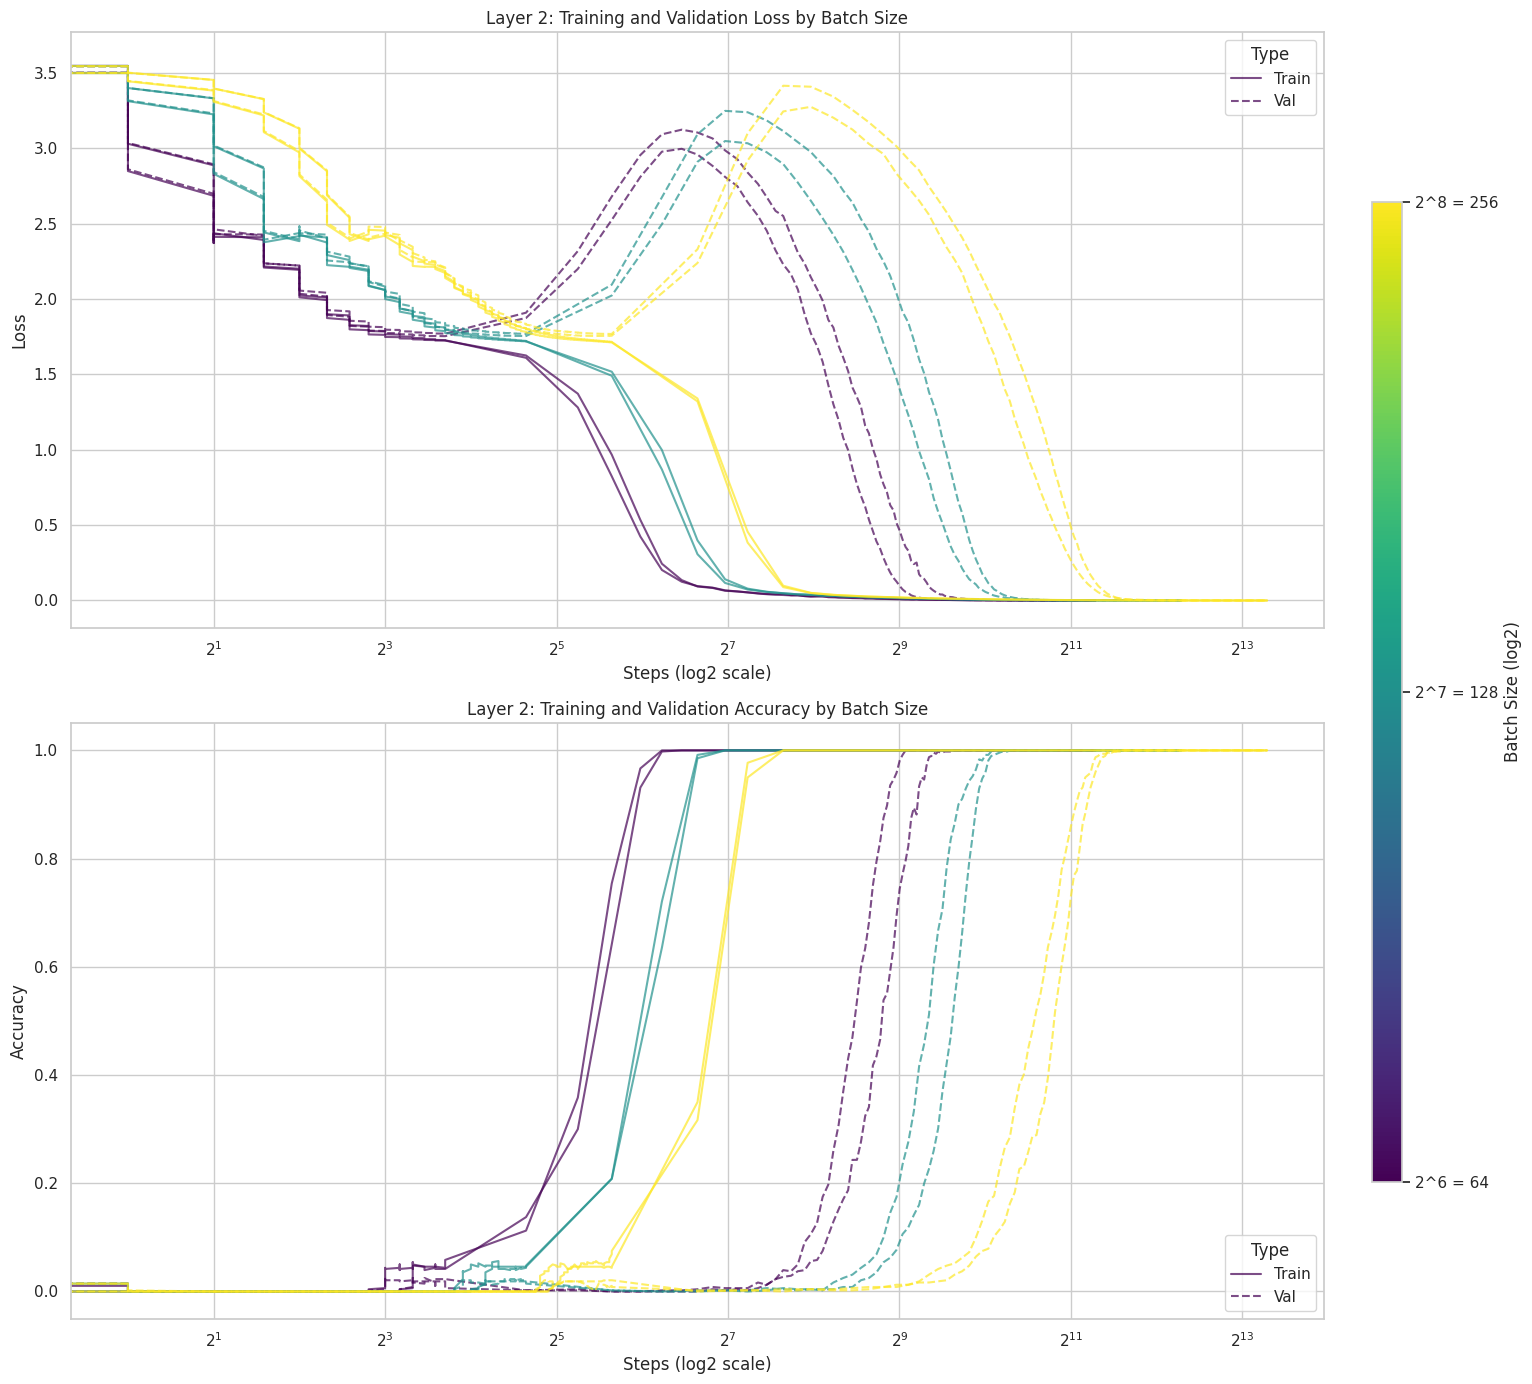


Summary Metrics for Layer 2 (Averaged across runs):
 Layer  Batch_Size  Run  Min_Train_Loss  Min_Val_Loss  Max_Train_Acc  Max_Val_Acc  Steps_To_Min_Train_Loss  Steps_To_Min_Val_Loss  Steps_To_Max_Train_Acc  Steps_To_Max_Val_Acc
     2          64  1.5        0.000005      0.000013            1.0          1.0                   2501.0                 2500.5                    81.5                 669.0
     2         128  1.5        0.000003      0.000006            1.0          1.0                   5000.5                 5001.0                   125.0                1175.0
     2         256  1.5        0.000001      0.000005            1.0          1.0                  10000.5                10001.0                   200.0                3050.0

Minimum Loss by Batch Size:
Batch_Size           64        128       256
Min_Train_Loss  0.000005  0.000003  0.000001
Min_Val_Loss    0.000013  0.000006  0.000005

Maximum Accuracy by Batch Size:
Batch_Size     64   128  256
Max_Train_Acc  1.

In [31]:
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import math
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable

# Set plotting style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [15, 10]

# Base directory containing the logs
base_dir = "/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm"

# Configuration parameters
layer = 2  # Only process layer 2
batch_sizes = [64, 128, 256]  # 2^6=64, 2^7=128, 2^8=256
log2_batch_sizes = [int(math.log2(b)) for b in batch_sizes]  # [6, 7, 8]

# Initialize dictionaries to store paths and metrics
file_paths = defaultdict(list)
raw_metrics = defaultdict(dict)
summary_metrics = []

def to_np(x):
    """Convert torch.Tensors or lists to numpy arrays"""
    if isinstance(x, torch.Tensor):
        return x.cpu().numpy()
    elif isinstance(x, list):
        return np.array(x)
    return x

# Collect all the log file paths for layer 2
for b in batch_sizes:
    # Construct the path pattern
    dir_path = os.path.join(base_dir, f"layer_{layer}", f"b={b}")

    # Find all subdirectories (like '0/', '1/', etc.)
    try:
        subdirs = [d for d in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, d))]
    except FileNotFoundError:
        print(f"Directory not found: {dir_path}")
        continue

    for subdir in subdirs:
        # Try multiple possible filename patterns
        possible_files = [
            os.path.join(dir_path, subdir, f"B={b}.pth"),
            os.path.join(dir_path, subdir, f"B={b}_L={layer}.pth"),
            os.path.join(dir_path, subdir, f"b={b}.pth")
        ]

        for file_path in possible_files:
            if os.path.exists(file_path):
                file_paths[b].append(file_path)
                break  # Use the first valid file found

# Extract metrics for all found files
for b in batch_sizes:
    for path_idx, path in enumerate(file_paths[b]):
        try:
            data = torch.load(path, map_location=torch.device('cpu'))

            # Verify the expected keys are present
            if not all(k in data for k in ['train', 'test', 'steps_epoch']):
                print(f"Unexpected data format in {path}")
                continue

            # Convert all metrics to numpy arrays
            train_loss = to_np(data['train']['loss'])
            val_loss = to_np(data['test']['loss'])
            train_acc = to_np(data['train']['accuracy'])
            val_acc = to_np(data['test']['accuracy'])
            steps = to_np(list(data['steps_epoch'].values()))

            # Make sure we don't have more steps than data points
            min_len = min(len(train_loss), len(val_loss), len(train_acc), len(val_acc), len(steps))
            train_loss = train_loss[:min_len]
            val_loss = val_loss[:min_len]
            train_acc = train_acc[:min_len]
            val_acc = val_acc[:min_len]
            steps = steps[:min_len]

            # Store raw metrics for plotting
            key = (b, path_idx)
            raw_metrics[key] = {
                'train_loss': train_loss,
                'val_loss': val_loss,
                'train_acc': train_acc,
                'val_acc': val_acc,
                'steps': steps
            }

            # Find minimum loss and corresponding step
            train_min_loss_idx = np.argmin(train_loss)
            val_min_loss_idx = np.argmin(val_loss)

            # Find maximum accuracy and corresponding step
            train_max_acc_idx = np.argmax(train_acc)
            val_max_acc_idx = np.argmax(val_acc)

            # Collect summary metrics
            run_metrics = {
                'Layer': layer,
                'Batch_Size': b,
                'Run': path_idx + 1,
                'Min_Train_Loss': train_loss[train_min_loss_idx],
                'Min_Val_Loss': val_loss[val_min_loss_idx],
                'Max_Train_Acc': train_acc[train_max_acc_idx],
                'Max_Val_Acc': val_acc[val_max_acc_idx],
                'Steps_To_Min_Train_Loss': steps[train_min_loss_idx],
                'Steps_To_Min_Val_Loss': steps[val_min_loss_idx],
                'Steps_To_Max_Train_Acc': steps[train_max_acc_idx],
                'Steps_To_Max_Val_Acc': steps[val_max_acc_idx]
            }
            summary_metrics.append(run_metrics)

        except Exception as e:
            print(f"Error processing {path}: {e}")

# =============================================
# PLOTTING CODE FOR LAYER 2
# =============================================

def plot_metrics():
    """Plot training/validation curves for layer 2 with improved log2 labeling"""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 14))

    # Create a color map
    cmap = plt.cm.viridis
    colors = cmap(np.linspace(0, 1, len(batch_sizes)))

    # Store line objects for custom legend
    train_lines = []
    val_lines = []

    # Plot Loss curves
    for i, (b, log_b, color) in enumerate(zip(batch_sizes, log2_batch_sizes, colors)):
        for run_idx in range(len(file_paths[b])):
            key = (b, run_idx)
            if key in raw_metrics:
                metrics = raw_metrics[key]
                steps = metrics['steps']

                # Plot with simplified labels
                train_line, = ax1.plot(steps, metrics['train_loss'],
                                      linestyle='-', alpha=0.7,
                                      color=color)
                val_line, = ax1.plot(steps, metrics['val_loss'],
                                    linestyle='--', alpha=0.7,
                                    color=color)

                # Store lines for legend from the first run
                if run_idx == 0:
                    train_lines.append(train_line)
                    val_lines.append(val_line)

    # Set log2 scale on x-axis
    ax1.set_xscale('log', base=2)
    ax1.set_xlabel('Steps (log2 scale)')
    ax1.set_ylabel('Loss')
    ax1.set_title(f'Layer {layer}: Training and Validation Loss by Batch Size')

    # Custom legend for train vs val
    ax1.legend([train_lines[0], val_lines[0]], ['Train', 'Val'],
              loc='upper right', title="Type")

    # Plot Accuracy curves
    for i, (b, log_b, color) in enumerate(zip(batch_sizes, log2_batch_sizes, colors)):
        for run_idx in range(len(file_paths[b])):
            key = (b, run_idx)
            if key in raw_metrics:
                metrics = raw_metrics[key]
                steps = metrics['steps']

                # Plot training and validation accuracy
                ax2.plot(steps, metrics['train_acc'],
                        linestyle='-', alpha=0.7,
                        color=color)
                ax2.plot(steps, metrics['val_acc'],
                        linestyle='--', alpha=0.7,
                        color=color)

    # Set log2 scale on x-axis
    ax2.set_xscale('log', base=2)
    ax2.set_xlabel('Steps (log2 scale)')
    ax2.set_ylabel('Accuracy')
    ax2.set_title(f'Layer {layer}: Training and Validation Accuracy by Batch Size')

    # Use same legend style as first plot
    ax2.legend([train_lines[0], val_lines[0]], ['Train', 'Val'],
              loc='lower right', title="Type")

    # Add color gradient colorbar for batch sizes
    sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(min(log2_batch_sizes), max(log2_batch_sizes)))
    sm.set_array([])

    # Add colorbar to the right of the plots
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
    cbar = fig.colorbar(sm, cax=cbar_ax)
    cbar.set_label('Batch Size (log2)')

    # Set specific tick labels on colorbar to show both log2 and actual values
    cbar.set_ticks(log2_batch_sizes)
    cbar.set_ticklabels([f'2^{log_b} = {b}' for log_b, b in zip(log2_batch_sizes, batch_sizes)])

    plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbar
    plt.show()

# Generate plots
plot_metrics()

# =============================================
# SUMMARY STATISTICS FOR LAYER 2
# =============================================

# Convert to DataFrame
metrics_df = pd.DataFrame(summary_metrics)

# Calculate average metrics across runs for each batch size
avg_metrics = metrics_df.groupby(['Layer', 'Batch_Size']).mean().reset_index()

# Print summary table
print("\nSummary Metrics for Layer 2 (Averaged across runs):")
print(avg_metrics.to_string(index=False))

# Create pivot tables
print("\nMinimum Loss by Batch Size:")
print(pd.pivot_table(avg_metrics,
                    values=['Min_Train_Loss', 'Min_Val_Loss'],
                    columns='Batch_Size'))

print("\nMaximum Accuracy by Batch Size:")
print(pd.pivot_table(avg_metrics,
                    values=['Max_Train_Acc', 'Max_Val_Acc'],
                    columns='Batch_Size'))

In [25]:
import os
import torch
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Configuration parameters
layer = 2  # Only use layer 2
batch_sizes = [32, 64, 128, 256, 512]
alphas = np.arange(0.1, 1.1, 0.1)  # [0.1, 0.2, ..., 1.0]
T = 2 * 10**4 + 1  # Total training steps

# Base directory containing the logs
base_dir = "/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm"

# Store all metrics for plotting
all_results = {}

# Helper function to convert torch tensors to numpy arrays
def to_np(x):
    """Convert torch.Tensors or lists to numpy arrays"""
    if isinstance(x, torch.Tensor):
        return x.cpu().numpy()
    elif isinstance(x, list):
        return np.array(x)
    return x

# Process metrics for each batch size
for B in batch_sizes:
    print(f"\n=== Processing metrics for batch size B={B} ===")

    # Construct the path to the layer directory
    layer_dir = os.path.join(base_dir, f"layer_{layer}", f"b={B}")

    # Check if directory exists
    if not os.path.exists(layer_dir):
        print(f"Directory not found: {layer_dir}")
        continue

    # Find all subdirectories (like '0/', '1/', etc.)
    try:
        subdirs = [d for d in os.listdir(layer_dir) if os.path.isdir(os.path.join(layer_dir, d))]
    except FileNotFoundError:
        print(f"No subdirectories found in {layer_dir}")
        continue

    # Load metrics for all seeds
    all_metrics_by_seed = {}

    for subdir in subdirs:
        # Try multiple possible filename patterns
        possible_files = [
            os.path.join(layer_dir, subdir, f"B={B}.pth"),
            os.path.join(layer_dir, subdir, f"B={B}_L={layer}.pth"),
            os.path.join(layer_dir, subdir, f"b={B}.pth")
        ]

        metrics_loaded = False
        for file_path in possible_files:
            if os.path.exists(file_path):
                try:
                    metrics = torch.load(file_path, map_location='cpu')
                    # Convert any torch tensors to numpy arrays
                    for key in metrics:
                        if isinstance(metrics[key], dict):
                            for subkey in metrics[key]:
                                metrics[key][subkey] = to_np(metrics[key][subkey])
                        else:
                            metrics[key] = to_np(metrics[key])

                    all_metrics_by_seed[subdir] = metrics
                    print(f"Loaded metrics from {file_path}")
                    metrics_loaded = True
                    break  # Use the first valid file found
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")

        if not metrics_loaded:
            print(f"No valid metrics file found for batch size {B}, subdir {subdir}")

    # Only proceed if we found metrics for at least one seed
    if not all_metrics_by_seed:
        print(f"Skipping batch size {B} - no valid metrics found")
        continue

    # For each alpha, find the best metrics within T' = alpha*T steps
    alpha_results = {}
    for alpha in alphas:
        T_max = int(alpha * T)

        # Initialize storage for this alpha
        alpha_metrics = {
            'train_loss': [],
            'val_loss': [],
            'train_acc': [],
            'val_acc': [],
            'steps_to_min_train_loss': [],
            'steps_to_min_val_loss': [],
            'steps_to_max_train_acc': [],
            'steps_to_max_val_acc': []
        }

        # For each seed with valid metrics
        for seed, metrics in all_metrics_by_seed.items():
            steps = metrics['all_steps']

            # Find indices within T_max
            valid_idx = [i for i, t in enumerate(steps) if t <= T_max]

            if valid_idx:
                # Get metrics within T_max
                train_loss = [metrics['train']['loss'][i] for i in valid_idx]
                val_loss = [metrics['test']['loss'][i] for i in valid_idx]
                train_acc = [metrics['train']['accuracy'][i] for i in valid_idx]
                val_acc = [metrics['test']['accuracy'][i] for i in valid_idx]
                steps_subset = [steps[i] for i in valid_idx]

                # Find extrema and their steps
                min_train_loss_idx = np.argmin(train_loss)
                min_val_loss_idx = np.argmin(val_loss)
                max_train_acc_idx = np.argmax(train_acc)
                max_val_acc_idx = np.argmax(val_acc)

                # Store results
                alpha_metrics['train_loss'].append(train_loss[min_train_loss_idx])
                alpha_metrics['val_loss'].append(val_loss[min_val_loss_idx])
                alpha_metrics['train_acc'].append(train_acc[max_train_acc_idx])
                alpha_metrics['val_acc'].append(val_acc[max_val_acc_idx])
                alpha_metrics['steps_to_min_train_loss'].append(steps_subset[min_train_loss_idx])
                alpha_metrics['steps_to_min_val_loss'].append(steps_subset[min_val_loss_idx])
                alpha_metrics['steps_to_max_train_acc'].append(steps_subset[max_train_acc_idx])
                alpha_metrics['steps_to_max_val_acc'].append(steps_subset[max_val_acc_idx])

        # Average across seeds (if multiple seeds exist)
        avg_alpha_metrics = {k: np.mean(v) if v else np.nan for k, v in alpha_metrics.items()}
        alpha_results[alpha] = avg_alpha_metrics

    print("Processing complete! Results stored in all_results dictionary.")
    all_results[B] = alpha_results

# Now all_results contains the processed metrics for all batch sizes and alphas

# You can add visualization code here to plot the results


=== Processing metrics for batch size B=32 ===
Loaded metrics from /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_2/b=32/0/B=32.pth
Loaded metrics from /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_2/b=32/1/B=32.pth
Processing complete! Results stored in all_results dictionary.

=== Processing metrics for batch size B=64 ===
Loaded metrics from /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_2/b=64/0/B=64.pth
Loaded metrics from /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_2/b=64/1/B=64.pth
Processing complete! Results stored in all_results dictionary.

=== Processing metrics for batch size B=128 ===
Loaded metrics from /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_2/b=128/0/B=128.pth
Loaded metrics from /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_2/b=128/1/B=128.pth
Processing complete! Re

In [29]:
print(all_results)

{32: {np.float64(0.1): {'train_loss': np.float64(0.049770643934607506), 'val_loss': np.float64(1.6984416246414185), 'train_acc': np.float32(1.0), 'val_acc': np.float32(0.10810811), 'steps_to_min_train_loss': np.float64(1950.0), 'steps_to_min_val_loss': np.float64(1050.0), 'steps_to_max_train_acc': np.float64(900.0), 'steps_to_max_val_acc': np.float64(2000.0)}, np.float64(0.2): {'train_loss': np.float64(0.015814634505659342), 'val_loss': np.float64(0.1333855241537094), 'train_acc': np.float32(1.0), 'val_acc': np.float32(0.9823285), 'steps_to_min_train_loss': np.float64(3950.0), 'steps_to_min_val_loss': np.float64(4000.0), 'steps_to_max_train_acc': np.float64(900.0), 'steps_to_max_val_acc': np.float64(4000.0)}, np.float64(0.30000000000000004): {'train_loss': np.float64(0.005511021474376321), 'val_loss': np.float64(0.011636083945631981), 'train_acc': np.float32(1.0), 'val_acc': np.float32(1.0), 'steps_to_min_train_loss': np.float64(6000.0), 'steps_to_min_val_loss': np.float64(6000.0), 'st

<ipython-input-28-f0a294390039>:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
<ipython-input-28-f0a294390039>:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
<ipython-input-28-f0a294390039>:60: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
<ipython-input-28-f0a294390039>:77: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


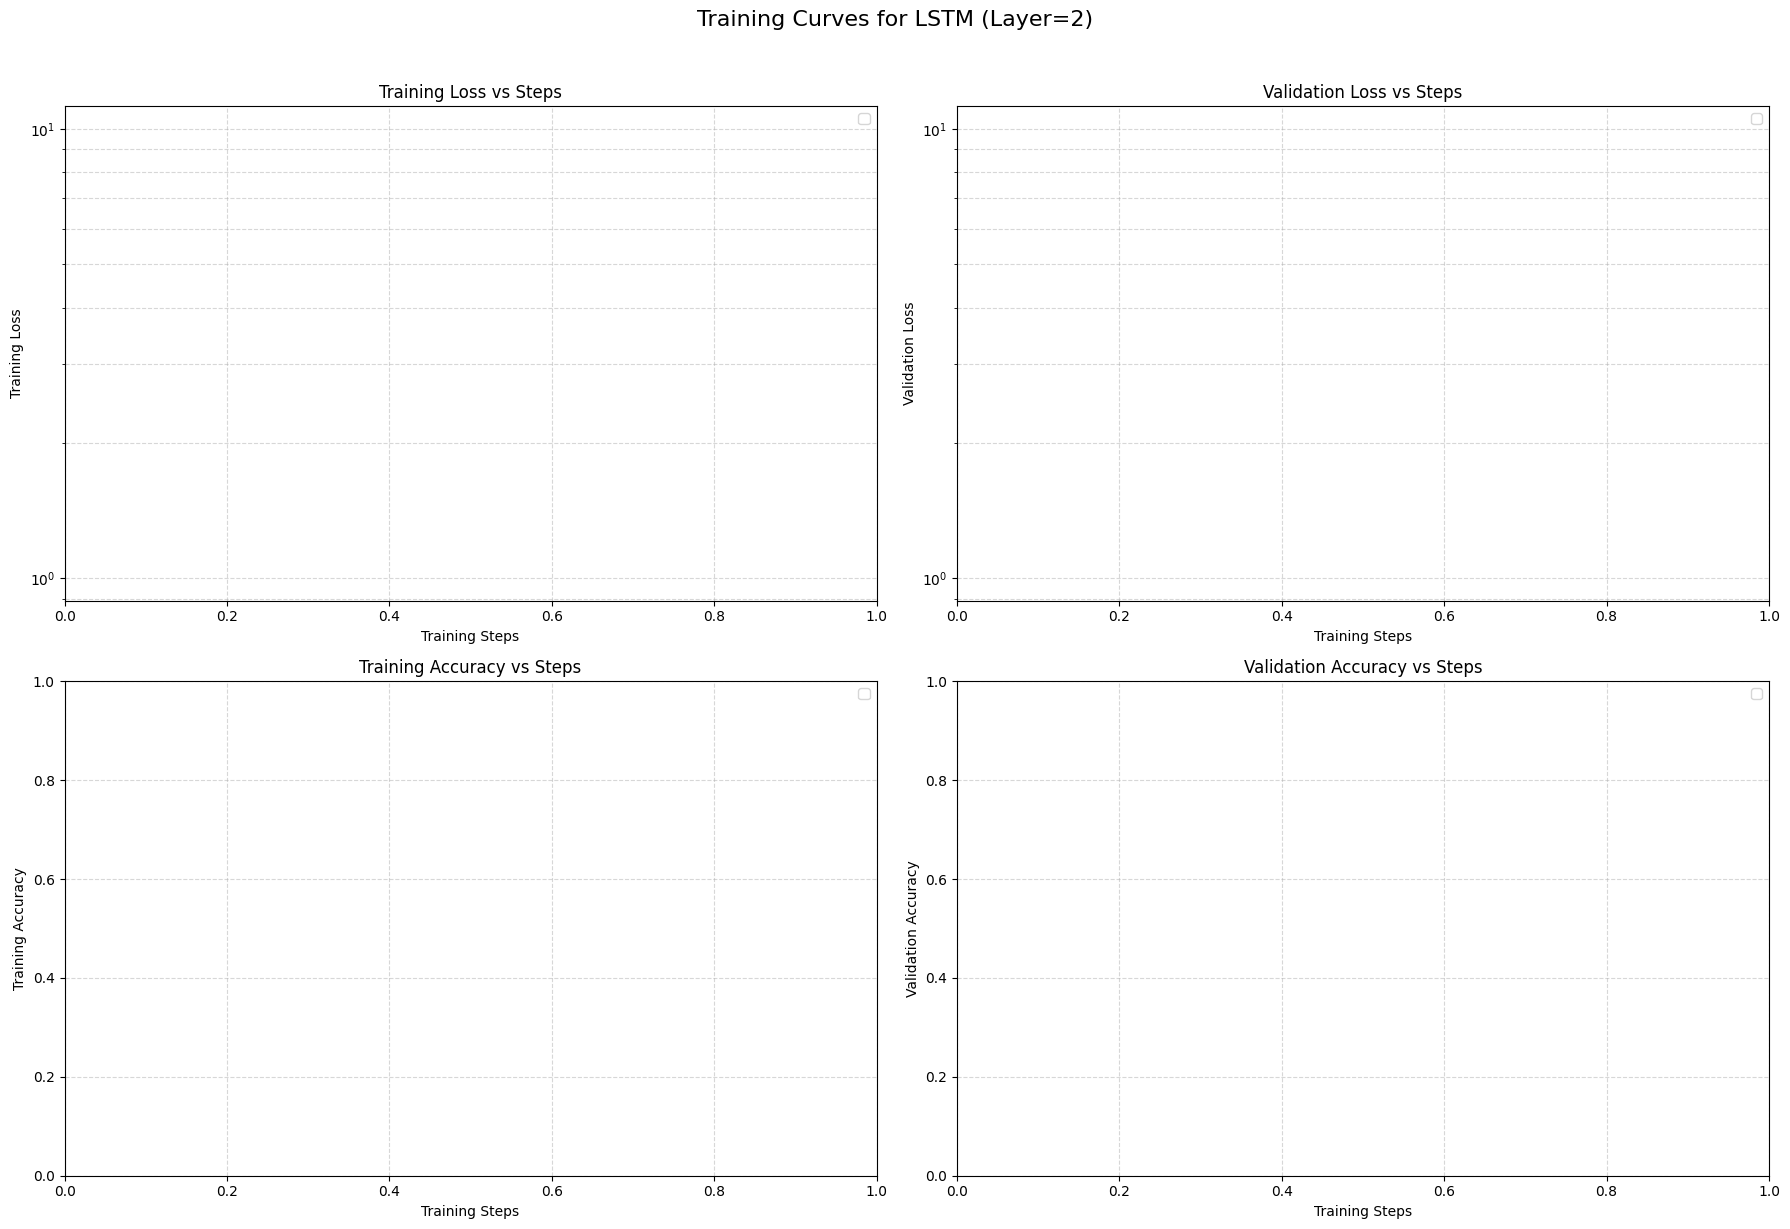

In [28]:
# Plotting configuration using only matplotlib
plt.style.use('default')  # Using matplotlib's default style
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.viridis(np.linspace(0, 1, len(batch_sizes))))

# Create figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle(f'Training Curves for LSTM (Layer={layer})', fontsize=16, y=1.02)

# Plot training loss
ax = axs[0, 0]
for i, B in enumerate(batch_sizes):
    if B not in all_results:
        continue
    metrics = all_results[B][1.0]
    if 'all_steps' not in metrics:
        continue
    steps = metrics['all_steps']
    train_loss = metrics['train']['loss']
    ax.plot(steps, train_loss, label=f'B={B}', linewidth=2)
ax.set_xlabel('Training Steps')
ax.set_ylabel('Training Loss')
ax.set_yscale('log')
ax.set_title('Training Loss vs Steps')
ax.legend()
ax.grid(True, which="both", linestyle='--', alpha=0.5)

# Plot validation loss
ax = axs[0, 1]
for i, B in enumerate(batch_sizes):
    if B not in all_results:
        continue
    metrics = all_results[B][1.0]
    if 'all_steps' not in metrics:
        continue
    steps = metrics['all_steps']
    val_loss = metrics['test']['loss']
    ax.plot(steps, val_loss, label=f'B={B}', linewidth=2)
ax.set_xlabel('Training Steps')
ax.set_ylabel('Validation Loss')
ax.set_yscale('log')
ax.set_title('Validation Loss vs Steps')
ax.legend()
ax.grid(True, which="both", linestyle='--', alpha=0.5)

# Plot training accuracy
ax = axs[1, 0]
for i, B in enumerate(batch_sizes):
    if B not in all_results:
        continue
    metrics = all_results[B][1.0]
    if 'all_steps' not in metrics:
        continue
    steps = metrics['all_steps']
    train_acc = metrics['train']['accuracy']
    ax.plot(steps, train_acc, label=f'B={B}', linewidth=2)
ax.set_xlabel('Training Steps')
ax.set_ylabel('Training Accuracy')
ax.set_title('Training Accuracy vs Steps')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

# Plot validation accuracy
ax = axs[1, 1]
for i, B in enumerate(batch_sizes):
    if B not in all_results:
        continue
    metrics = all_results[B][1.0]
    if 'all_steps' not in metrics:
        continue
    steps = metrics['all_steps']
    val_acc = metrics['test']['accuracy']
    ax.plot(steps, val_acc, label=f'B={B}', linewidth=2)
ax.set_xlabel('Training Steps')
ax.set_ylabel('Validation Accuracy')
ax.set_title('Validation Accuracy vs Steps')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#GPT

In [20]:
import torch
import os
from train import Arguments, train_m_models
import matplotlib.pyplot as plt
import numpy as np

# Define batch sizes and seeds
batch_sizes = [32, 512]  # Only these batch sizes
num_layers = 2           # Only this layer count
seeds = [0, 42]
T = 2 * 10**4 + 1

# Store all metrics for plotting
all_results = {}

args = Arguments()

# === Common Data Configuration ===
args.p = 31
args.operator = "+"
args.r_train = 0.5
args.operation_orders = 2
args.eval_batch_size = 2**12
args.num_workers = 0

# === Common Model Configuration ===
args.model = 'gpt'
args.num_heads = 4
args.num_layers = num_layers  # Fixed to 2 layers
args.embedding_size = 2**7
args.hidden_size = 2**7
args.dropout = 0.0
args.share_embeddings = False
args.bias_classifier = True

# === Common Optimization Configuration ===
args.optimizer = 'adamw'
args.lr = 1e-3
args.weight_decay = 1e0

# === Common Training Configuration ===
args.n_steps = T
args.eval_first = 10**2
args.eval_period = 10**2
args.print_step = 10**2
args.save_model_step = 10**3
args.save_statistic_step = 10**3

# === Common Misc Configuration ===
args.device = "cuda" if torch.cuda.is_available() else "cpu"
args.exp_id = 0
args.seed = 42
args.verbose = True

# Base log directory
base_log_dir = "/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs"

for B in batch_sizes:
    # Set batch-specific parameters
    args.train_batch_size = B
    args.exp_name = f"B={B}"

    # Create directory structure
    model_dir = os.path.join(base_log_dir, args.model)
    layer_dir = os.path.join(model_dir, f"layer_{num_layers}")
    batch_dir = os.path.join(layer_dir, f"b={B}")
    os.makedirs(batch_dir, exist_ok=True)
    args.log_dir = batch_dir

    print(f"\n=== Training with batch size B={B}, layers={num_layers} ===")
    _, all_metrics, _ = train_m_models(args, M=len(seeds), seeds=seeds)

    # Store results
    all_results[B] = all_metrics

print("\nTraining completed for all specified configurations!")


=== Training with batch size B=32, layers=2 ===
Model 1/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
eval_batch_size : 4096
num_workers : 0
model : gpt
num_heads : 4
num_layers : 2
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_id : 0
seed : 0
verbose : True
train_batch_size : 32
exp_name : B=32
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_2/b=32
Model : GPT(
  (embedding): GPTEmbedding(
    (tokens): Embedding(36, 128, padding_idx=35)
  )
  (decoder): Decoder(
    (blocks): ModuleList(
      (0-1): 2 x Block(
        (self_attn): MultiHeadedAttention(
          (W_Q): Linear(in_features=128, out_features=128, bias=True)
          (W_K): Linear(in_features=128, out_features=128, bias=True)
       

Training:   0%|          | 0/1334 [00:00<?, ?it/s]


Train loss : 3.099694 | Train accuracy : 0.000000 | Train l2_norm : 75.540825 | Test loss : 3.087124 | Test accuracy : 0.000000 | Test l2_norm : 75.540825 | lr = 0.001


Training:   1%|          | 7/1334 [00:14<44:33,  2.01s/it]


Train loss : 1.653296 | Train accuracy : 0.100000 | Train l2_norm : 68.828522 | Test loss : 1.826315 | Test accuracy : 0.006237 | Test l2_norm : 68.828522 | lr = 0.001


Training:   1%|          | 13/1334 [00:15<08:52,  2.48it/s]


Train loss : 0.917828 | Train accuracy : 0.620833 | Train l2_norm : 63.692162 | Test loss : 2.022411 | Test accuracy : 0.068607 | Test l2_norm : 63.692162 | lr = 0.001


Training:   2%|▏         | 21/1334 [00:18<06:07,  3.57it/s]


Train loss : 0.271949 | Train accuracy : 0.972917 | Train l2_norm : 59.435055 | Test loss : 1.755516 | Test accuracy : 0.353430 | Test l2_norm : 59.435055 | lr = 0.001


Training:   2%|▏         | 27/1334 [00:19<05:15,  4.15it/s]


Train loss : 0.074738 | Train accuracy : 0.997917 | Train l2_norm : 55.477013 | Test loss : 1.687103 | Test accuracy : 0.432432 | Test l2_norm : 55.477013 | lr = 0.001


Training:   3%|▎         | 34/1334 [00:22<08:50,  2.45it/s]


Train loss : 0.023512 | Train accuracy : 1.000000 | Train l2_norm : 51.343872 | Test loss : 1.603985 | Test accuracy : 0.449064 | Test l2_norm : 51.343872 | lr = 0.001


Training:   3%|▎         | 40/1334 [00:24<06:39,  3.24it/s]


Train loss : 0.021079 | Train accuracy : 1.000000 | Train l2_norm : 47.235588 | Test loss : 1.547550 | Test accuracy : 0.455301 | Test l2_norm : 47.235588 | lr = 0.001


Training:   4%|▎         | 47/1334 [00:26<05:12,  4.11it/s]


Train loss : 0.084432 | Train accuracy : 0.991667 | Train l2_norm : 44.046799 | Test loss : 1.620477 | Test accuracy : 0.417879 | Test l2_norm : 44.046799 | lr = 0.001


Training:   4%|▍         | 54/1334 [00:27<04:50,  4.40it/s]


Train loss : 0.068007 | Train accuracy : 0.991667 | Train l2_norm : 41.674801 | Test loss : 1.631042 | Test accuracy : 0.432432 | Test l2_norm : 41.674801 | lr = 0.001


Training:   4%|▍         | 60/1334 [00:29<04:52,  4.36it/s]


Train loss : 0.021978 | Train accuracy : 1.000000 | Train l2_norm : 39.479874 | Test loss : 1.581125 | Test accuracy : 0.449064 | Test l2_norm : 39.479874 | lr = 0.001


Training:   5%|▌         | 67/1334 [00:30<05:22,  3.93it/s]


Train loss : 0.045414 | Train accuracy : 0.995833 | Train l2_norm : 37.491848 | Test loss : 1.613608 | Test accuracy : 0.430353 | Test l2_norm : 37.491848 | lr = 0.001


Training:   6%|▌         | 74/1334 [00:32<04:45,  4.42it/s]


Train loss : 0.016158 | Train accuracy : 1.000000 | Train l2_norm : 35.735909 | Test loss : 1.574086 | Test accuracy : 0.453222 | Test l2_norm : 35.735909 | lr = 0.001


Training:   6%|▌         | 80/1334 [00:33<04:52,  4.28it/s]


Train loss : 0.011698 | Train accuracy : 1.000000 | Train l2_norm : 33.359791 | Test loss : 1.539134 | Test accuracy : 0.459459 | Test l2_norm : 33.359791 | lr = 0.001


Training:   7%|▋         | 87/1334 [00:35<06:02,  3.44it/s]


Train loss : 0.056387 | Train accuracy : 1.000000 | Train l2_norm : 31.671434 | Test loss : 1.589934 | Test accuracy : 0.432432 | Test l2_norm : 31.671434 | lr = 0.001


Training:   7%|▋         | 94/1334 [00:37<06:38,  3.11it/s]


Train loss : 0.064046 | Train accuracy : 0.995833 | Train l2_norm : 30.718946 | Test loss : 1.521914 | Test accuracy : 0.434511 | Test l2_norm : 30.718946 | lr = 0.001


Training:   7%|▋         | 100/1334 [00:38<04:55,  4.18it/s]


Train loss : 0.081056 | Train accuracy : 0.997917 | Train l2_norm : 29.883120 | Test loss : 1.575199 | Test accuracy : 0.419958 | Test l2_norm : 29.883120 | lr = 0.001


Training:   8%|▊         | 107/1334 [00:40<04:42,  4.35it/s]


Train loss : 0.079035 | Train accuracy : 0.993750 | Train l2_norm : 29.143499 | Test loss : 1.570386 | Test accuracy : 0.411642 | Test l2_norm : 29.143499 | lr = 0.001


Training:   9%|▊         | 114/1334 [00:41<04:35,  4.43it/s]


Train loss : 0.051096 | Train accuracy : 1.000000 | Train l2_norm : 28.489609 | Test loss : 1.494551 | Test accuracy : 0.446985 | Test l2_norm : 28.489609 | lr = 0.001


Training:   9%|▉         | 120/1334 [00:43<04:34,  4.43it/s]


Train loss : 0.072047 | Train accuracy : 1.000000 | Train l2_norm : 27.833059 | Test loss : 1.495291 | Test accuracy : 0.428274 | Test l2_norm : 27.833059 | lr = 0.001


Training:  10%|▉         | 127/1334 [00:44<04:39,  4.32it/s]


Train loss : 0.091560 | Train accuracy : 0.991667 | Train l2_norm : 27.239851 | Test loss : 1.519244 | Test accuracy : 0.417879 | Test l2_norm : 27.239851 | lr = 0.001


Training:  10%|█         | 134/1334 [00:46<04:56,  4.04it/s]


Train loss : 0.082106 | Train accuracy : 1.000000 | Train l2_norm : 26.781740 | Test loss : 1.463287 | Test accuracy : 0.424116 | Test l2_norm : 26.781740 | lr = 0.001


Training:  10%|█         | 140/1334 [00:47<04:51,  4.10it/s]


Train loss : 0.122559 | Train accuracy : 0.991667 | Train l2_norm : 26.337257 | Test loss : 1.485005 | Test accuracy : 0.397089 | Test l2_norm : 26.337257 | lr = 0.001


Training:  11%|█         | 147/1334 [00:49<06:02,  3.28it/s]


Train loss : 0.080054 | Train accuracy : 1.000000 | Train l2_norm : 25.945990 | Test loss : 1.433073 | Test accuracy : 0.440748 | Test l2_norm : 25.945990 | lr = 0.001


Training:  12%|█▏        | 154/1334 [00:51<04:51,  4.05it/s]


Train loss : 0.096637 | Train accuracy : 0.997917 | Train l2_norm : 25.545311 | Test loss : 1.466310 | Test accuracy : 0.415800 | Test l2_norm : 25.545311 | lr = 0.001


Training:  12%|█▏        | 160/1334 [00:52<04:30,  4.34it/s]


Train loss : 0.239147 | Train accuracy : 0.952083 | Train l2_norm : 25.211088 | Test loss : 1.500484 | Test accuracy : 0.372141 | Test l2_norm : 25.211088 | lr = 0.001


Training:  13%|█▎        | 167/1334 [00:54<04:26,  4.38it/s]


Train loss : 0.114583 | Train accuracy : 0.997917 | Train l2_norm : 25.004322 | Test loss : 1.419004 | Test accuracy : 0.432432 | Test l2_norm : 25.004322 | lr = 0.001


Training:  13%|█▎        | 174/1334 [00:55<04:31,  4.27it/s]


Train loss : 0.134523 | Train accuracy : 1.000000 | Train l2_norm : 24.814911 | Test loss : 1.415033 | Test accuracy : 0.417879 | Test l2_norm : 24.814911 | lr = 0.001


Training:  13%|█▎        | 180/1334 [00:57<04:24,  4.36it/s]


Train loss : 0.124780 | Train accuracy : 1.000000 | Train l2_norm : 24.676172 | Test loss : 1.399944 | Test accuracy : 0.426195 | Test l2_norm : 24.676172 | lr = 0.001


Training:  14%|█▍        | 187/1334 [00:58<04:27,  4.29it/s]


Train loss : 0.221852 | Train accuracy : 0.983333 | Train l2_norm : 24.506010 | Test loss : 1.440282 | Test accuracy : 0.380457 | Test l2_norm : 24.506010 | lr = 0.001


Training:  15%|█▍        | 194/1334 [01:00<04:23,  4.32it/s]


Train loss : 0.164530 | Train accuracy : 0.985417 | Train l2_norm : 24.414907 | Test loss : 1.432369 | Test accuracy : 0.388773 | Test l2_norm : 24.414907 | lr = 0.001


Training:  15%|█▍        | 200/1334 [01:02<06:15,  3.02it/s]


Train loss : 0.163560 | Train accuracy : 0.989583 | Train l2_norm : 24.325350 | Test loss : 1.421274 | Test accuracy : 0.392931 | Test l2_norm : 24.325350 | lr = 0.001


Training:  16%|█▌        | 207/1334 [01:04<05:16,  3.57it/s]


Train loss : 0.212431 | Train accuracy : 0.968750 | Train l2_norm : 24.304918 | Test loss : 1.409196 | Test accuracy : 0.388773 | Test l2_norm : 24.304918 | lr = 0.001


Training:  16%|█▌        | 214/1334 [01:05<04:18,  4.33it/s]


Train loss : 0.215513 | Train accuracy : 0.970833 | Train l2_norm : 24.317974 | Test loss : 1.388321 | Test accuracy : 0.382536 | Test l2_norm : 24.317974 | lr = 0.001


Training:  16%|█▋        | 220/1334 [01:06<04:19,  4.30it/s]


Train loss : 0.175197 | Train accuracy : 0.981250 | Train l2_norm : 24.311157 | Test loss : 1.356299 | Test accuracy : 0.378378 | Test l2_norm : 24.311157 | lr = 0.001


Training:  17%|█▋        | 227/1334 [01:08<04:17,  4.30it/s]


Train loss : 0.261826 | Train accuracy : 0.912500 | Train l2_norm : 24.408249 | Test loss : 1.431544 | Test accuracy : 0.340956 | Test l2_norm : 24.408249 | lr = 0.001


Training:  18%|█▊        | 234/1334 [01:09<04:14,  4.32it/s]


Train loss : 0.234382 | Train accuracy : 0.927083 | Train l2_norm : 24.517275 | Test loss : 1.379789 | Test accuracy : 0.355509 | Test l2_norm : 24.517275 | lr = 0.001


Training:  18%|█▊        | 240/1334 [01:11<04:17,  4.26it/s]


Train loss : 0.127544 | Train accuracy : 0.977083 | Train l2_norm : 24.460135 | Test loss : 1.311289 | Test accuracy : 0.424116 | Test l2_norm : 24.460135 | lr = 0.001


Training:  19%|█▊        | 247/1334 [01:12<04:11,  4.32it/s]


Train loss : 0.123308 | Train accuracy : 0.989583 | Train l2_norm : 24.454531 | Test loss : 1.269360 | Test accuracy : 0.422037 | Test l2_norm : 24.454531 | lr = 0.001


Training:  19%|█▉        | 254/1334 [01:14<05:17,  3.41it/s]


Train loss : 0.115737 | Train accuracy : 0.979167 | Train l2_norm : 24.553396 | Test loss : 1.260472 | Test accuracy : 0.424116 | Test l2_norm : 24.553396 | lr = 0.001


Training:  19%|█▉        | 260/1334 [01:16<05:57,  3.00it/s]


Train loss : 0.104667 | Train accuracy : 0.983333 | Train l2_norm : 24.397690 | Test loss : 1.175597 | Test accuracy : 0.444906 | Test l2_norm : 24.397690 | lr = 0.001


Training:  20%|██        | 267/1334 [01:18<04:32,  3.91it/s]


Train loss : 0.127493 | Train accuracy : 0.977083 | Train l2_norm : 24.395273 | Test loss : 1.156121 | Test accuracy : 0.436590 | Test l2_norm : 24.395273 | lr = 0.001


Training:  21%|██        | 274/1334 [01:19<04:05,  4.33it/s]


Train loss : 0.083265 | Train accuracy : 0.997917 | Train l2_norm : 24.334234 | Test loss : 1.084959 | Test accuracy : 0.486486 | Test l2_norm : 24.334234 | lr = 0.001


Training:  21%|██        | 280/1334 [01:21<04:03,  4.33it/s]


Train loss : 0.063292 | Train accuracy : 0.997917 | Train l2_norm : 24.239416 | Test loss : 0.978427 | Test accuracy : 0.521830 | Test l2_norm : 24.239416 | lr = 0.001


Training:  22%|██▏       | 287/1334 [01:22<04:03,  4.29it/s]


Train loss : 0.073891 | Train accuracy : 0.995833 | Train l2_norm : 24.249723 | Test loss : 0.949512 | Test accuracy : 0.523909 | Test l2_norm : 24.249723 | lr = 0.001


Training:  22%|██▏       | 294/1334 [01:24<03:58,  4.36it/s]


Train loss : 0.093242 | Train accuracy : 0.981250 | Train l2_norm : 24.150442 | Test loss : 0.863910 | Test accuracy : 0.569647 | Test l2_norm : 24.150442 | lr = 0.001


Training:  22%|██▏       | 300/1334 [01:25<03:57,  4.35it/s]


Train loss : 0.081678 | Train accuracy : 0.995833 | Train l2_norm : 24.074120 | Test loss : 0.790943 | Test accuracy : 0.582121 | Test l2_norm : 24.074120 | lr = 0.001


Training:  23%|██▎       | 307/1334 [01:26<04:20,  3.94it/s]


Train loss : 0.050012 | Train accuracy : 0.995833 | Train l2_norm : 23.988420 | Test loss : 0.645708 | Test accuracy : 0.623701 | Test l2_norm : 23.988420 | lr = 0.001


Training:  23%|██▎       | 313/1334 [01:28<04:43,  3.61it/s]


Train loss : 0.035149 | Train accuracy : 0.997917 | Train l2_norm : 23.791773 | Test loss : 0.591776 | Test accuracy : 0.656965 | Test l2_norm : 23.791773 | lr = 0.001


Training:  24%|██▍       | 320/1334 [01:30<04:17,  3.94it/s]


Train loss : 0.146815 | Train accuracy : 0.939583 | Train l2_norm : 23.662928 | Test loss : 0.744564 | Test accuracy : 0.580042 | Test l2_norm : 23.662928 | lr = 0.001


Training:  25%|██▍       | 327/1334 [01:32<03:52,  4.33it/s]


Train loss : 0.034309 | Train accuracy : 1.000000 | Train l2_norm : 23.640797 | Test loss : 0.413663 | Test accuracy : 0.771310 | Test l2_norm : 23.640797 | lr = 0.001


Training:  25%|██▌       | 334/1334 [01:33<04:04,  4.08it/s]


Train loss : 0.033493 | Train accuracy : 0.995833 | Train l2_norm : 23.480148 | Test loss : 0.383161 | Test accuracy : 0.802495 | Test l2_norm : 23.480148 | lr = 0.001


Training:  25%|██▌       | 340/1334 [01:34<03:50,  4.31it/s]


Train loss : 0.027173 | Train accuracy : 0.997917 | Train l2_norm : 23.360710 | Test loss : 0.306491 | Test accuracy : 0.858628 | Test l2_norm : 23.360710 | lr = 0.001


Training:  26%|██▌       | 347/1334 [01:36<03:51,  4.26it/s]


Train loss : 0.020279 | Train accuracy : 1.000000 | Train l2_norm : 23.200005 | Test loss : 0.251796 | Test accuracy : 0.873181 | Test l2_norm : 23.200005 | lr = 0.001


Training:  27%|██▋       | 354/1334 [01:38<03:47,  4.31it/s]


Train loss : 0.046068 | Train accuracy : 0.991667 | Train l2_norm : 23.148916 | Test loss : 0.333759 | Test accuracy : 0.808732 | Test l2_norm : 23.148916 | lr = 0.001


Training:  27%|██▋       | 360/1334 [01:39<03:45,  4.32it/s]


Train loss : 0.027589 | Train accuracy : 1.000000 | Train l2_norm : 23.032900 | Test loss : 0.243831 | Test accuracy : 0.906445 | Test l2_norm : 23.032900 | lr = 0.001


Training:  28%|██▊       | 367/1334 [01:41<04:49,  3.34it/s]


Train loss : 0.055238 | Train accuracy : 0.987500 | Train l2_norm : 22.945063 | Test loss : 0.263590 | Test accuracy : 0.891892 | Test l2_norm : 22.945063 | lr = 0.001


Training:  28%|██▊       | 374/1334 [01:43<04:25,  3.62it/s]


Train loss : 0.075112 | Train accuracy : 0.981250 | Train l2_norm : 23.063358 | Test loss : 0.329647 | Test accuracy : 0.808732 | Test l2_norm : 23.063358 | lr = 0.001


Training:  28%|██▊       | 380/1334 [01:44<03:56,  4.03it/s]


Train loss : 0.044287 | Train accuracy : 0.995833 | Train l2_norm : 22.905586 | Test loss : 0.220262 | Test accuracy : 0.904366 | Test l2_norm : 22.905586 | lr = 0.001


Training:  29%|██▉       | 387/1334 [01:46<03:40,  4.29it/s]


Train loss : 0.040839 | Train accuracy : 0.993750 | Train l2_norm : 22.784447 | Test loss : 0.208453 | Test accuracy : 0.891892 | Test l2_norm : 22.784447 | lr = 0.001


Training:  30%|██▉       | 394/1334 [01:47<03:36,  4.34it/s]


Train loss : 0.073519 | Train accuracy : 0.970833 | Train l2_norm : 22.828682 | Test loss : 0.235550 | Test accuracy : 0.889813 | Test l2_norm : 22.828682 | lr = 0.001


Training:  30%|██▉       | 400/1334 [01:49<03:55,  3.96it/s]


Train loss : 0.050879 | Train accuracy : 0.995833 | Train l2_norm : 22.681723 | Test loss : 0.164899 | Test accuracy : 0.923077 | Test l2_norm : 22.681723 | lr = 0.001


Training:  31%|███       | 407/1334 [01:50<03:37,  4.26it/s]


Train loss : 0.063828 | Train accuracy : 0.981250 | Train l2_norm : 22.686859 | Test loss : 0.194261 | Test accuracy : 0.893971 | Test l2_norm : 22.686859 | lr = 0.001


Training:  31%|███       | 414/1334 [01:52<03:33,  4.31it/s]


Train loss : 0.028270 | Train accuracy : 1.000000 | Train l2_norm : 22.723406 | Test loss : 0.096723 | Test accuracy : 0.964657 | Test l2_norm : 22.723406 | lr = 0.001


Training:  31%|███▏      | 420/1334 [01:53<04:20,  3.51it/s]


Train loss : 0.017765 | Train accuracy : 0.997917 | Train l2_norm : 22.656601 | Test loss : 0.072950 | Test accuracy : 0.968815 | Test l2_norm : 22.656601 | lr = 0.001


Training:  32%|███▏      | 427/1334 [01:55<04:47,  3.16it/s]


Train loss : 0.016170 | Train accuracy : 0.995833 | Train l2_norm : 22.652891 | Test loss : 0.061333 | Test accuracy : 0.970894 | Test l2_norm : 22.652891 | lr = 0.001


Training:  33%|███▎      | 434/1334 [01:57<03:33,  4.22it/s]


Train loss : 0.028334 | Train accuracy : 1.000000 | Train l2_norm : 22.732162 | Test loss : 0.095389 | Test accuracy : 0.968815 | Test l2_norm : 22.732162 | lr = 0.001


Training:  33%|███▎      | 440/1334 [01:58<03:27,  4.31it/s]


Train loss : 0.102355 | Train accuracy : 0.947917 | Train l2_norm : 22.813175 | Test loss : 0.201662 | Test accuracy : 0.893971 | Test l2_norm : 22.813175 | lr = 0.001


Training:  34%|███▎      | 447/1334 [02:00<03:22,  4.38it/s]


Train loss : 0.073091 | Train accuracy : 0.964583 | Train l2_norm : 22.988935 | Test loss : 0.180096 | Test accuracy : 0.906445 | Test l2_norm : 22.988935 | lr = 0.001


Training:  34%|███▍      | 454/1334 [02:01<03:23,  4.33it/s]


Train loss : 0.022998 | Train accuracy : 1.000000 | Train l2_norm : 22.731062 | Test loss : 0.072452 | Test accuracy : 0.962578 | Test l2_norm : 22.731062 | lr = 0.001


Training:  34%|███▍      | 460/1334 [02:03<03:24,  4.27it/s]


Train loss : 0.030807 | Train accuracy : 0.995833 | Train l2_norm : 22.830929 | Test loss : 0.088237 | Test accuracy : 0.962578 | Test l2_norm : 22.830929 | lr = 0.001


Training:  35%|███▌      | 467/1334 [02:04<03:37,  3.99it/s]


Train loss : 0.025546 | Train accuracy : 0.997917 | Train l2_norm : 22.996265 | Test loss : 0.072899 | Test accuracy : 0.979210 | Test l2_norm : 22.996265 | lr = 0.001


Training:  36%|███▌      | 474/1334 [02:06<03:58,  3.61it/s]


Train loss : 0.054231 | Train accuracy : 0.983333 | Train l2_norm : 22.969288 | Test loss : 0.139542 | Test accuracy : 0.920998 | Test l2_norm : 22.969288 | lr = 0.001


Training:  36%|███▌      | 480/1334 [02:08<04:32,  3.13it/s]


Train loss : 0.018321 | Train accuracy : 0.993750 | Train l2_norm : 22.942072 | Test loss : 0.064555 | Test accuracy : 0.970894 | Test l2_norm : 22.942072 | lr = 0.001


Training:  37%|███▋      | 487/1334 [02:09<03:31,  4.01it/s]


Train loss : 0.015492 | Train accuracy : 1.000000 | Train l2_norm : 23.160149 | Test loss : 0.057819 | Test accuracy : 0.981289 | Test l2_norm : 23.160149 | lr = 0.001


Training:  37%|███▋      | 494/1334 [02:11<03:10,  4.40it/s]


Train loss : 0.015846 | Train accuracy : 1.000000 | Train l2_norm : 23.177700 | Test loss : 0.062945 | Test accuracy : 0.972973 | Test l2_norm : 23.177700 | lr = 0.001


Training:  37%|███▋      | 500/1334 [02:12<03:07,  4.46it/s]


Train loss : 0.079840 | Train accuracy : 0.968750 | Train l2_norm : 23.106949 | Test loss : 0.224367 | Test accuracy : 0.854470 | Test l2_norm : 23.106949 | lr = 0.001


Training:  38%|███▊      | 507/1334 [02:14<03:09,  4.36it/s]


Train loss : 0.033672 | Train accuracy : 0.997917 | Train l2_norm : 23.142698 | Test loss : 0.069981 | Test accuracy : 0.970894 | Test l2_norm : 23.142698 | lr = 0.001


Training:  39%|███▊      | 514/1334 [02:15<03:09,  4.33it/s]


Train loss : 0.021725 | Train accuracy : 1.000000 | Train l2_norm : 23.191280 | Test loss : 0.063905 | Test accuracy : 0.979210 | Test l2_norm : 23.191280 | lr = 0.001


Training:  39%|███▉      | 520/1334 [02:17<03:09,  4.29it/s]


Train loss : 0.026005 | Train accuracy : 0.997917 | Train l2_norm : 23.322552 | Test loss : 0.097520 | Test accuracy : 0.956341 | Test l2_norm : 23.322552 | lr = 0.001


Training:  40%|███▉      | 527/1334 [02:18<03:02,  4.42it/s]


Train loss : 0.023170 | Train accuracy : 0.997917 | Train l2_norm : 23.385414 | Test loss : 0.080651 | Test accuracy : 0.966736 | Test l2_norm : 23.385414 | lr = 0.001


Training:  40%|███▉      | 533/1334 [02:20<03:43,  3.59it/s]


Train loss : 0.045028 | Train accuracy : 0.991667 | Train l2_norm : 23.614708 | Test loss : 0.167152 | Test accuracy : 0.902287 | Test l2_norm : 23.614708 | lr = 0.001


Training:  40%|████      | 540/1334 [02:22<03:42,  3.57it/s]


Train loss : 0.054078 | Train accuracy : 0.981250 | Train l2_norm : 23.598629 | Test loss : 0.110519 | Test accuracy : 0.952183 | Test l2_norm : 23.598629 | lr = 0.001


Training:  41%|████      | 547/1334 [02:23<03:06,  4.22it/s]


Train loss : 0.021297 | Train accuracy : 1.000000 | Train l2_norm : 23.656448 | Test loss : 0.068346 | Test accuracy : 0.970894 | Test l2_norm : 23.656448 | lr = 0.001


Training:  42%|████▏     | 554/1334 [02:25<03:03,  4.25it/s]


Train loss : 0.026537 | Train accuracy : 0.997917 | Train l2_norm : 23.571846 | Test loss : 0.094560 | Test accuracy : 0.937630 | Test l2_norm : 23.571846 | lr = 0.001


Training:  42%|████▏     | 560/1334 [02:26<03:05,  4.18it/s]


Train loss : 0.018029 | Train accuracy : 0.997917 | Train l2_norm : 23.850710 | Test loss : 0.061200 | Test accuracy : 0.966736 | Test l2_norm : 23.850710 | lr = 0.001


Training:  43%|████▎     | 567/1334 [02:28<03:49,  3.34it/s]


Train loss : 0.016034 | Train accuracy : 0.997917 | Train l2_norm : 23.791927 | Test loss : 0.045073 | Test accuracy : 0.987526 | Test l2_norm : 23.791927 | lr = 0.001


Training:  43%|████▎     | 574/1334 [02:30<03:18,  3.84it/s]


Train loss : 0.038245 | Train accuracy : 0.985417 | Train l2_norm : 23.927795 | Test loss : 0.091373 | Test accuracy : 0.964657 | Test l2_norm : 23.927795 | lr = 0.001


Training:  43%|████▎     | 580/1334 [02:32<03:16,  3.83it/s]


Train loss : 0.048434 | Train accuracy : 0.991667 | Train l2_norm : 23.803576 | Test loss : 0.125244 | Test accuracy : 0.948025 | Test l2_norm : 23.803576 | lr = 0.001


Training:  44%|████▍     | 587/1334 [02:34<04:01,  3.10it/s]


Train loss : 0.045744 | Train accuracy : 0.987500 | Train l2_norm : 24.066525 | Test loss : 0.113651 | Test accuracy : 0.941788 | Test l2_norm : 24.066525 | lr = 0.001


Training:  45%|████▍     | 594/1334 [02:36<03:03,  4.04it/s]


Train loss : 0.051055 | Train accuracy : 0.987500 | Train l2_norm : 24.050426 | Test loss : 0.103917 | Test accuracy : 0.954262 | Test l2_norm : 24.050426 | lr = 0.001


Training:  45%|████▍     | 600/1334 [02:37<03:15,  3.75it/s]


Train loss : 0.005350 | Train accuracy : 1.000000 | Train l2_norm : 24.289429 | Test loss : 0.021879 | Test accuracy : 0.993763 | Test l2_norm : 24.289429 | lr = 0.001


Training:  46%|████▌     | 607/1334 [02:39<02:52,  4.21it/s]


Train loss : 0.028640 | Train accuracy : 0.993750 | Train l2_norm : 24.230295 | Test loss : 0.090142 | Test accuracy : 0.956341 | Test l2_norm : 24.230295 | lr = 0.001


Training:  46%|████▌     | 614/1334 [02:40<02:44,  4.37it/s]


Train loss : 0.004119 | Train accuracy : 1.000000 | Train l2_norm : 24.222456 | Test loss : 0.011946 | Test accuracy : 0.997921 | Test l2_norm : 24.222456 | lr = 0.001


Training:  46%|████▋     | 620/1334 [02:41<02:45,  4.32it/s]


Train loss : 0.011180 | Train accuracy : 1.000000 | Train l2_norm : 24.541496 | Test loss : 0.042419 | Test accuracy : 0.983368 | Test l2_norm : 24.541496 | lr = 0.001


Training:  47%|████▋     | 627/1334 [02:43<02:42,  4.34it/s]


Train loss : 0.094063 | Train accuracy : 0.962500 | Train l2_norm : 24.818907 | Test loss : 0.157128 | Test accuracy : 0.935551 | Test l2_norm : 24.818907 | lr = 0.001


Training:  48%|████▊     | 634/1334 [02:44<02:52,  4.06it/s]


Train loss : 0.021610 | Train accuracy : 1.000000 | Train l2_norm : 25.032623 | Test loss : 0.057699 | Test accuracy : 0.979210 | Test l2_norm : 25.032623 | lr = 0.001


Training:  48%|████▊     | 640/1334 [02:46<03:29,  3.31it/s]


Train loss : 0.060059 | Train accuracy : 0.981250 | Train l2_norm : 25.145241 | Test loss : 0.144648 | Test accuracy : 0.927235 | Test l2_norm : 25.145241 | lr = 0.001


Training:  49%|████▊     | 647/1334 [02:48<03:50,  2.98it/s]


Train loss : 0.088101 | Train accuracy : 0.956250 | Train l2_norm : 25.209366 | Test loss : 0.225341 | Test accuracy : 0.839917 | Test l2_norm : 25.209366 | lr = 0.001


Training:  49%|████▉     | 654/1334 [02:50<02:47,  4.05it/s]


Train loss : 0.016371 | Train accuracy : 1.000000 | Train l2_norm : 25.611319 | Test loss : 0.069068 | Test accuracy : 0.964657 | Test l2_norm : 25.611319 | lr = 0.001


Training:  49%|████▉     | 660/1334 [02:51<02:35,  4.33it/s]


Train loss : 0.015860 | Train accuracy : 0.995833 | Train l2_norm : 25.510935 | Test loss : 0.047408 | Test accuracy : 0.981289 | Test l2_norm : 25.510935 | lr = 0.001


Training:  50%|█████     | 667/1334 [02:53<02:44,  4.06it/s]


Train loss : 0.028764 | Train accuracy : 0.987500 | Train l2_norm : 25.765833 | Test loss : 0.094044 | Test accuracy : 0.939709 | Test l2_norm : 25.765833 | lr = 0.001


Training:  51%|█████     | 674/1334 [02:54<02:33,  4.29it/s]


Train loss : 0.050574 | Train accuracy : 0.985417 | Train l2_norm : 26.057566 | Test loss : 0.152349 | Test accuracy : 0.908524 | Test l2_norm : 26.057566 | lr = 0.001


Training:  51%|█████     | 680/1334 [02:56<02:29,  4.37it/s]


Train loss : 0.010090 | Train accuracy : 0.997917 | Train l2_norm : 26.190020 | Test loss : 0.036335 | Test accuracy : 0.972973 | Test l2_norm : 26.190020 | lr = 0.001


Training:  51%|█████▏    | 687/1334 [02:57<02:28,  4.37it/s]


Train loss : 0.020948 | Train accuracy : 0.997917 | Train l2_norm : 26.739962 | Test loss : 0.068413 | Test accuracy : 0.968815 | Test l2_norm : 26.739962 | lr = 0.001


Training:  52%|█████▏    | 694/1334 [02:59<03:12,  3.33it/s]


Train loss : 0.043627 | Train accuracy : 0.985417 | Train l2_norm : 27.021894 | Test loss : 0.133807 | Test accuracy : 0.931393 | Test l2_norm : 27.021894 | lr = 0.001


Training:  52%|█████▏    | 700/1334 [03:01<02:51,  3.69it/s]


Train loss : 0.068336 | Train accuracy : 0.970833 | Train l2_norm : 27.016453 | Test loss : 0.167078 | Test accuracy : 0.912682 | Test l2_norm : 27.016453 | lr = 0.001


Training:  53%|█████▎    | 707/1334 [03:02<02:29,  4.18it/s]


Train loss : 0.027260 | Train accuracy : 0.995833 | Train l2_norm : 27.195969 | Test loss : 0.087850 | Test accuracy : 0.945946 | Test l2_norm : 27.195969 | lr = 0.001


Training:  54%|█████▎    | 714/1334 [03:04<02:22,  4.35it/s]


Train loss : 0.006999 | Train accuracy : 1.000000 | Train l2_norm : 27.011957 | Test loss : 0.029372 | Test accuracy : 0.987526 | Test l2_norm : 27.011957 | lr = 0.001


Training:  54%|█████▍    | 720/1334 [03:05<02:20,  4.37it/s]


Train loss : 0.014508 | Train accuracy : 1.000000 | Train l2_norm : 27.163378 | Test loss : 0.046612 | Test accuracy : 0.977131 | Test l2_norm : 27.163378 | lr = 0.001


Training:  54%|█████▍    | 727/1334 [03:07<02:15,  4.47it/s]


Train loss : 0.089364 | Train accuracy : 0.956250 | Train l2_norm : 27.489212 | Test loss : 0.171689 | Test accuracy : 0.904366 | Test l2_norm : 27.489212 | lr = 0.001


Training:  55%|█████▌    | 734/1334 [03:08<02:27,  4.07it/s]


Train loss : 0.011008 | Train accuracy : 1.000000 | Train l2_norm : 27.489918 | Test loss : 0.042265 | Test accuracy : 0.977131 | Test l2_norm : 27.489918 | lr = 0.001


Training:  55%|█████▌    | 740/1334 [03:10<02:17,  4.32it/s]


Train loss : 0.041712 | Train accuracy : 0.987500 | Train l2_norm : 27.681025 | Test loss : 0.115771 | Test accuracy : 0.931393 | Test l2_norm : 27.681025 | lr = 0.001


Training:  56%|█████▌    | 747/1334 [03:11<02:52,  3.41it/s]


Train loss : 0.033126 | Train accuracy : 0.985417 | Train l2_norm : 27.918646 | Test loss : 0.084069 | Test accuracy : 0.954262 | Test l2_norm : 27.918646 | lr = 0.001


Training:  57%|█████▋    | 754/1334 [03:14<03:04,  3.15it/s]


Train loss : 0.012972 | Train accuracy : 1.000000 | Train l2_norm : 28.041330 | Test loss : 0.045986 | Test accuracy : 0.985447 | Test l2_norm : 28.041330 | lr = 0.001


Training:  57%|█████▋    | 760/1334 [03:15<02:19,  4.11it/s]


Train loss : 0.018525 | Train accuracy : 0.997917 | Train l2_norm : 28.098085 | Test loss : 0.072214 | Test accuracy : 0.958420 | Test l2_norm : 28.098085 | lr = 0.001


Training:  57%|█████▋    | 767/1334 [03:16<02:14,  4.23it/s]


Train loss : 0.011311 | Train accuracy : 0.997917 | Train l2_norm : 28.174133 | Test loss : 0.050265 | Test accuracy : 0.975052 | Test l2_norm : 28.174133 | lr = 0.001


Training:  58%|█████▊    | 774/1334 [03:18<02:09,  4.31it/s]


Train loss : 0.008478 | Train accuracy : 1.000000 | Train l2_norm : 28.110350 | Test loss : 0.034422 | Test accuracy : 0.981289 | Test l2_norm : 28.110350 | lr = 0.001


Training:  58%|█████▊    | 780/1334 [03:19<02:09,  4.29it/s]


Train loss : 0.020210 | Train accuracy : 0.997917 | Train l2_norm : 28.532341 | Test loss : 0.052260 | Test accuracy : 0.977131 | Test l2_norm : 28.532341 | lr = 0.001


Training:  59%|█████▉    | 787/1334 [03:21<02:06,  4.32it/s]


Train loss : 0.010466 | Train accuracy : 1.000000 | Train l2_norm : 28.625816 | Test loss : 0.025320 | Test accuracy : 0.991684 | Test l2_norm : 28.625816 | lr = 0.001


Training:  60%|█████▉    | 794/1334 [03:22<02:00,  4.48it/s]


Train loss : 0.007793 | Train accuracy : 1.000000 | Train l2_norm : 29.009106 | Test loss : 0.030602 | Test accuracy : 0.983368 | Test l2_norm : 29.009106 | lr = 0.001


Training:  60%|█████▉    | 800/1334 [03:24<02:31,  3.52it/s]


Train loss : 0.033871 | Train accuracy : 0.991667 | Train l2_norm : 29.290419 | Test loss : 0.075640 | Test accuracy : 0.964657 | Test l2_norm : 29.290419 | lr = 0.001


Training:  60%|██████    | 807/1334 [03:26<02:48,  3.12it/s]


Train loss : 0.076175 | Train accuracy : 0.964583 | Train l2_norm : 29.353102 | Test loss : 0.238771 | Test accuracy : 0.862786 | Test l2_norm : 29.353102 | lr = 0.001


Training:  61%|██████    | 814/1334 [03:28<02:06,  4.12it/s]


Train loss : 0.012316 | Train accuracy : 0.997917 | Train l2_norm : 29.505739 | Test loss : 0.052210 | Test accuracy : 0.972973 | Test l2_norm : 29.505739 | lr = 0.001


Training:  61%|██████▏   | 820/1334 [03:29<01:59,  4.31it/s]


Train loss : 0.016304 | Train accuracy : 0.997917 | Train l2_norm : 29.151037 | Test loss : 0.046065 | Test accuracy : 0.977131 | Test l2_norm : 29.151037 | lr = 0.001


Training:  62%|██████▏   | 827/1334 [03:30<01:56,  4.36it/s]


Train loss : 0.042588 | Train accuracy : 0.979167 | Train l2_norm : 29.434633 | Test loss : 0.088268 | Test accuracy : 0.952183 | Test l2_norm : 29.434633 | lr = 0.001


Training:  63%|██████▎   | 834/1334 [03:32<02:00,  4.15it/s]


Train loss : 0.023268 | Train accuracy : 0.993750 | Train l2_norm : 29.578472 | Test loss : 0.070448 | Test accuracy : 0.968815 | Test l2_norm : 29.578472 | lr = 0.001


Training:  63%|██████▎   | 840/1334 [03:33<01:54,  4.32it/s]


Train loss : 0.001267 | Train accuracy : 1.000000 | Train l2_norm : 28.425762 | Test loss : 0.003138 | Test accuracy : 1.000000 | Test l2_norm : 28.425762 | lr = 0.001


Training:  63%|██████▎   | 847/1334 [03:35<01:52,  4.31it/s]


Train loss : 0.004390 | Train accuracy : 1.000000 | Train l2_norm : 26.930376 | Test loss : 0.008115 | Test accuracy : 1.000000 | Test l2_norm : 26.930376 | lr = 0.001


Training:  64%|██████▍   | 854/1334 [03:36<01:49,  4.37it/s]


Train loss : 0.016704 | Train accuracy : 1.000000 | Train l2_norm : 27.786827 | Test loss : 0.051810 | Test accuracy : 0.979210 | Test l2_norm : 27.786827 | lr = 0.001


Training:  64%|██████▍   | 860/1334 [03:38<02:20,  3.37it/s]


Train loss : 0.038612 | Train accuracy : 0.997917 | Train l2_norm : 28.926258 | Test loss : 0.095023 | Test accuracy : 0.960499 | Test l2_norm : 28.926258 | lr = 0.001


Training:  65%|██████▍   | 867/1334 [03:40<02:15,  3.45it/s]


Train loss : 0.059614 | Train accuracy : 0.995833 | Train l2_norm : 29.900471 | Test loss : 0.122649 | Test accuracy : 0.950104 | Test l2_norm : 29.900471 | lr = 0.001


Training:  66%|██████▌   | 874/1334 [03:42<01:47,  4.27it/s]


Train loss : 0.038606 | Train accuracy : 0.997917 | Train l2_norm : 30.509939 | Test loss : 0.100356 | Test accuracy : 0.968815 | Test l2_norm : 30.509939 | lr = 0.001


Training:  66%|██████▌   | 880/1334 [03:43<01:44,  4.36it/s]


Train loss : 0.047152 | Train accuracy : 0.987500 | Train l2_norm : 30.801958 | Test loss : 0.083118 | Test accuracy : 0.964657 | Test l2_norm : 30.801958 | lr = 0.001


Training:  66%|██████▋   | 887/1334 [03:44<01:44,  4.28it/s]


Train loss : 0.050605 | Train accuracy : 0.983333 | Train l2_norm : 31.231415 | Test loss : 0.136810 | Test accuracy : 0.920998 | Test l2_norm : 31.231415 | lr = 0.001


Training:  67%|██████▋   | 894/1334 [03:46<01:41,  4.33it/s]


Train loss : 0.022897 | Train accuracy : 0.997917 | Train l2_norm : 31.598572 | Test loss : 0.086672 | Test accuracy : 0.964657 | Test l2_norm : 31.598572 | lr = 0.001


Training:  67%|██████▋   | 900/1334 [03:47<01:40,  4.32it/s]


Train loss : 0.058555 | Train accuracy : 0.977083 | Train l2_norm : 31.485287 | Test loss : 0.142040 | Test accuracy : 0.920998 | Test l2_norm : 31.485287 | lr = 0.001


Training:  68%|██████▊   | 907/1334 [03:49<01:38,  4.33it/s]


Train loss : 0.033611 | Train accuracy : 0.987500 | Train l2_norm : 31.609346 | Test loss : 0.082318 | Test accuracy : 0.952183 | Test l2_norm : 31.609346 | lr = 0.001


Training:  69%|██████▊   | 914/1334 [03:51<02:08,  3.27it/s]


Train loss : 0.108691 | Train accuracy : 0.939583 | Train l2_norm : 31.587025 | Test loss : 0.162688 | Test accuracy : 0.900208 | Test l2_norm : 31.587025 | lr = 0.001


Training:  69%|██████▉   | 920/1334 [03:53<02:14,  3.09it/s]


Train loss : 0.023319 | Train accuracy : 0.997917 | Train l2_norm : 32.099339 | Test loss : 0.087659 | Test accuracy : 0.954262 | Test l2_norm : 32.099339 | lr = 0.001


Training:  69%|██████▉   | 927/1334 [03:54<01:36,  4.23it/s]


Train loss : 0.038771 | Train accuracy : 0.993750 | Train l2_norm : 32.048141 | Test loss : 0.091570 | Test accuracy : 0.954262 | Test l2_norm : 32.048141 | lr = 0.001


Training:  70%|███████   | 934/1334 [03:56<01:38,  4.08it/s]


Train loss : 0.017512 | Train accuracy : 0.995833 | Train l2_norm : 32.082760 | Test loss : 0.074860 | Test accuracy : 0.954262 | Test l2_norm : 32.082760 | lr = 0.001


Training:  70%|███████   | 940/1334 [03:57<01:31,  4.31it/s]


Train loss : 0.030860 | Train accuracy : 0.995833 | Train l2_norm : 31.989555 | Test loss : 0.069600 | Test accuracy : 0.972973 | Test l2_norm : 31.989555 | lr = 0.001


Training:  71%|███████   | 947/1334 [03:58<01:28,  4.40it/s]


Train loss : 0.030706 | Train accuracy : 0.987500 | Train l2_norm : 32.456799 | Test loss : 0.080503 | Test accuracy : 0.956341 | Test l2_norm : 32.456799 | lr = 0.001


Training:  72%|███████▏  | 954/1334 [04:00<01:28,  4.29it/s]


Train loss : 0.010537 | Train accuracy : 1.000000 | Train l2_norm : 32.525860 | Test loss : 0.055133 | Test accuracy : 0.966736 | Test l2_norm : 32.525860 | lr = 0.001


Training:  72%|███████▏  | 960/1334 [04:01<01:25,  4.36it/s]


Train loss : 0.014533 | Train accuracy : 1.000000 | Train l2_norm : 32.605236 | Test loss : 0.065443 | Test accuracy : 0.968815 | Test l2_norm : 32.605236 | lr = 0.001


Training:  72%|███████▏  | 967/1334 [04:03<01:39,  3.68it/s]


Train loss : 0.003695 | Train accuracy : 1.000000 | Train l2_norm : 32.409286 | Test loss : 0.018122 | Test accuracy : 0.995842 | Test l2_norm : 32.409286 | lr = 0.001


Training:  73%|███████▎  | 973/1334 [04:05<01:40,  3.60it/s]


Train loss : 0.003866 | Train accuracy : 1.000000 | Train l2_norm : 32.531784 | Test loss : 0.034777 | Test accuracy : 0.981289 | Test l2_norm : 32.531784 | lr = 0.001


Training:  73%|███████▎  | 980/1334 [04:07<01:28,  4.01it/s]


Train loss : 0.037617 | Train accuracy : 0.985417 | Train l2_norm : 32.441833 | Test loss : 0.107346 | Test accuracy : 0.945946 | Test l2_norm : 32.441833 | lr = 0.001


Training:  74%|███████▍  | 987/1334 [04:08<01:18,  4.40it/s]


Train loss : 0.010759 | Train accuracy : 0.997917 | Train l2_norm : 32.523975 | Test loss : 0.064511 | Test accuracy : 0.958420 | Test l2_norm : 32.523975 | lr = 0.001


Training:  75%|███████▍  | 994/1334 [04:10<01:17,  4.36it/s]


Train loss : 0.010082 | Train accuracy : 1.000000 | Train l2_norm : 32.903961 | Test loss : 0.068381 | Test accuracy : 0.958420 | Test l2_norm : 32.903961 | lr = 0.001


Training:  75%|███████▍  | 1000/1334 [04:11<01:22,  4.06it/s]


Train loss : 0.014363 | Train accuracy : 0.997917 | Train l2_norm : 33.166229 | Test loss : 0.096752 | Test accuracy : 0.948025 | Test l2_norm : 33.166229 | lr = 0.001


Training:  75%|███████▌  | 1007/1334 [04:12<01:15,  4.34it/s]


Train loss : 0.009928 | Train accuracy : 1.000000 | Train l2_norm : 33.299259 | Test loss : 0.053918 | Test accuracy : 0.968815 | Test l2_norm : 33.299259 | lr = 0.001


Training:  76%|███████▌  | 1014/1334 [04:14<01:12,  4.42it/s]


Train loss : 0.018144 | Train accuracy : 0.995833 | Train l2_norm : 33.497425 | Test loss : 0.099312 | Test accuracy : 0.943867 | Test l2_norm : 33.497425 | lr = 0.001


Training:  76%|███████▋  | 1020/1334 [04:15<01:11,  4.40it/s]


Train loss : 0.007205 | Train accuracy : 1.000000 | Train l2_norm : 33.812599 | Test loss : 0.067180 | Test accuracy : 0.958420 | Test l2_norm : 33.812599 | lr = 0.001


Training:  77%|███████▋  | 1027/1334 [04:17<01:33,  3.28it/s]


Train loss : 0.064377 | Train accuracy : 0.966667 | Train l2_norm : 33.797047 | Test loss : 0.174990 | Test accuracy : 0.898129 | Test l2_norm : 33.797047 | lr = 0.001


Training:  78%|███████▊  | 1034/1334 [04:19<01:20,  3.73it/s]


Train loss : 0.054883 | Train accuracy : 0.979167 | Train l2_norm : 34.119778 | Test loss : 0.116938 | Test accuracy : 0.935551 | Test l2_norm : 34.119778 | lr = 0.001


Training:  78%|███████▊  | 1040/1334 [04:20<01:11,  4.10it/s]


Train loss : 0.046509 | Train accuracy : 0.987500 | Train l2_norm : 33.949242 | Test loss : 0.179991 | Test accuracy : 0.891892 | Test l2_norm : 33.949242 | lr = 0.001


Training:  78%|███████▊  | 1047/1334 [04:22<01:06,  4.29it/s]


Train loss : 0.025396 | Train accuracy : 0.987500 | Train l2_norm : 33.520245 | Test loss : 0.086355 | Test accuracy : 0.950104 | Test l2_norm : 33.520245 | lr = 0.001


Training:  79%|███████▉  | 1054/1334 [04:24<01:05,  4.30it/s]


Train loss : 0.029068 | Train accuracy : 0.991667 | Train l2_norm : 33.668804 | Test loss : 0.106843 | Test accuracy : 0.937630 | Test l2_norm : 33.668804 | lr = 0.001


Training:  79%|███████▉  | 1060/1334 [04:25<01:03,  4.30it/s]


Train loss : 0.010686 | Train accuracy : 1.000000 | Train l2_norm : 33.780060 | Test loss : 0.064187 | Test accuracy : 0.970894 | Test l2_norm : 33.780060 | lr = 0.001


Training:  80%|███████▉  | 1067/1334 [04:26<01:05,  4.07it/s]


Train loss : 0.017840 | Train accuracy : 0.993750 | Train l2_norm : 33.659225 | Test loss : 0.082650 | Test accuracy : 0.956341 | Test l2_norm : 33.659225 | lr = 0.001


Training:  81%|████████  | 1074/1334 [04:28<01:00,  4.30it/s]


Train loss : 0.030213 | Train accuracy : 0.995833 | Train l2_norm : 33.761703 | Test loss : 0.089598 | Test accuracy : 0.954262 | Test l2_norm : 33.761703 | lr = 0.001


Training:  81%|████████  | 1080/1334 [04:30<01:12,  3.52it/s]


Train loss : 0.052574 | Train accuracy : 0.972917 | Train l2_norm : 33.698605 | Test loss : 0.163347 | Test accuracy : 0.908524 | Test l2_norm : 33.698605 | lr = 0.001


Training:  81%|████████▏ | 1087/1334 [04:32<01:19,  3.09it/s]


Train loss : 0.014274 | Train accuracy : 0.997917 | Train l2_norm : 33.601807 | Test loss : 0.065730 | Test accuracy : 0.968815 | Test l2_norm : 33.601807 | lr = 0.001


Training:  82%|████████▏ | 1094/1334 [04:33<00:56,  4.22it/s]


Train loss : 0.034462 | Train accuracy : 0.991667 | Train l2_norm : 33.542912 | Test loss : 0.150724 | Test accuracy : 0.923077 | Test l2_norm : 33.542912 | lr = 0.001


Training:  82%|████████▏ | 1100/1334 [04:34<00:53,  4.39it/s]


Train loss : 0.034728 | Train accuracy : 0.981250 | Train l2_norm : 33.817146 | Test loss : 0.105802 | Test accuracy : 0.937630 | Test l2_norm : 33.817146 | lr = 0.001


Training:  83%|████████▎ | 1107/1334 [04:36<00:51,  4.41it/s]


Train loss : 0.080085 | Train accuracy : 0.975000 | Train l2_norm : 34.034431 | Test loss : 0.201867 | Test accuracy : 0.893971 | Test l2_norm : 34.034431 | lr = 0.001


Training:  84%|████████▎ | 1114/1334 [04:37<00:49,  4.42it/s]


Train loss : 0.060837 | Train accuracy : 0.972917 | Train l2_norm : 34.130470 | Test loss : 0.195721 | Test accuracy : 0.885655 | Test l2_norm : 34.130470 | lr = 0.001


Training:  84%|████████▍ | 1121/1334 [04:39<00:46,  4.60it/s]


Train loss : 0.020080 | Train accuracy : 0.997917 | Train l2_norm : 33.808315 | Test loss : 0.093566 | Test accuracy : 0.941788 | Test l2_norm : 33.808315 | lr = 0.001


Training:  84%|████████▍ | 1127/1334 [04:40<00:47,  4.40it/s]


Train loss : 0.017265 | Train accuracy : 0.993750 | Train l2_norm : 33.692673 | Test loss : 0.055219 | Test accuracy : 0.983368 | Test l2_norm : 33.692673 | lr = 0.001


Training:  85%|████████▍ | 1133/1334 [04:41<00:41,  4.82it/s]


Train loss : 0.013381 | Train accuracy : 1.000000 | Train l2_norm : 34.032410 | Test loss : 0.051893 | Test accuracy : 0.985447 | Test l2_norm : 34.032410 | lr = 0.001


Training:  85%|████████▌ | 1140/1334 [04:44<00:58,  3.33it/s]


Train loss : 0.013209 | Train accuracy : 0.991667 | Train l2_norm : 34.187702 | Test loss : 0.089611 | Test accuracy : 0.948025 | Test l2_norm : 34.187702 | lr = 0.001


Training:  86%|████████▌ | 1147/1334 [04:45<00:47,  3.95it/s]


Train loss : 0.016171 | Train accuracy : 0.997917 | Train l2_norm : 33.919151 | Test loss : 0.104296 | Test accuracy : 0.943867 | Test l2_norm : 33.919151 | lr = 0.001


Training:  87%|████████▋ | 1154/1334 [04:47<00:41,  4.38it/s]


Train loss : 0.009648 | Train accuracy : 0.997917 | Train l2_norm : 34.231300 | Test loss : 0.050697 | Test accuracy : 0.968815 | Test l2_norm : 34.231300 | lr = 0.001


Training:  87%|████████▋ | 1160/1334 [04:48<00:39,  4.44it/s]


Train loss : 0.021314 | Train accuracy : 0.991667 | Train l2_norm : 34.238029 | Test loss : 0.064629 | Test accuracy : 0.970894 | Test l2_norm : 34.238029 | lr = 0.001


Training:  87%|████████▋ | 1167/1334 [04:50<00:37,  4.41it/s]


Train loss : 0.023723 | Train accuracy : 0.991667 | Train l2_norm : 34.350861 | Test loss : 0.090594 | Test accuracy : 0.958420 | Test l2_norm : 34.350861 | lr = 0.001


Training:  88%|████████▊ | 1174/1334 [04:51<00:36,  4.44it/s]


Train loss : 0.029007 | Train accuracy : 0.991667 | Train l2_norm : 34.323612 | Test loss : 0.096710 | Test accuracy : 0.943867 | Test l2_norm : 34.323612 | lr = 0.001


Training:  89%|████████▊ | 1181/1334 [04:53<00:33,  4.52it/s]


Train loss : 0.062424 | Train accuracy : 0.983333 | Train l2_norm : 34.359192 | Test loss : 0.170088 | Test accuracy : 0.908524 | Test l2_norm : 34.359192 | lr = 0.001


Training:  89%|████████▉ | 1187/1334 [04:54<00:33,  4.44it/s]


Train loss : 0.012611 | Train accuracy : 1.000000 | Train l2_norm : 34.471119 | Test loss : 0.107984 | Test accuracy : 0.937630 | Test l2_norm : 34.471119 | lr = 0.001


Training:  90%|████████▉ | 1194/1334 [04:56<00:40,  3.46it/s]


Train loss : 0.010739 | Train accuracy : 1.000000 | Train l2_norm : 34.376926 | Test loss : 0.092530 | Test accuracy : 0.960499 | Test l2_norm : 34.376926 | lr = 0.001


Training:  90%|████████▉ | 1200/1334 [04:58<00:44,  3.03it/s]


Train loss : 0.022160 | Train accuracy : 0.995833 | Train l2_norm : 34.771008 | Test loss : 0.101749 | Test accuracy : 0.954262 | Test l2_norm : 34.771008 | lr = 0.001


Training:  90%|█████████ | 1207/1334 [04:59<00:29,  4.28it/s]


Train loss : 0.085977 | Train accuracy : 0.964583 | Train l2_norm : 34.902821 | Test loss : 0.187217 | Test accuracy : 0.881497 | Test l2_norm : 34.902821 | lr = 0.001


Training:  91%|█████████ | 1214/1334 [05:01<00:27,  4.40it/s]


Train loss : 0.026053 | Train accuracy : 0.993750 | Train l2_norm : 34.730507 | Test loss : 0.129591 | Test accuracy : 0.941788 | Test l2_norm : 34.730507 | lr = 0.001


Training:  91%|█████████▏| 1220/1334 [05:02<00:34,  3.31it/s]


Train loss : 0.014569 | Train accuracy : 1.000000 | Train l2_norm : 34.850739 | Test loss : 0.095288 | Test accuracy : 0.941788 | Test l2_norm : 34.850739 | lr = 0.001


Training:  92%|█████████▏| 1227/1334 [05:04<00:24,  4.30it/s]


Train loss : 0.023501 | Train accuracy : 0.991667 | Train l2_norm : 34.771370 | Test loss : 0.074007 | Test accuracy : 0.972973 | Test l2_norm : 34.771370 | lr = 0.001


Training:  93%|█████████▎| 1234/1334 [05:05<00:23,  4.30it/s]


Train loss : 0.014262 | Train accuracy : 1.000000 | Train l2_norm : 35.070541 | Test loss : 0.071413 | Test accuracy : 0.966736 | Test l2_norm : 35.070541 | lr = 0.001


Training:  93%|█████████▎| 1240/1334 [05:07<00:21,  4.39it/s]


Train loss : 0.022952 | Train accuracy : 0.995833 | Train l2_norm : 35.076439 | Test loss : 0.087733 | Test accuracy : 0.956341 | Test l2_norm : 35.076439 | lr = 0.001


Training:  93%|█████████▎| 1247/1334 [05:08<00:25,  3.43it/s]


Train loss : 0.031182 | Train accuracy : 0.989583 | Train l2_norm : 35.596581 | Test loss : 0.083509 | Test accuracy : 0.937630 | Test l2_norm : 35.596581 | lr = 0.001


Training:  94%|█████████▍| 1253/1334 [05:10<00:23,  3.46it/s]


Train loss : 0.025624 | Train accuracy : 0.993750 | Train l2_norm : 35.230846 | Test loss : 0.075033 | Test accuracy : 0.956341 | Test l2_norm : 35.230846 | lr = 0.001


Training:  95%|█████████▍| 1261/1334 [05:12<00:16,  4.37it/s]


Train loss : 0.018895 | Train accuracy : 0.995833 | Train l2_norm : 35.482800 | Test loss : 0.082082 | Test accuracy : 0.964657 | Test l2_norm : 35.482800 | lr = 0.001


Training:  95%|█████████▍| 1267/1334 [05:13<00:17,  3.76it/s]


Train loss : 0.014677 | Train accuracy : 0.997917 | Train l2_norm : 35.622730 | Test loss : 0.070116 | Test accuracy : 0.977131 | Test l2_norm : 35.622730 | lr = 0.001


Training:  96%|█████████▌| 1274/1334 [05:15<00:14,  4.16it/s]


Train loss : 0.051565 | Train accuracy : 0.970833 | Train l2_norm : 35.668709 | Test loss : 0.166717 | Test accuracy : 0.891892 | Test l2_norm : 35.668709 | lr = 0.001


Training:  96%|█████████▌| 1280/1334 [05:16<00:13,  3.91it/s]


Train loss : 0.017131 | Train accuracy : 0.995833 | Train l2_norm : 35.608463 | Test loss : 0.078768 | Test accuracy : 0.964657 | Test l2_norm : 35.608463 | lr = 0.001


Training:  96%|█████████▋| 1287/1334 [05:18<00:14,  3.19it/s]


Train loss : 0.010238 | Train accuracy : 0.997917 | Train l2_norm : 35.929634 | Test loss : 0.061283 | Test accuracy : 0.966736 | Test l2_norm : 35.929634 | lr = 0.001


Training:  97%|█████████▋| 1294/1334 [05:20<00:10,  3.65it/s]


Train loss : 0.028864 | Train accuracy : 0.993750 | Train l2_norm : 36.135773 | Test loss : 0.084282 | Test accuracy : 0.956341 | Test l2_norm : 36.135773 | lr = 0.001


Training:  97%|█████████▋| 1300/1334 [05:22<00:10,  3.24it/s]


Train loss : 0.017060 | Train accuracy : 0.995833 | Train l2_norm : 36.257965 | Test loss : 0.087021 | Test accuracy : 0.964657 | Test l2_norm : 36.257965 | lr = 0.001


Training:  98%|█████████▊| 1307/1334 [05:24<00:07,  3.58it/s]


Train loss : 0.040515 | Train accuracy : 0.983333 | Train l2_norm : 36.315952 | Test loss : 0.170294 | Test accuracy : 0.900208 | Test l2_norm : 36.315952 | lr = 0.001


Training:  99%|█████████▊| 1314/1334 [05:26<00:04,  4.22it/s]


Train loss : 0.009738 | Train accuracy : 0.997917 | Train l2_norm : 36.333561 | Test loss : 0.056496 | Test accuracy : 0.977131 | Test l2_norm : 36.333561 | lr = 0.001


Training:  99%|█████████▉| 1320/1334 [05:27<00:03,  4.20it/s]


Train loss : 0.066981 | Train accuracy : 0.975000 | Train l2_norm : 36.843201 | Test loss : 0.198187 | Test accuracy : 0.879418 | Test l2_norm : 36.843201 | lr = 0.001


Training:  99%|█████████▉| 1327/1334 [05:29<00:01,  4.07it/s]


Train loss : 0.014102 | Train accuracy : 1.000000 | Train l2_norm : 36.835510 | Test loss : 0.092006 | Test accuracy : 0.954262 | Test l2_norm : 36.835510 | lr = 0.001


Training: 100%|█████████▉| 1333/1334 [05:30<00:00,  4.48it/s]


Train loss : 0.011448 | Train accuracy : 0.997917 | Train l2_norm : 37.115021 | Test loss : 0.099142 | Test accuracy : 0.950104 | Test l2_norm : 37.115021 | lr = 0.001


Training: 100%|██████████| 1334/1334 [05:31<00:00,  4.03it/s]


Train loss : 0.013715 | Train accuracy : 0.993750 | Train l2_norm : 37.101921 | Test loss : 0.067822 | Test accuracy : 0.958420 | Test l2_norm : 37.101921 | lr = 0.001


Model 2/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
eval_batch_size : 4096
num_workers : 0
model : gpt
num_heads : 4
num_layers : 2
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_id : 1
seed : 42
verbose : True
train_batch_size : 32
exp_name : B=32
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_2/b=32
Model : GPT(
  (embedding): GPTEmbedding(
    (tokens): Embedding(36, 128, padding_idx=35)
  )
  (decoder): Decoder(
    (blocks): ModuleList(
      (0-1): 2 x Block(
        (self_attn): MultiHeadedAttention(
          (W_Q): Linear(in_features=128, out_features=128, bias=True)
          (W_K): Linear(in_features=128, out_features=128, bias=True)
          (W_V): Linear(in_features=128, out_features=1

Training:   0%|          | 0/1334 [00:00<?, ?it/s]


Train loss : 2.872110 | Train accuracy : 0.000000 | Train l2_norm : 75.602783 | Test loss : 2.874772 | Test accuracy : 0.000000 | Test l2_norm : 75.602783 | lr = 0.001


Training:   1%|          | 7/1334 [00:17<52:32,  2.38s/it]


Train loss : 1.503534 | Train accuracy : 0.187500 | Train l2_norm : 69.060844 | Test loss : 1.980083 | Test accuracy : 0.014553 | Test l2_norm : 69.060844 | lr = 0.001


Training:   1%|          | 14/1334 [00:20<13:56,  1.58it/s]


Train loss : 0.635468 | Train accuracy : 0.779167 | Train l2_norm : 63.946270 | Test loss : 1.893272 | Test accuracy : 0.141372 | Test l2_norm : 63.946270 | lr = 0.001


Training:   1%|▏         | 20/1334 [00:21<06:17,  3.48it/s]


Train loss : 0.193605 | Train accuracy : 0.979167 | Train l2_norm : 59.302483 | Test loss : 1.735526 | Test accuracy : 0.324324 | Test l2_norm : 59.302483 | lr = 0.001


Training:   2%|▏         | 27/1334 [00:23<05:47,  3.76it/s]


Train loss : 0.052174 | Train accuracy : 1.000000 | Train l2_norm : 54.987728 | Test loss : 1.660073 | Test accuracy : 0.419958 | Test l2_norm : 54.987728 | lr = 0.001


Training:   3%|▎         | 34/1334 [00:25<05:18,  4.08it/s]


Train loss : 0.021325 | Train accuracy : 1.000000 | Train l2_norm : 50.573116 | Test loss : 1.578709 | Test accuracy : 0.442827 | Test l2_norm : 50.573116 | lr = 0.001


Training:   3%|▎         | 40/1334 [00:26<05:14,  4.11it/s]


Train loss : 0.021915 | Train accuracy : 1.000000 | Train l2_norm : 46.412724 | Test loss : 1.512379 | Test accuracy : 0.459459 | Test l2_norm : 46.412724 | lr = 0.001


Training:   4%|▎         | 47/1334 [00:28<05:07,  4.19it/s]


Train loss : 0.061970 | Train accuracy : 1.000000 | Train l2_norm : 43.139858 | Test loss : 1.550039 | Test accuracy : 0.422037 | Test l2_norm : 43.139858 | lr = 0.001


Training:   4%|▍         | 54/1334 [00:30<08:16,  2.58it/s]


Train loss : 0.070742 | Train accuracy : 0.989583 | Train l2_norm : 40.758705 | Test loss : 1.621729 | Test accuracy : 0.413721 | Test l2_norm : 40.758705 | lr = 0.001


Training:   4%|▍         | 60/1334 [00:32<07:45,  2.74it/s]


Train loss : 0.033963 | Train accuracy : 1.000000 | Train l2_norm : 38.519001 | Test loss : 1.578753 | Test accuracy : 0.436590 | Test l2_norm : 38.519001 | lr = 0.001


Training:   5%|▌         | 67/1334 [00:33<05:59,  3.52it/s]


Train loss : 0.053728 | Train accuracy : 0.993750 | Train l2_norm : 36.448021 | Test loss : 1.601626 | Test accuracy : 0.413721 | Test l2_norm : 36.448021 | lr = 0.001


Training:   6%|▌         | 74/1334 [00:35<05:15,  3.99it/s]


Train loss : 0.038893 | Train accuracy : 0.991667 | Train l2_norm : 34.743725 | Test loss : 1.587604 | Test accuracy : 0.417879 | Test l2_norm : 34.743725 | lr = 0.001


Training:   6%|▌         | 80/1334 [00:37<05:11,  4.02it/s]


Train loss : 0.025431 | Train accuracy : 1.000000 | Train l2_norm : 32.908890 | Test loss : 1.581634 | Test accuracy : 0.440748 | Test l2_norm : 32.908890 | lr = 0.001


Training:   7%|▋         | 87/1334 [00:38<05:09,  4.03it/s]


Train loss : 0.023397 | Train accuracy : 1.000000 | Train l2_norm : 31.513449 | Test loss : 1.596197 | Test accuracy : 0.446985 | Test l2_norm : 31.513449 | lr = 0.001


Training:   7%|▋         | 94/1334 [00:40<05:14,  3.94it/s]


Train loss : 0.031450 | Train accuracy : 0.995833 | Train l2_norm : 30.399137 | Test loss : 1.582573 | Test accuracy : 0.453222 | Test l2_norm : 30.399137 | lr = 0.001


Training:   7%|▋         | 100/1334 [00:41<05:06,  4.03it/s]


Train loss : 0.031092 | Train accuracy : 0.997917 | Train l2_norm : 29.521263 | Test loss : 1.582836 | Test accuracy : 0.457381 | Test l2_norm : 29.521263 | lr = 0.001


Training:   8%|▊         | 107/1334 [00:43<06:23,  3.20it/s]


Train loss : 0.037409 | Train accuracy : 0.997917 | Train l2_norm : 28.748716 | Test loss : 1.564111 | Test accuracy : 0.438669 | Test l2_norm : 28.748716 | lr = 0.001


Training:   9%|▊         | 114/1334 [00:45<06:23,  3.18it/s]


Train loss : 0.018289 | Train accuracy : 1.000000 | Train l2_norm : 28.036251 | Test loss : 1.545291 | Test accuracy : 0.449064 | Test l2_norm : 28.036251 | lr = 0.001


Training:   9%|▉         | 120/1334 [00:47<05:28,  3.69it/s]


Train loss : 0.038936 | Train accuracy : 1.000000 | Train l2_norm : 27.398252 | Test loss : 1.518279 | Test accuracy : 0.444906 | Test l2_norm : 27.398252 | lr = 0.001


Training:  10%|▉         | 127/1334 [00:49<04:56,  4.07it/s]


Train loss : 0.031767 | Train accuracy : 0.997917 | Train l2_norm : 26.914709 | Test loss : 1.496304 | Test accuracy : 0.461538 | Test l2_norm : 26.914709 | lr = 0.001


Training:  10%|▉         | 133/1334 [00:50<04:24,  4.54it/s]


Train loss : 0.032876 | Train accuracy : 1.000000 | Train l2_norm : 26.530252 | Test loss : 1.422927 | Test accuracy : 0.461538 | Test l2_norm : 26.530252 | lr = 0.001


Training:  10%|█         | 140/1334 [00:52<04:45,  4.18it/s]


Train loss : 0.031386 | Train accuracy : 1.000000 | Train l2_norm : 26.108652 | Test loss : 1.441987 | Test accuracy : 0.459459 | Test l2_norm : 26.108652 | lr = 0.001


Training:  11%|█         | 147/1334 [00:53<04:43,  4.19it/s]


Train loss : 0.036896 | Train accuracy : 1.000000 | Train l2_norm : 25.693306 | Test loss : 1.396055 | Test accuracy : 0.465696 | Test l2_norm : 25.693306 | lr = 0.001


Training:  12%|█▏        | 154/1334 [00:55<04:40,  4.21it/s]


Train loss : 0.036638 | Train accuracy : 1.000000 | Train l2_norm : 25.251835 | Test loss : 1.403191 | Test accuracy : 0.457381 | Test l2_norm : 25.251835 | lr = 0.001


Training:  12%|█▏        | 160/1334 [00:57<05:59,  3.27it/s]


Train loss : 0.047581 | Train accuracy : 1.000000 | Train l2_norm : 24.838507 | Test loss : 1.309971 | Test accuracy : 0.463617 | Test l2_norm : 24.838507 | lr = 0.001


Training:  13%|█▎        | 167/1334 [00:59<05:41,  3.42it/s]


Train loss : 0.072913 | Train accuracy : 1.000000 | Train l2_norm : 24.461790 | Test loss : 1.262020 | Test accuracy : 0.467775 | Test l2_norm : 24.461790 | lr = 0.001


Training:  13%|█▎        | 174/1334 [01:00<04:55,  3.92it/s]


Train loss : 0.086452 | Train accuracy : 1.000000 | Train l2_norm : 23.992247 | Test loss : 1.241705 | Test accuracy : 0.467775 | Test l2_norm : 23.992247 | lr = 0.001


Training:  13%|█▎        | 180/1334 [01:02<04:35,  4.19it/s]


Train loss : 0.133266 | Train accuracy : 1.000000 | Train l2_norm : 23.439451 | Test loss : 1.227710 | Test accuracy : 0.469854 | Test l2_norm : 23.439451 | lr = 0.001


Training:  14%|█▍        | 187/1334 [01:03<04:36,  4.15it/s]


Train loss : 0.196425 | Train accuracy : 1.000000 | Train l2_norm : 22.899563 | Test loss : 1.180308 | Test accuracy : 0.451143 | Test l2_norm : 22.899563 | lr = 0.001


Training:  15%|█▍        | 194/1334 [01:05<04:27,  4.26it/s]


Train loss : 0.277029 | Train accuracy : 1.000000 | Train l2_norm : 22.364309 | Test loss : 1.159774 | Test accuracy : 0.467775 | Test l2_norm : 22.364309 | lr = 0.001


Training:  15%|█▍        | 200/1334 [01:06<04:40,  4.04it/s]


Train loss : 0.396772 | Train accuracy : 0.991667 | Train l2_norm : 21.933668 | Test loss : 1.162872 | Test accuracy : 0.453222 | Test l2_norm : 21.933668 | lr = 0.001


Training:  16%|█▌        | 207/1334 [01:08<04:22,  4.30it/s]


Train loss : 0.580339 | Train accuracy : 0.954167 | Train l2_norm : 21.563198 | Test loss : 1.228853 | Test accuracy : 0.403326 | Test l2_norm : 21.563198 | lr = 0.001


Training:  16%|█▌        | 214/1334 [01:10<05:42,  3.27it/s]


Train loss : 0.618222 | Train accuracy : 0.954167 | Train l2_norm : 21.173256 | Test loss : 1.142638 | Test accuracy : 0.465696 | Test l2_norm : 21.173256 | lr = 0.001


Training:  16%|█▋        | 220/1334 [01:11<06:01,  3.08it/s]


Train loss : 0.676894 | Train accuracy : 0.958333 | Train l2_norm : 20.922586 | Test loss : 1.089255 | Test accuracy : 0.467775 | Test l2_norm : 20.922586 | lr = 0.001


Training:  17%|█▋        | 227/1334 [01:13<04:22,  4.21it/s]


Train loss : 0.680143 | Train accuracy : 0.889583 | Train l2_norm : 20.620090 | Test loss : 1.043988 | Test accuracy : 0.480249 | Test l2_norm : 20.620090 | lr = 0.001


Training:  18%|█▊        | 234/1334 [01:15<04:17,  4.26it/s]


Train loss : 0.672656 | Train accuracy : 0.887500 | Train l2_norm : 20.460390 | Test loss : 0.944197 | Test accuracy : 0.550936 | Test l2_norm : 20.460390 | lr = 0.001


Training:  18%|█▊        | 240/1334 [01:16<04:14,  4.31it/s]


Train loss : 0.537200 | Train accuracy : 0.972917 | Train l2_norm : 20.078587 | Test loss : 0.772393 | Test accuracy : 0.727651 | Test l2_norm : 20.078587 | lr = 0.001


Training:  19%|█▊        | 247/1334 [01:17<04:13,  4.29it/s]


Train loss : 0.459565 | Train accuracy : 0.972917 | Train l2_norm : 19.748726 | Test loss : 0.638394 | Test accuracy : 0.819127 | Test l2_norm : 19.748726 | lr = 0.001


Training:  19%|█▉        | 254/1334 [01:19<04:10,  4.31it/s]


Train loss : 0.458703 | Train accuracy : 0.979167 | Train l2_norm : 19.384235 | Test loss : 0.612302 | Test accuracy : 0.819127 | Test l2_norm : 19.384235 | lr = 0.001


Training:  20%|█▉        | 261/1334 [01:21<03:57,  4.52it/s]


Train loss : 0.486872 | Train accuracy : 0.941667 | Train l2_norm : 19.004930 | Test loss : 0.624601 | Test accuracy : 0.798337 | Test l2_norm : 19.004930 | lr = 0.001


Training:  20%|██        | 267/1334 [01:22<05:30,  3.23it/s]


Train loss : 0.439617 | Train accuracy : 0.983333 | Train l2_norm : 18.673149 | Test loss : 0.548006 | Test accuracy : 0.891892 | Test l2_norm : 18.673149 | lr = 0.001


Training:  20%|██        | 273/1334 [01:24<05:13,  3.38it/s]


Train loss : 0.438437 | Train accuracy : 0.950000 | Train l2_norm : 18.292450 | Test loss : 0.560707 | Test accuracy : 0.850312 | Test l2_norm : 18.292450 | lr = 0.001


Training:  21%|██        | 280/1334 [01:26<04:16,  4.10it/s]


Train loss : 0.422901 | Train accuracy : 0.989583 | Train l2_norm : 17.965597 | Test loss : 0.521085 | Test accuracy : 0.910603 | Test l2_norm : 17.965597 | lr = 0.001


Training:  22%|██▏       | 287/1334 [01:27<04:03,  4.29it/s]


Train loss : 0.398681 | Train accuracy : 0.977083 | Train l2_norm : 17.799553 | Test loss : 0.483563 | Test accuracy : 0.904366 | Test l2_norm : 17.799553 | lr = 0.001


Training:  22%|██▏       | 294/1334 [01:29<03:56,  4.39it/s]


Train loss : 0.370160 | Train accuracy : 0.985417 | Train l2_norm : 17.506136 | Test loss : 0.440555 | Test accuracy : 0.937630 | Test l2_norm : 17.506136 | lr = 0.001


Training:  22%|██▏       | 300/1334 [01:30<04:03,  4.25it/s]


Train loss : 0.329664 | Train accuracy : 1.000000 | Train l2_norm : 17.283239 | Test loss : 0.386761 | Test accuracy : 0.995842 | Test l2_norm : 17.283239 | lr = 0.001


Training:  23%|██▎       | 307/1334 [01:32<03:59,  4.29it/s]


Train loss : 0.359644 | Train accuracy : 0.985417 | Train l2_norm : 17.193443 | Test loss : 0.427128 | Test accuracy : 0.931393 | Test l2_norm : 17.193443 | lr = 0.001


Training:  24%|██▎       | 314/1334 [01:33<03:55,  4.33it/s]


Train loss : 0.404418 | Train accuracy : 0.964583 | Train l2_norm : 16.854944 | Test loss : 0.489848 | Test accuracy : 0.873181 | Test l2_norm : 16.854944 | lr = 0.001


Training:  24%|██▍       | 320/1334 [01:35<04:06,  4.12it/s]


Train loss : 0.330316 | Train accuracy : 0.985417 | Train l2_norm : 16.866709 | Test loss : 0.385457 | Test accuracy : 0.960499 | Test l2_norm : 16.866709 | lr = 0.001


Training:  25%|██▍       | 327/1334 [01:37<05:09,  3.26it/s]


Train loss : 0.281571 | Train accuracy : 0.997917 | Train l2_norm : 16.816711 | Test loss : 0.331349 | Test accuracy : 0.968815 | Test l2_norm : 16.816711 | lr = 0.001


Training:  25%|██▌       | 334/1334 [01:38<04:29,  3.72it/s]


Train loss : 0.299926 | Train accuracy : 0.977083 | Train l2_norm : 16.718414 | Test loss : 0.373028 | Test accuracy : 0.908524 | Test l2_norm : 16.718414 | lr = 0.001


Training:  25%|██▌       | 340/1334 [01:40<03:52,  4.27it/s]


Train loss : 0.308737 | Train accuracy : 0.962500 | Train l2_norm : 16.553097 | Test loss : 0.364849 | Test accuracy : 0.923077 | Test l2_norm : 16.553097 | lr = 0.001


Training:  26%|██▌       | 347/1334 [01:41<03:44,  4.40it/s]


Train loss : 0.265992 | Train accuracy : 1.000000 | Train l2_norm : 16.587790 | Test loss : 0.307176 | Test accuracy : 0.979210 | Test l2_norm : 16.587790 | lr = 0.001


Training:  27%|██▋       | 354/1334 [01:43<03:43,  4.39it/s]


Train loss : 0.248891 | Train accuracy : 0.985417 | Train l2_norm : 16.896635 | Test loss : 0.303320 | Test accuracy : 0.933472 | Test l2_norm : 16.896635 | lr = 0.001


Training:  27%|██▋       | 360/1334 [01:44<03:49,  4.25it/s]


Train loss : 0.257847 | Train accuracy : 0.964583 | Train l2_norm : 17.200716 | Test loss : 0.305742 | Test accuracy : 0.929314 | Test l2_norm : 17.200716 | lr = 0.001


Training:  28%|██▊       | 367/1334 [01:46<03:45,  4.28it/s]


Train loss : 0.185963 | Train accuracy : 0.993750 | Train l2_norm : 17.446947 | Test loss : 0.244978 | Test accuracy : 0.966736 | Test l2_norm : 17.446947 | lr = 0.001


Training:  28%|██▊       | 374/1334 [01:47<03:40,  4.34it/s]


Train loss : 0.221745 | Train accuracy : 0.954167 | Train l2_norm : 17.398098 | Test loss : 0.299602 | Test accuracy : 0.889813 | Test l2_norm : 17.398098 | lr = 0.001


Training:  28%|██▊       | 380/1334 [01:49<04:49,  3.30it/s]


Train loss : 0.128491 | Train accuracy : 0.995833 | Train l2_norm : 17.510260 | Test loss : 0.168994 | Test accuracy : 0.964657 | Test l2_norm : 17.510260 | lr = 0.001


Training:  29%|██▉       | 387/1334 [01:51<04:29,  3.51it/s]


Train loss : 0.123462 | Train accuracy : 0.993750 | Train l2_norm : 17.577997 | Test loss : 0.173921 | Test accuracy : 0.964657 | Test l2_norm : 17.577997 | lr = 0.001


Training:  30%|██▉       | 394/1334 [01:53<03:39,  4.27it/s]


Train loss : 0.094256 | Train accuracy : 0.995833 | Train l2_norm : 17.705034 | Test loss : 0.122994 | Test accuracy : 0.979210 | Test l2_norm : 17.705034 | lr = 0.001


Training:  30%|██▉       | 400/1334 [01:54<03:59,  3.90it/s]


Train loss : 0.098960 | Train accuracy : 0.995833 | Train l2_norm : 17.880709 | Test loss : 0.127256 | Test accuracy : 0.987526 | Test l2_norm : 17.880709 | lr = 0.001


Training:  31%|███       | 407/1334 [01:55<03:37,  4.27it/s]


Train loss : 0.097403 | Train accuracy : 1.000000 | Train l2_norm : 18.051615 | Test loss : 0.134574 | Test accuracy : 0.981289 | Test l2_norm : 18.051615 | lr = 0.001


Training:  31%|███       | 414/1334 [01:57<03:37,  4.24it/s]


Train loss : 0.198592 | Train accuracy : 0.943750 | Train l2_norm : 18.212093 | Test loss : 0.265638 | Test accuracy : 0.879418 | Test l2_norm : 18.212093 | lr = 0.001


Training:  31%|███▏      | 420/1334 [01:58<03:34,  4.27it/s]


Train loss : 0.120247 | Train accuracy : 0.987500 | Train l2_norm : 18.382771 | Test loss : 0.181334 | Test accuracy : 0.948025 | Test l2_norm : 18.382771 | lr = 0.001


Training:  32%|███▏      | 427/1334 [02:00<03:32,  4.26it/s]


Train loss : 0.149973 | Train accuracy : 0.977083 | Train l2_norm : 18.484819 | Test loss : 0.223153 | Test accuracy : 0.937630 | Test l2_norm : 18.484819 | lr = 0.001


Training:  33%|███▎      | 434/1334 [02:02<04:31,  3.31it/s]


Train loss : 0.134767 | Train accuracy : 0.972917 | Train l2_norm : 18.693298 | Test loss : 0.187870 | Test accuracy : 0.925156 | Test l2_norm : 18.693298 | lr = 0.001


Training:  33%|███▎      | 440/1334 [02:04<04:53,  3.04it/s]


Train loss : 0.133086 | Train accuracy : 0.985417 | Train l2_norm : 18.639009 | Test loss : 0.193524 | Test accuracy : 0.943867 | Test l2_norm : 18.639009 | lr = 0.001


Training:  34%|███▎      | 447/1334 [02:05<03:36,  4.10it/s]


Train loss : 0.089870 | Train accuracy : 0.995833 | Train l2_norm : 18.724558 | Test loss : 0.133378 | Test accuracy : 0.987526 | Test l2_norm : 18.724558 | lr = 0.001


Training:  34%|███▍      | 454/1334 [02:07<03:23,  4.33it/s]


Train loss : 0.054246 | Train accuracy : 1.000000 | Train l2_norm : 19.004873 | Test loss : 0.079881 | Test accuracy : 0.993763 | Test l2_norm : 19.004873 | lr = 0.001


Training:  34%|███▍      | 460/1334 [02:08<03:23,  4.29it/s]


Train loss : 0.095169 | Train accuracy : 0.993750 | Train l2_norm : 19.158194 | Test loss : 0.136016 | Test accuracy : 0.966736 | Test l2_norm : 19.158194 | lr = 0.001


Training:  35%|███▌      | 467/1334 [02:10<03:41,  3.92it/s]


Train loss : 0.105297 | Train accuracy : 0.991667 | Train l2_norm : 19.524010 | Test loss : 0.148057 | Test accuracy : 0.970894 | Test l2_norm : 19.524010 | lr = 0.001


Training:  36%|███▌      | 474/1334 [02:11<03:18,  4.33it/s]


Train loss : 0.129225 | Train accuracy : 0.958333 | Train l2_norm : 19.606817 | Test loss : 0.176534 | Test accuracy : 0.912682 | Test l2_norm : 19.606817 | lr = 0.001


Training:  36%|███▌      | 480/1334 [02:13<03:22,  4.22it/s]


Train loss : 0.064701 | Train accuracy : 0.997917 | Train l2_norm : 19.566698 | Test loss : 0.087336 | Test accuracy : 0.991684 | Test l2_norm : 19.566698 | lr = 0.001


Training:  37%|███▋      | 487/1334 [02:14<04:07,  3.42it/s]


Train loss : 0.076120 | Train accuracy : 0.997917 | Train l2_norm : 19.749548 | Test loss : 0.113596 | Test accuracy : 0.975052 | Test l2_norm : 19.749548 | lr = 0.001


Training:  37%|███▋      | 493/1334 [02:16<04:08,  3.39it/s]


Train loss : 0.074357 | Train accuracy : 1.000000 | Train l2_norm : 20.122581 | Test loss : 0.105518 | Test accuracy : 0.989605 | Test l2_norm : 20.122581 | lr = 0.001


Training:  37%|███▋      | 500/1334 [02:18<03:27,  4.01it/s]


Train loss : 0.088147 | Train accuracy : 0.997917 | Train l2_norm : 20.151119 | Test loss : 0.119296 | Test accuracy : 0.993763 | Test l2_norm : 20.151119 | lr = 0.001


Training:  38%|███▊      | 507/1334 [02:20<03:22,  4.09it/s]


Train loss : 0.100220 | Train accuracy : 0.985417 | Train l2_norm : 20.160170 | Test loss : 0.152816 | Test accuracy : 0.935551 | Test l2_norm : 20.160170 | lr = 0.001


Training:  39%|███▊      | 514/1334 [02:21<03:12,  4.27it/s]


Train loss : 0.077178 | Train accuracy : 0.997917 | Train l2_norm : 20.498808 | Test loss : 0.107796 | Test accuracy : 0.981289 | Test l2_norm : 20.498808 | lr = 0.001


Training:  39%|███▉      | 520/1334 [02:22<03:10,  4.27it/s]


Train loss : 0.070095 | Train accuracy : 0.997917 | Train l2_norm : 20.570206 | Test loss : 0.100550 | Test accuracy : 0.989605 | Test l2_norm : 20.570206 | lr = 0.001


Training:  40%|███▉      | 527/1334 [02:24<03:08,  4.28it/s]


Train loss : 0.047908 | Train accuracy : 1.000000 | Train l2_norm : 20.647635 | Test loss : 0.065903 | Test accuracy : 0.993763 | Test l2_norm : 20.647635 | lr = 0.001


Training:  40%|████      | 534/1334 [02:26<03:19,  4.01it/s]


Train loss : 0.167255 | Train accuracy : 0.970833 | Train l2_norm : 20.604374 | Test loss : 0.234444 | Test accuracy : 0.904366 | Test l2_norm : 20.604374 | lr = 0.001


Training:  40%|████      | 540/1334 [02:27<03:37,  3.66it/s]


Train loss : 0.062792 | Train accuracy : 1.000000 | Train l2_norm : 20.850111 | Test loss : 0.097600 | Test accuracy : 0.989605 | Test l2_norm : 20.850111 | lr = 0.001


Training:  41%|████      | 547/1334 [02:29<04:14,  3.09it/s]


Train loss : 0.077930 | Train accuracy : 0.997917 | Train l2_norm : 21.062473 | Test loss : 0.105193 | Test accuracy : 0.993763 | Test l2_norm : 21.062473 | lr = 0.001


Training:  42%|████▏     | 554/1334 [02:31<03:15,  3.98it/s]


Train loss : 0.056264 | Train accuracy : 1.000000 | Train l2_norm : 21.360361 | Test loss : 0.079405 | Test accuracy : 0.989605 | Test l2_norm : 21.360361 | lr = 0.001


Training:  42%|████▏     | 560/1334 [02:33<03:46,  3.41it/s]


Train loss : 0.084366 | Train accuracy : 0.995833 | Train l2_norm : 21.230282 | Test loss : 0.126815 | Test accuracy : 0.972973 | Test l2_norm : 21.230282 | lr = 0.001


Training:  43%|████▎     | 567/1334 [02:35<04:16,  2.99it/s]


Train loss : 0.082396 | Train accuracy : 0.997917 | Train l2_norm : 21.510799 | Test loss : 0.131280 | Test accuracy : 0.968815 | Test l2_norm : 21.510799 | lr = 0.001


Training:  43%|████▎     | 574/1334 [02:36<03:03,  4.14it/s]


Train loss : 0.066786 | Train accuracy : 0.995833 | Train l2_norm : 21.825483 | Test loss : 0.105461 | Test accuracy : 0.972973 | Test l2_norm : 21.825483 | lr = 0.001


Training:  43%|████▎     | 580/1334 [02:38<02:55,  4.31it/s]


Train loss : 0.053640 | Train accuracy : 0.997917 | Train l2_norm : 21.810183 | Test loss : 0.077812 | Test accuracy : 0.991684 | Test l2_norm : 21.810183 | lr = 0.001


Training:  44%|████▍     | 587/1334 [02:39<02:57,  4.20it/s]


Train loss : 0.089446 | Train accuracy : 0.985417 | Train l2_norm : 21.864067 | Test loss : 0.124908 | Test accuracy : 0.964657 | Test l2_norm : 21.864067 | lr = 0.001


Training:  45%|████▍     | 594/1334 [02:41<04:45,  2.59it/s]


Train loss : 0.098848 | Train accuracy : 0.987500 | Train l2_norm : 21.863188 | Test loss : 0.150820 | Test accuracy : 0.948025 | Test l2_norm : 21.863188 | lr = 0.001


Training:  45%|████▍     | 600/1334 [02:43<04:01,  3.04it/s]


Train loss : 0.079026 | Train accuracy : 0.997917 | Train l2_norm : 22.041191 | Test loss : 0.118472 | Test accuracy : 0.968815 | Test l2_norm : 22.041191 | lr = 0.001


Training:  46%|████▌     | 607/1334 [02:45<02:55,  4.14it/s]


Train loss : 0.072260 | Train accuracy : 0.997917 | Train l2_norm : 22.246916 | Test loss : 0.114218 | Test accuracy : 0.972973 | Test l2_norm : 22.246916 | lr = 0.001


Training:  46%|████▌     | 614/1334 [02:46<02:46,  4.32it/s]


Train loss : 0.080352 | Train accuracy : 0.995833 | Train l2_norm : 22.329786 | Test loss : 0.138294 | Test accuracy : 0.950104 | Test l2_norm : 22.329786 | lr = 0.001


Training:  46%|████▋     | 620/1334 [02:48<02:44,  4.33it/s]


Train loss : 0.052891 | Train accuracy : 0.997917 | Train l2_norm : 22.338280 | Test loss : 0.088307 | Test accuracy : 0.985447 | Test l2_norm : 22.338280 | lr = 0.001


Training:  47%|████▋     | 627/1334 [02:49<02:45,  4.28it/s]


Train loss : 0.077275 | Train accuracy : 0.993750 | Train l2_norm : 22.569849 | Test loss : 0.113957 | Test accuracy : 0.968815 | Test l2_norm : 22.569849 | lr = 0.001


Training:  48%|████▊     | 634/1334 [02:51<02:48,  4.14it/s]


Train loss : 0.068051 | Train accuracy : 0.993750 | Train l2_norm : 22.575081 | Test loss : 0.125061 | Test accuracy : 0.960499 | Test l2_norm : 22.575081 | lr = 0.001


Training:  48%|████▊     | 640/1334 [02:52<02:42,  4.27it/s]


Train loss : 0.078375 | Train accuracy : 0.997917 | Train l2_norm : 22.681713 | Test loss : 0.122806 | Test accuracy : 0.970894 | Test l2_norm : 22.681713 | lr = 0.001


Training:  49%|████▊     | 647/1334 [02:54<03:28,  3.30it/s]


Train loss : 0.041993 | Train accuracy : 1.000000 | Train l2_norm : 22.801414 | Test loss : 0.070024 | Test accuracy : 0.989605 | Test l2_norm : 22.801414 | lr = 0.001


Training:  49%|████▉     | 654/1334 [02:56<03:39,  3.09it/s]


Train loss : 0.049934 | Train accuracy : 1.000000 | Train l2_norm : 23.028383 | Test loss : 0.075269 | Test accuracy : 0.991684 | Test l2_norm : 23.028383 | lr = 0.001


Training:  49%|████▉     | 660/1334 [02:57<02:45,  4.07it/s]


Train loss : 0.089952 | Train accuracy : 0.995833 | Train l2_norm : 23.135546 | Test loss : 0.142567 | Test accuracy : 0.972973 | Test l2_norm : 23.135546 | lr = 0.001


Training:  50%|█████     | 667/1334 [02:59<02:52,  3.86it/s]


Train loss : 0.157403 | Train accuracy : 0.943750 | Train l2_norm : 23.308266 | Test loss : 0.219350 | Test accuracy : 0.893971 | Test l2_norm : 23.308266 | lr = 0.001


Training:  51%|█████     | 674/1334 [03:01<02:39,  4.14it/s]


Train loss : 0.089988 | Train accuracy : 0.979167 | Train l2_norm : 23.575026 | Test loss : 0.150409 | Test accuracy : 0.941788 | Test l2_norm : 23.575026 | lr = 0.001


Training:  51%|█████     | 680/1334 [03:02<02:36,  4.19it/s]


Train loss : 0.194565 | Train accuracy : 0.927083 | Train l2_norm : 23.815212 | Test loss : 0.287489 | Test accuracy : 0.841996 | Test l2_norm : 23.815212 | lr = 0.001


Training:  51%|█████▏    | 687/1334 [03:04<02:36,  4.14it/s]


Train loss : 0.066780 | Train accuracy : 0.993750 | Train l2_norm : 23.970306 | Test loss : 0.115346 | Test accuracy : 0.960499 | Test l2_norm : 23.970306 | lr = 0.001


Training:  52%|█████▏    | 694/1334 [03:05<02:34,  4.14it/s]


Train loss : 0.087629 | Train accuracy : 0.997917 | Train l2_norm : 24.061283 | Test loss : 0.137731 | Test accuracy : 0.962578 | Test l2_norm : 24.061283 | lr = 0.001


Training:  52%|█████▏    | 700/1334 [03:07<03:04,  3.44it/s]


Train loss : 0.044883 | Train accuracy : 1.000000 | Train l2_norm : 24.268227 | Test loss : 0.070304 | Test accuracy : 0.991684 | Test l2_norm : 24.268227 | lr = 0.001


Training:  53%|█████▎    | 707/1334 [03:09<03:42,  2.82it/s]


Train loss : 0.047504 | Train accuracy : 1.000000 | Train l2_norm : 24.271324 | Test loss : 0.089102 | Test accuracy : 0.981289 | Test l2_norm : 24.271324 | lr = 0.001


Training:  54%|█████▎    | 714/1334 [03:11<02:35,  3.98it/s]


Train loss : 0.048087 | Train accuracy : 1.000000 | Train l2_norm : 24.455194 | Test loss : 0.071973 | Test accuracy : 0.997921 | Test l2_norm : 24.455194 | lr = 0.001


Training:  54%|█████▍    | 720/1334 [03:12<02:26,  4.20it/s]


Train loss : 0.083001 | Train accuracy : 0.989583 | Train l2_norm : 24.539051 | Test loss : 0.134554 | Test accuracy : 0.948025 | Test l2_norm : 24.539051 | lr = 0.001


Training:  54%|█████▍    | 727/1334 [03:14<02:23,  4.23it/s]


Train loss : 0.104058 | Train accuracy : 0.987500 | Train l2_norm : 24.948290 | Test loss : 0.158698 | Test accuracy : 0.952183 | Test l2_norm : 24.948290 | lr = 0.001


Training:  55%|█████▍    | 733/1334 [03:15<02:07,  4.70it/s]


Train loss : 0.046310 | Train accuracy : 1.000000 | Train l2_norm : 25.117813 | Test loss : 0.081923 | Test accuracy : 0.981289 | Test l2_norm : 25.117813 | lr = 0.001


Training:  55%|█████▌    | 740/1334 [03:17<02:18,  4.29it/s]


Train loss : 0.068712 | Train accuracy : 0.995833 | Train l2_norm : 25.558731 | Test loss : 0.117837 | Test accuracy : 0.970894 | Test l2_norm : 25.558731 | lr = 0.001


Training:  56%|█████▌    | 747/1334 [03:18<02:13,  4.40it/s]


Train loss : 0.111116 | Train accuracy : 0.972917 | Train l2_norm : 25.734409 | Test loss : 0.177304 | Test accuracy : 0.927235 | Test l2_norm : 25.734409 | lr = 0.001


Training:  57%|█████▋    | 754/1334 [03:20<02:46,  3.48it/s]


Train loss : 0.057152 | Train accuracy : 1.000000 | Train l2_norm : 25.566717 | Test loss : 0.096208 | Test accuracy : 0.977131 | Test l2_norm : 25.566717 | lr = 0.001


Training:  57%|█████▋    | 760/1334 [03:22<02:59,  3.20it/s]


Train loss : 0.078667 | Train accuracy : 0.985417 | Train l2_norm : 25.662571 | Test loss : 0.132306 | Test accuracy : 0.960499 | Test l2_norm : 25.662571 | lr = 0.001


Training:  57%|█████▋    | 767/1334 [03:23<02:20,  4.03it/s]


Train loss : 0.070105 | Train accuracy : 0.997917 | Train l2_norm : 26.137909 | Test loss : 0.113679 | Test accuracy : 0.970894 | Test l2_norm : 26.137909 | lr = 0.001


Training:  58%|█████▊    | 774/1334 [03:25<02:07,  4.39it/s]


Train loss : 0.088237 | Train accuracy : 0.989583 | Train l2_norm : 26.113342 | Test loss : 0.137662 | Test accuracy : 0.952183 | Test l2_norm : 26.113342 | lr = 0.001


Training:  58%|█████▊    | 780/1334 [03:26<02:06,  4.38it/s]


Train loss : 0.034259 | Train accuracy : 1.000000 | Train l2_norm : 26.229763 | Test loss : 0.054005 | Test accuracy : 0.997921 | Test l2_norm : 26.229763 | lr = 0.001


Training:  59%|█████▉    | 787/1334 [03:28<02:04,  4.41it/s]


Train loss : 0.041398 | Train accuracy : 0.997917 | Train l2_norm : 26.434200 | Test loss : 0.070198 | Test accuracy : 0.995842 | Test l2_norm : 26.434200 | lr = 0.001


Training:  60%|█████▉    | 794/1334 [03:29<02:03,  4.39it/s]


Train loss : 0.096404 | Train accuracy : 0.979167 | Train l2_norm : 26.261574 | Test loss : 0.149110 | Test accuracy : 0.956341 | Test l2_norm : 26.261574 | lr = 0.001


Training:  60%|█████▉    | 800/1334 [03:31<02:13,  4.00it/s]


Train loss : 0.066369 | Train accuracy : 0.995833 | Train l2_norm : 26.351463 | Test loss : 0.116669 | Test accuracy : 0.981289 | Test l2_norm : 26.351463 | lr = 0.001


Training:  60%|██████    | 807/1334 [03:32<02:00,  4.39it/s]


Train loss : 0.047588 | Train accuracy : 1.000000 | Train l2_norm : 26.370214 | Test loss : 0.079208 | Test accuracy : 0.993763 | Test l2_norm : 26.370214 | lr = 0.001


Training:  61%|██████    | 814/1334 [03:34<02:41,  3.23it/s]


Train loss : 0.105591 | Train accuracy : 0.977083 | Train l2_norm : 26.434784 | Test loss : 0.160832 | Test accuracy : 0.945946 | Test l2_norm : 26.434784 | lr = 0.001


Training:  61%|██████▏   | 820/1334 [03:36<02:25,  3.54it/s]


Train loss : 0.159100 | Train accuracy : 0.935417 | Train l2_norm : 26.556793 | Test loss : 0.240197 | Test accuracy : 0.862786 | Test l2_norm : 26.556793 | lr = 0.001


Training:  62%|██████▏   | 827/1334 [03:37<01:58,  4.27it/s]


Train loss : 0.063976 | Train accuracy : 1.000000 | Train l2_norm : 26.554884 | Test loss : 0.112587 | Test accuracy : 0.970894 | Test l2_norm : 26.554884 | lr = 0.001


Training:  63%|██████▎   | 834/1334 [03:39<01:56,  4.30it/s]


Train loss : 0.090045 | Train accuracy : 0.983333 | Train l2_norm : 26.552593 | Test loss : 0.146007 | Test accuracy : 0.939709 | Test l2_norm : 26.552593 | lr = 0.001


Training:  63%|██████▎   | 840/1334 [03:40<01:55,  4.27it/s]


Train loss : 0.047480 | Train accuracy : 1.000000 | Train l2_norm : 26.827318 | Test loss : 0.081112 | Test accuracy : 0.989605 | Test l2_norm : 26.827318 | lr = 0.001


Training:  63%|██████▎   | 847/1334 [03:42<01:54,  4.26it/s]


Train loss : 0.052340 | Train accuracy : 0.997917 | Train l2_norm : 26.705811 | Test loss : 0.108161 | Test accuracy : 0.970894 | Test l2_norm : 26.705811 | lr = 0.001


Training:  64%|██████▍   | 854/1334 [03:43<01:52,  4.26it/s]


Train loss : 0.052099 | Train accuracy : 1.000000 | Train l2_norm : 26.915733 | Test loss : 0.097039 | Test accuracy : 0.979210 | Test l2_norm : 26.915733 | lr = 0.001


Training:  64%|██████▍   | 860/1334 [03:45<01:50,  4.28it/s]


Train loss : 0.033435 | Train accuracy : 1.000000 | Train l2_norm : 26.726871 | Test loss : 0.067473 | Test accuracy : 0.983368 | Test l2_norm : 26.726871 | lr = 0.001


Training:  65%|██████▍   | 867/1334 [03:47<02:26,  3.20it/s]


Train loss : 0.056408 | Train accuracy : 0.995833 | Train l2_norm : 27.053226 | Test loss : 0.097907 | Test accuracy : 0.970894 | Test l2_norm : 27.053226 | lr = 0.001


Training:  66%|██████▌   | 874/1334 [03:49<02:20,  3.28it/s]


Train loss : 0.038638 | Train accuracy : 1.000000 | Train l2_norm : 27.072203 | Test loss : 0.072432 | Test accuracy : 0.987526 | Test l2_norm : 27.072203 | lr = 0.001


Training:  66%|██████▌   | 880/1334 [03:50<01:50,  4.09it/s]


Train loss : 0.046017 | Train accuracy : 1.000000 | Train l2_norm : 27.771975 | Test loss : 0.087193 | Test accuracy : 0.975052 | Test l2_norm : 27.771975 | lr = 0.001


Training:  66%|██████▋   | 887/1334 [03:52<01:45,  4.24it/s]


Train loss : 0.057943 | Train accuracy : 0.991667 | Train l2_norm : 27.620508 | Test loss : 0.097754 | Test accuracy : 0.966736 | Test l2_norm : 27.620508 | lr = 0.001


Training:  67%|██████▋   | 894/1334 [03:53<01:39,  4.41it/s]


Train loss : 0.112861 | Train accuracy : 0.964583 | Train l2_norm : 27.452995 | Test loss : 0.184495 | Test accuracy : 0.906445 | Test l2_norm : 27.452995 | lr = 0.001


Training:  67%|██████▋   | 900/1334 [03:54<01:40,  4.33it/s]


Train loss : 0.063684 | Train accuracy : 0.993750 | Train l2_norm : 27.669010 | Test loss : 0.107932 | Test accuracy : 0.960499 | Test l2_norm : 27.669010 | lr = 0.001


Training:  68%|██████▊   | 907/1334 [03:56<01:41,  4.22it/s]


Train loss : 0.064688 | Train accuracy : 0.989583 | Train l2_norm : 28.072662 | Test loss : 0.124607 | Test accuracy : 0.941788 | Test l2_norm : 28.072662 | lr = 0.001


Training:  69%|██████▊   | 914/1334 [03:57<01:37,  4.29it/s]


Train loss : 0.057410 | Train accuracy : 0.983333 | Train l2_norm : 27.853880 | Test loss : 0.089675 | Test accuracy : 0.972973 | Test l2_norm : 27.853880 | lr = 0.001


Training:  69%|██████▉   | 920/1334 [03:59<01:53,  3.64it/s]


Train loss : 0.052029 | Train accuracy : 0.997917 | Train l2_norm : 28.100771 | Test loss : 0.119834 | Test accuracy : 0.941788 | Test l2_norm : 28.100771 | lr = 0.001


Training:  69%|██████▉   | 927/1334 [04:01<02:11,  3.10it/s]


Train loss : 0.079214 | Train accuracy : 0.975000 | Train l2_norm : 28.659416 | Test loss : 0.148073 | Test accuracy : 0.929314 | Test l2_norm : 28.659416 | lr = 0.001


Training:  70%|██████▉   | 933/1334 [04:02<01:30,  4.41it/s]


Train loss : 0.052576 | Train accuracy : 0.991667 | Train l2_norm : 28.379782 | Test loss : 0.094885 | Test accuracy : 0.962578 | Test l2_norm : 28.379782 | lr = 0.001


Training:  70%|███████   | 940/1334 [04:04<01:35,  4.13it/s]


Train loss : 0.037779 | Train accuracy : 1.000000 | Train l2_norm : 28.525927 | Test loss : 0.076285 | Test accuracy : 0.966736 | Test l2_norm : 28.525927 | lr = 0.001


Training:  71%|███████   | 947/1334 [04:06<01:27,  4.43it/s]


Train loss : 0.061814 | Train accuracy : 0.987500 | Train l2_norm : 28.354294 | Test loss : 0.111054 | Test accuracy : 0.954262 | Test l2_norm : 28.354294 | lr = 0.001


Training:  72%|███████▏  | 954/1334 [04:07<01:29,  4.23it/s]


Train loss : 0.037072 | Train accuracy : 0.995833 | Train l2_norm : 28.162228 | Test loss : 0.075042 | Test accuracy : 0.977131 | Test l2_norm : 28.162228 | lr = 0.001


Training:  72%|███████▏  | 960/1334 [04:09<01:27,  4.26it/s]


Train loss : 0.026739 | Train accuracy : 1.000000 | Train l2_norm : 28.129669 | Test loss : 0.060866 | Test accuracy : 0.985447 | Test l2_norm : 28.129669 | lr = 0.001


Training:  72%|███████▏  | 967/1334 [04:10<01:24,  4.36it/s]


Train loss : 0.054690 | Train accuracy : 0.989583 | Train l2_norm : 28.728630 | Test loss : 0.100993 | Test accuracy : 0.958420 | Test l2_norm : 28.728630 | lr = 0.001


Training:  73%|███████▎  | 973/1334 [04:11<01:15,  4.78it/s]


Train loss : 0.065653 | Train accuracy : 0.985417 | Train l2_norm : 28.890385 | Test loss : 0.132680 | Test accuracy : 0.941788 | Test l2_norm : 28.890385 | lr = 0.001


Training:  73%|███████▎  | 980/1334 [04:14<01:50,  3.20it/s]


Train loss : 0.109597 | Train accuracy : 0.956250 | Train l2_norm : 28.911386 | Test loss : 0.188138 | Test accuracy : 0.896050 | Test l2_norm : 28.911386 | lr = 0.001


Training:  74%|███████▍  | 987/1334 [04:15<01:29,  3.88it/s]


Train loss : 0.066627 | Train accuracy : 0.975000 | Train l2_norm : 28.876371 | Test loss : 0.117276 | Test accuracy : 0.931393 | Test l2_norm : 28.876371 | lr = 0.001


Training:  75%|███████▍  | 994/1334 [04:17<01:17,  4.40it/s]


Train loss : 0.041705 | Train accuracy : 0.995833 | Train l2_norm : 29.097242 | Test loss : 0.083873 | Test accuracy : 0.964657 | Test l2_norm : 29.097242 | lr = 0.001


Training:  75%|███████▍  | 1000/1334 [04:18<01:23,  3.99it/s]


Train loss : 0.048475 | Train accuracy : 0.993750 | Train l2_norm : 29.035423 | Test loss : 0.099450 | Test accuracy : 0.958420 | Test l2_norm : 29.035423 | lr = 0.001


Training:  75%|███████▌  | 1007/1334 [04:20<01:18,  4.17it/s]


Train loss : 0.075834 | Train accuracy : 0.975000 | Train l2_norm : 29.287350 | Test loss : 0.111793 | Test accuracy : 0.964657 | Test l2_norm : 29.287350 | lr = 0.001


Training:  76%|███████▌  | 1014/1334 [04:21<01:15,  4.23it/s]


Train loss : 0.038342 | Train accuracy : 0.991667 | Train l2_norm : 29.375576 | Test loss : 0.071092 | Test accuracy : 0.968815 | Test l2_norm : 29.375576 | lr = 0.001


Training:  76%|███████▋  | 1020/1334 [04:23<01:13,  4.26it/s]


Train loss : 0.029937 | Train accuracy : 0.997917 | Train l2_norm : 29.114138 | Test loss : 0.065478 | Test accuracy : 0.977131 | Test l2_norm : 29.114138 | lr = 0.001


Training:  77%|███████▋  | 1027/1334 [04:24<01:12,  4.24it/s]


Train loss : 0.042511 | Train accuracy : 0.983333 | Train l2_norm : 29.380951 | Test loss : 0.081258 | Test accuracy : 0.970894 | Test l2_norm : 29.380951 | lr = 0.001


Training:  78%|███████▊  | 1034/1334 [04:26<01:33,  3.22it/s]


Train loss : 0.040040 | Train accuracy : 0.995833 | Train l2_norm : 29.690819 | Test loss : 0.099986 | Test accuracy : 0.960499 | Test l2_norm : 29.690819 | lr = 0.001


Training:  78%|███████▊  | 1040/1334 [04:28<01:27,  3.37it/s]


Train loss : 0.046894 | Train accuracy : 0.985417 | Train l2_norm : 29.699663 | Test loss : 0.078476 | Test accuracy : 0.968815 | Test l2_norm : 29.699663 | lr = 0.001


Training:  78%|███████▊  | 1047/1334 [04:30<01:12,  3.97it/s]


Train loss : 0.104924 | Train accuracy : 0.977083 | Train l2_norm : 29.882776 | Test loss : 0.156959 | Test accuracy : 0.939709 | Test l2_norm : 29.882776 | lr = 0.001


Training:  79%|███████▉  | 1054/1334 [04:31<01:05,  4.27it/s]


Train loss : 0.029734 | Train accuracy : 0.995833 | Train l2_norm : 29.967371 | Test loss : 0.050780 | Test accuracy : 0.989605 | Test l2_norm : 29.967371 | lr = 0.001


Training:  79%|███████▉  | 1060/1334 [04:33<01:05,  4.21it/s]


Train loss : 0.053928 | Train accuracy : 0.989583 | Train l2_norm : 29.850435 | Test loss : 0.104246 | Test accuracy : 0.964657 | Test l2_norm : 29.850435 | lr = 0.001


Training:  80%|███████▉  | 1067/1334 [04:34<01:05,  4.05it/s]


Train loss : 0.055750 | Train accuracy : 0.981250 | Train l2_norm : 29.822220 | Test loss : 0.110069 | Test accuracy : 0.945946 | Test l2_norm : 29.822220 | lr = 0.001


Training:  81%|████████  | 1074/1334 [04:36<01:00,  4.27it/s]


Train loss : 0.053494 | Train accuracy : 0.987500 | Train l2_norm : 30.165482 | Test loss : 0.103272 | Test accuracy : 0.939709 | Test l2_norm : 30.165482 | lr = 0.001


Training:  81%|████████  | 1081/1334 [04:37<00:56,  4.49it/s]


Train loss : 0.023760 | Train accuracy : 1.000000 | Train l2_norm : 30.239019 | Test loss : 0.070919 | Test accuracy : 0.966736 | Test l2_norm : 30.239019 | lr = 0.001


Training:  81%|████████▏ | 1087/1334 [04:39<01:12,  3.43it/s]


Train loss : 0.076408 | Train accuracy : 0.970833 | Train l2_norm : 30.176476 | Test loss : 0.135978 | Test accuracy : 0.927235 | Test l2_norm : 30.176476 | lr = 0.001


Training:  82%|████████▏ | 1094/1334 [04:41<01:14,  3.24it/s]


Train loss : 0.041278 | Train accuracy : 0.991667 | Train l2_norm : 30.322739 | Test loss : 0.080601 | Test accuracy : 0.956341 | Test l2_norm : 30.322739 | lr = 0.001


Training:  82%|████████▏ | 1100/1334 [04:42<00:56,  4.14it/s]


Train loss : 0.040439 | Train accuracy : 0.995833 | Train l2_norm : 30.769089 | Test loss : 0.069471 | Test accuracy : 0.975052 | Test l2_norm : 30.769089 | lr = 0.001


Training:  83%|████████▎ | 1107/1334 [04:44<00:52,  4.31it/s]


Train loss : 0.034413 | Train accuracy : 0.989583 | Train l2_norm : 30.912710 | Test loss : 0.067262 | Test accuracy : 0.972973 | Test l2_norm : 30.912710 | lr = 0.001


Training:  84%|████████▎ | 1114/1334 [04:45<00:52,  4.20it/s]


Train loss : 0.039814 | Train accuracy : 0.989583 | Train l2_norm : 31.184984 | Test loss : 0.082695 | Test accuracy : 0.956341 | Test l2_norm : 31.184984 | lr = 0.001


Training:  84%|████████▍ | 1120/1334 [04:47<00:48,  4.37it/s]


Train loss : 0.041899 | Train accuracy : 0.991667 | Train l2_norm : 31.458160 | Test loss : 0.091597 | Test accuracy : 0.962578 | Test l2_norm : 31.458160 | lr = 0.001


Training:  84%|████████▍ | 1127/1334 [04:48<00:48,  4.26it/s]


Train loss : 0.031504 | Train accuracy : 0.997917 | Train l2_norm : 31.408194 | Test loss : 0.065867 | Test accuracy : 0.968815 | Test l2_norm : 31.408194 | lr = 0.001


Training:  85%|████████▍ | 1133/1334 [04:50<00:43,  4.63it/s]


Train loss : 0.038598 | Train accuracy : 0.995833 | Train l2_norm : 31.443359 | Test loss : 0.074095 | Test accuracy : 0.975052 | Test l2_norm : 31.443359 | lr = 0.001


Training:  85%|████████▌ | 1140/1334 [04:52<00:59,  3.24it/s]


Train loss : 0.028591 | Train accuracy : 0.993750 | Train l2_norm : 31.694687 | Test loss : 0.042191 | Test accuracy : 0.985447 | Test l2_norm : 31.694687 | lr = 0.001


Training:  86%|████████▌ | 1147/1334 [04:54<01:03,  2.97it/s]


Train loss : 0.023719 | Train accuracy : 0.997917 | Train l2_norm : 32.059795 | Test loss : 0.050290 | Test accuracy : 0.979210 | Test l2_norm : 32.059795 | lr = 0.001


Training:  87%|████████▋ | 1154/1334 [04:56<00:44,  4.03it/s]


Train loss : 0.053148 | Train accuracy : 0.972917 | Train l2_norm : 32.202332 | Test loss : 0.102409 | Test accuracy : 0.937630 | Test l2_norm : 32.202332 | lr = 0.001


Training:  87%|████████▋ | 1160/1334 [04:57<00:40,  4.28it/s]


Train loss : 0.053663 | Train accuracy : 0.991667 | Train l2_norm : 32.183239 | Test loss : 0.115832 | Test accuracy : 0.950104 | Test l2_norm : 32.183239 | lr = 0.001


Training:  87%|████████▋ | 1167/1334 [04:58<00:39,  4.24it/s]


Train loss : 0.036393 | Train accuracy : 0.987500 | Train l2_norm : 32.344730 | Test loss : 0.055995 | Test accuracy : 0.977131 | Test l2_norm : 32.344730 | lr = 0.001


Training:  88%|████████▊ | 1174/1334 [05:00<00:38,  4.13it/s]


Train loss : 0.066676 | Train accuracy : 0.966667 | Train l2_norm : 32.524460 | Test loss : 0.109989 | Test accuracy : 0.939709 | Test l2_norm : 32.524460 | lr = 0.001


Training:  88%|████████▊ | 1180/1334 [05:01<00:36,  4.23it/s]


Train loss : 0.048347 | Train accuracy : 0.981250 | Train l2_norm : 32.886818 | Test loss : 0.108710 | Test accuracy : 0.941788 | Test l2_norm : 32.886818 | lr = 0.001


Training:  89%|████████▉ | 1187/1334 [05:03<00:34,  4.26it/s]


Train loss : 0.019174 | Train accuracy : 0.997917 | Train l2_norm : 33.110786 | Test loss : 0.043406 | Test accuracy : 0.979210 | Test l2_norm : 33.110786 | lr = 0.001


Training:  90%|████████▉ | 1194/1334 [05:05<00:40,  3.50it/s]


Train loss : 0.075592 | Train accuracy : 0.977083 | Train l2_norm : 33.318172 | Test loss : 0.134998 | Test accuracy : 0.927235 | Test l2_norm : 33.318172 | lr = 0.001


Training:  90%|████████▉ | 1200/1334 [05:07<00:46,  2.88it/s]


Train loss : 0.051356 | Train accuracy : 0.987500 | Train l2_norm : 33.336235 | Test loss : 0.102102 | Test accuracy : 0.937630 | Test l2_norm : 33.336235 | lr = 0.001


Training:  90%|█████████ | 1207/1334 [05:08<00:31,  4.03it/s]


Train loss : 0.053725 | Train accuracy : 0.979167 | Train l2_norm : 33.470821 | Test loss : 0.101179 | Test accuracy : 0.943867 | Test l2_norm : 33.470821 | lr = 0.001


Training:  91%|█████████ | 1214/1334 [05:10<00:28,  4.27it/s]


Train loss : 0.047028 | Train accuracy : 0.981250 | Train l2_norm : 33.830498 | Test loss : 0.125047 | Test accuracy : 0.943867 | Test l2_norm : 33.830498 | lr = 0.001


Training:  91%|█████████▏| 1220/1334 [05:11<00:26,  4.30it/s]


Train loss : 0.059248 | Train accuracy : 0.972917 | Train l2_norm : 33.739044 | Test loss : 0.101270 | Test accuracy : 0.935551 | Test l2_norm : 33.739044 | lr = 0.001


Training:  92%|█████████▏| 1227/1334 [05:13<00:25,  4.25it/s]


Train loss : 0.038871 | Train accuracy : 0.991667 | Train l2_norm : 33.450165 | Test loss : 0.075454 | Test accuracy : 0.960499 | Test l2_norm : 33.450165 | lr = 0.001


Training:  93%|█████████▎| 1234/1334 [05:14<00:22,  4.35it/s]


Train loss : 0.018851 | Train accuracy : 0.997917 | Train l2_norm : 33.649830 | Test loss : 0.059527 | Test accuracy : 0.972973 | Test l2_norm : 33.649830 | lr = 0.001


Training:  93%|█████████▎| 1240/1334 [05:15<00:21,  4.32it/s]


Train loss : 0.045339 | Train accuracy : 0.989583 | Train l2_norm : 33.664104 | Test loss : 0.070763 | Test accuracy : 0.970894 | Test l2_norm : 33.664104 | lr = 0.001


Training:  93%|█████████▎| 1247/1334 [05:17<00:20,  4.26it/s]


Train loss : 0.045157 | Train accuracy : 0.991667 | Train l2_norm : 33.503532 | Test loss : 0.107544 | Test accuracy : 0.950104 | Test l2_norm : 33.503532 | lr = 0.001


Training:  94%|█████████▍| 1254/1334 [05:19<00:24,  3.24it/s]


Train loss : 0.013449 | Train accuracy : 1.000000 | Train l2_norm : 33.650059 | Test loss : 0.028195 | Test accuracy : 0.997921 | Test l2_norm : 33.650059 | lr = 0.001


Training:  94%|█████████▍| 1260/1334 [05:21<00:25,  2.92it/s]


Train loss : 0.022541 | Train accuracy : 0.997917 | Train l2_norm : 33.572994 | Test loss : 0.048563 | Test accuracy : 0.977131 | Test l2_norm : 33.572994 | lr = 0.001


Training:  95%|█████████▍| 1267/1334 [05:23<00:22,  3.04it/s]


Train loss : 0.037941 | Train accuracy : 0.991667 | Train l2_norm : 33.617313 | Test loss : 0.073529 | Test accuracy : 0.968815 | Test l2_norm : 33.617313 | lr = 0.001


Training:  96%|█████████▌| 1274/1334 [05:25<00:14,  4.24it/s]


Train loss : 0.031485 | Train accuracy : 0.985417 | Train l2_norm : 33.551071 | Test loss : 0.063917 | Test accuracy : 0.979210 | Test l2_norm : 33.551071 | lr = 0.001


Training:  96%|█████████▌| 1280/1334 [05:26<00:12,  4.34it/s]


Train loss : 0.025234 | Train accuracy : 1.000000 | Train l2_norm : 33.691589 | Test loss : 0.058716 | Test accuracy : 0.972973 | Test l2_norm : 33.691589 | lr = 0.001


Training:  96%|█████████▋| 1287/1334 [05:28<00:11,  4.08it/s]


Train loss : 0.043840 | Train accuracy : 0.989583 | Train l2_norm : 33.763596 | Test loss : 0.080347 | Test accuracy : 0.962578 | Test l2_norm : 33.763596 | lr = 0.001


Training:  97%|█████████▋| 1294/1334 [05:29<00:09,  4.33it/s]


Train loss : 0.020451 | Train accuracy : 0.997917 | Train l2_norm : 33.814720 | Test loss : 0.050406 | Test accuracy : 0.977131 | Test l2_norm : 33.814720 | lr = 0.001


Training:  97%|█████████▋| 1300/1334 [05:31<00:08,  3.90it/s]


Train loss : 0.025855 | Train accuracy : 1.000000 | Train l2_norm : 34.040272 | Test loss : 0.055774 | Test accuracy : 0.979210 | Test l2_norm : 34.040272 | lr = 0.001


Training:  98%|█████████▊| 1307/1334 [05:33<00:09,  2.98it/s]


Train loss : 0.031857 | Train accuracy : 1.000000 | Train l2_norm : 33.921738 | Test loss : 0.059475 | Test accuracy : 0.977131 | Test l2_norm : 33.921738 | lr = 0.001


Training:  99%|█████████▊| 1314/1334 [05:35<00:05,  3.89it/s]


Train loss : 0.045854 | Train accuracy : 0.987500 | Train l2_norm : 34.120655 | Test loss : 0.074315 | Test accuracy : 0.983368 | Test l2_norm : 34.120655 | lr = 0.001


Training:  99%|█████████▉| 1320/1334 [05:36<00:03,  4.19it/s]


Train loss : 0.027254 | Train accuracy : 0.995833 | Train l2_norm : 34.259575 | Test loss : 0.044222 | Test accuracy : 0.993763 | Test l2_norm : 34.259575 | lr = 0.001


Training:  99%|█████████▉| 1327/1334 [05:38<00:01,  4.24it/s]


Train loss : 0.035388 | Train accuracy : 0.995833 | Train l2_norm : 34.400391 | Test loss : 0.068437 | Test accuracy : 0.979210 | Test l2_norm : 34.400391 | lr = 0.001


Training: 100%|█████████▉| 1333/1334 [05:39<00:00,  4.70it/s]


Train loss : 0.033805 | Train accuracy : 0.993750 | Train l2_norm : 34.246456 | Test loss : 0.067740 | Test accuracy : 0.977131 | Test l2_norm : 34.246456 | lr = 0.001


Training: 100%|██████████| 1334/1334 [05:39<00:00,  3.92it/s]


Train loss : 0.030113 | Train accuracy : 0.993750 | Train l2_norm : 34.204998 | Test loss : 0.067463 | Test accuracy : 0.954262 | Test l2_norm : 34.204998 | lr = 0.001


Model 1/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_2/b=32/0
Model 2/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_2/b=32/1

=== Training with batch size B=512, layers=2 ===
Model 1/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
eval_batch_size : 4096
num_workers : 0
model : gpt
num_heads : 4
num_layers : 2
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_id : 0
seed : 0
verbose : True
train_batch_size : 512
exp_name : B=512
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_2/b=512
Model : GPT(
  (embedding): GPTEmbedding(
    (tokens): Embedding(36, 128, padding_idx=35)
  )
  (decoder): Decoder(
    (blocks): ModuleList(
      (0-1): 2 x

Training:   0%|          | 1/20001 [00:00<1:04:37,  5.16it/s]


Train loss : 3.048666 | Train accuracy : 0.000000 | Train l2_norm : 75.541031 | Test loss : 3.032010 | Test accuracy : 0.000000 | Test l2_norm : 75.541031 | lr = 0.001


Training:   1%|          | 102/20001 [00:22<55:29,  5.98it/s]  


Train loss : 0.050961 | Train accuracy : 1.000000 | Train l2_norm : 70.597542 | Test loss : 1.972426 | Test accuracy : 0.424116 | Test l2_norm : 70.597542 | lr = 0.001


Training:   1%|          | 202/20001 [00:28<21:58, 15.02it/s]


Train loss : 0.008873 | Train accuracy : 1.000000 | Train l2_norm : 64.698769 | Test loss : 1.861526 | Test accuracy : 0.453222 | Test l2_norm : 64.698769 | lr = 0.001


Training:   2%|▏         | 302/20001 [00:35<21:44, 15.10it/s]


Train loss : 0.007037 | Train accuracy : 1.000000 | Train l2_norm : 59.164349 | Test loss : 1.734828 | Test accuracy : 0.457381 | Test l2_norm : 59.164349 | lr = 0.001


Training:   2%|▏         | 402/20001 [00:41<20:56, 15.60it/s]


Train loss : 0.006034 | Train accuracy : 1.000000 | Train l2_norm : 54.223904 | Test loss : 1.644231 | Test accuracy : 0.459459 | Test l2_norm : 54.223904 | lr = 0.001


Training:   3%|▎         | 502/20001 [00:48<20:41, 15.71it/s]


Train loss : 0.004833 | Train accuracy : 1.000000 | Train l2_norm : 50.562088 | Test loss : 1.679045 | Test accuracy : 0.459459 | Test l2_norm : 50.562088 | lr = 0.001


Training:   3%|▎         | 602/20001 [00:54<20:29, 15.77it/s]


Train loss : 0.005104 | Train accuracy : 1.000000 | Train l2_norm : 46.357780 | Test loss : 1.602079 | Test accuracy : 0.459459 | Test l2_norm : 46.357780 | lr = 0.001


Training:   4%|▎         | 702/20001 [01:01<20:49, 15.44it/s]


Train loss : 0.004700 | Train accuracy : 1.000000 | Train l2_norm : 42.705215 | Test loss : 1.564201 | Test accuracy : 0.459459 | Test l2_norm : 42.705215 | lr = 0.001


Training:   4%|▍         | 802/20001 [01:06<19:45, 16.19it/s]


Train loss : 0.003541 | Train accuracy : 1.000000 | Train l2_norm : 40.702866 | Test loss : 1.630303 | Test accuracy : 0.459459 | Test l2_norm : 40.702866 | lr = 0.001


Training:   5%|▍         | 902/20001 [01:13<21:37, 14.72it/s]


Train loss : 0.003922 | Train accuracy : 1.000000 | Train l2_norm : 37.491631 | Test loss : 1.568088 | Test accuracy : 0.459459 | Test l2_norm : 37.491631 | lr = 0.001


Training:   5%|▌         | 1002/20001 [01:19<25:54, 12.22it/s]


Train loss : 0.003678 | Train accuracy : 1.000000 | Train l2_norm : 36.353630 | Test loss : 1.638791 | Test accuracy : 0.459459 | Test l2_norm : 36.353630 | lr = 0.001


Training:   6%|▌         | 1102/20001 [01:26<24:49, 12.68it/s]


Train loss : 0.003159 | Train accuracy : 1.000000 | Train l2_norm : 33.586720 | Test loss : 1.580974 | Test accuracy : 0.459459 | Test l2_norm : 33.586720 | lr = 0.001


Training:   6%|▌         | 1202/20001 [01:32<20:14, 15.48it/s]


Train loss : 0.026921 | Train accuracy : 1.000000 | Train l2_norm : 32.892689 | Test loss : 1.649367 | Test accuracy : 0.444906 | Test l2_norm : 32.892689 | lr = 0.001


Training:   7%|▋         | 1302/20001 [01:38<27:58, 11.14it/s]


Train loss : 0.002468 | Train accuracy : 1.000000 | Train l2_norm : 31.258429 | Test loss : 1.630075 | Test accuracy : 0.459459 | Test l2_norm : 31.258429 | lr = 0.001


Training:   7%|▋         | 1402/20001 [01:44<19:33, 15.85it/s]


Train loss : 0.002732 | Train accuracy : 1.000000 | Train l2_norm : 29.109827 | Test loss : 1.587624 | Test accuracy : 0.459459 | Test l2_norm : 29.109827 | lr = 0.001


Training:   8%|▊         | 1502/20001 [01:50<26:51, 11.48it/s]


Train loss : 0.001947 | Train accuracy : 1.000000 | Train l2_norm : 29.560165 | Test loss : 1.687481 | Test accuracy : 0.459459 | Test l2_norm : 29.560165 | lr = 0.001


Training:   8%|▊         | 1602/20001 [01:56<19:12, 15.97it/s]


Train loss : 0.002359 | Train accuracy : 1.000000 | Train l2_norm : 27.525093 | Test loss : 1.623190 | Test accuracy : 0.463617 | Test l2_norm : 27.525093 | lr = 0.001


Training:   9%|▊         | 1702/20001 [02:03<25:47, 11.82it/s]


Train loss : 0.001726 | Train accuracy : 1.000000 | Train l2_norm : 28.122993 | Test loss : 1.707169 | Test accuracy : 0.461538 | Test l2_norm : 28.122993 | lr = 0.001


Training:   9%|▉         | 1802/20001 [02:09<19:12, 15.78it/s]


Train loss : 0.002284 | Train accuracy : 1.000000 | Train l2_norm : 26.263979 | Test loss : 1.638562 | Test accuracy : 0.461538 | Test l2_norm : 26.263979 | lr = 0.001


Training:  10%|▉         | 1902/20001 [02:15<18:46, 16.06it/s]


Train loss : 0.001552 | Train accuracy : 1.000000 | Train l2_norm : 27.362482 | Test loss : 1.728768 | Test accuracy : 0.459459 | Test l2_norm : 27.362482 | lr = 0.001


Training:  10%|█         | 2002/20001 [02:21<20:46, 14.44it/s]


Train loss : 0.070757 | Train accuracy : 1.000000 | Train l2_norm : 25.837955 | Test loss : 1.654392 | Test accuracy : 0.444906 | Test l2_norm : 25.837955 | lr = 0.001


Training:  10%|█         | 2100/20001 [02:28<31:28,  9.48it/s]


Train loss : 0.001401 | Train accuracy : 1.000000 | Train l2_norm : 26.412750 | Test loss : 1.715087 | Test accuracy : 0.459459 | Test l2_norm : 26.412750 | lr = 0.001


Training:  11%|█         | 2202/20001 [02:35<18:47, 15.78it/s]


Train loss : 0.005145 | Train accuracy : 1.000000 | Train l2_norm : 26.798643 | Test loss : 1.645248 | Test accuracy : 0.459459 | Test l2_norm : 26.798643 | lr = 0.001


Training:  12%|█▏        | 2302/20001 [02:41<19:18, 15.27it/s]


Train loss : 0.001328 | Train accuracy : 1.000000 | Train l2_norm : 25.910845 | Test loss : 1.713538 | Test accuracy : 0.459459 | Test l2_norm : 25.910845 | lr = 0.001


Training:  12%|█▏        | 2402/20001 [02:48<18:29, 15.87it/s]


Train loss : 0.001387 | Train accuracy : 1.000000 | Train l2_norm : 27.530602 | Test loss : 1.748091 | Test accuracy : 0.459459 | Test l2_norm : 27.530602 | lr = 0.001


Training:  13%|█▎        | 2502/20001 [02:53<17:47, 16.39it/s]


Train loss : 0.001366 | Train accuracy : 1.000000 | Train l2_norm : 25.730112 | Test loss : 1.691211 | Test accuracy : 0.459459 | Test l2_norm : 25.730112 | lr = 0.001


Training:  13%|█▎        | 2602/20001 [03:00<17:59, 16.11it/s]


Train loss : 0.001052 | Train accuracy : 1.000000 | Train l2_norm : 26.695166 | Test loss : 1.731348 | Test accuracy : 0.459459 | Test l2_norm : 26.695166 | lr = 0.001


Training:  14%|█▎        | 2702/20001 [03:06<19:30, 14.78it/s]


Train loss : 0.010219 | Train accuracy : 1.000000 | Train l2_norm : 25.842056 | Test loss : 1.640514 | Test accuracy : 0.459459 | Test l2_norm : 25.842056 | lr = 0.001


Training:  14%|█▍        | 2802/20001 [03:13<18:42, 15.33it/s]


Train loss : 0.001008 | Train accuracy : 1.000000 | Train l2_norm : 26.071346 | Test loss : 1.707634 | Test accuracy : 0.459459 | Test l2_norm : 26.071346 | lr = 0.001


Training:  15%|█▍        | 2902/20001 [03:18<18:02, 15.80it/s]


Train loss : 0.002081 | Train accuracy : 1.000000 | Train l2_norm : 26.852400 | Test loss : 1.704580 | Test accuracy : 0.459459 | Test l2_norm : 26.852400 | lr = 0.001


Training:  15%|█▌        | 3002/20001 [03:25<20:00, 14.16it/s]


Train loss : 0.072335 | Train accuracy : 1.000000 | Train l2_norm : 25.614199 | Test loss : 1.516165 | Test accuracy : 0.453222 | Test l2_norm : 25.614199 | lr = 0.001


Training:  16%|█▌        | 3102/20001 [03:31<17:48, 15.81it/s]


Train loss : 0.000872 | Train accuracy : 1.000000 | Train l2_norm : 26.411018 | Test loss : 1.702354 | Test accuracy : 0.465696 | Test l2_norm : 26.411018 | lr = 0.001


Training:  16%|█▌        | 3202/20001 [03:37<21:27, 13.05it/s]


Train loss : 0.002301 | Train accuracy : 1.000000 | Train l2_norm : 26.433960 | Test loss : 1.617215 | Test accuracy : 0.461538 | Test l2_norm : 26.433960 | lr = 0.001


Training:  17%|█▋        | 3302/20001 [03:43<17:24, 16.00it/s]


Train loss : 0.018475 | Train accuracy : 1.000000 | Train l2_norm : 25.716280 | Test loss : 1.590450 | Test accuracy : 0.461538 | Test l2_norm : 25.716280 | lr = 0.001


Training:  17%|█▋        | 3402/20001 [03:49<24:23, 11.35it/s]


Train loss : 0.003613 | Train accuracy : 1.000000 | Train l2_norm : 26.590778 | Test loss : 1.717138 | Test accuracy : 0.463617 | Test l2_norm : 26.590778 | lr = 0.001


Training:  18%|█▊        | 3502/20001 [03:55<17:03, 16.11it/s]


Train loss : 0.003386 | Train accuracy : 1.000000 | Train l2_norm : 25.660284 | Test loss : 1.549824 | Test accuracy : 0.463617 | Test l2_norm : 25.660284 | lr = 0.001


Training:  18%|█▊        | 3602/20001 [04:02<26:55, 10.15it/s]


Train loss : 0.001926 | Train accuracy : 1.000000 | Train l2_norm : 26.536821 | Test loss : 1.620309 | Test accuracy : 0.461538 | Test l2_norm : 26.536821 | lr = 0.001


Training:  19%|█▊        | 3702/20001 [04:08<17:18, 15.69it/s]


Train loss : 0.007133 | Train accuracy : 1.000000 | Train l2_norm : 25.830013 | Test loss : 1.586986 | Test accuracy : 0.459459 | Test l2_norm : 25.830013 | lr = 0.001


Training:  19%|█▉        | 3802/20001 [04:14<23:33, 11.46it/s]


Train loss : 0.002369 | Train accuracy : 1.000000 | Train l2_norm : 26.489183 | Test loss : 1.666901 | Test accuracy : 0.463617 | Test l2_norm : 26.489183 | lr = 0.001


Training:  20%|█▉        | 3902/20001 [04:21<17:18, 15.51it/s]


Train loss : 0.009594 | Train accuracy : 1.000000 | Train l2_norm : 25.825838 | Test loss : 1.592824 | Test accuracy : 0.461538 | Test l2_norm : 25.825838 | lr = 0.001


Training:  20%|█▉        | 4000/20001 [04:26<20:53, 12.76it/s]


Train loss : 0.000952 | Train accuracy : 1.000000 | Train l2_norm : 26.333475 | Test loss : 1.663891 | Test accuracy : 0.463617 | Test l2_norm : 26.333475 | lr = 0.001


Training:  21%|██        | 4102/20001 [04:33<16:28, 16.08it/s]


Train loss : 0.007899 | Train accuracy : 1.000000 | Train l2_norm : 25.530880 | Test loss : 1.610129 | Test accuracy : 0.455301 | Test l2_norm : 25.530880 | lr = 0.001


Training:  21%|██        | 4202/20001 [04:39<16:41, 15.77it/s]


Train loss : 0.002623 | Train accuracy : 1.000000 | Train l2_norm : 25.973816 | Test loss : 1.601277 | Test accuracy : 0.467775 | Test l2_norm : 25.973816 | lr = 0.001


Training:  22%|██▏       | 4302/20001 [04:46<16:22, 15.98it/s]


Train loss : 0.009999 | Train accuracy : 1.000000 | Train l2_norm : 25.205868 | Test loss : 1.435595 | Test accuracy : 0.459459 | Test l2_norm : 25.205868 | lr = 0.001


Training:  22%|██▏       | 4402/20001 [04:51<16:24, 15.84it/s]


Train loss : 0.000841 | Train accuracy : 1.000000 | Train l2_norm : 25.652006 | Test loss : 1.635276 | Test accuracy : 0.463617 | Test l2_norm : 25.652006 | lr = 0.001


Training:  23%|██▎       | 4502/20001 [04:58<16:08, 16.00it/s]


Train loss : 0.002484 | Train accuracy : 1.000000 | Train l2_norm : 25.100935 | Test loss : 1.552935 | Test accuracy : 0.465696 | Test l2_norm : 25.100935 | lr = 0.001


Training:  23%|██▎       | 4602/20001 [05:04<16:11, 15.86it/s]


Train loss : 0.001015 | Train accuracy : 1.000000 | Train l2_norm : 25.536325 | Test loss : 1.637669 | Test accuracy : 0.469854 | Test l2_norm : 25.536325 | lr = 0.001


Training:  24%|██▎       | 4702/20001 [05:10<22:21, 11.40it/s]


Train loss : 0.006823 | Train accuracy : 1.000000 | Train l2_norm : 24.754538 | Test loss : 1.513838 | Test accuracy : 0.471933 | Test l2_norm : 24.754538 | lr = 0.001


Training:  24%|██▍       | 4802/20001 [05:16<20:16, 12.50it/s]


Train loss : 0.005084 | Train accuracy : 1.000000 | Train l2_norm : 25.392387 | Test loss : 1.634369 | Test accuracy : 0.461538 | Test l2_norm : 25.392387 | lr = 0.001


Training:  25%|██▍       | 4902/20001 [05:24<16:33, 15.19it/s]


Train loss : 0.000427 | Train accuracy : 1.000000 | Train l2_norm : 24.946810 | Test loss : 1.596762 | Test accuracy : 0.467775 | Test l2_norm : 24.946810 | lr = 0.001


Training:  25%|██▌       | 5002/20001 [05:30<17:32, 14.25it/s]


Train loss : 0.001525 | Train accuracy : 1.000000 | Train l2_norm : 24.850466 | Test loss : 1.553150 | Test accuracy : 0.471933 | Test l2_norm : 24.850466 | lr = 0.001


Training:  26%|██▌       | 5102/20001 [05:37<21:57, 11.31it/s]


Train loss : 0.021726 | Train accuracy : 1.000000 | Train l2_norm : 24.068552 | Test loss : 1.554831 | Test accuracy : 0.457381 | Test l2_norm : 24.068552 | lr = 0.001


Training:  26%|██▌       | 5202/20001 [05:43<19:59, 12.34it/s]


Train loss : 0.000522 | Train accuracy : 1.000000 | Train l2_norm : 24.887520 | Test loss : 1.571807 | Test accuracy : 0.469854 | Test l2_norm : 24.887520 | lr = 0.001


Training:  27%|██▋       | 5302/20001 [05:50<16:07, 15.20it/s]


Train loss : 0.002951 | Train accuracy : 1.000000 | Train l2_norm : 23.817690 | Test loss : 1.427935 | Test accuracy : 0.465696 | Test l2_norm : 23.817690 | lr = 0.001


Training:  27%|██▋       | 5402/20001 [05:56<15:17, 15.91it/s]


Train loss : 0.003731 | Train accuracy : 1.000000 | Train l2_norm : 24.920607 | Test loss : 1.587229 | Test accuracy : 0.467775 | Test l2_norm : 24.920607 | lr = 0.001


Training:  28%|██▊       | 5502/20001 [06:03<15:45, 15.34it/s]


Train loss : 0.000447 | Train accuracy : 1.000000 | Train l2_norm : 23.769556 | Test loss : 1.506040 | Test accuracy : 0.469854 | Test l2_norm : 23.769556 | lr = 0.001


Training:  28%|██▊       | 5602/20001 [06:09<15:22, 15.61it/s]


Train loss : 0.002958 | Train accuracy : 1.000000 | Train l2_norm : 24.564337 | Test loss : 1.524264 | Test accuracy : 0.467775 | Test l2_norm : 24.564337 | lr = 0.001


Training:  29%|██▊       | 5702/20001 [06:15<15:38, 15.23it/s]


Train loss : 0.000912 | Train accuracy : 1.000000 | Train l2_norm : 23.477814 | Test loss : 1.486583 | Test accuracy : 0.476091 | Test l2_norm : 23.477814 | lr = 0.001


Training:  29%|██▉       | 5802/20001 [06:21<15:11, 15.57it/s]


Train loss : 0.002928 | Train accuracy : 1.000000 | Train l2_norm : 24.608774 | Test loss : 1.470815 | Test accuracy : 0.469854 | Test l2_norm : 24.608774 | lr = 0.001


Training:  30%|██▉       | 5902/20001 [06:28<16:23, 14.33it/s]


Train loss : 0.000313 | Train accuracy : 1.000000 | Train l2_norm : 24.052996 | Test loss : 1.449594 | Test accuracy : 0.478170 | Test l2_norm : 24.052996 | lr = 0.001


Training:  30%|███       | 6002/20001 [06:34<16:18, 14.31it/s]


Train loss : 0.003253 | Train accuracy : 1.000000 | Train l2_norm : 23.920706 | Test loss : 1.447680 | Test accuracy : 0.471933 | Test l2_norm : 23.920706 | lr = 0.001


Training:  31%|███       | 6102/20001 [06:41<20:58, 11.05it/s]


Train loss : 0.000250 | Train accuracy : 1.000000 | Train l2_norm : 24.620098 | Test loss : 1.419376 | Test accuracy : 0.480249 | Test l2_norm : 24.620098 | lr = 0.001


Training:  31%|███       | 6202/20001 [06:47<16:17, 14.12it/s]


Train loss : 0.009915 | Train accuracy : 1.000000 | Train l2_norm : 23.324276 | Test loss : 1.303828 | Test accuracy : 0.484407 | Test l2_norm : 23.324276 | lr = 0.001


Training:  32%|███▏      | 6302/20001 [06:54<18:04, 12.64it/s]


Train loss : 0.000399 | Train accuracy : 1.000000 | Train l2_norm : 25.014643 | Test loss : 1.321724 | Test accuracy : 0.478170 | Test l2_norm : 25.014643 | lr = 0.001


Training:  32%|███▏      | 6402/20001 [07:00<14:55, 15.19it/s]


Train loss : 0.000383 | Train accuracy : 1.000000 | Train l2_norm : 23.477919 | Test loss : 1.277071 | Test accuracy : 0.488566 | Test l2_norm : 23.477919 | lr = 0.001


Training:  33%|███▎      | 6502/20001 [07:07<20:28, 10.99it/s]


Train loss : 0.003685 | Train accuracy : 1.000000 | Train l2_norm : 25.008823 | Test loss : 1.230150 | Test accuracy : 0.507277 | Test l2_norm : 25.008823 | lr = 0.001


Training:  33%|███▎      | 6602/20001 [07:13<14:40, 15.21it/s]


Train loss : 0.000339 | Train accuracy : 1.000000 | Train l2_norm : 23.888166 | Test loss : 1.175247 | Test accuracy : 0.490644 | Test l2_norm : 23.888166 | lr = 0.001


Training:  34%|███▎      | 6702/20001 [07:21<17:48, 12.45it/s]


Train loss : 0.005381 | Train accuracy : 1.000000 | Train l2_norm : 24.415754 | Test loss : 1.166700 | Test accuracy : 0.496882 | Test l2_norm : 24.415754 | lr = 0.001


Training:  34%|███▍      | 6802/20001 [07:27<14:16, 15.41it/s]


Train loss : 0.000315 | Train accuracy : 1.000000 | Train l2_norm : 23.813377 | Test loss : 1.081359 | Test accuracy : 0.505198 | Test l2_norm : 23.813377 | lr = 0.001


Training:  35%|███▍      | 6902/20001 [07:34<21:09, 10.32it/s]


Train loss : 0.004591 | Train accuracy : 1.000000 | Train l2_norm : 24.584635 | Test loss : 0.932991 | Test accuracy : 0.536383 | Test l2_norm : 24.584635 | lr = 0.001


Training:  35%|███▌      | 7002/20001 [07:40<16:08, 13.42it/s]


Train loss : 0.000217 | Train accuracy : 1.000000 | Train l2_norm : 25.015322 | Test loss : 0.887532 | Test accuracy : 0.567568 | Test l2_norm : 25.015322 | lr = 0.001


Training:  36%|███▌      | 7102/20001 [07:46<20:20, 10.57it/s]


Train loss : 0.000390 | Train accuracy : 1.000000 | Train l2_norm : 23.541698 | Test loss : 0.843776 | Test accuracy : 0.571726 | Test l2_norm : 23.541698 | lr = 0.001


Training:  36%|███▌      | 7202/20001 [07:53<13:48, 15.45it/s]


Train loss : 0.000562 | Train accuracy : 1.000000 | Train l2_norm : 25.693636 | Test loss : 0.786777 | Test accuracy : 0.600832 | Test l2_norm : 25.693636 | lr = 0.001


Training:  37%|███▋      | 7302/20001 [08:00<21:09, 10.01it/s]


Train loss : 0.000311 | Train accuracy : 1.000000 | Train l2_norm : 24.118992 | Test loss : 0.706095 | Test accuracy : 0.607069 | Test l2_norm : 24.118992 | lr = 0.001


Training:  37%|███▋      | 7402/20001 [08:06<18:19, 11.46it/s]


Train loss : 0.020948 | Train accuracy : 0.991667 | Train l2_norm : 24.104294 | Test loss : 0.717164 | Test accuracy : 0.600832 | Test l2_norm : 24.104294 | lr = 0.001


Training:  38%|███▊      | 7502/20001 [08:14<15:43, 13.24it/s]


Train loss : 0.000182 | Train accuracy : 1.000000 | Train l2_norm : 26.005123 | Test loss : 0.437548 | Test accuracy : 0.738046 | Test l2_norm : 26.005123 | lr = 0.001


Training:  38%|███▊      | 7602/20001 [08:19<13:05, 15.79it/s]


Train loss : 0.000321 | Train accuracy : 1.000000 | Train l2_norm : 24.254845 | Test loss : 0.420693 | Test accuracy : 0.742204 | Test l2_norm : 24.254845 | lr = 0.001


Training:  39%|███▊      | 7702/20001 [08:26<19:09, 10.70it/s]


Train loss : 0.006168 | Train accuracy : 1.000000 | Train l2_norm : 25.077250 | Test loss : 0.358734 | Test accuracy : 0.752599 | Test l2_norm : 25.077250 | lr = 0.001


Training:  39%|███▉      | 7802/20001 [08:32<13:43, 14.82it/s]


Train loss : 0.000174 | Train accuracy : 1.000000 | Train l2_norm : 25.817375 | Test loss : 0.165299 | Test accuracy : 0.887734 | Test l2_norm : 25.817375 | lr = 0.001


Training:  40%|███▉      | 7902/20001 [08:39<17:18, 11.65it/s]


Train loss : 0.000353 | Train accuracy : 1.000000 | Train l2_norm : 24.126450 | Test loss : 0.161781 | Test accuracy : 0.904366 | Test l2_norm : 24.126450 | lr = 0.001


Training:  40%|████      | 8002/20001 [08:45<13:49, 14.46it/s]


Train loss : 0.005396 | Train accuracy : 1.000000 | Train l2_norm : 24.984135 | Test loss : 0.181752 | Test accuracy : 0.891892 | Test l2_norm : 24.984135 | lr = 0.001


Training:  41%|████      | 8102/20001 [08:51<17:11, 11.53it/s]


Train loss : 0.000196 | Train accuracy : 1.000000 | Train l2_norm : 26.415993 | Test loss : 0.017731 | Test accuracy : 0.995842 | Test l2_norm : 26.415993 | lr = 0.001


Training:  41%|████      | 8202/20001 [08:57<12:30, 15.72it/s]


Train loss : 0.000278 | Train accuracy : 1.000000 | Train l2_norm : 24.384308 | Test loss : 0.009616 | Test accuracy : 1.000000 | Test l2_norm : 24.384308 | lr = 0.001


Training:  42%|████▏     | 8302/20001 [09:03<21:06,  9.24it/s]


Train loss : 0.000417 | Train accuracy : 1.000000 | Train l2_norm : 23.090443 | Test loss : 0.009105 | Test accuracy : 1.000000 | Test l2_norm : 23.090443 | lr = 0.001


Training:  42%|████▏     | 8402/20001 [09:10<12:18, 15.70it/s]


Train loss : 0.000235 | Train accuracy : 1.000000 | Train l2_norm : 24.872070 | Test loss : 0.003770 | Test accuracy : 1.000000 | Test l2_norm : 24.872070 | lr = 0.001


Training:  43%|████▎     | 8502/20001 [09:16<13:03, 14.68it/s]


Train loss : 0.000405 | Train accuracy : 1.000000 | Train l2_norm : 23.382456 | Test loss : 0.003941 | Test accuracy : 1.000000 | Test l2_norm : 23.382456 | lr = 0.001


Training:  43%|████▎     | 8602/20001 [09:22<12:03, 15.76it/s]


Train loss : 0.000545 | Train accuracy : 1.000000 | Train l2_norm : 26.295748 | Test loss : 0.004634 | Test accuracy : 1.000000 | Test l2_norm : 26.295748 | lr = 0.001


Training:  44%|████▎     | 8702/20001 [09:28<12:00, 15.69it/s]


Train loss : 0.000305 | Train accuracy : 1.000000 | Train l2_norm : 24.461027 | Test loss : 0.001579 | Test accuracy : 1.000000 | Test l2_norm : 24.461027 | lr = 0.001


Training:  44%|████▍     | 8802/20001 [09:35<11:48, 15.82it/s]


Train loss : 0.008232 | Train accuracy : 1.000000 | Train l2_norm : 23.283361 | Test loss : 0.029664 | Test accuracy : 0.993763 | Test l2_norm : 23.283361 | lr = 0.001


Training:  45%|████▍     | 8902/20001 [09:41<11:51, 15.60it/s]


Train loss : 0.000176 | Train accuracy : 1.000000 | Train l2_norm : 25.581902 | Test loss : 0.001082 | Test accuracy : 1.000000 | Test l2_norm : 25.581902 | lr = 0.001


Training:  45%|████▌     | 9002/20001 [09:47<13:02, 14.06it/s]


Train loss : 0.000345 | Train accuracy : 1.000000 | Train l2_norm : 23.824085 | Test loss : 0.001099 | Test accuracy : 1.000000 | Test l2_norm : 23.824085 | lr = 0.001


Training:  46%|████▌     | 9102/20001 [09:54<11:51, 15.32it/s]


Train loss : 0.001125 | Train accuracy : 1.000000 | Train l2_norm : 26.508055 | Test loss : 0.007163 | Test accuracy : 1.000000 | Test l2_norm : 26.508055 | lr = 0.001


Training:  46%|████▌     | 9202/20001 [10:00<12:00, 14.98it/s]


Train loss : 0.000261 | Train accuracy : 1.000000 | Train l2_norm : 24.544905 | Test loss : 0.000863 | Test accuracy : 1.000000 | Test l2_norm : 24.544905 | lr = 0.001


Training:  47%|████▋     | 9302/20001 [10:06<11:33, 15.42it/s]


Train loss : 0.007059 | Train accuracy : 1.000000 | Train l2_norm : 25.732935 | Test loss : 0.027822 | Test accuracy : 0.993763 | Test l2_norm : 25.732935 | lr = 0.001


Training:  47%|████▋     | 9402/20001 [10:13<11:16, 15.66it/s]


Train loss : 0.000230 | Train accuracy : 1.000000 | Train l2_norm : 24.698442 | Test loss : 0.000670 | Test accuracy : 1.000000 | Test l2_norm : 24.698442 | lr = 0.001


Training:  48%|████▊     | 9502/20001 [10:19<11:45, 14.88it/s]


Train loss : 0.019066 | Train accuracy : 0.997917 | Train l2_norm : 25.968849 | Test loss : 0.027208 | Test accuracy : 0.993763 | Test l2_norm : 25.968849 | lr = 0.001


Training:  48%|████▊     | 9602/20001 [10:27<13:50, 12.53it/s]


Train loss : 0.000125 | Train accuracy : 1.000000 | Train l2_norm : 25.736610 | Test loss : 0.000463 | Test accuracy : 1.000000 | Test l2_norm : 25.736610 | lr = 0.001


Training:  49%|████▊     | 9702/20001 [10:33<11:54, 14.41it/s]


Train loss : 0.000310 | Train accuracy : 1.000000 | Train l2_norm : 23.876316 | Test loss : 0.000661 | Test accuracy : 1.000000 | Test l2_norm : 23.876316 | lr = 0.001


Training:  49%|████▉     | 9802/20001 [10:40<11:23, 14.92it/s]


Train loss : 0.000273 | Train accuracy : 1.000000 | Train l2_norm : 24.433895 | Test loss : 0.000632 | Test accuracy : 1.000000 | Test l2_norm : 24.433895 | lr = 0.001


Training:  50%|████▉     | 9902/20001 [10:46<10:41, 15.73it/s]


Train loss : 0.039325 | Train accuracy : 0.997917 | Train l2_norm : 25.613327 | Test loss : 0.091392 | Test accuracy : 0.966736 | Test l2_norm : 25.613327 | lr = 0.001


Training:  50%|█████     | 10002/20001 [10:53<12:02, 13.85it/s]


Train loss : 0.000153 | Train accuracy : 1.000000 | Train l2_norm : 25.939062 | Test loss : 0.000514 | Test accuracy : 1.000000 | Test l2_norm : 25.939062 | lr = 0.001


Training:  51%|█████     | 10102/20001 [11:00<10:40, 15.45it/s]


Train loss : 0.000325 | Train accuracy : 1.000000 | Train l2_norm : 24.106398 | Test loss : 0.000700 | Test accuracy : 1.000000 | Test l2_norm : 24.106398 | lr = 0.001


Training:  51%|█████     | 10202/20001 [11:07<10:28, 15.59it/s]


Train loss : 0.000303 | Train accuracy : 1.000000 | Train l2_norm : 26.045164 | Test loss : 0.001095 | Test accuracy : 1.000000 | Test l2_norm : 26.045164 | lr = 0.001


Training:  52%|█████▏    | 10302/20001 [11:13<10:28, 15.43it/s]


Train loss : 0.000328 | Train accuracy : 1.000000 | Train l2_norm : 24.169971 | Test loss : 0.000682 | Test accuracy : 1.000000 | Test l2_norm : 24.169971 | lr = 0.001


Training:  52%|█████▏    | 10402/20001 [11:20<10:18, 15.52it/s]


Train loss : 0.003684 | Train accuracy : 1.000000 | Train l2_norm : 26.873148 | Test loss : 0.010094 | Test accuracy : 1.000000 | Test l2_norm : 26.873148 | lr = 0.001


Training:  53%|█████▎    | 10502/20001 [11:25<10:05, 15.68it/s]


Train loss : 0.000208 | Train accuracy : 1.000000 | Train l2_norm : 25.259842 | Test loss : 0.000496 | Test accuracy : 1.000000 | Test l2_norm : 25.259842 | lr = 0.001


Training:  53%|█████▎    | 10602/20001 [11:32<10:04, 15.56it/s]


Train loss : 0.000356 | Train accuracy : 1.000000 | Train l2_norm : 23.700809 | Test loss : 0.000669 | Test accuracy : 1.000000 | Test l2_norm : 23.700809 | lr = 0.001


Training:  54%|█████▎    | 10702/20001 [11:38<09:41, 15.99it/s]


Train loss : 0.000169 | Train accuracy : 1.000000 | Train l2_norm : 27.045656 | Test loss : 0.000499 | Test accuracy : 1.000000 | Test l2_norm : 27.045656 | lr = 0.001


Training:  54%|█████▍    | 10802/20001 [11:45<09:40, 15.84it/s]


Train loss : 0.000325 | Train accuracy : 1.000000 | Train l2_norm : 24.966408 | Test loss : 0.000640 | Test accuracy : 1.000000 | Test l2_norm : 24.966408 | lr = 0.001


Training:  55%|█████▍    | 10902/20001 [11:51<09:50, 15.42it/s]


Train loss : 0.000304 | Train accuracy : 1.000000 | Train l2_norm : 25.370951 | Test loss : 0.000704 | Test accuracy : 1.000000 | Test l2_norm : 25.370951 | lr = 0.001


Training:  55%|█████▌    | 11002/20001 [11:57<12:36, 11.89it/s]


Train loss : 0.000366 | Train accuracy : 1.000000 | Train l2_norm : 23.881311 | Test loss : 0.000653 | Test accuracy : 1.000000 | Test l2_norm : 23.881311 | lr = 0.001


Training:  56%|█████▌    | 11102/20001 [12:03<09:41, 15.31it/s]


Train loss : 0.000167 | Train accuracy : 1.000000 | Train l2_norm : 26.243294 | Test loss : 0.000412 | Test accuracy : 1.000000 | Test l2_norm : 26.243294 | lr = 0.001


Training:  56%|█████▌    | 11202/20001 [12:10<13:15, 11.07it/s]


Train loss : 0.000338 | Train accuracy : 1.000000 | Train l2_norm : 24.431381 | Test loss : 0.000634 | Test accuracy : 1.000000 | Test l2_norm : 24.431381 | lr = 0.001


Training:  57%|█████▋    | 11302/20001 [12:16<09:20, 15.51it/s]


Train loss : 0.001055 | Train accuracy : 1.000000 | Train l2_norm : 28.342012 | Test loss : 0.003735 | Test accuracy : 1.000000 | Test l2_norm : 28.342012 | lr = 0.001


Training:  57%|█████▋    | 11402/20001 [12:22<12:20, 11.62it/s]


Train loss : 0.000247 | Train accuracy : 1.000000 | Train l2_norm : 26.055393 | Test loss : 0.000566 | Test accuracy : 1.000000 | Test l2_norm : 26.055393 | lr = 0.001


Training:  58%|█████▊    | 11502/20001 [12:28<09:25, 15.02it/s]


Train loss : 0.000371 | Train accuracy : 1.000000 | Train l2_norm : 24.432428 | Test loss : 0.000689 | Test accuracy : 1.000000 | Test l2_norm : 24.432428 | lr = 0.001


Training:  58%|█████▊    | 11602/20001 [12:35<12:24, 11.29it/s]


Train loss : 0.000222 | Train accuracy : 1.000000 | Train l2_norm : 26.370197 | Test loss : 0.000502 | Test accuracy : 1.000000 | Test l2_norm : 26.370197 | lr = 0.001


Training:  59%|█████▊    | 11702/20001 [12:41<08:57, 15.44it/s]


Train loss : 0.000359 | Train accuracy : 1.000000 | Train l2_norm : 24.600662 | Test loss : 0.000665 | Test accuracy : 1.000000 | Test l2_norm : 24.600662 | lr = 0.001


Training:  59%|█████▉    | 11802/20001 [12:48<11:59, 11.39it/s]


Train loss : 0.002050 | Train accuracy : 1.000000 | Train l2_norm : 29.243826 | Test loss : 0.008654 | Test accuracy : 1.000000 | Test l2_norm : 29.243826 | lr = 0.001


Training:  60%|█████▉    | 11902/20001 [12:54<08:51, 15.22it/s]


Train loss : 0.000211 | Train accuracy : 1.000000 | Train l2_norm : 26.689255 | Test loss : 0.000543 | Test accuracy : 1.000000 | Test l2_norm : 26.689255 | lr = 0.001


Training:  60%|█████▉    | 12000/20001 [13:01<14:21,  9.29it/s]


Train loss : 0.000386 | Train accuracy : 1.000000 | Train l2_norm : 24.963083 | Test loss : 0.000720 | Test accuracy : 1.000000 | Test l2_norm : 24.963083 | lr = 0.001


Training:  61%|██████    | 12102/20001 [13:08<08:58, 14.67it/s]


Train loss : 0.016768 | Train accuracy : 1.000000 | Train l2_norm : 27.057131 | Test loss : 0.033818 | Test accuracy : 0.997921 | Test l2_norm : 27.057131 | lr = 0.001


Training:  61%|██████    | 12202/20001 [13:14<11:33, 11.25it/s]


Train loss : 0.000241 | Train accuracy : 1.000000 | Train l2_norm : 27.152548 | Test loss : 0.000572 | Test accuracy : 1.000000 | Test l2_norm : 27.152548 | lr = 0.001


Training:  62%|██████▏   | 12302/20001 [13:21<08:30, 15.07it/s]


Train loss : 0.000404 | Train accuracy : 1.000000 | Train l2_norm : 25.387041 | Test loss : 0.000740 | Test accuracy : 1.000000 | Test l2_norm : 25.387041 | lr = 0.001


Training:  62%|██████▏   | 12402/20001 [13:27<10:54, 11.62it/s]


Train loss : 0.000544 | Train accuracy : 1.000000 | Train l2_norm : 29.500084 | Test loss : 0.001749 | Test accuracy : 1.000000 | Test l2_norm : 29.500084 | lr = 0.001


Training:  63%|██████▎   | 12502/20001 [13:34<08:23, 14.88it/s]


Train loss : 0.000303 | Train accuracy : 1.000000 | Train l2_norm : 27.295179 | Test loss : 0.000585 | Test accuracy : 1.000000 | Test l2_norm : 27.295179 | lr = 0.001


Training:  63%|██████▎   | 12602/20001 [13:40<10:52, 11.34it/s]


Train loss : 0.000356 | Train accuracy : 1.000000 | Train l2_norm : 25.710243 | Test loss : 0.000623 | Test accuracy : 1.000000 | Test l2_norm : 25.710243 | lr = 0.001


Training:  64%|██████▎   | 12702/20001 [13:47<10:47, 11.27it/s]


Train loss : 0.000209 | Train accuracy : 1.000000 | Train l2_norm : 29.643076 | Test loss : 0.000741 | Test accuracy : 1.000000 | Test l2_norm : 29.643076 | lr = 0.001


Training:  64%|██████▍   | 12802/20001 [13:54<10:44, 11.17it/s]


Train loss : 0.000273 | Train accuracy : 1.000000 | Train l2_norm : 27.178572 | Test loss : 0.000552 | Test accuracy : 1.000000 | Test l2_norm : 27.178572 | lr = 0.001


Training:  65%|██████▍   | 12902/20001 [14:00<07:26, 15.90it/s]


Train loss : 0.000371 | Train accuracy : 1.000000 | Train l2_norm : 25.597956 | Test loss : 0.000651 | Test accuracy : 1.000000 | Test l2_norm : 25.597956 | lr = 0.001


Training:  65%|██████▍   | 13000/20001 [14:06<11:29, 10.15it/s]


Train loss : 0.014341 | Train accuracy : 1.000000 | Train l2_norm : 30.483864 | Test loss : 0.037290 | Test accuracy : 0.987526 | Test l2_norm : 30.483864 | lr = 0.001


Training:  66%|██████▌   | 13102/20001 [14:13<07:37, 15.07it/s]


Train loss : 0.000115 | Train accuracy : 1.000000 | Train l2_norm : 28.694700 | Test loss : 0.000396 | Test accuracy : 1.000000 | Test l2_norm : 28.694700 | lr = 0.001


Training:  66%|██████▌   | 13202/20001 [14:19<08:46, 12.92it/s]


Train loss : 0.000306 | Train accuracy : 1.000000 | Train l2_norm : 26.440001 | Test loss : 0.000629 | Test accuracy : 1.000000 | Test l2_norm : 26.440001 | lr = 0.001


Training:  67%|██████▋   | 13302/20001 [14:25<07:02, 15.84it/s]


Train loss : 0.000411 | Train accuracy : 1.000000 | Train l2_norm : 25.066320 | Test loss : 0.000697 | Test accuracy : 1.000000 | Test l2_norm : 25.066320 | lr = 0.001


Training:  67%|██████▋   | 13402/20001 [14:31<06:56, 15.84it/s]


Train loss : 0.000268 | Train accuracy : 1.000000 | Train l2_norm : 28.642235 | Test loss : 0.000545 | Test accuracy : 1.000000 | Test l2_norm : 28.642235 | lr = 0.001


Training:  68%|██████▊   | 13502/20001 [14:38<06:53, 15.70it/s]


Train loss : 0.000385 | Train accuracy : 1.000000 | Train l2_norm : 26.647896 | Test loss : 0.000660 | Test accuracy : 1.000000 | Test l2_norm : 26.647896 | lr = 0.001


Training:  68%|██████▊   | 13602/20001 [14:44<06:53, 15.48it/s]


Train loss : 0.004113 | Train accuracy : 1.000000 | Train l2_norm : 31.348925 | Test loss : 0.010676 | Test accuracy : 1.000000 | Test l2_norm : 31.348925 | lr = 0.001


Training:  69%|██████▊   | 13702/20001 [14:51<06:41, 15.67it/s]


Train loss : 0.000135 | Train accuracy : 1.000000 | Train l2_norm : 29.148932 | Test loss : 0.000342 | Test accuracy : 1.000000 | Test l2_norm : 29.148932 | lr = 0.001


Training:  69%|██████▉   | 13802/20001 [14:56<06:30, 15.86it/s]


Train loss : 0.000334 | Train accuracy : 1.000000 | Train l2_norm : 26.897591 | Test loss : 0.000579 | Test accuracy : 1.000000 | Test l2_norm : 26.897591 | lr = 0.001


Training:  70%|██████▉   | 13902/20001 [15:03<06:26, 15.78it/s]


Train loss : 0.000423 | Train accuracy : 1.000000 | Train l2_norm : 25.503101 | Test loss : 0.000656 | Test accuracy : 1.000000 | Test l2_norm : 25.503101 | lr = 0.001


Training:  70%|███████   | 14002/20001 [15:09<07:08, 14.01it/s]


Train loss : 0.000202 | Train accuracy : 1.000000 | Train l2_norm : 30.268753 | Test loss : 0.000539 | Test accuracy : 1.000000 | Test l2_norm : 30.268753 | lr = 0.001


Training:  71%|███████   | 14102/20001 [15:16<06:24, 15.36it/s]


Train loss : 0.000297 | Train accuracy : 1.000000 | Train l2_norm : 27.783352 | Test loss : 0.000525 | Test accuracy : 1.000000 | Test l2_norm : 27.783352 | lr = 0.001


Training:  71%|███████   | 14202/20001 [15:21<06:11, 15.60it/s]


Train loss : 0.000391 | Train accuracy : 1.000000 | Train l2_norm : 26.246910 | Test loss : 0.000629 | Test accuracy : 1.000000 | Test l2_norm : 26.246910 | lr = 0.001


Training:  72%|███████▏  | 14302/20001 [15:28<06:27, 14.72it/s]


Train loss : 0.000125 | Train accuracy : 1.000000 | Train l2_norm : 31.900661 | Test loss : 0.000402 | Test accuracy : 1.000000 | Test l2_norm : 31.900661 | lr = 0.001


Training:  72%|███████▏  | 14402/20001 [15:34<06:06, 15.27it/s]


Train loss : 0.000277 | Train accuracy : 1.000000 | Train l2_norm : 29.104034 | Test loss : 0.000510 | Test accuracy : 1.000000 | Test l2_norm : 29.104034 | lr = 0.001


Training:  73%|███████▎  | 14502/20001 [15:41<06:48, 13.45it/s]


Train loss : 0.000425 | Train accuracy : 1.000000 | Train l2_norm : 27.213503 | Test loss : 0.000678 | Test accuracy : 1.000000 | Test l2_norm : 27.213503 | lr = 0.001


Training:  73%|███████▎  | 14602/20001 [15:48<06:00, 14.98it/s]


Train loss : 0.000586 | Train accuracy : 1.000000 | Train l2_norm : 31.458326 | Test loss : 0.001812 | Test accuracy : 1.000000 | Test l2_norm : 31.458326 | lr = 0.001


Training:  74%|███████▎  | 14702/20001 [15:54<06:28, 13.65it/s]


Train loss : 0.000252 | Train accuracy : 1.000000 | Train l2_norm : 28.783575 | Test loss : 0.000466 | Test accuracy : 1.000000 | Test l2_norm : 28.783575 | lr = 0.001


Training:  74%|███████▍  | 14802/20001 [16:00<05:38, 15.35it/s]


Train loss : 0.000410 | Train accuracy : 1.000000 | Train l2_norm : 26.966707 | Test loss : 0.000663 | Test accuracy : 1.000000 | Test l2_norm : 26.966707 | lr = 0.001


Training:  75%|███████▍  | 14902/20001 [16:07<06:23, 13.29it/s]


Train loss : 0.009158 | Train accuracy : 1.000000 | Train l2_norm : 31.908466 | Test loss : 0.023740 | Test accuracy : 0.997921 | Test l2_norm : 31.908466 | lr = 0.001


Training:  75%|███████▍  | 15000/20001 [16:13<06:33, 12.70it/s]


Train loss : 0.000165 | Train accuracy : 1.000000 | Train l2_norm : 30.002876 | Test loss : 0.000361 | Test accuracy : 1.000000 | Test l2_norm : 30.002876 | lr = 0.001


Training:  76%|███████▌  | 15102/20001 [16:20<07:57, 10.26it/s]


Train loss : 0.000368 | Train accuracy : 1.000000 | Train l2_norm : 27.761133 | Test loss : 0.000626 | Test accuracy : 1.000000 | Test l2_norm : 27.761133 | lr = 0.001


Training:  76%|███████▌  | 15202/20001 [16:26<05:04, 15.77it/s]


Train loss : 0.001332 | Train accuracy : 1.000000 | Train l2_norm : 31.415926 | Test loss : 0.003312 | Test accuracy : 1.000000 | Test l2_norm : 31.415926 | lr = 0.001


Training:  77%|███████▋  | 15302/20001 [16:33<07:32, 10.39it/s]


Train loss : 0.000184 | Train accuracy : 1.000000 | Train l2_norm : 29.765352 | Test loss : 0.000407 | Test accuracy : 1.000000 | Test l2_norm : 29.765352 | lr = 0.001


Training:  77%|███████▋  | 15402/20001 [16:40<04:59, 15.37it/s]


Train loss : 0.000375 | Train accuracy : 1.000000 | Train l2_norm : 27.644159 | Test loss : 0.000618 | Test accuracy : 1.000000 | Test l2_norm : 27.644159 | lr = 0.001


Training:  78%|███████▊  | 15502/20001 [16:47<06:29, 11.54it/s]


Train loss : 0.002705 | Train accuracy : 1.000000 | Train l2_norm : 32.132607 | Test loss : 0.009619 | Test accuracy : 1.000000 | Test l2_norm : 32.132607 | lr = 0.001


Training:  78%|███████▊  | 15602/20001 [16:53<04:46, 15.35it/s]


Train loss : 0.000234 | Train accuracy : 1.000000 | Train l2_norm : 29.579369 | Test loss : 0.000465 | Test accuracy : 1.000000 | Test l2_norm : 29.579369 | lr = 0.001


Training:  79%|███████▊  | 15702/20001 [16:59<06:52, 10.43it/s]


Train loss : 0.000385 | Train accuracy : 1.000000 | Train l2_norm : 27.568182 | Test loss : 0.000637 | Test accuracy : 1.000000 | Test l2_norm : 27.568182 | lr = 0.001


Training:  79%|███████▉  | 15802/20001 [17:05<04:29, 15.59it/s]


Train loss : 0.026574 | Train accuracy : 0.997917 | Train l2_norm : 31.108671 | Test loss : 0.051464 | Test accuracy : 0.987526 | Test l2_norm : 31.108671 | lr = 0.001


Training:  80%|███████▉  | 15902/20001 [17:12<06:06, 11.18it/s]


Train loss : 0.000116 | Train accuracy : 1.000000 | Train l2_norm : 30.310122 | Test loss : 0.000272 | Test accuracy : 1.000000 | Test l2_norm : 30.310122 | lr = 0.001


Training:  80%|████████  | 16002/20001 [17:18<05:38, 11.80it/s]


Train loss : 0.000320 | Train accuracy : 1.000000 | Train l2_norm : 27.917234 | Test loss : 0.000559 | Test accuracy : 1.000000 | Test l2_norm : 27.917234 | lr = 0.001


Training:  81%|████████  | 16102/20001 [17:25<05:48, 11.18it/s]


Train loss : 0.170572 | Train accuracy : 0.945833 | Train l2_norm : 28.577158 | Test loss : 0.220836 | Test accuracy : 0.935551 | Test l2_norm : 28.577158 | lr = 0.001


Training:  81%|████████  | 16202/20001 [17:31<04:10, 15.19it/s]


Train loss : 0.000142 | Train accuracy : 1.000000 | Train l2_norm : 31.534050 | Test loss : 0.000392 | Test accuracy : 1.000000 | Test l2_norm : 31.534050 | lr = 0.001


Training:  82%|████████▏ | 16302/20001 [17:37<05:21, 11.51it/s]


Train loss : 0.000346 | Train accuracy : 1.000000 | Train l2_norm : 28.956509 | Test loss : 0.000634 | Test accuracy : 1.000000 | Test l2_norm : 28.956509 | lr = 0.001


Training:  82%|████████▏ | 16402/20001 [17:43<03:51, 15.54it/s]


Train loss : 0.000398 | Train accuracy : 1.000000 | Train l2_norm : 27.226149 | Test loss : 0.000648 | Test accuracy : 1.000000 | Test l2_norm : 27.226149 | lr = 0.001


Training:  83%|████████▎ | 16502/20001 [17:50<04:47, 12.18it/s]


Train loss : 0.000143 | Train accuracy : 1.000000 | Train l2_norm : 31.668242 | Test loss : 0.000383 | Test accuracy : 1.000000 | Test l2_norm : 31.668242 | lr = 0.001


Training:  83%|████████▎ | 16602/20001 [17:56<03:41, 15.34it/s]


Train loss : 0.000343 | Train accuracy : 1.000000 | Train l2_norm : 29.045042 | Test loss : 0.000640 | Test accuracy : 1.000000 | Test l2_norm : 29.045042 | lr = 0.001


Training:  84%|████████▎ | 16702/20001 [18:02<03:52, 14.21it/s]


Train loss : 0.001187 | Train accuracy : 1.000000 | Train l2_norm : 27.236544 | Test loss : 0.002066 | Test accuracy : 1.000000 | Test l2_norm : 27.236544 | lr = 0.001


Training:  84%|████████▍ | 16802/20001 [18:09<03:21, 15.85it/s]


Train loss : 0.000187 | Train accuracy : 1.000000 | Train l2_norm : 30.300499 | Test loss : 0.000412 | Test accuracy : 1.000000 | Test l2_norm : 30.300499 | lr = 0.001


Training:  85%|████████▍ | 16902/20001 [18:15<03:20, 15.42it/s]


Train loss : 0.000387 | Train accuracy : 1.000000 | Train l2_norm : 27.987473 | Test loss : 0.000654 | Test accuracy : 1.000000 | Test l2_norm : 27.987473 | lr = 0.001


Training:  85%|████████▌ | 17002/20001 [18:22<03:34, 13.97it/s]


Train loss : 0.015071 | Train accuracy : 1.000000 | Train l2_norm : 30.577736 | Test loss : 0.034208 | Test accuracy : 0.989605 | Test l2_norm : 30.577736 | lr = 0.001


Training:  86%|████████▌ | 17102/20001 [18:28<03:13, 15.00it/s]


Train loss : 0.000106 | Train accuracy : 1.000000 | Train l2_norm : 31.200241 | Test loss : 0.000340 | Test accuracy : 1.000000 | Test l2_norm : 31.200241 | lr = 0.001


Training:  86%|████████▌ | 17202/20001 [18:35<03:16, 14.25it/s]


Train loss : 0.000296 | Train accuracy : 1.000000 | Train l2_norm : 28.552210 | Test loss : 0.000549 | Test accuracy : 1.000000 | Test l2_norm : 28.552210 | lr = 0.001


Training:  87%|████████▋ | 17302/20001 [18:41<03:09, 14.27it/s]


Train loss : 0.000447 | Train accuracy : 1.000000 | Train l2_norm : 26.791531 | Test loss : 0.000705 | Test accuracy : 1.000000 | Test l2_norm : 26.791531 | lr = 0.001


Training:  87%|████████▋ | 17402/20001 [18:47<02:45, 15.75it/s]


Train loss : 0.000186 | Train accuracy : 1.000000 | Train l2_norm : 30.106838 | Test loss : 0.000396 | Test accuracy : 1.000000 | Test l2_norm : 30.106838 | lr = 0.001


Training:  88%|████████▊ | 17502/20001 [18:53<02:38, 15.72it/s]


Train loss : 0.000378 | Train accuracy : 1.000000 | Train l2_norm : 27.822290 | Test loss : 0.000628 | Test accuracy : 1.000000 | Test l2_norm : 27.822290 | lr = 0.001


Training:  88%|████████▊ | 17602/20001 [19:00<02:38, 15.16it/s]


Train loss : 0.060057 | Train accuracy : 0.989583 | Train l2_norm : 29.216528 | Test loss : 0.108165 | Test accuracy : 0.960499 | Test l2_norm : 29.216528 | lr = 0.001


Training:  89%|████████▊ | 17702/20001 [19:06<02:29, 15.39it/s]


Train loss : 0.000143 | Train accuracy : 1.000000 | Train l2_norm : 30.940155 | Test loss : 0.000350 | Test accuracy : 1.000000 | Test l2_norm : 30.940155 | lr = 0.001


Training:  89%|████████▉ | 17802/20001 [19:13<02:31, 14.56it/s]


Train loss : 0.000336 | Train accuracy : 1.000000 | Train l2_norm : 28.559746 | Test loss : 0.000596 | Test accuracy : 1.000000 | Test l2_norm : 28.559746 | lr = 0.001


Training:  90%|████████▉ | 17902/20001 [19:19<02:20, 14.96it/s]


Train loss : 0.164024 | Train accuracy : 0.945833 | Train l2_norm : 29.085274 | Test loss : 0.231468 | Test accuracy : 0.887734 | Test l2_norm : 29.085274 | lr = 0.001


Training:  90%|████████▉ | 18000/20001 [19:26<03:28,  9.61it/s]


Train loss : 0.000168 | Train accuracy : 1.000000 | Train l2_norm : 31.529516 | Test loss : 0.000445 | Test accuracy : 1.000000 | Test l2_norm : 31.529516 | lr = 0.001


Training:  91%|█████████ | 18102/20001 [19:33<02:07, 14.90it/s]


Train loss : 0.000365 | Train accuracy : 1.000000 | Train l2_norm : 29.060999 | Test loss : 0.000668 | Test accuracy : 1.000000 | Test l2_norm : 29.060999 | lr = 0.001


Training:  91%|█████████ | 18202/20001 [19:40<01:56, 15.43it/s]


Train loss : 0.000424 | Train accuracy : 1.000000 | Train l2_norm : 27.354702 | Test loss : 0.000687 | Test accuracy : 1.000000 | Test l2_norm : 27.354702 | lr = 0.001


Training:  92%|█████████▏| 18302/20001 [19:46<01:51, 15.30it/s]


Train loss : 0.000206 | Train accuracy : 1.000000 | Train l2_norm : 32.244072 | Test loss : 0.001569 | Test accuracy : 1.000000 | Test l2_norm : 32.244072 | lr = 0.001


Training:  92%|█████████▏| 18402/20001 [19:53<01:46, 15.08it/s]


Train loss : 0.000223 | Train accuracy : 1.000000 | Train l2_norm : 29.411045 | Test loss : 0.000460 | Test accuracy : 1.000000 | Test l2_norm : 29.411045 | lr = 0.001


Training:  93%|█████████▎| 18502/20001 [19:59<01:38, 15.29it/s]


Train loss : 0.000408 | Train accuracy : 1.000000 | Train l2_norm : 27.510550 | Test loss : 0.000673 | Test accuracy : 1.000000 | Test l2_norm : 27.510550 | lr = 0.001


Training:  93%|█████████▎| 18602/20001 [20:06<01:30, 15.40it/s]


Train loss : 0.000223 | Train accuracy : 1.000000 | Train l2_norm : 30.361309 | Test loss : 0.000461 | Test accuracy : 1.000000 | Test l2_norm : 30.361309 | lr = 0.001


Training:  94%|█████████▎| 18702/20001 [20:12<01:23, 15.59it/s]


Train loss : 0.000371 | Train accuracy : 1.000000 | Train l2_norm : 28.177065 | Test loss : 0.000630 | Test accuracy : 1.000000 | Test l2_norm : 28.177065 | lr = 0.001


Training:  94%|█████████▍| 18802/20001 [20:19<01:19, 15.08it/s]


Train loss : 0.000738 | Train accuracy : 1.000000 | Train l2_norm : 33.037563 | Test loss : 0.002688 | Test accuracy : 1.000000 | Test l2_norm : 33.037563 | lr = 0.001


Training:  95%|█████████▍| 18902/20001 [20:25<01:12, 15.14it/s]


Train loss : 0.000250 | Train accuracy : 1.000000 | Train l2_norm : 30.335997 | Test loss : 0.000497 | Test accuracy : 1.000000 | Test l2_norm : 30.335997 | lr = 0.001


Training:  95%|█████████▌| 19002/20001 [20:32<01:16, 12.99it/s]


Train loss : 0.000365 | Train accuracy : 1.000000 | Train l2_norm : 28.357895 | Test loss : 0.000605 | Test accuracy : 1.000000 | Test l2_norm : 28.357895 | lr = 0.001


Training:  96%|█████████▌| 19102/20001 [20:38<00:57, 15.76it/s]


Train loss : 0.010751 | Train accuracy : 1.000000 | Train l2_norm : 33.540722 | Test loss : 0.039941 | Test accuracy : 0.987526 | Test l2_norm : 33.540722 | lr = 0.001


Training:  96%|█████████▌| 19202/20001 [20:45<00:54, 14.68it/s]


Train loss : 0.000191 | Train accuracy : 1.000000 | Train l2_norm : 31.155104 | Test loss : 0.000482 | Test accuracy : 1.000000 | Test l2_norm : 31.155104 | lr = 0.001


Training:  97%|█████████▋| 19302/20001 [20:51<00:44, 15.78it/s]


Train loss : 0.000369 | Train accuracy : 1.000000 | Train l2_norm : 28.882551 | Test loss : 0.000635 | Test accuracy : 1.000000 | Test l2_norm : 28.882551 | lr = 0.001


Training:  97%|█████████▋| 19402/20001 [20:57<00:39, 15.12it/s]


Train loss : 0.021799 | Train accuracy : 1.000000 | Train l2_norm : 33.243256 | Test loss : 0.041173 | Test accuracy : 0.997921 | Test l2_norm : 33.243256 | lr = 0.001


Training:  98%|█████████▊| 19502/20001 [21:03<00:31, 15.89it/s]


Train loss : 0.000253 | Train accuracy : 1.000000 | Train l2_norm : 31.595320 | Test loss : 0.000564 | Test accuracy : 1.000000 | Test l2_norm : 31.595320 | lr = 0.001


Training:  98%|█████████▊| 19602/20001 [21:10<00:29, 13.68it/s]


Train loss : 0.000414 | Train accuracy : 1.000000 | Train l2_norm : 29.345118 | Test loss : 0.000683 | Test accuracy : 1.000000 | Test l2_norm : 29.345118 | lr = 0.001


Training:  99%|█████████▊| 19702/20001 [21:16<00:19, 15.40it/s]


Train loss : 0.004677 | Train accuracy : 1.000000 | Train l2_norm : 33.608181 | Test loss : 0.015176 | Test accuracy : 0.997921 | Test l2_norm : 33.608181 | lr = 0.001


Training:  99%|█████████▉| 19802/20001 [21:22<00:18, 10.75it/s]


Train loss : 0.000196 | Train accuracy : 1.000000 | Train l2_norm : 31.291895 | Test loss : 0.000481 | Test accuracy : 1.000000 | Test l2_norm : 31.291895 | lr = 0.001


Training: 100%|█████████▉| 19902/20001 [21:28<00:06, 15.47it/s]


Train loss : 0.000395 | Train accuracy : 1.000000 | Train l2_norm : 29.031809 | Test loss : 0.000664 | Test accuracy : 1.000000 | Test l2_norm : 29.031809 | lr = 0.001


Training: 100%|█████████▉| 20000/20001 [21:34<00:00,  9.40it/s]


Train loss : 0.030038 | Train accuracy : 0.995833 | Train l2_norm : 31.670673 | Test loss : 0.066904 | Test accuracy : 0.977131 | Test l2_norm : 31.670673 | lr = 0.001


Training: 100%|██████████| 20001/20001 [21:35<00:00, 15.44it/s]


Train loss : 0.016497 | Train accuracy : 0.995833 | Train l2_norm : 31.776989 | Test loss : 0.034205 | Test accuracy : 0.995842 | Test l2_norm : 31.776989 | lr = 0.001


Model 2/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
eval_batch_size : 4096
num_workers : 0
model : gpt
num_heads : 4
num_layers : 2
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_id : 1
seed : 42
verbose : True
train_batch_size : 512
exp_name : B=512
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_2/b=512
Model : GPT(
  (embedding): GPTEmbedding(
    (tokens): Embedding(36, 128, padding_idx=35)
  )
  (decoder): Decoder(
    (blocks): ModuleList(
      (0-1): 2 x Block(
        (self_attn): MultiHeadedAttention(
          (W_Q): Linear(in_features=128, out_features=128, bias=True)
          (W_K): Linear(in_features=128, out_features=128, bias=True)
          (W_V): Linear(in_features=128, out_feature

Training:   0%|          | 1/20001 [00:00<1:22:16,  4.05it/s]


Train loss : 2.826017 | Train accuracy : 0.000000 | Train l2_norm : 75.602859 | Test loss : 2.828310 | Test accuracy : 0.000000 | Test l2_norm : 75.602859 | lr = 0.001


Training:   0%|          | 100/20001 [00:21<1:18:46,  4.21it/s]


Train loss : 0.028331 | Train accuracy : 1.000000 | Train l2_norm : 70.497414 | Test loss : 2.023314 | Test accuracy : 0.376299 | Test l2_norm : 70.497414 | lr = 0.001


Training:   1%|          | 202/20001 [00:29<21:39, 15.23it/s]


Train loss : 0.009409 | Train accuracy : 1.000000 | Train l2_norm : 64.455299 | Test loss : 1.916045 | Test accuracy : 0.424116 | Test l2_norm : 64.455299 | lr = 0.001


Training:   2%|▏         | 302/20001 [00:35<21:22, 15.36it/s]


Train loss : 0.007205 | Train accuracy : 1.000000 | Train l2_norm : 58.959591 | Test loss : 1.799387 | Test accuracy : 0.432432 | Test l2_norm : 58.959591 | lr = 0.001


Training:   2%|▏         | 402/20001 [00:43<28:51, 11.32it/s]


Train loss : 0.006035 | Train accuracy : 1.000000 | Train l2_norm : 54.053909 | Test loss : 1.714939 | Test accuracy : 0.442827 | Test l2_norm : 54.053909 | lr = 0.001


Training:   3%|▎         | 502/20001 [00:49<21:50, 14.88it/s]


Train loss : 0.004808 | Train accuracy : 1.000000 | Train l2_norm : 50.365456 | Test loss : 1.732342 | Test accuracy : 0.444906 | Test l2_norm : 50.365456 | lr = 0.001


Training:   3%|▎         | 602/20001 [00:56<21:50, 14.80it/s]


Train loss : 0.005077 | Train accuracy : 1.000000 | Train l2_norm : 46.185551 | Test loss : 1.653131 | Test accuracy : 0.451143 | Test l2_norm : 46.185551 | lr = 0.001


Training:   4%|▎         | 702/20001 [01:02<21:36, 14.88it/s]


Train loss : 0.004625 | Train accuracy : 1.000000 | Train l2_norm : 42.565510 | Test loss : 1.617282 | Test accuracy : 0.459459 | Test l2_norm : 42.565510 | lr = 0.001


Training:   4%|▍         | 802/20001 [01:09<21:23, 14.96it/s]


Train loss : 0.003150 | Train accuracy : 1.000000 | Train l2_norm : 40.983582 | Test loss : 1.722133 | Test accuracy : 0.446985 | Test l2_norm : 40.983582 | lr = 0.001


Training:   5%|▍         | 902/20001 [01:15<20:54, 15.22it/s]


Train loss : 0.003714 | Train accuracy : 1.000000 | Train l2_norm : 37.662472 | Test loss : 1.639329 | Test accuracy : 0.455301 | Test l2_norm : 37.662472 | lr = 0.001


Training:   5%|▌         | 1002/20001 [01:22<22:44, 13.92it/s]


Train loss : 0.003549 | Train accuracy : 1.000000 | Train l2_norm : 34.912159 | Test loss : 1.607320 | Test accuracy : 0.465696 | Test l2_norm : 34.912159 | lr = 0.001


Training:   6%|▌         | 1102/20001 [01:28<21:09, 14.89it/s]


Train loss : 0.002322 | Train accuracy : 1.000000 | Train l2_norm : 34.684662 | Test loss : 1.720436 | Test accuracy : 0.455301 | Test l2_norm : 34.684662 | lr = 0.001


Training:   6%|▌         | 1202/20001 [01:35<20:15, 15.46it/s]


Train loss : 0.002859 | Train accuracy : 1.000000 | Train l2_norm : 32.006039 | Test loss : 1.626716 | Test accuracy : 0.467775 | Test l2_norm : 32.006039 | lr = 0.001


Training:   7%|▋         | 1302/20001 [01:41<20:42, 15.05it/s]


Train loss : 0.083630 | Train accuracy : 0.995833 | Train l2_norm : 31.073378 | Test loss : 1.874765 | Test accuracy : 0.345114 | Test l2_norm : 31.073378 | lr = 0.001


Training:   7%|▋         | 1402/20001 [01:48<20:19, 15.25it/s]


Train loss : 0.002042 | Train accuracy : 1.000000 | Train l2_norm : 30.481365 | Test loss : 1.711380 | Test accuracy : 0.459459 | Test l2_norm : 30.481365 | lr = 0.001


Training:   8%|▊         | 1502/20001 [01:54<20:23, 15.12it/s]


Train loss : 0.002390 | Train accuracy : 1.000000 | Train l2_norm : 28.371893 | Test loss : 1.638120 | Test accuracy : 0.476091 | Test l2_norm : 28.371893 | lr = 0.001


Training:   8%|▊         | 1602/20001 [02:01<20:11, 15.19it/s]


Train loss : 0.003638 | Train accuracy : 1.000000 | Train l2_norm : 29.556009 | Test loss : 1.724602 | Test accuracy : 0.449064 | Test l2_norm : 29.556009 | lr = 0.001


Training:   9%|▊         | 1702/20001 [02:07<19:37, 15.55it/s]


Train loss : 0.001945 | Train accuracy : 1.000000 | Train l2_norm : 27.641357 | Test loss : 1.677225 | Test accuracy : 0.480249 | Test l2_norm : 27.641357 | lr = 0.001


Training:   9%|▉         | 1802/20001 [02:14<20:21, 14.90it/s]


Train loss : 0.123350 | Train accuracy : 0.954167 | Train l2_norm : 27.890167 | Test loss : 1.983421 | Test accuracy : 0.293139 | Test l2_norm : 27.890167 | lr = 0.001


Training:  10%|▉         | 1902/20001 [02:20<19:10, 15.73it/s]


Train loss : 0.001526 | Train accuracy : 1.000000 | Train l2_norm : 27.660383 | Test loss : 1.749936 | Test accuracy : 0.471933 | Test l2_norm : 27.660383 | lr = 0.001


Training:  10%|█         | 2002/20001 [02:27<29:34, 10.14it/s]


Train loss : 0.002308 | Train accuracy : 1.000000 | Train l2_norm : 25.937109 | Test loss : 1.659032 | Test accuracy : 0.482328 | Test l2_norm : 25.937109 | lr = 0.001


Training:  11%|█         | 2102/20001 [02:33<19:10, 15.56it/s]


Train loss : 0.001276 | Train accuracy : 1.000000 | Train l2_norm : 27.772680 | Test loss : 1.803666 | Test accuracy : 0.471933 | Test l2_norm : 27.772680 | lr = 0.001


Training:  11%|█         | 2202/20001 [02:39<21:03, 14.09it/s]


Train loss : 0.001605 | Train accuracy : 1.000000 | Train l2_norm : 25.937235 | Test loss : 1.727698 | Test accuracy : 0.480249 | Test l2_norm : 25.937235 | lr = 0.001


Training:  12%|█▏        | 2302/20001 [02:45<19:07, 15.43it/s]


Train loss : 0.001279 | Train accuracy : 1.000000 | Train l2_norm : 26.161283 | Test loss : 1.768706 | Test accuracy : 0.484407 | Test l2_norm : 26.161283 | lr = 0.001


Training:  12%|█▏        | 2402/20001 [02:52<21:56, 13.36it/s]


Train loss : 0.001196 | Train accuracy : 1.000000 | Train l2_norm : 27.125883 | Test loss : 1.816625 | Test accuracy : 0.478170 | Test l2_norm : 27.125883 | lr = 0.001


Training:  13%|█▎        | 2502/20001 [02:58<19:15, 15.14it/s]


Train loss : 0.013650 | Train accuracy : 1.000000 | Train l2_norm : 26.580206 | Test loss : 1.749391 | Test accuracy : 0.465696 | Test l2_norm : 26.580206 | lr = 0.001


Training:  13%|█▎        | 2602/20001 [03:05<28:10, 10.29it/s]


Train loss : 0.008306 | Train accuracy : 1.000000 | Train l2_norm : 26.049482 | Test loss : 1.547201 | Test accuracy : 0.484407 | Test l2_norm : 26.049482 | lr = 0.001


Training:  14%|█▎        | 2702/20001 [03:11<20:07, 14.32it/s]


Train loss : 0.000930 | Train accuracy : 1.000000 | Train l2_norm : 27.531801 | Test loss : 1.883340 | Test accuracy : 0.480249 | Test l2_norm : 27.531801 | lr = 0.001


Training:  14%|█▍        | 2802/20001 [03:18<27:46, 10.32it/s]


Train loss : 0.005969 | Train accuracy : 1.000000 | Train l2_norm : 26.813770 | Test loss : 1.763073 | Test accuracy : 0.469854 | Test l2_norm : 26.813770 | lr = 0.001


Training:  15%|█▍        | 2902/20001 [03:24<18:09, 15.70it/s]


Train loss : 0.255641 | Train accuracy : 1.000000 | Train l2_norm : 26.414991 | Test loss : 1.377762 | Test accuracy : 0.463617 | Test l2_norm : 26.414991 | lr = 0.001


Training:  15%|█▍        | 3000/20001 [03:30<27:37, 10.26it/s]


Train loss : 0.000944 | Train accuracy : 1.000000 | Train l2_norm : 27.787369 | Test loss : 1.867797 | Test accuracy : 0.488566 | Test l2_norm : 27.787369 | lr = 0.001


Training:  16%|█▌        | 3102/20001 [03:38<21:44, 12.95it/s]


Train loss : 0.007043 | Train accuracy : 1.000000 | Train l2_norm : 27.483465 | Test loss : 1.668499 | Test accuracy : 0.480249 | Test l2_norm : 27.483465 | lr = 0.001


Training:  16%|█▌        | 3202/20001 [03:45<23:33, 11.89it/s]


Train loss : 0.000834 | Train accuracy : 1.000000 | Train l2_norm : 27.110157 | Test loss : 1.838326 | Test accuracy : 0.488566 | Test l2_norm : 27.110157 | lr = 0.001


Training:  17%|█▋        | 3302/20001 [03:50<18:09, 15.33it/s]


Train loss : 0.000896 | Train accuracy : 1.000000 | Train l2_norm : 27.581606 | Test loss : 1.847453 | Test accuracy : 0.490644 | Test l2_norm : 27.581606 | lr = 0.001


Training:  17%|█▋        | 3402/20001 [03:57<25:40, 10.78it/s]


Train loss : 0.003478 | Train accuracy : 1.000000 | Train l2_norm : 27.484158 | Test loss : 1.658815 | Test accuracy : 0.486486 | Test l2_norm : 27.484158 | lr = 0.001


Training:  18%|█▊        | 3502/20001 [04:03<17:42, 15.52it/s]


Train loss : 0.000765 | Train accuracy : 1.000000 | Train l2_norm : 26.896067 | Test loss : 1.815481 | Test accuracy : 0.492723 | Test l2_norm : 26.896067 | lr = 0.001


Training:  18%|█▊        | 3602/20001 [04:10<25:29, 10.72it/s]


Train loss : 0.007336 | Train accuracy : 1.000000 | Train l2_norm : 27.351622 | Test loss : 1.721474 | Test accuracy : 0.471933 | Test l2_norm : 27.351622 | lr = 0.001


Training:  19%|█▊        | 3702/20001 [04:16<17:52, 15.20it/s]


Train loss : 0.000709 | Train accuracy : 1.000000 | Train l2_norm : 26.971455 | Test loss : 1.797749 | Test accuracy : 0.492723 | Test l2_norm : 26.971455 | lr = 0.001


Training:  19%|█▉        | 3802/20001 [04:22<24:38, 10.96it/s]


Train loss : 0.002937 | Train accuracy : 1.000000 | Train l2_norm : 27.150478 | Test loss : 1.785373 | Test accuracy : 0.474012 | Test l2_norm : 27.150478 | lr = 0.001


Training:  20%|█▉        | 3902/20001 [04:29<17:41, 15.17it/s]


Train loss : 0.000594 | Train accuracy : 1.000000 | Train l2_norm : 26.652281 | Test loss : 1.794598 | Test accuracy : 0.490644 | Test l2_norm : 26.652281 | lr = 0.001


Training:  20%|█▉        | 4000/20001 [04:36<27:33,  9.68it/s]


Train loss : 0.001870 | Train accuracy : 1.000000 | Train l2_norm : 26.431112 | Test loss : 1.658222 | Test accuracy : 0.494803 | Test l2_norm : 26.431112 | lr = 0.001


Training:  21%|██        | 4102/20001 [04:43<18:07, 14.62it/s]


Train loss : 0.003718 | Train accuracy : 1.000000 | Train l2_norm : 26.668194 | Test loss : 1.685041 | Test accuracy : 0.486486 | Test l2_norm : 26.668194 | lr = 0.001


Training:  21%|██        | 4202/20001 [04:49<23:37, 11.14it/s]


Train loss : 0.000824 | Train accuracy : 1.000000 | Train l2_norm : 26.869705 | Test loss : 1.683625 | Test accuracy : 0.492723 | Test l2_norm : 26.869705 | lr = 0.001


Training:  22%|██▏       | 4302/20001 [04:55<16:58, 15.42it/s]


Train loss : 0.003575 | Train accuracy : 1.000000 | Train l2_norm : 26.070604 | Test loss : 1.518637 | Test accuracy : 0.492723 | Test l2_norm : 26.070604 | lr = 0.001


Training:  22%|██▏       | 4402/20001 [05:01<23:00, 11.30it/s]


Train loss : 0.000542 | Train accuracy : 1.000000 | Train l2_norm : 26.133614 | Test loss : 1.629744 | Test accuracy : 0.498960 | Test l2_norm : 26.133614 | lr = 0.001


Training:  23%|██▎       | 4502/20001 [05:08<16:14, 15.90it/s]


Train loss : 0.017077 | Train accuracy : 1.000000 | Train l2_norm : 25.486673 | Test loss : 1.493881 | Test accuracy : 0.488566 | Test l2_norm : 25.486673 | lr = 0.001


Training:  23%|██▎       | 4602/20001 [05:14<21:35, 11.89it/s]


Train loss : 0.003948 | Train accuracy : 1.000000 | Train l2_norm : 26.191423 | Test loss : 1.460610 | Test accuracy : 0.511434 | Test l2_norm : 26.191423 | lr = 0.001


Training:  24%|██▎       | 4702/20001 [05:21<16:17, 15.65it/s]


Train loss : 0.000529 | Train accuracy : 1.000000 | Train l2_norm : 26.174417 | Test loss : 1.438620 | Test accuracy : 0.515593 | Test l2_norm : 26.174417 | lr = 0.001


Training:  24%|██▍       | 4802/20001 [05:27<16:27, 15.39it/s]


Train loss : 0.002629 | Train accuracy : 1.000000 | Train l2_norm : 24.905115 | Test loss : 1.285895 | Test accuracy : 0.521830 | Test l2_norm : 24.905115 | lr = 0.001


Training:  25%|██▍       | 4902/20001 [05:33<16:44, 15.04it/s]


Train loss : 0.012718 | Train accuracy : 1.000000 | Train l2_norm : 25.800156 | Test loss : 1.298937 | Test accuracy : 0.517672 | Test l2_norm : 25.800156 | lr = 0.001


Training:  25%|██▌       | 5002/20001 [05:39<17:14, 14.50it/s]


Train loss : 0.000529 | Train accuracy : 1.000000 | Train l2_norm : 24.842659 | Test loss : 1.235176 | Test accuracy : 0.536383 | Test l2_norm : 24.842659 | lr = 0.001


Training:  26%|██▌       | 5102/20001 [05:46<15:48, 15.71it/s]


Train loss : 0.023735 | Train accuracy : 0.997917 | Train l2_norm : 25.192205 | Test loss : 1.203223 | Test accuracy : 0.513514 | Test l2_norm : 25.192205 | lr = 0.001


Training:  26%|██▌       | 5202/20001 [05:52<16:33, 14.89it/s]


Train loss : 0.002205 | Train accuracy : 1.000000 | Train l2_norm : 26.032404 | Test loss : 1.039973 | Test accuracy : 0.544699 | Test l2_norm : 26.032404 | lr = 0.001


Training:  27%|██▋       | 5302/20001 [05:59<17:00, 14.41it/s]


Train loss : 0.000497 | Train accuracy : 1.000000 | Train l2_norm : 24.625107 | Test loss : 0.966488 | Test accuracy : 0.586279 | Test l2_norm : 24.625107 | lr = 0.001


Training:  27%|██▋       | 5402/20001 [06:05<16:18, 14.91it/s]


Train loss : 0.023062 | Train accuracy : 0.995833 | Train l2_norm : 24.916836 | Test loss : 0.905862 | Test accuracy : 0.569647 | Test l2_norm : 24.916836 | lr = 0.001


Training:  28%|██▊       | 5502/20001 [06:12<16:13, 14.89it/s]


Train loss : 0.014670 | Train accuracy : 0.997917 | Train l2_norm : 25.942963 | Test loss : 0.913826 | Test accuracy : 0.596674 | Test l2_norm : 25.942963 | lr = 0.001


Training:  28%|██▊       | 5602/20001 [06:18<16:11, 14.83it/s]


Train loss : 0.000428 | Train accuracy : 1.000000 | Train l2_norm : 24.729532 | Test loss : 0.658559 | Test accuracy : 0.683992 | Test l2_norm : 24.729532 | lr = 0.001


Training:  29%|██▊       | 5702/20001 [06:25<16:07, 14.78it/s]


Train loss : 0.002574 | Train accuracy : 1.000000 | Train l2_norm : 23.963409 | Test loss : 0.587554 | Test accuracy : 0.686071 | Test l2_norm : 23.963409 | lr = 0.001


Training:  29%|██▉       | 5802/20001 [06:32<21:35, 10.96it/s]


Train loss : 0.014262 | Train accuracy : 0.993750 | Train l2_norm : 25.576477 | Test loss : 0.585931 | Test accuracy : 0.719335 | Test l2_norm : 25.576477 | lr = 0.001


Training:  29%|██▉       | 5900/20001 [06:39<16:11, 14.51it/s]


Train loss : 0.000426 | Train accuracy : 1.000000 | Train l2_norm : 24.556940 | Test loss : 0.397100 | Test accuracy : 0.790021 | Test l2_norm : 24.556940 | lr = 0.001


Training:  30%|███       | 6002/20001 [06:46<23:23,  9.97it/s]


Train loss : 0.007655 | Train accuracy : 1.000000 | Train l2_norm : 24.012056 | Test loss : 0.475946 | Test accuracy : 0.723493 | Test l2_norm : 24.012056 | lr = 0.001


Training:  31%|███       | 6102/20001 [06:53<15:19, 15.11it/s]


Train loss : 0.000426 | Train accuracy : 1.000000 | Train l2_norm : 25.654135 | Test loss : 0.251486 | Test accuracy : 0.862786 | Test l2_norm : 25.654135 | lr = 0.001


Training:  31%|███       | 6202/20001 [06:59<14:55, 15.41it/s]


Train loss : 0.000480 | Train accuracy : 1.000000 | Train l2_norm : 23.929659 | Test loss : 0.223944 | Test accuracy : 0.877339 | Test l2_norm : 23.929659 | lr = 0.001


Training:  32%|███▏      | 6302/20001 [07:06<15:16, 14.95it/s]


Train loss : 0.003656 | Train accuracy : 1.000000 | Train l2_norm : 24.980747 | Test loss : 0.208986 | Test accuracy : 0.862786 | Test l2_norm : 24.980747 | lr = 0.001


Training:  32%|███▏      | 6402/20001 [07:12<15:02, 15.07it/s]


Train loss : 0.000301 | Train accuracy : 1.000000 | Train l2_norm : 25.827093 | Test loss : 0.137130 | Test accuracy : 0.920998 | Test l2_norm : 25.827093 | lr = 0.001


Training:  33%|███▎      | 6502/20001 [07:19<15:13, 14.77it/s]


Train loss : 0.000478 | Train accuracy : 1.000000 | Train l2_norm : 24.067905 | Test loss : 0.117416 | Test accuracy : 0.923077 | Test l2_norm : 24.067905 | lr = 0.001


Training:  33%|███▎      | 6602/20001 [07:25<20:30, 10.89it/s]


Train loss : 0.002662 | Train accuracy : 1.000000 | Train l2_norm : 25.775091 | Test loss : 0.176359 | Test accuracy : 0.904366 | Test l2_norm : 25.775091 | lr = 0.001


Training:  34%|███▎      | 6702/20001 [07:32<14:41, 15.09it/s]


Train loss : 0.000251 | Train accuracy : 1.000000 | Train l2_norm : 26.265291 | Test loss : 0.071795 | Test accuracy : 0.956341 | Test l2_norm : 26.265291 | lr = 0.001


Training:  34%|███▍      | 6802/20001 [07:38<15:06, 14.57it/s]


Train loss : 0.000449 | Train accuracy : 1.000000 | Train l2_norm : 24.444918 | Test loss : 0.061635 | Test accuracy : 0.964657 | Test l2_norm : 24.444918 | lr = 0.001


Training:  35%|███▍      | 6902/20001 [07:45<14:04, 15.51it/s]


Train loss : 0.000317 | Train accuracy : 1.000000 | Train l2_norm : 25.977545 | Test loss : 0.058020 | Test accuracy : 0.962578 | Test l2_norm : 25.977545 | lr = 0.001


Training:  35%|███▌      | 7002/20001 [07:51<15:51, 13.66it/s]


Train loss : 0.000463 | Train accuracy : 1.000000 | Train l2_norm : 24.339838 | Test loss : 0.042099 | Test accuracy : 0.977131 | Test l2_norm : 24.339838 | lr = 0.001


Training:  36%|███▌      | 7102/20001 [07:58<14:16, 15.06it/s]


Train loss : 0.006263 | Train accuracy : 1.000000 | Train l2_norm : 26.516264 | Test loss : 0.116620 | Test accuracy : 0.927235 | Test l2_norm : 26.516264 | lr = 0.001


Training:  36%|███▌      | 7202/20001 [08:04<14:23, 14.82it/s]


Train loss : 0.000211 | Train accuracy : 1.000000 | Train l2_norm : 26.639671 | Test loss : 0.045287 | Test accuracy : 0.975052 | Test l2_norm : 26.639671 | lr = 0.001


Training:  37%|███▋      | 7302/20001 [08:11<13:43, 15.43it/s]


Train loss : 0.000404 | Train accuracy : 1.000000 | Train l2_norm : 24.760803 | Test loss : 0.027532 | Test accuracy : 0.983368 | Test l2_norm : 24.760803 | lr = 0.001


Training:  37%|███▋      | 7402/20001 [08:17<13:23, 15.69it/s]


Train loss : 0.009202 | Train accuracy : 0.997917 | Train l2_norm : 27.624048 | Test loss : 0.092635 | Test accuracy : 0.943867 | Test l2_norm : 27.624048 | lr = 0.001


Training:  38%|███▊      | 7502/20001 [08:24<13:04, 15.93it/s]


Train loss : 0.000271 | Train accuracy : 1.000000 | Train l2_norm : 26.023304 | Test loss : 0.029088 | Test accuracy : 0.983368 | Test l2_norm : 26.023304 | lr = 0.001


Training:  38%|███▊      | 7602/20001 [08:30<13:10, 15.69it/s]


Train loss : 0.000627 | Train accuracy : 1.000000 | Train l2_norm : 25.370552 | Test loss : 0.024564 | Test accuracy : 0.991684 | Test l2_norm : 25.370552 | lr = 0.001


Training:  39%|███▊      | 7702/20001 [08:36<12:54, 15.88it/s]


Train loss : 0.000441 | Train accuracy : 1.000000 | Train l2_norm : 24.326834 | Test loss : 0.012174 | Test accuracy : 0.993763 | Test l2_norm : 24.326834 | lr = 0.001


Training:  39%|███▉      | 7802/20001 [08:42<12:59, 15.66it/s]


Train loss : 0.003636 | Train accuracy : 1.000000 | Train l2_norm : 28.167334 | Test loss : 0.095868 | Test accuracy : 0.941788 | Test l2_norm : 28.167334 | lr = 0.001


Training:  40%|███▉      | 7902/20001 [08:49<13:33, 14.88it/s]


Train loss : 0.000170 | Train accuracy : 1.000000 | Train l2_norm : 27.573065 | Test loss : 0.022877 | Test accuracy : 0.989605 | Test l2_norm : 27.573065 | lr = 0.001


Training:  40%|████      | 8002/20001 [08:55<14:11, 14.08it/s]


Train loss : 0.000356 | Train accuracy : 1.000000 | Train l2_norm : 25.489832 | Test loss : 0.014611 | Test accuracy : 0.989605 | Test l2_norm : 25.489832 | lr = 0.001


Training:  41%|████      | 8102/20001 [09:02<13:28, 14.71it/s]


Train loss : 0.000296 | Train accuracy : 1.000000 | Train l2_norm : 25.894758 | Test loss : 0.007721 | Test accuracy : 0.991684 | Test l2_norm : 25.894758 | lr = 0.001


Training:  41%|████      | 8202/20001 [09:08<12:32, 15.69it/s]


Train loss : 0.017612 | Train accuracy : 1.000000 | Train l2_norm : 27.186132 | Test loss : 0.132756 | Test accuracy : 0.923077 | Test l2_norm : 27.186132 | lr = 0.001


Training:  42%|████▏     | 8302/20001 [09:15<13:50, 14.08it/s]


Train loss : 0.000183 | Train accuracy : 1.000000 | Train l2_norm : 28.332138 | Test loss : 0.023730 | Test accuracy : 0.989605 | Test l2_norm : 28.332138 | lr = 0.001


Training:  42%|████▏     | 8402/20001 [09:21<12:31, 15.44it/s]


Train loss : 0.000354 | Train accuracy : 1.000000 | Train l2_norm : 26.147112 | Test loss : 0.011210 | Test accuracy : 0.989605 | Test l2_norm : 26.147112 | lr = 0.001


Training:  43%|████▎     | 8503/20001 [09:29<13:46, 13.92it/s]


Train loss : 0.000215 | Train accuracy : 1.000000 | Train l2_norm : 27.912313 | Test loss : 0.008288 | Test accuracy : 0.993763 | Test l2_norm : 27.912313 | lr = 0.001


Training:  43%|████▎     | 8603/20001 [09:35<12:28, 15.22it/s]


Train loss : 0.000386 | Train accuracy : 1.000000 | Train l2_norm : 25.988390 | Test loss : 0.006631 | Test accuracy : 0.995842 | Test l2_norm : 25.988390 | lr = 0.001


Training:  44%|████▎     | 8703/20001 [09:42<16:33, 11.37it/s]


Train loss : 0.000218 | Train accuracy : 1.000000 | Train l2_norm : 28.963423 | Test loss : 0.032522 | Test accuracy : 0.987526 | Test l2_norm : 28.963423 | lr = 0.001


Training:  44%|████▍     | 8803/20001 [09:48<12:11, 15.31it/s]


Train loss : 0.000338 | Train accuracy : 1.000000 | Train l2_norm : 26.733120 | Test loss : 0.011256 | Test accuracy : 0.991684 | Test l2_norm : 26.733120 | lr = 0.001


Training:  45%|████▍     | 8901/20001 [09:54<18:21, 10.08it/s]


Train loss : 0.000234 | Train accuracy : 1.000000 | Train l2_norm : 28.390047 | Test loss : 0.016995 | Test accuracy : 0.987526 | Test l2_norm : 28.390047 | lr = 0.001


Training:  45%|████▌     | 9001/20001 [10:00<13:58, 13.12it/s]


Train loss : 0.107473 | Train accuracy : 0.977083 | Train l2_norm : 27.404671 | Test loss : 0.218164 | Test accuracy : 0.900208 | Test l2_norm : 27.404671 | lr = 0.001


Training:  46%|████▌     | 9101/20001 [10:07<17:11, 10.56it/s]


Train loss : 0.000198 | Train accuracy : 1.000000 | Train l2_norm : 29.998989 | Test loss : 0.010064 | Test accuracy : 0.995842 | Test l2_norm : 29.998989 | lr = 0.001


Training:  46%|████▌     | 9203/20001 [10:13<11:34, 15.56it/s]


Train loss : 0.000286 | Train accuracy : 1.000000 | Train l2_norm : 27.508898 | Test loss : 0.008883 | Test accuracy : 0.995842 | Test l2_norm : 27.508898 | lr = 0.001


Training:  47%|████▋     | 9301/20001 [10:19<15:47, 11.29it/s]


Train loss : 0.015710 | Train accuracy : 0.993750 | Train l2_norm : 29.295961 | Test loss : 0.126145 | Test accuracy : 0.933472 | Test l2_norm : 29.295961 | lr = 0.001


Training:  47%|████▋     | 9403/20001 [10:26<11:16, 15.66it/s]


Train loss : 0.000279 | Train accuracy : 1.000000 | Train l2_norm : 28.293726 | Test loss : 0.007741 | Test accuracy : 0.995842 | Test l2_norm : 28.293726 | lr = 0.001


Training:  48%|████▊     | 9501/20001 [10:32<15:05, 11.59it/s]


Train loss : 0.060037 | Train accuracy : 0.995833 | Train l2_norm : 27.162817 | Test loss : 0.146147 | Test accuracy : 0.950104 | Test l2_norm : 27.162817 | lr = 0.001


Training:  48%|████▊     | 9603/20001 [10:38<10:48, 16.03it/s]


Train loss : 0.000596 | Train accuracy : 1.000000 | Train l2_norm : 31.678175 | Test loss : 0.041440 | Test accuracy : 0.985447 | Test l2_norm : 31.678175 | lr = 0.001


Training:  49%|████▊     | 9703/20001 [10:44<11:03, 15.52it/s]


Train loss : 0.000240 | Train accuracy : 1.000000 | Train l2_norm : 29.053501 | Test loss : 0.013157 | Test accuracy : 0.995842 | Test l2_norm : 29.053501 | lr = 0.001


Training:  49%|████▉     | 9803/20001 [10:51<10:47, 15.74it/s]


Train loss : 0.068739 | Train accuracy : 1.000000 | Train l2_norm : 27.201052 | Test loss : 0.124577 | Test accuracy : 0.995842 | Test l2_norm : 27.201052 | lr = 0.001


Training:  50%|████▉     | 9903/20001 [10:57<10:46, 15.61it/s]


Train loss : 0.000169 | Train accuracy : 1.000000 | Train l2_norm : 30.766933 | Test loss : 0.008292 | Test accuracy : 0.995842 | Test l2_norm : 30.766933 | lr = 0.001


Training:  50%|█████     | 10001/20001 [11:04<18:24,  9.05it/s]


Train loss : 0.000346 | Train accuracy : 1.000000 | Train l2_norm : 28.404831 | Test loss : 0.007847 | Test accuracy : 0.995842 | Test l2_norm : 28.404831 | lr = 0.001


Training:  51%|█████     | 10103/20001 [11:09<10:24, 15.84it/s]


Train loss : 0.000416 | Train accuracy : 1.000000 | Train l2_norm : 27.365435 | Test loss : 0.004400 | Test accuracy : 0.995842 | Test l2_norm : 27.365435 | lr = 0.001


Training:  51%|█████     | 10203/20001 [11:16<10:21, 15.77it/s]


Train loss : 0.000584 | Train accuracy : 1.000000 | Train l2_norm : 32.859459 | Test loss : 0.027171 | Test accuracy : 0.985447 | Test l2_norm : 32.859459 | lr = 0.001


Training:  52%|█████▏    | 10303/20001 [11:22<10:25, 15.50it/s]


Train loss : 0.000272 | Train accuracy : 1.000000 | Train l2_norm : 30.200090 | Test loss : 0.009379 | Test accuracy : 0.995842 | Test l2_norm : 30.200090 | lr = 0.001


Training:  52%|█████▏    | 10403/20001 [11:29<10:49, 14.77it/s]


Train loss : 0.000402 | Train accuracy : 1.000000 | Train l2_norm : 28.510387 | Test loss : 0.005565 | Test accuracy : 0.995842 | Test l2_norm : 28.510387 | lr = 0.001


Training:  53%|█████▎    | 10503/20001 [11:34<10:34, 14.97it/s]


Train loss : 0.008571 | Train accuracy : 0.995833 | Train l2_norm : 33.890884 | Test loss : 0.083855 | Test accuracy : 0.954262 | Test l2_norm : 33.890884 | lr = 0.001


Training:  53%|█████▎    | 10603/20001 [11:42<10:58, 14.27it/s]


Train loss : 0.000180 | Train accuracy : 1.000000 | Train l2_norm : 31.968515 | Test loss : 0.016045 | Test accuracy : 0.987526 | Test l2_norm : 31.968515 | lr = 0.001


Training:  54%|█████▎    | 10703/20001 [11:48<11:49, 13.11it/s]


Train loss : 0.000359 | Train accuracy : 1.000000 | Train l2_norm : 29.587627 | Test loss : 0.008524 | Test accuracy : 0.995842 | Test l2_norm : 29.587627 | lr = 0.001


Training:  54%|█████▍    | 10803/20001 [11:55<10:49, 14.16it/s]


Train loss : 0.019748 | Train accuracy : 1.000000 | Train l2_norm : 29.268002 | Test loss : 0.058131 | Test accuracy : 0.987526 | Test l2_norm : 29.268002 | lr = 0.001


Training:  55%|█████▍    | 10903/20001 [12:01<09:44, 15.57it/s]


Train loss : 0.000175 | Train accuracy : 1.000000 | Train l2_norm : 33.158024 | Test loss : 0.013972 | Test accuracy : 0.989605 | Test l2_norm : 33.158024 | lr = 0.001


Training:  55%|█████▌    | 11001/20001 [12:07<11:50, 12.66it/s]


Train loss : 0.000317 | Train accuracy : 1.000000 | Train l2_norm : 30.421972 | Test loss : 0.008895 | Test accuracy : 0.995842 | Test l2_norm : 30.421972 | lr = 0.001


Training:  56%|█████▌    | 11103/20001 [12:14<10:09, 14.60it/s]


Train loss : 0.000425 | Train accuracy : 1.000000 | Train l2_norm : 29.062141 | Test loss : 0.006287 | Test accuracy : 0.995842 | Test l2_norm : 29.062141 | lr = 0.001


Training:  56%|█████▌    | 11201/20001 [12:21<14:44,  9.95it/s]


Train loss : 0.008046 | Train accuracy : 0.997917 | Train l2_norm : 33.661045 | Test loss : 0.068347 | Test accuracy : 0.956341 | Test l2_norm : 33.661045 | lr = 0.001


Training:  57%|█████▋    | 11303/20001 [12:28<09:25, 15.38it/s]


Train loss : 0.000206 | Train accuracy : 1.000000 | Train l2_norm : 32.880970 | Test loss : 0.009811 | Test accuracy : 0.993763 | Test l2_norm : 32.880970 | lr = 0.001


Training:  57%|█████▋    | 11403/20001 [12:35<09:32, 15.01it/s]


Train loss : 0.000384 | Train accuracy : 1.000000 | Train l2_norm : 30.549906 | Test loss : 0.007233 | Test accuracy : 0.995842 | Test l2_norm : 30.549906 | lr = 0.001


Training:  58%|█████▊    | 11503/20001 [12:40<09:15, 15.29it/s]


Train loss : 0.006839 | Train accuracy : 1.000000 | Train l2_norm : 35.040386 | Test loss : 0.048699 | Test accuracy : 0.972973 | Test l2_norm : 35.040386 | lr = 0.001


Training:  58%|█████▊    | 11603/20001 [12:47<09:23, 14.91it/s]


Train loss : 0.000161 | Train accuracy : 1.000000 | Train l2_norm : 33.973679 | Test loss : 0.014675 | Test accuracy : 0.993763 | Test l2_norm : 33.973679 | lr = 0.001


Training:  59%|█████▊    | 11703/20001 [12:53<08:59, 15.37it/s]


Train loss : 0.000344 | Train accuracy : 1.000000 | Train l2_norm : 31.297846 | Test loss : 0.008904 | Test accuracy : 0.993763 | Test l2_norm : 31.297846 | lr = 0.001


Training:  59%|█████▉    | 11803/20001 [13:00<10:56, 12.49it/s]


Train loss : 0.000423 | Train accuracy : 1.000000 | Train l2_norm : 30.065012 | Test loss : 0.004512 | Test accuracy : 0.995842 | Test l2_norm : 30.065012 | lr = 0.001


Training:  60%|█████▉    | 11903/20001 [13:06<08:37, 15.65it/s]


Train loss : 0.009811 | Train accuracy : 0.997917 | Train l2_norm : 36.367836 | Test loss : 0.065502 | Test accuracy : 0.958420 | Test l2_norm : 36.367836 | lr = 0.001


Training:  60%|██████    | 12001/20001 [13:12<15:29,  8.61it/s]


Train loss : 0.000231 | Train accuracy : 1.000000 | Train l2_norm : 33.964539 | Test loss : 0.014967 | Test accuracy : 0.993763 | Test l2_norm : 33.964539 | lr = 0.001


Training:  61%|██████    | 12103/20001 [13:19<08:36, 15.30it/s]


Train loss : 0.000403 | Train accuracy : 1.000000 | Train l2_norm : 31.657717 | Test loss : 0.009050 | Test accuracy : 0.995842 | Test l2_norm : 31.657717 | lr = 0.001


Training:  61%|██████    | 12201/20001 [13:25<12:13, 10.63it/s]


Train loss : 0.000432 | Train accuracy : 1.000000 | Train l2_norm : 30.714937 | Test loss : 0.005204 | Test accuracy : 0.997921 | Test l2_norm : 30.714937 | lr = 0.001


Training:  62%|██████▏   | 12303/20001 [13:31<08:11, 15.66it/s]


Train loss : 0.004018 | Train accuracy : 1.000000 | Train l2_norm : 36.799362 | Test loss : 0.085147 | Test accuracy : 0.952183 | Test l2_norm : 36.799362 | lr = 0.001


Training:  62%|██████▏   | 12401/20001 [13:37<11:43, 10.80it/s]


Train loss : 0.000184 | Train accuracy : 1.000000 | Train l2_norm : 35.490921 | Test loss : 0.007138 | Test accuracy : 0.993763 | Test l2_norm : 35.490921 | lr = 0.001


Training:  63%|██████▎   | 12503/20001 [13:44<08:07, 15.38it/s]


Train loss : 0.000368 | Train accuracy : 1.000000 | Train l2_norm : 32.756847 | Test loss : 0.004069 | Test accuracy : 0.995842 | Test l2_norm : 32.756847 | lr = 0.001


Training:  63%|██████▎   | 12601/20001 [13:50<10:34, 11.66it/s]


Train loss : 0.000413 | Train accuracy : 1.000000 | Train l2_norm : 31.394501 | Test loss : 0.001902 | Test accuracy : 1.000000 | Test l2_norm : 31.394501 | lr = 0.001


Training:  64%|██████▎   | 12703/20001 [13:56<07:48, 15.56it/s]


Train loss : 0.000241 | Train accuracy : 1.000000 | Train l2_norm : 37.256374 | Test loss : 0.011245 | Test accuracy : 0.993763 | Test l2_norm : 37.256374 | lr = 0.001


Training:  64%|██████▍   | 12803/20001 [14:02<07:59, 15.01it/s]


Train loss : 0.000311 | Train accuracy : 1.000000 | Train l2_norm : 34.143532 | Test loss : 0.003146 | Test accuracy : 0.997921 | Test l2_norm : 34.143532 | lr = 0.001


Training:  65%|██████▍   | 12903/20001 [14:09<07:34, 15.60it/s]


Train loss : 0.000420 | Train accuracy : 1.000000 | Train l2_norm : 32.454605 | Test loss : 0.002303 | Test accuracy : 1.000000 | Test l2_norm : 32.454605 | lr = 0.001


Training:  65%|██████▌   | 13001/20001 [14:15<12:51,  9.07it/s]


Train loss : 0.023407 | Train accuracy : 0.997917 | Train l2_norm : 36.112331 | Test loss : 0.080874 | Test accuracy : 0.966736 | Test l2_norm : 36.112331 | lr = 0.001


Training:  66%|██████▌   | 13103/20001 [14:22<07:26, 15.44it/s]


Train loss : 0.000195 | Train accuracy : 1.000000 | Train l2_norm : 35.859997 | Test loss : 0.002944 | Test accuracy : 1.000000 | Test l2_norm : 35.859997 | lr = 0.001


Training:  66%|██████▌   | 13203/20001 [14:28<07:46, 14.57it/s]


Train loss : 0.000385 | Train accuracy : 1.000000 | Train l2_norm : 33.560337 | Test loss : 0.002095 | Test accuracy : 1.000000 | Test l2_norm : 33.560337 | lr = 0.001


Training:  67%|██████▋   | 13303/20001 [14:34<07:12, 15.47it/s]


Train loss : 0.063166 | Train accuracy : 1.000000 | Train l2_norm : 32.770363 | Test loss : 0.113213 | Test accuracy : 0.987526 | Test l2_norm : 32.770363 | lr = 0.001


Training:  67%|██████▋   | 13403/20001 [14:40<07:06, 15.46it/s]


Train loss : 0.003611 | Train accuracy : 1.000000 | Train l2_norm : 39.949329 | Test loss : 0.056462 | Test accuracy : 0.972973 | Test l2_norm : 39.949329 | lr = 0.001


Training:  68%|██████▊   | 13503/20001 [14:47<07:07, 15.20it/s]


Train loss : 0.000147 | Train accuracy : 1.000000 | Train l2_norm : 37.775520 | Test loss : 0.013583 | Test accuracy : 0.989605 | Test l2_norm : 37.775520 | lr = 0.001


Training:  68%|██████▊   | 13603/20001 [14:53<06:59, 15.25it/s]


Train loss : 0.000319 | Train accuracy : 1.000000 | Train l2_norm : 34.733131 | Test loss : 0.007802 | Test accuracy : 0.993763 | Test l2_norm : 34.733131 | lr = 0.001


Training:  69%|██████▊   | 13703/20001 [15:00<06:48, 15.43it/s]


Train loss : 0.001995 | Train accuracy : 1.000000 | Train l2_norm : 35.305248 | Test loss : 0.023735 | Test accuracy : 0.987526 | Test l2_norm : 35.305248 | lr = 0.001


Training:  69%|██████▉   | 13803/20001 [15:06<06:42, 15.38it/s]


Train loss : 0.000261 | Train accuracy : 1.000000 | Train l2_norm : 35.293606 | Test loss : 0.003591 | Test accuracy : 0.997921 | Test l2_norm : 35.293606 | lr = 0.001


Training:  70%|██████▉   | 13903/20001 [15:13<06:41, 15.19it/s]


Train loss : 0.000421 | Train accuracy : 1.000000 | Train l2_norm : 33.330574 | Test loss : 0.002176 | Test accuracy : 1.000000 | Test l2_norm : 33.330574 | lr = 0.001


Training:  70%|███████   | 14001/20001 [15:20<07:41, 12.99it/s]


Train loss : 0.000498 | Train accuracy : 1.000000 | Train l2_norm : 32.752766 | Test loss : 0.002270 | Test accuracy : 1.000000 | Test l2_norm : 32.752766 | lr = 0.001


Training:  71%|███████   | 14103/20001 [15:27<06:22, 15.41it/s]


Train loss : 0.000182 | Train accuracy : 1.000000 | Train l2_norm : 39.231159 | Test loss : 0.009942 | Test accuracy : 0.993763 | Test l2_norm : 39.231159 | lr = 0.001


Training:  71%|███████   | 14203/20001 [15:32<06:02, 15.99it/s]


Train loss : 0.000303 | Train accuracy : 1.000000 | Train l2_norm : 36.057369 | Test loss : 0.003072 | Test accuracy : 1.000000 | Test l2_norm : 36.057369 | lr = 0.001


Training:  72%|███████▏  | 14303/20001 [15:39<06:03, 15.66it/s]


Train loss : 0.020894 | Train accuracy : 1.000000 | Train l2_norm : 38.974842 | Test loss : 0.070137 | Test accuracy : 0.970894 | Test l2_norm : 38.974842 | lr = 0.001


Training:  72%|███████▏  | 14403/20001 [15:45<05:55, 15.75it/s]


Train loss : 0.000175 | Train accuracy : 1.000000 | Train l2_norm : 38.687050 | Test loss : 0.007155 | Test accuracy : 0.991684 | Test l2_norm : 38.687050 | lr = 0.001


Training:  73%|███████▎  | 14503/20001 [15:52<05:48, 15.75it/s]


Train loss : 0.000339 | Train accuracy : 1.000000 | Train l2_norm : 35.943184 | Test loss : 0.002682 | Test accuracy : 1.000000 | Test l2_norm : 35.943184 | lr = 0.001


Training:  73%|███████▎  | 14603/20001 [15:58<05:46, 15.56it/s]


Train loss : 0.033344 | Train accuracy : 0.989583 | Train l2_norm : 39.178146 | Test loss : 0.089332 | Test accuracy : 0.970894 | Test l2_norm : 39.178146 | lr = 0.001


Training:  74%|███████▎  | 14703/20001 [16:05<05:55, 14.90it/s]


Train loss : 0.000152 | Train accuracy : 1.000000 | Train l2_norm : 41.017342 | Test loss : 0.014477 | Test accuracy : 0.989605 | Test l2_norm : 41.017342 | lr = 0.001


Training:  74%|███████▍  | 14803/20001 [16:11<07:19, 11.84it/s]


Train loss : 0.000277 | Train accuracy : 1.000000 | Train l2_norm : 37.669518 | Test loss : 0.010229 | Test accuracy : 0.993763 | Test l2_norm : 37.669518 | lr = 0.001


Training:  75%|███████▍  | 14903/20001 [16:18<05:59, 14.16it/s]


Train loss : 0.000403 | Train accuracy : 1.000000 | Train l2_norm : 35.526619 | Test loss : 0.005900 | Test accuracy : 0.995842 | Test l2_norm : 35.526619 | lr = 0.001


Training:  75%|███████▌  | 15001/20001 [16:23<07:00, 11.88it/s]


Train loss : 0.000247 | Train accuracy : 1.000000 | Train l2_norm : 37.923950 | Test loss : 0.006061 | Test accuracy : 0.995842 | Test l2_norm : 37.923950 | lr = 0.001


Training:  76%|███████▌  | 15103/20001 [16:30<06:17, 12.99it/s]


Train loss : 0.000362 | Train accuracy : 1.000000 | Train l2_norm : 35.575260 | Test loss : 0.002935 | Test accuracy : 1.000000 | Test l2_norm : 35.575260 | lr = 0.001


Training:  76%|███████▌  | 15203/20001 [16:37<05:12, 15.35it/s]


Train loss : 0.357184 | Train accuracy : 0.775000 | Train l2_norm : 36.834877 | Test loss : 0.492947 | Test accuracy : 0.675676 | Test l2_norm : 36.834877 | lr = 0.001


Training:  77%|███████▋  | 15303/20001 [16:43<07:02, 11.13it/s]


Train loss : 0.003590 | Train accuracy : 1.000000 | Train l2_norm : 43.454330 | Test loss : 0.095213 | Test accuracy : 0.954262 | Test l2_norm : 43.454330 | lr = 0.001


Training:  77%|███████▋  | 15403/20001 [16:49<04:56, 15.52it/s]


Train loss : 0.000200 | Train accuracy : 1.000000 | Train l2_norm : 39.969471 | Test loss : 0.010765 | Test accuracy : 0.989605 | Test l2_norm : 39.969471 | lr = 0.001


Training:  78%|███████▊  | 15501/20001 [16:56<06:58, 10.75it/s]


Train loss : 0.000354 | Train accuracy : 1.000000 | Train l2_norm : 37.195595 | Test loss : 0.005952 | Test accuracy : 0.995842 | Test l2_norm : 37.195595 | lr = 0.001


Training:  78%|███████▊  | 15603/20001 [17:02<04:51, 15.08it/s]


Train loss : 0.000266 | Train accuracy : 1.000000 | Train l2_norm : 39.405434 | Test loss : 0.007733 | Test accuracy : 0.993763 | Test l2_norm : 39.405434 | lr = 0.001


Training:  79%|███████▊  | 15701/20001 [17:08<06:34, 10.90it/s]


Train loss : 0.000399 | Train accuracy : 1.000000 | Train l2_norm : 36.706356 | Test loss : 0.003480 | Test accuracy : 0.997921 | Test l2_norm : 36.706356 | lr = 0.001


Training:  79%|███████▉  | 15803/20001 [17:15<04:32, 15.43it/s]


Train loss : 0.000385 | Train accuracy : 1.000000 | Train l2_norm : 35.771645 | Test loss : 0.002225 | Test accuracy : 1.000000 | Test l2_norm : 35.771645 | lr = 0.001


Training:  80%|███████▉  | 15901/20001 [17:21<06:25, 10.63it/s]


Train loss : 0.000364 | Train accuracy : 1.000000 | Train l2_norm : 43.515461 | Test loss : 0.018194 | Test accuracy : 0.989605 | Test l2_norm : 43.515461 | lr = 0.001


Training:  80%|████████  | 16001/20001 [17:28<05:08, 12.98it/s]


Train loss : 0.000237 | Train accuracy : 1.000000 | Train l2_norm : 39.995068 | Test loss : 0.002906 | Test accuracy : 1.000000 | Test l2_norm : 39.995068 | lr = 0.001


Training:  81%|████████  | 16101/20001 [17:34<05:44, 11.33it/s]


Train loss : 0.000475 | Train accuracy : 1.000000 | Train l2_norm : 37.645042 | Test loss : 0.002310 | Test accuracy : 1.000000 | Test l2_norm : 37.645042 | lr = 0.001


Training:  81%|████████  | 16203/20001 [17:40<04:05, 15.49it/s]


Train loss : 0.000210 | Train accuracy : 1.000000 | Train l2_norm : 40.978386 | Test loss : 0.003361 | Test accuracy : 0.997921 | Test l2_norm : 40.978386 | lr = 0.001


Training:  82%|████████▏ | 16301/20001 [17:46<05:07, 12.04it/s]


Train loss : 0.000352 | Train accuracy : 1.000000 | Train l2_norm : 38.192814 | Test loss : 0.001640 | Test accuracy : 1.000000 | Test l2_norm : 38.192814 | lr = 0.001


Training:  82%|████████▏ | 16403/20001 [17:53<05:18, 11.29it/s]


Train loss : 0.276758 | Train accuracy : 0.789583 | Train l2_norm : 37.282391 | Test loss : 0.399017 | Test accuracy : 0.742204 | Test l2_norm : 37.282391 | lr = 0.001


Training:  83%|████████▎ | 16503/20001 [17:59<03:47, 15.40it/s]


Train loss : 0.000153 | Train accuracy : 1.000000 | Train l2_norm : 42.945629 | Test loss : 0.003396 | Test accuracy : 0.997921 | Test l2_norm : 42.945629 | lr = 0.001


Training:  83%|████████▎ | 16603/20001 [18:06<03:32, 16.01it/s]


Train loss : 0.000253 | Train accuracy : 1.000000 | Train l2_norm : 39.360138 | Test loss : 0.002266 | Test accuracy : 1.000000 | Test l2_norm : 39.360138 | lr = 0.001


Training:  84%|████████▎ | 16703/20001 [18:11<03:32, 15.49it/s]


Train loss : 0.549171 | Train accuracy : 0.656250 | Train l2_norm : 37.744434 | Test loss : 0.714909 | Test accuracy : 0.590437 | Test l2_norm : 37.744434 | lr = 0.001


Training:  84%|████████▍ | 16802/20001 [18:19<03:26, 15.47it/s]


Train loss : 0.000187 | Train accuracy : 1.000000 | Train l2_norm : 42.896179 | Test loss : 0.015542 | Test accuracy : 0.989605 | Test l2_norm : 42.896179 | lr = 0.001


Training:  85%|████████▍ | 16902/20001 [18:25<03:15, 15.84it/s]


Train loss : 0.000241 | Train accuracy : 1.000000 | Train l2_norm : 39.234005 | Test loss : 0.005395 | Test accuracy : 0.995842 | Test l2_norm : 39.234005 | lr = 0.001


Training:  85%|████████▌ | 17002/20001 [18:32<03:36, 13.88it/s]


Train loss : 0.000370 | Train accuracy : 1.000000 | Train l2_norm : 36.857235 | Test loss : 0.002884 | Test accuracy : 1.000000 | Test l2_norm : 36.857235 | lr = 0.001


Training:  86%|████████▌ | 17102/20001 [18:38<03:13, 14.97it/s]


Train loss : 0.000190 | Train accuracy : 1.000000 | Train l2_norm : 42.275417 | Test loss : 0.021110 | Test accuracy : 0.991684 | Test l2_norm : 42.275417 | lr = 0.001


Training:  86%|████████▌ | 17202/20001 [18:44<03:09, 14.79it/s]


Train loss : 0.000264 | Train accuracy : 1.000000 | Train l2_norm : 38.720940 | Test loss : 0.013792 | Test accuracy : 0.995842 | Test l2_norm : 38.720940 | lr = 0.001


Training:  87%|████████▋ | 17302/20001 [18:50<02:47, 16.13it/s]


Train loss : 0.000398 | Train accuracy : 1.000000 | Train l2_norm : 36.440598 | Test loss : 0.009335 | Test accuracy : 0.993763 | Test l2_norm : 36.440598 | lr = 0.001


Training:  87%|████████▋ | 17402/20001 [18:57<04:09, 10.41it/s]


Train loss : 0.147149 | Train accuracy : 0.908333 | Train l2_norm : 41.063347 | Test loss : 0.364819 | Test accuracy : 0.790021 | Test l2_norm : 41.063347 | lr = 0.001


Training:  88%|████████▊ | 17502/20001 [19:03<02:41, 15.50it/s]


Train loss : 0.000147 | Train accuracy : 1.000000 | Train l2_norm : 40.480419 | Test loss : 0.024635 | Test accuracy : 0.993763 | Test l2_norm : 40.480419 | lr = 0.001


Training:  88%|████████▊ | 17602/20001 [19:09<03:35, 11.15it/s]


Train loss : 0.000299 | Train accuracy : 1.000000 | Train l2_norm : 37.286270 | Test loss : 0.011421 | Test accuracy : 0.993763 | Test l2_norm : 37.286270 | lr = 0.001


Training:  89%|████████▊ | 17702/20001 [19:15<02:24, 15.95it/s]


Train loss : 0.000416 | Train accuracy : 1.000000 | Train l2_norm : 35.389835 | Test loss : 0.003517 | Test accuracy : 1.000000 | Test l2_norm : 35.389835 | lr = 0.001


Training:  89%|████████▉ | 17802/20001 [19:21<03:13, 11.34it/s]


Train loss : 0.000434 | Train accuracy : 1.000000 | Train l2_norm : 41.237072 | Test loss : 0.019079 | Test accuracy : 0.991684 | Test l2_norm : 41.237072 | lr = 0.001


Training:  90%|████████▉ | 17902/20001 [19:28<02:16, 15.40it/s]


Train loss : 0.000251 | Train accuracy : 1.000000 | Train l2_norm : 37.809067 | Test loss : 0.003681 | Test accuracy : 0.997921 | Test l2_norm : 37.809067 | lr = 0.001


Training:  90%|████████▉ | 18000/20001 [19:33<03:02, 10.96it/s]


Train loss : 0.000387 | Train accuracy : 1.000000 | Train l2_norm : 35.671162 | Test loss : 0.002498 | Test accuracy : 1.000000 | Test l2_norm : 35.671162 | lr = 0.001


Training:  91%|█████████ | 18102/20001 [19:40<02:01, 15.57it/s]


Train loss : 0.244624 | Train accuracy : 0.818750 | Train l2_norm : 38.270245 | Test loss : 0.501883 | Test accuracy : 0.706861 | Test l2_norm : 38.270245 | lr = 0.001


Training:  91%|█████████ | 18202/20001 [19:46<01:55, 15.51it/s]


Train loss : 0.000159 | Train accuracy : 1.000000 | Train l2_norm : 40.234943 | Test loss : 0.005648 | Test accuracy : 0.997921 | Test l2_norm : 40.234943 | lr = 0.001


Training:  92%|█████████▏| 18302/20001 [19:53<01:47, 15.88it/s]


Train loss : 0.000318 | Train accuracy : 1.000000 | Train l2_norm : 37.193661 | Test loss : 0.003188 | Test accuracy : 1.000000 | Test l2_norm : 37.193661 | lr = 0.001


Training:  92%|█████████▏| 18402/20001 [19:59<01:42, 15.60it/s]


Train loss : 0.036981 | Train accuracy : 0.993750 | Train l2_norm : 38.257626 | Test loss : 0.099601 | Test accuracy : 0.968815 | Test l2_norm : 38.257626 | lr = 0.001


Training:  93%|█████████▎| 18502/20001 [20:05<01:36, 15.59it/s]


Train loss : 0.000154 | Train accuracy : 1.000000 | Train l2_norm : 40.453564 | Test loss : 0.032319 | Test accuracy : 0.981289 | Test l2_norm : 40.453564 | lr = 0.001


Training:  93%|█████████▎| 18602/20001 [20:11<01:29, 15.62it/s]


Train loss : 0.000282 | Train accuracy : 1.000000 | Train l2_norm : 37.184338 | Test loss : 0.011691 | Test accuracy : 0.991684 | Test l2_norm : 37.184338 | lr = 0.001


Training:  94%|█████████▎| 18702/20001 [20:18<01:21, 15.97it/s]


Train loss : 0.000405 | Train accuracy : 1.000000 | Train l2_norm : 35.195122 | Test loss : 0.003207 | Test accuracy : 1.000000 | Test l2_norm : 35.195122 | lr = 0.001


Training:  94%|█████████▍| 18802/20001 [20:24<01:15, 15.83it/s]


Train loss : 0.001116 | Train accuracy : 1.000000 | Train l2_norm : 40.524273 | Test loss : 0.032119 | Test accuracy : 0.977131 | Test l2_norm : 40.524273 | lr = 0.001


Training:  95%|█████████▍| 18902/20001 [20:30<01:08, 16.05it/s]


Train loss : 0.000260 | Train accuracy : 1.000000 | Train l2_norm : 37.530334 | Test loss : 0.007051 | Test accuracy : 0.997921 | Test l2_norm : 37.530334 | lr = 0.001


Training:  95%|█████████▌| 19002/20001 [20:36<01:09, 14.41it/s]


Train loss : 0.000381 | Train accuracy : 1.000000 | Train l2_norm : 35.536278 | Test loss : 0.002947 | Test accuracy : 1.000000 | Test l2_norm : 35.536278 | lr = 0.001


Training:  96%|█████████▌| 19102/20001 [20:43<01:00, 14.82it/s]


Train loss : 0.002037 | Train accuracy : 1.000000 | Train l2_norm : 41.392757 | Test loss : 0.047549 | Test accuracy : 0.972973 | Test l2_norm : 41.392757 | lr = 0.001


Training:  96%|█████████▌| 19202/20001 [20:49<00:50, 15.91it/s]


Train loss : 0.000230 | Train accuracy : 1.000000 | Train l2_norm : 38.273369 | Test loss : 0.006896 | Test accuracy : 0.997921 | Test l2_norm : 38.273369 | lr = 0.001


Training:  97%|█████████▋| 19302/20001 [20:55<00:47, 14.78it/s]


Train loss : 0.000359 | Train accuracy : 1.000000 | Train l2_norm : 35.986698 | Test loss : 0.003150 | Test accuracy : 1.000000 | Test l2_norm : 35.986698 | lr = 0.001


Training:  97%|█████████▋| 19402/20001 [21:01<00:37, 15.89it/s]


Train loss : 1.642822 | Train accuracy : 0.041667 | Train l2_norm : 35.097092 | Test loss : 1.978423 | Test accuracy : 0.033264 | Test l2_norm : 35.097092 | lr = 0.001


Training:  98%|█████████▊| 19502/20001 [21:08<00:41, 12.10it/s]


Train loss : 0.001506 | Train accuracy : 1.000000 | Train l2_norm : 42.319599 | Test loss : 0.047018 | Test accuracy : 0.975052 | Test l2_norm : 42.319599 | lr = 0.001


Training:  98%|█████████▊| 19602/20001 [21:15<00:25, 15.50it/s]


Train loss : 0.000176 | Train accuracy : 1.000000 | Train l2_norm : 38.636017 | Test loss : 0.020010 | Test accuracy : 0.991684 | Test l2_norm : 38.636017 | lr = 0.001


Training:  99%|█████████▊| 19702/20001 [21:22<00:21, 14.22it/s]


Train loss : 0.000322 | Train accuracy : 1.000000 | Train l2_norm : 36.028198 | Test loss : 0.014496 | Test accuracy : 0.995842 | Test l2_norm : 36.028198 | lr = 0.001


Training:  99%|█████████▉| 19802/20001 [21:27<00:12, 15.59it/s]


Train loss : 0.001582 | Train accuracy : 1.000000 | Train l2_norm : 39.370720 | Test loss : 0.020290 | Test accuracy : 0.991684 | Test l2_norm : 39.370720 | lr = 0.001


Training: 100%|█████████▉| 19902/20001 [21:34<00:09, 10.96it/s]


Train loss : 0.000289 | Train accuracy : 1.000000 | Train l2_norm : 37.153862 | Test loss : 0.003040 | Test accuracy : 1.000000 | Test l2_norm : 37.153862 | lr = 0.001


Training: 100%|█████████▉| 20000/20001 [21:39<00:00, 13.23it/s]


Train loss : 0.000363 | Train accuracy : 1.000000 | Train l2_norm : 35.343502 | Test loss : 0.001899 | Test accuracy : 1.000000 | Test l2_norm : 35.343502 | lr = 0.001


Training: 100%|██████████| 20001/20001 [21:40<00:00, 15.38it/s]


Train loss : 0.000363 | Train accuracy : 1.000000 | Train l2_norm : 35.333569 | Test loss : 0.001893 | Test accuracy : 1.000000 | Test l2_norm : 35.333569 | lr = 0.001


Model 1/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_2/b=512/0
Model 2/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_2/b=512/1

Training completed for all specified configurations!


<ipython-input-36-85fc5164632e>:131: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig_train.tight_layout(rect=[0, 0, 0.91, 0.95])
<ipython-input-36-85fc5164632e>:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig_val.tight_layout(rect=[0, 0, 0.91, 0.95])


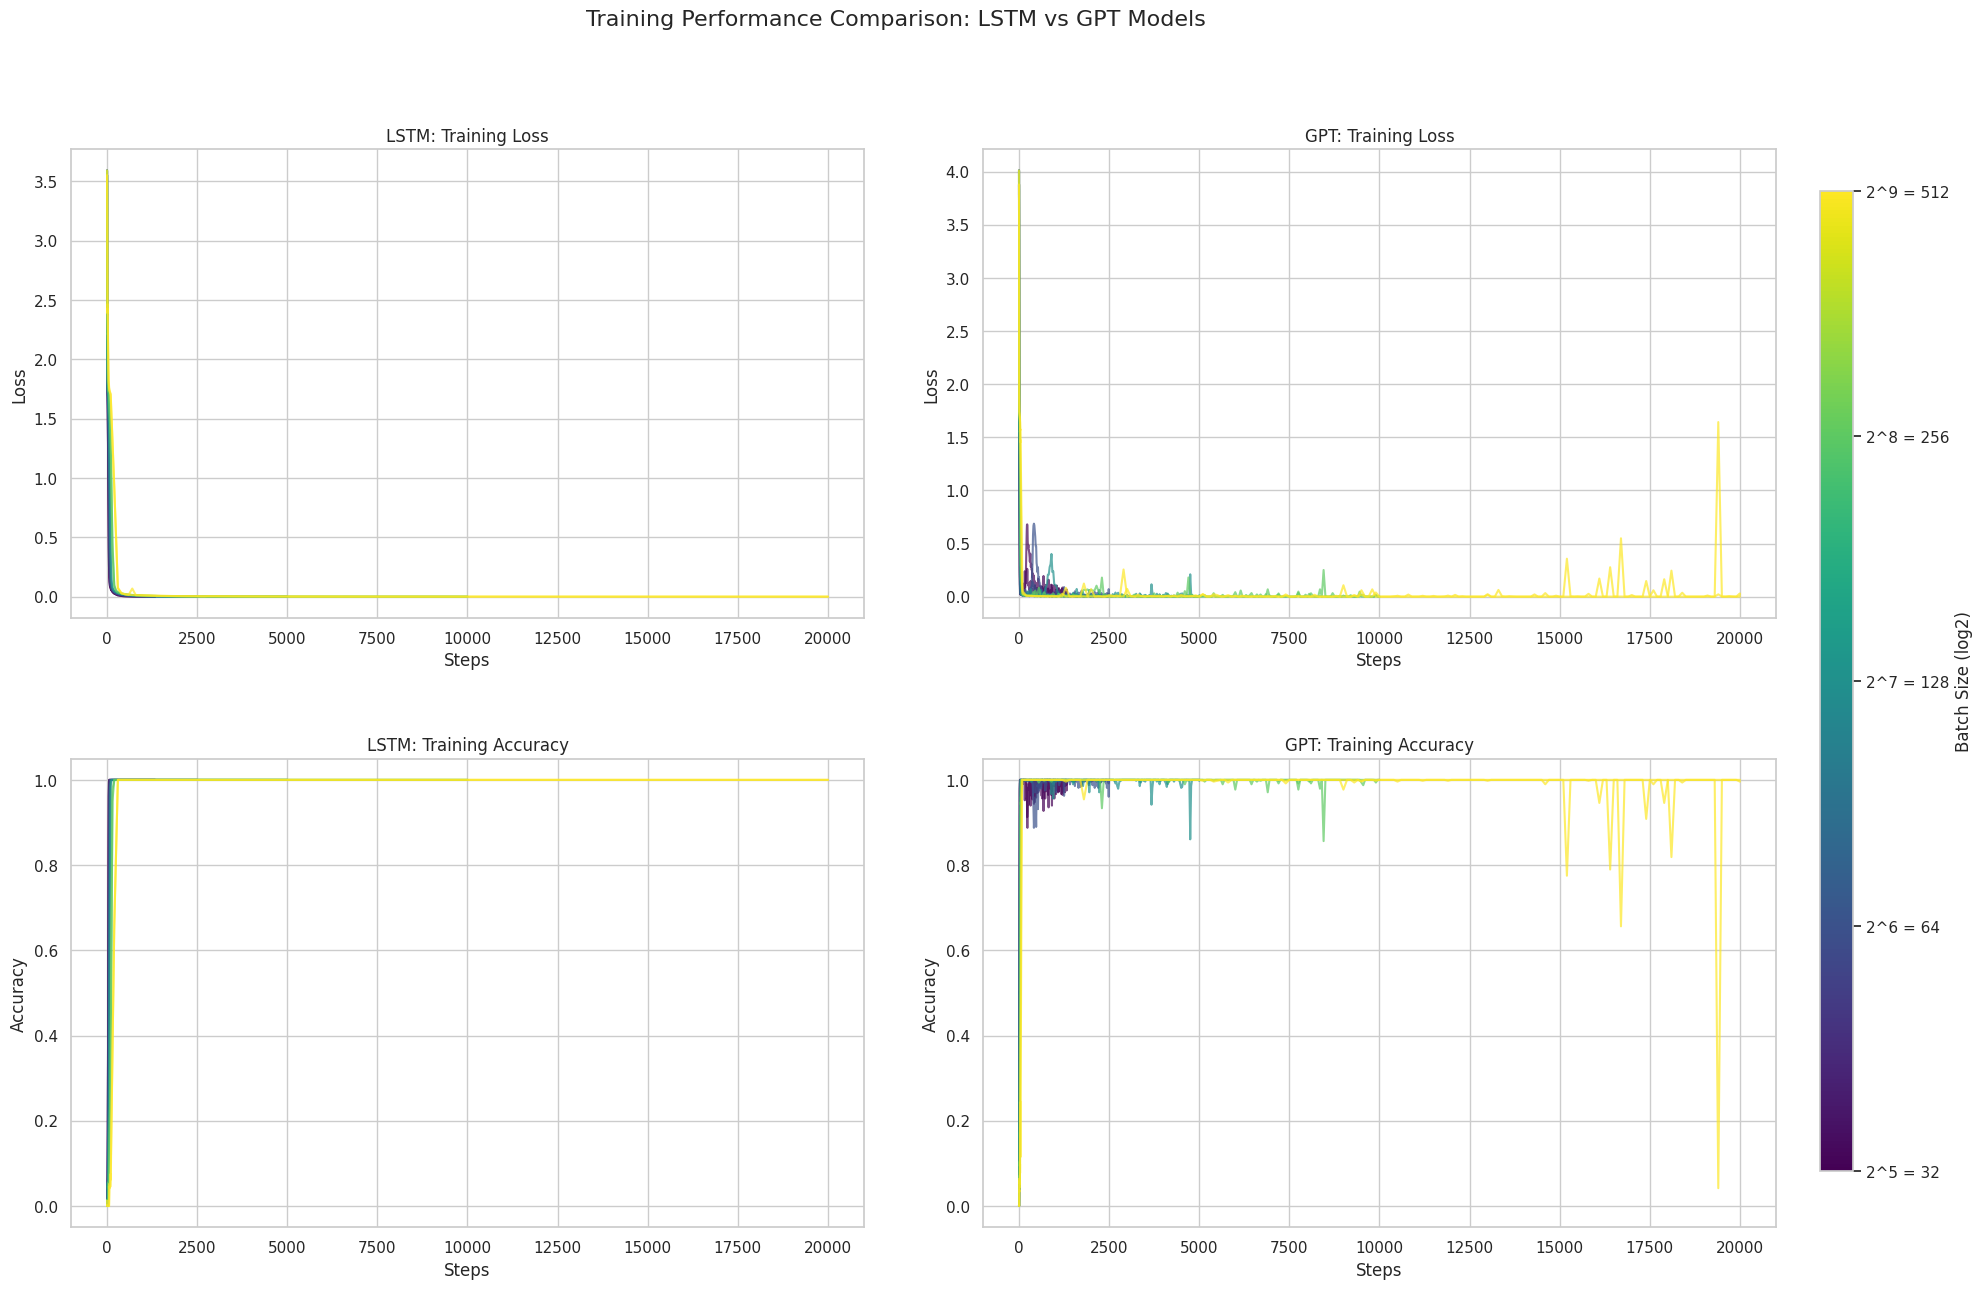

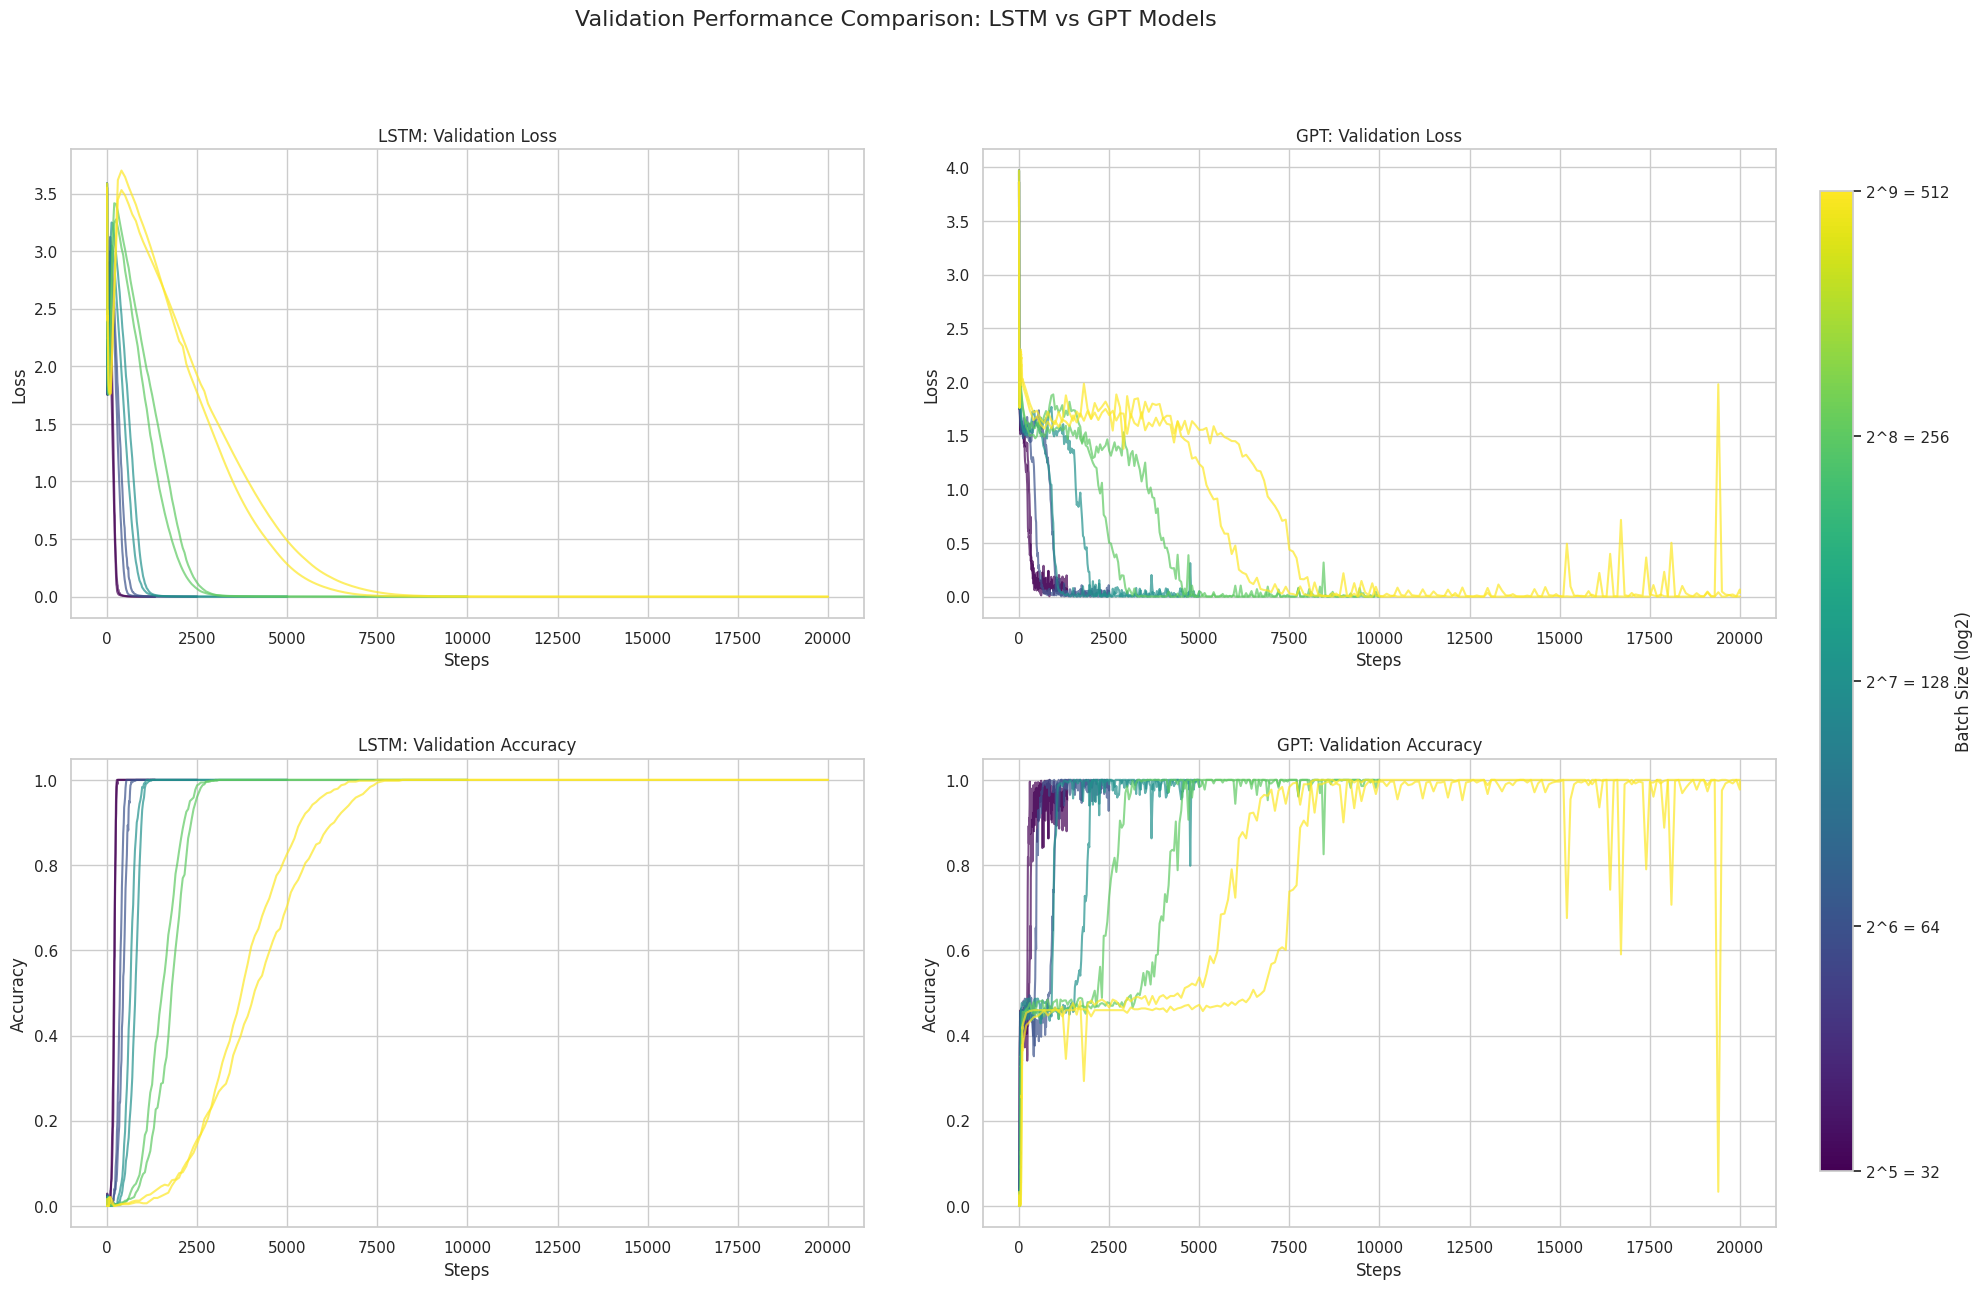

In [36]:
def plot_metrics_separate_train_val():
    """Plot training and validation curves in separate graphs, with model comparison side by side"""
    # Create two figures: one for training, one for validation
    # Each figure will have LSTM and GPT side by side

    # Figure 1: Training metrics (loss and accuracy)
    fig_train = plt.figure(figsize=(22, 14))
    gs_train = fig_train.add_gridspec(2, 2, hspace=0.3, wspace=0.15)
    ax_train_lstm_loss = fig_train.add_subplot(gs_train[0, 0])
    ax_train_gpt_loss = fig_train.add_subplot(gs_train[0, 1])
    ax_train_lstm_acc = fig_train.add_subplot(gs_train[1, 0])
    ax_train_gpt_acc = fig_train.add_subplot(gs_train[1, 1])

    # Figure 2: Validation metrics (loss and accuracy)
    fig_val = plt.figure(figsize=(22, 14))
    gs_val = fig_val.add_gridspec(2, 2, hspace=0.3, wspace=0.15)
    ax_val_lstm_loss = fig_val.add_subplot(gs_val[0, 0])
    ax_val_gpt_loss = fig_val.add_subplot(gs_val[0, 1])
    ax_val_lstm_acc = fig_val.add_subplot(gs_val[1, 0])
    ax_val_gpt_acc = fig_val.add_subplot(gs_val[1, 1])

    # Create a color map
    cmap = plt.cm.viridis
    colors = cmap(np.linspace(0, 1, len(batch_sizes)))

    # Store line objects for custom legend
    lstm_lines = []
    gpt_lines = []

    # Process LSTM data
    for i, (b, log_b, color) in enumerate(zip(batch_sizes, log2_batch_sizes, colors)):
        for run_idx in range(len(model_data['lstm']['file_paths'][b])):
            key = (b, run_idx)
            if key in model_data['lstm']['raw_metrics']:
                metrics = model_data['lstm']['raw_metrics'][key]
                steps = metrics['steps']

                # Plot training metrics
                line_train_loss, = ax_train_lstm_loss.plot(steps, metrics['train_loss'],
                                              linestyle='-', alpha=0.7,
                                              color=color)
                ax_train_lstm_acc.plot(steps, metrics['train_acc'],
                              linestyle='-', alpha=0.7,
                              color=color)

                # Plot validation metrics
                line_val_loss, = ax_val_lstm_loss.plot(steps, metrics['val_loss'],
                                            linestyle='-', alpha=0.7,
                                            color=color)
                ax_val_lstm_acc.plot(steps, metrics['val_acc'],
                            linestyle='-', alpha=0.7,
                            color=color)

                # Store lines for legend from the first run
                if run_idx == 0:
                    lstm_lines.append(line_train_loss)

    # Process GPT data
    for i, (b, log_b, color) in enumerate(zip(batch_sizes, log2_batch_sizes, colors)):
        for run_idx in range(len(model_data['gpt']['file_paths'][b])):
            key = (b, run_idx)
            if key in model_data['gpt']['raw_metrics']:
                metrics = model_data['gpt']['raw_metrics'][key]
                steps = metrics['steps']

                # Plot training metrics
                line_train_loss, = ax_train_gpt_loss.plot(steps, metrics['train_loss'],
                                            linestyle='-', alpha=0.7,
                                            color=color)
                ax_train_gpt_acc.plot(steps, metrics['train_acc'],
                            linestyle='-', alpha=0.7,
                            color=color)

                # Plot validation metrics
                line_val_loss, = ax_val_gpt_loss.plot(steps, metrics['val_loss'],
                                          linestyle='-', alpha=0.7,
                                          color=color)
                ax_val_gpt_acc.plot(steps, metrics['val_acc'],
                          linestyle='-', alpha=0.7,
                          color=color)

                # Store lines for legend from the first run
                if run_idx == 0:
                    gpt_lines.append(line_train_loss)

    # Configure training figure axes
    for ax, title in zip(
        [ax_train_lstm_loss, ax_train_gpt_loss, ax_train_lstm_acc, ax_train_gpt_acc],
        ["LSTM: Training Loss", "GPT: Training Loss",
         "LSTM: Training Accuracy", "GPT: Training Accuracy"]
    ):
        ax.set_xlabel('Steps')
        ax.set_title(title)

    ax_train_lstm_loss.set_ylabel('Loss')
    ax_train_gpt_loss.set_ylabel('Loss')
    ax_train_lstm_acc.set_ylabel('Accuracy')
    ax_train_gpt_acc.set_ylabel('Accuracy')

    # Configure validation figure axes
    for ax, title in zip(
        [ax_val_lstm_loss, ax_val_gpt_loss, ax_val_lstm_acc, ax_val_gpt_acc],
        ["LSTM: Validation Loss", "GPT: Validation Loss",
         "LSTM: Validation Accuracy", "GPT: Validation Accuracy"]
    ):
        ax.set_xlabel('Steps')
        ax.set_title(title)

    ax_val_lstm_loss.set_ylabel('Loss')
    ax_val_gpt_loss.set_ylabel('Loss')
    ax_val_lstm_acc.set_ylabel('Accuracy')
    ax_val_gpt_acc.set_ylabel('Accuracy')

    # Add color gradient colorbar for batch sizes - using log2 scale
    sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(min(log2_batch_sizes), max(log2_batch_sizes)))
    sm.set_array([])

    # Add colorbar to both figures
    for fig in [fig_train, fig_val]:
        cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])  # [left, bottom, width, height]
        cbar = fig.colorbar(sm, cax=cbar_ax)
        cbar.set_label('Batch Size (log2)')
        cbar.set_ticks(log2_batch_sizes)
        cbar.set_ticklabels([f'2^{log_b} = {b}' for log_b, b in zip(log2_batch_sizes, batch_sizes)])

    # Set titles
    fig_train.suptitle('Training Performance Comparison: LSTM vs GPT Models', fontsize=16)
    fig_val.suptitle('Validation Performance Comparison: LSTM vs GPT Models', fontsize=16)

    # Adjust layouts
    fig_train.tight_layout(rect=[0, 0, 0.91, 0.95])
    fig_val.tight_layout(rect=[0, 0, 0.91, 0.95])

    plt.show()

# Generate plots
plot_metrics_separate_train_val()

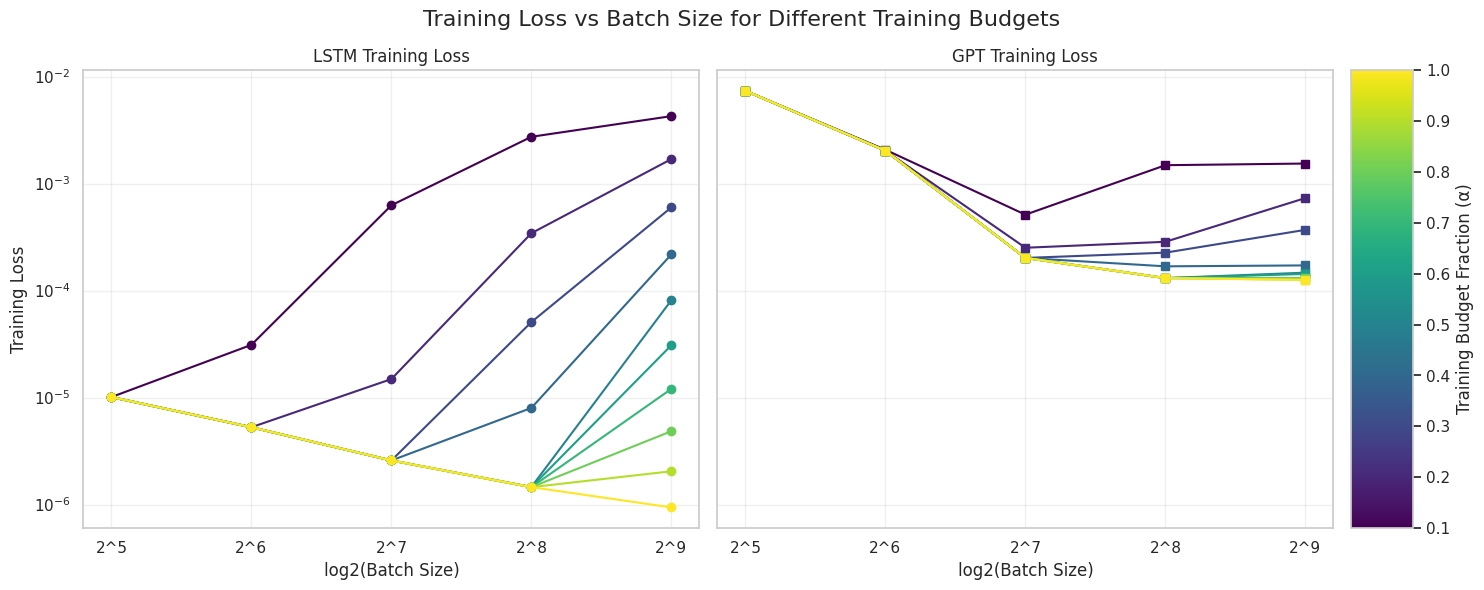

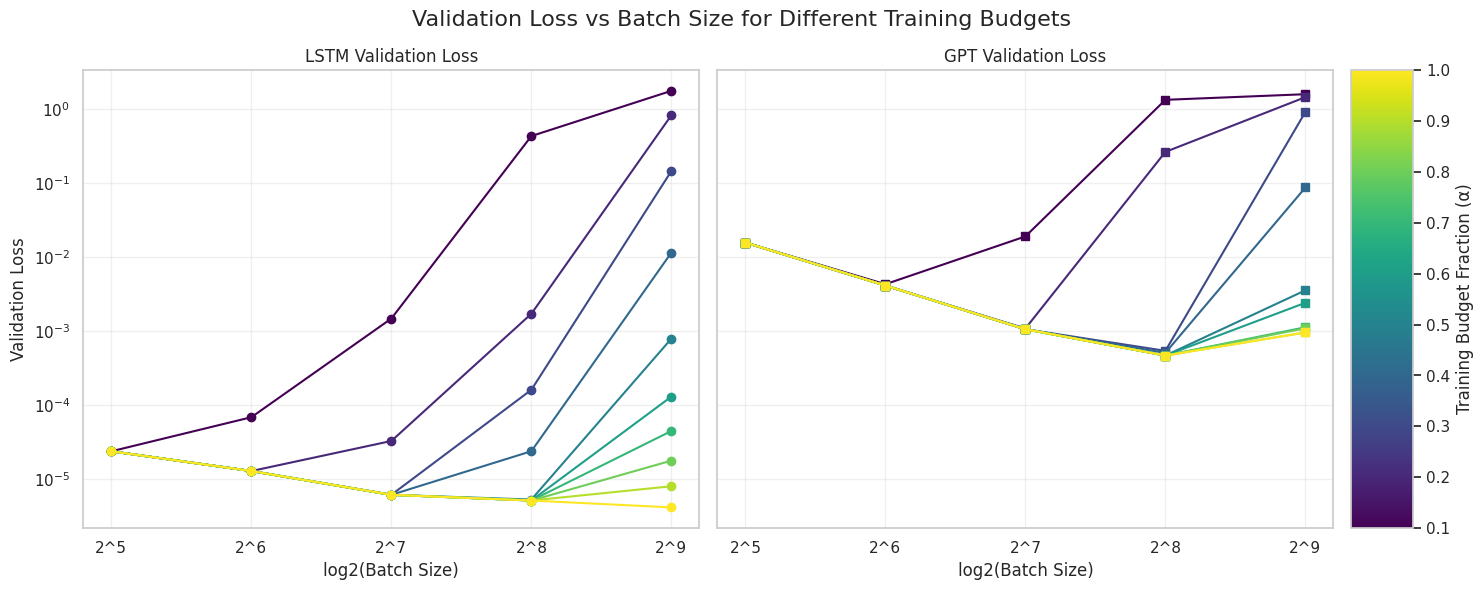

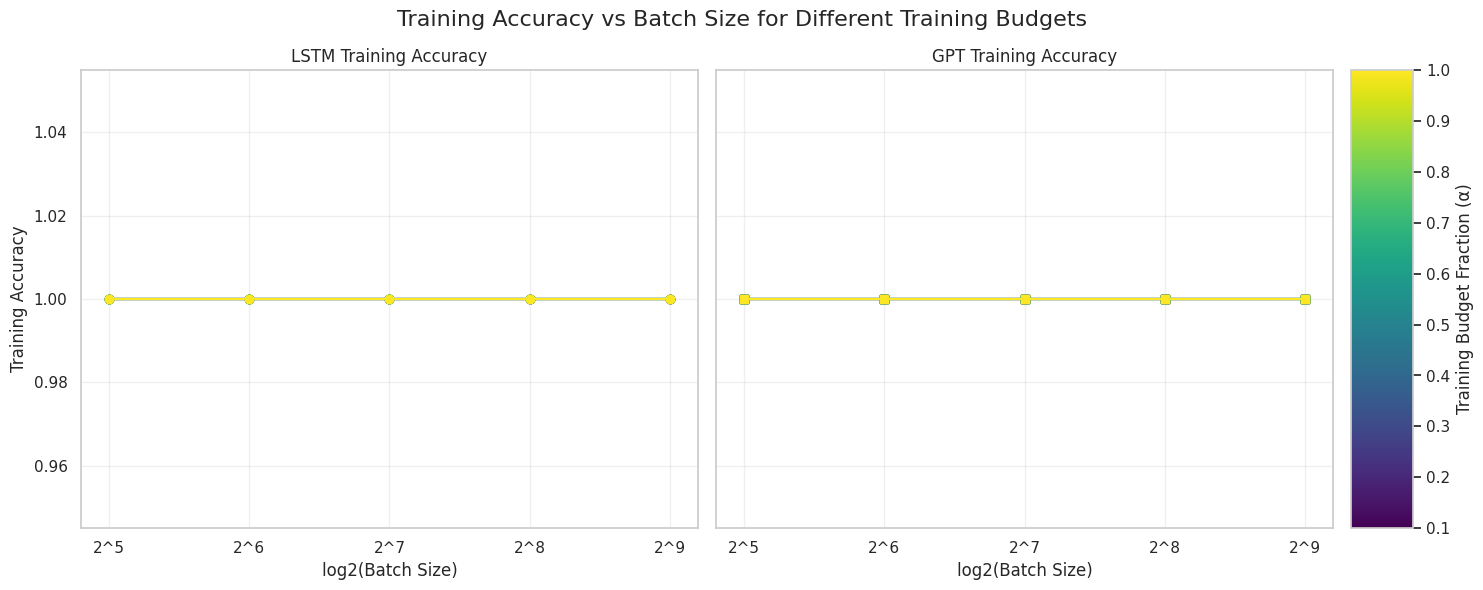

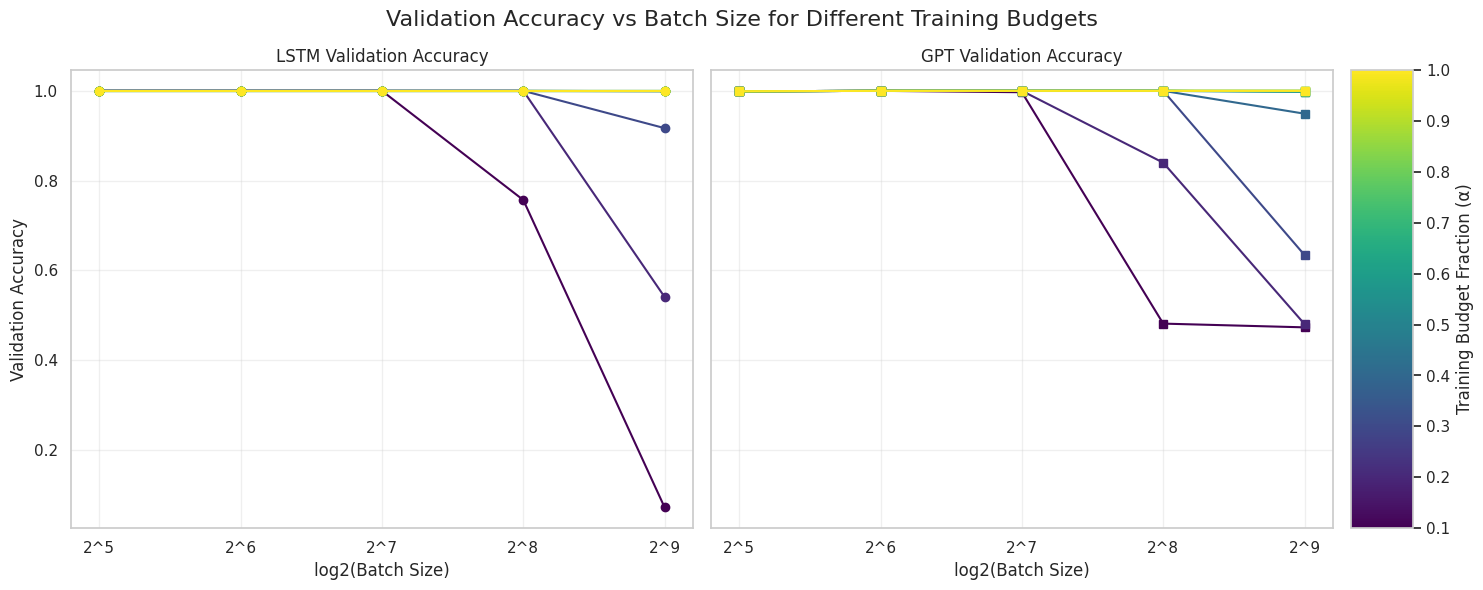

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
from matplotlib.gridspec import GridSpec

# Configuration
batch_sizes = [32, 64, 128, 256, 512]  # 2^5 to 2^9
log2_batch_sizes = [int(np.log2(b)) for b in batch_sizes]
alphas = np.linspace(0.1, 1.0, 10)  # 0.1 to 1.0 in 0.1 increments
T_total = 20000  # Total training steps (T)
metrics = ['train_loss', 'val_loss', 'train_acc', 'val_acc']

# Create a color map for alphas
cmap = plt.cm.viridis
alpha_colors = cmap(np.linspace(0, 1, len(alphas)))

def get_extrema_performance(data, T_max):
    """Extract best performance metrics up to T_max steps"""
    metrics = {
        'train_loss': np.inf,
        'val_loss': np.inf,
        'train_acc': -np.inf,
        'val_acc': -np.inf
    }
    steps = data['steps']

    # Find indices where steps <= T_max
    valid_idx = np.where(steps <= T_max)[0]
    if len(valid_idx) == 0:
        return metrics

    # Get the best metrics within the valid range
    metrics['train_loss'] = np.min(data['train_loss'][valid_idx])
    metrics['val_loss'] = np.min(data['val_loss'][valid_idx])
    metrics['train_acc'] = np.max(data['train_acc'][valid_idx])
    metrics['val_acc'] = np.max(data['val_acc'][valid_idx])

    return metrics

# Initialize storage for performance metrics
performance_data = {
    'lstm': {
        'train_loss': np.zeros((len(batch_sizes), len(alphas))),
        'val_loss': np.zeros((len(batch_sizes), len(alphas))),
        'train_acc': np.zeros((len(batch_sizes), len(alphas))),
        'val_acc': np.zeros((len(batch_sizes), len(alphas)))
    },
    'gpt': {
        'train_loss': np.zeros((len(batch_sizes), len(alphas))),
        'val_loss': np.zeros((len(batch_sizes), len(alphas))),
        'train_acc': np.zeros((len(batch_sizes), len(alphas))),
        'val_acc': np.zeros((len(batch_sizes), len(alphas)))
    }
}

# Process data for each model, batch size, and alpha
for model_type in ['lstm', 'gpt']:
    for b_idx, b in enumerate(batch_sizes):
        # Get all runs for this batch size
        runs = [key for key in model_data[model_type]['raw_metrics'].keys() if key[0] == b]

        for alpha_idx, alpha in enumerate(alphas):
            T_max = int(alpha * T_total)
            temp_metrics = {
                'train_loss': [],
                'val_loss': [],
                'train_acc': [],
                'val_acc': []
            }

            # Collect metrics from all runs
            for run in runs:
                metrics = get_extrema_performance(model_data[model_type]['raw_metrics'][run], T_max)
                for m in temp_metrics.keys():
                    temp_metrics[m].append(metrics[m])

            # Average across runs
            for m in temp_metrics.keys():
                if temp_metrics[m]:  # Only if we have data
                    performance_data[model_type][m][b_idx, alpha_idx] = np.mean(temp_metrics[m])

# Create improved side-by-side plots for each metric
def plot_metric_side_by_side(metric_name, ylabel, log_y=False):
    """Plot side-by-side comparison of a metric across batch sizes and alphas"""
    fig = plt.figure(figsize=(15, 6))
    gs = GridSpec(1, 3, width_ratios=[1, 1, 0.1])

    ax_lstm = fig.add_subplot(gs[0])
    ax_gpt = fig.add_subplot(gs[1], sharey=ax_lstm)
    cax = fig.add_subplot(gs[2])  # For colorbar

    # Plot LSTM
    for alpha_idx, alpha in enumerate(alphas):
        color = alpha_colors[alpha_idx]
        lstm_vals = performance_data['lstm'][metric_name][:, alpha_idx]
        ax_lstm.plot(log2_batch_sizes, lstm_vals,
                     marker='o', linestyle='-', color=color)

    # Plot GPT
    for alpha_idx, alpha in enumerate(alphas):
        color = alpha_colors[alpha_idx]
        gpt_vals = performance_data['gpt'][metric_name][:, alpha_idx]
        ax_gpt.plot(log2_batch_sizes, gpt_vals,
                    marker='s', linestyle='-', color=color)

    # Configure LSTM plot
    ax_lstm.set_xlabel('log2(Batch Size)')
    ax_lstm.set_ylabel(ylabel)
    ax_lstm.set_title(f'LSTM {ylabel}')
    ax_lstm.set_xticks(log2_batch_sizes)
    ax_lstm.set_xticklabels([f'2^{log_b}' for log_b in log2_batch_sizes])
    ax_lstm.grid(True, alpha=0.3)

    # Configure GPT plot
    ax_gpt.set_xlabel('log2(Batch Size)')
    ax_gpt.set_title(f'GPT {ylabel}')
    ax_gpt.set_xticks(log2_batch_sizes)
    ax_gpt.set_xticklabels([f'2^{log_b}' for log_b in log2_batch_sizes])
    ax_gpt.grid(True, alpha=0.3)
    plt.setp(ax_gpt.get_yticklabels(), visible=False)  # Hide y-tick labels for GPT plot

    if log_y:
        ax_lstm.set_yscale('log')
        ax_gpt.set_yscale('log')

    # Add colorbar for alpha values
    sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(min(alphas), max(alphas)))
    sm.set_array([])
    cbar = plt.colorbar(sm, cax=cax)
    cbar.set_label('Training Budget Fraction (α)')

    # Add a common title
    fig.suptitle(f'{ylabel} vs Batch Size for Different Training Budgets', fontsize=16)

    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    return fig

# Generate all plots
metrics_config = [
    ('train_loss', 'Training Loss', True),
    ('val_loss', 'Validation Loss', True),
    ('train_acc', 'Training Accuracy', False),
    ('val_acc', 'Validation Accuracy', False)
]

for metric, label, use_log in metrics_config:
    fig = plot_metric_side_by_side(metric, label, log_y=use_log)
    plt.show()

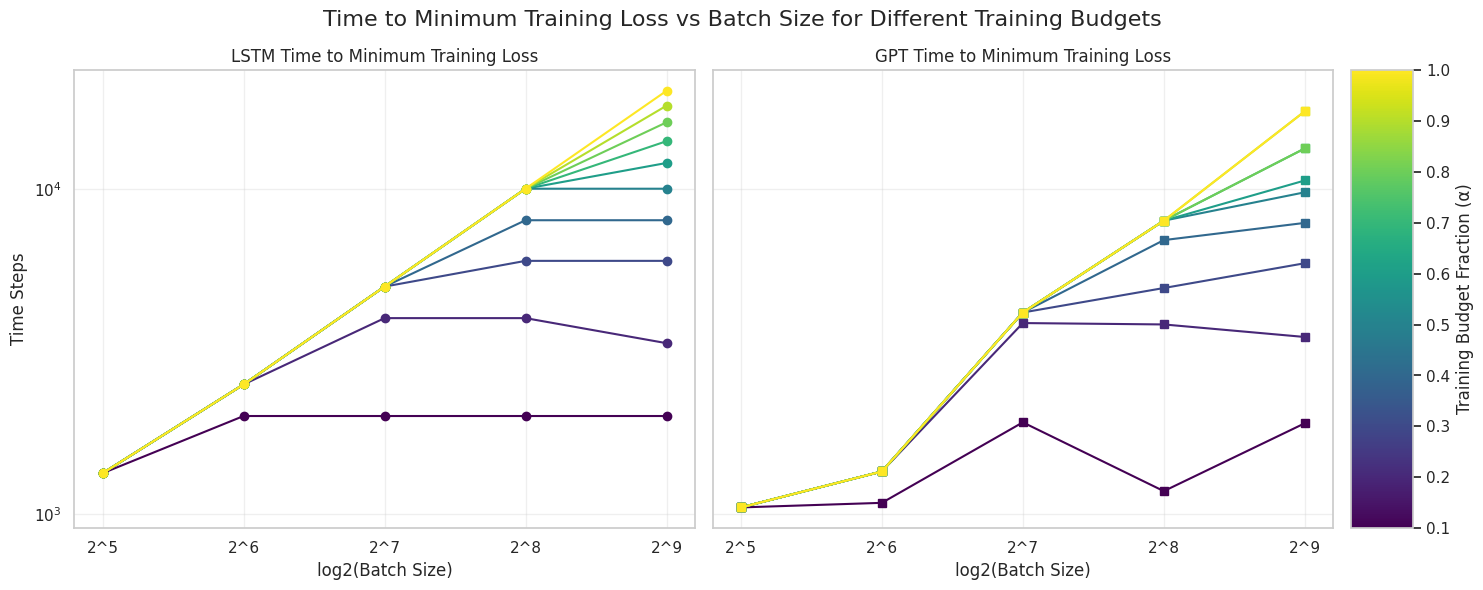

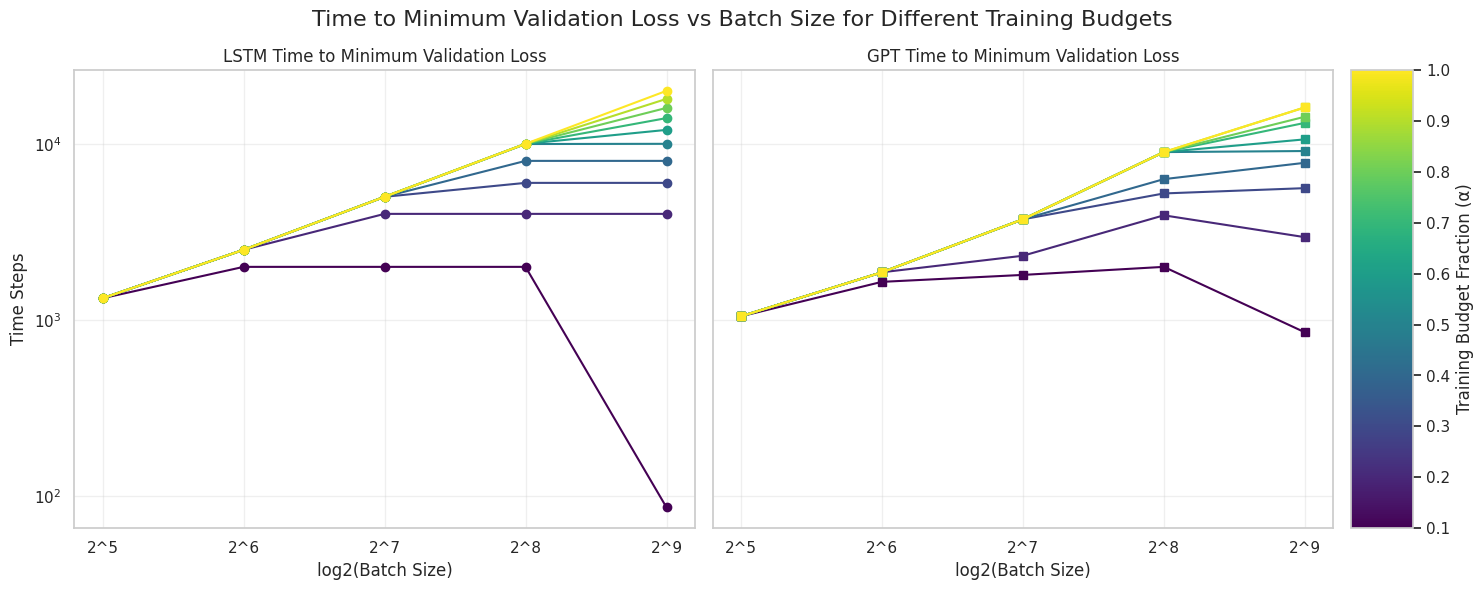

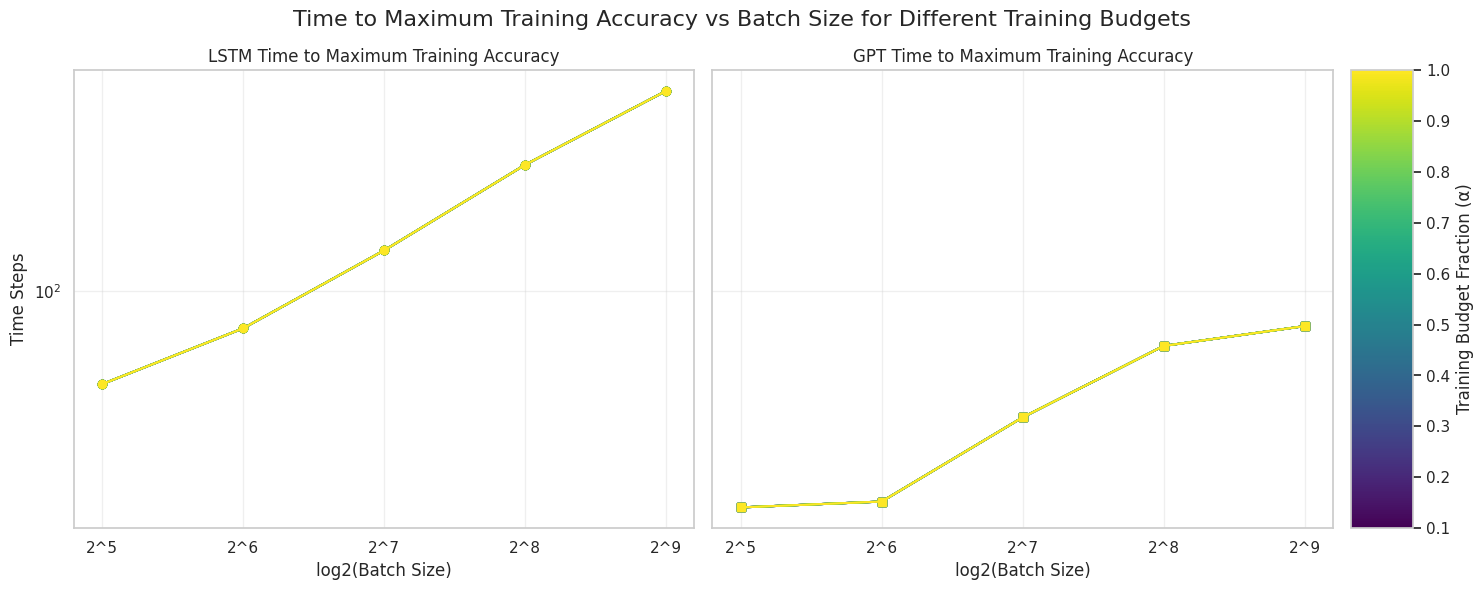

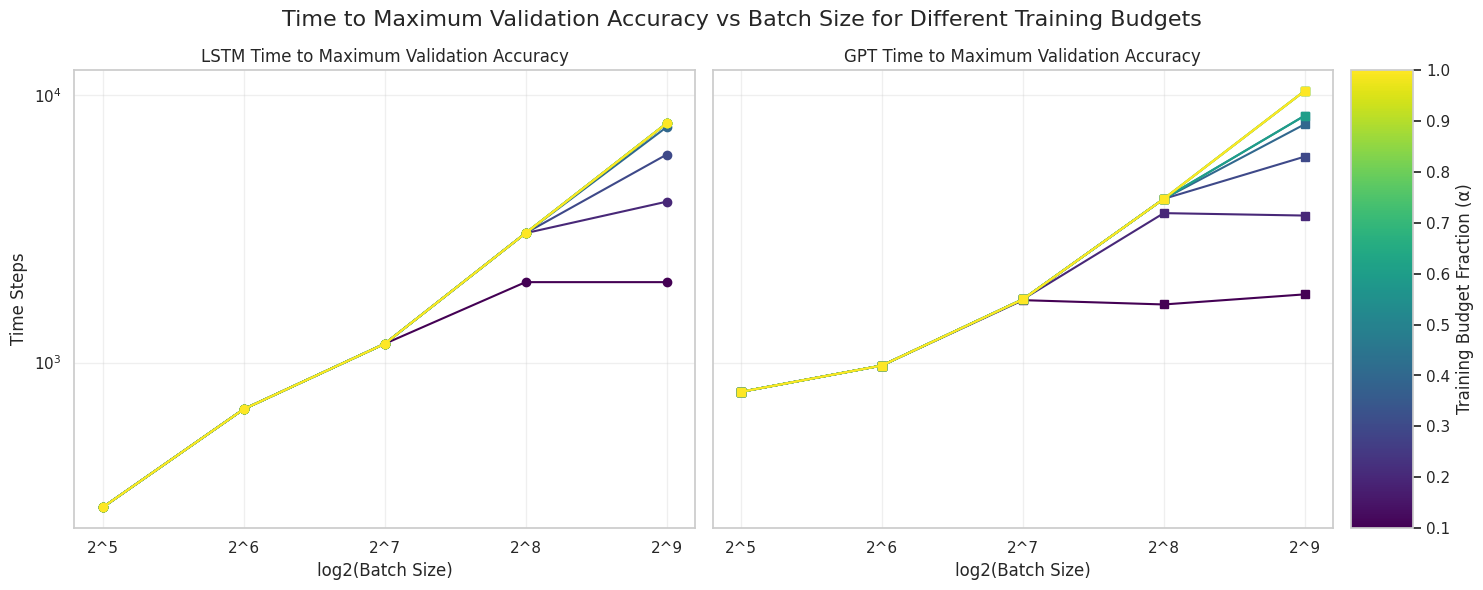

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
from matplotlib.gridspec import GridSpec

# Configuration
batch_sizes = [32, 64, 128, 256, 512]  # 2^5 to 2^9
log2_batch_sizes = [int(np.log2(b)) for b in batch_sizes]
alphas = np.linspace(0.1, 1.0, 10)  # 0.1 to 1.0 in 0.1 increments
T_total = 20000  # Total training steps (T)

# Create a color map for alphas
cmap = plt.cm.viridis
alpha_colors = cmap(np.linspace(0, 1, len(alphas)))

def get_time_to_optimum(data, metric_name):
    """Find the time step where the model reaches its optimum performance

    For loss metrics (lower is better): Find time to minimum loss
    For accuracy metrics (higher is better): Find time to maximum accuracy
    """
    steps = data['steps']
    metric_values = data[metric_name]

    if metric_name.endswith('loss'):  # Loss metrics - lower is better
        optimum_idx = np.argmin(metric_values)
    else:  # Accuracy metrics - higher is better
        optimum_idx = np.argmax(metric_values)

    # Return the step count at which optimum was reached
    return steps[optimum_idx]

# Initialize storage for time-to-optimum data
time_to_optimum = {
    'lstm': {
        'time_to_min_train_loss': np.zeros((len(batch_sizes), len(alphas))),
        'time_to_min_val_loss': np.zeros((len(batch_sizes), len(alphas))),
        'time_to_max_train_acc': np.zeros((len(batch_sizes), len(alphas))),
        'time_to_max_val_acc': np.zeros((len(batch_sizes), len(alphas)))
    },
    'gpt': {
        'time_to_min_train_loss': np.zeros((len(batch_sizes), len(alphas))),
        'time_to_min_val_loss': np.zeros((len(batch_sizes), len(alphas))),
        'time_to_max_train_acc': np.zeros((len(batch_sizes), len(alphas))),
        'time_to_max_val_acc': np.zeros((len(batch_sizes), len(alphas)))
    }
}

# Define the metrics mapping
metric_mapping = {
    'time_to_min_train_loss': 'train_loss',
    'time_to_min_val_loss': 'val_loss',
    'time_to_max_train_acc': 'train_acc',
    'time_to_max_val_acc': 'val_acc'
}

# Process data for each model, batch size, and alpha
for model_type in ['lstm', 'gpt']:
    for b_idx, b in enumerate(batch_sizes):
        # Get all runs for this batch size
        runs = [key for key in model_data[model_type]['raw_metrics'].keys() if key[0] == b]

        for alpha_idx, alpha in enumerate(alphas):
            T_max = int(alpha * T_total)

            # We'll store time-to-optimum for each metric
            time_metrics = {
                'time_to_min_train_loss': [],
                'time_to_min_val_loss': [],
                'time_to_max_train_acc': [],
                'time_to_max_val_acc': []
            }

            # Collect metrics from all runs
            for run in runs:
                run_data = model_data[model_type]['raw_metrics'][run]

                # Extract valid timesteps (up to T_max)
                valid_steps = run_data['steps'] <= T_max

                if not any(valid_steps):
                    continue

                # Create truncated data with steps up to T_max
                truncated_data = {
                    'steps': run_data['steps'][valid_steps],
                    'train_loss': run_data['train_loss'][valid_steps],
                    'val_loss': run_data['val_loss'][valid_steps],
                    'train_acc': run_data['train_acc'][valid_steps],
                    'val_acc': run_data['val_acc'][valid_steps]
                }

                # Calculate time to optimum for each metric
                for time_metric, base_metric in metric_mapping.items():
                    optimum_time = get_time_to_optimum(truncated_data, base_metric)
                    time_metrics[time_metric].append(optimum_time)

            # Average across runs
            for time_metric in time_metrics.keys():
                if time_metrics[time_metric]:  # Only if we have data
                    time_to_optimum[model_type][time_metric][b_idx, alpha_idx] = np.mean(time_metrics[time_metric])

# Create side-by-side plots for time-to-optimum metrics
def plot_time_to_optimum_side_by_side(time_metric, ylabel, display_name):
    """Plot side-by-side comparison of time to optimum across batch sizes and alphas"""
    fig = plt.figure(figsize=(15, 6))
    gs = GridSpec(1, 3, width_ratios=[1, 1, 0.1])

    ax_lstm = fig.add_subplot(gs[0])
    ax_gpt = fig.add_subplot(gs[1], sharey=ax_lstm)
    cax = fig.add_subplot(gs[2])  # For colorbar

    # Plot LSTM
    for alpha_idx, alpha in enumerate(alphas):
        color = alpha_colors[alpha_idx]
        lstm_vals = time_to_optimum['lstm'][time_metric][:, alpha_idx]
        ax_lstm.plot(log2_batch_sizes, lstm_vals,
                     marker='o', linestyle='-', color=color)

    # Plot GPT
    for alpha_idx, alpha in enumerate(alphas):
        color = alpha_colors[alpha_idx]
        gpt_vals = time_to_optimum['gpt'][time_metric][:, alpha_idx]
        ax_gpt.plot(log2_batch_sizes, gpt_vals,
                    marker='s', linestyle='-', color=color)

    # Configure LSTM plot
    ax_lstm.set_xlabel('log2(Batch Size)')
    ax_lstm.set_ylabel(ylabel)
    ax_lstm.set_title(f'LSTM {display_name}')
    ax_lstm.set_xticks(log2_batch_sizes)
    ax_lstm.set_xticklabels([f'2^{log_b}' for log_b in log2_batch_sizes])
    ax_lstm.grid(True, alpha=0.3)

    # Configure GPT plot
    ax_gpt.set_xlabel('log2(Batch Size)')
    ax_gpt.set_title(f'GPT {display_name}')
    ax_gpt.set_xticks(log2_batch_sizes)
    ax_gpt.set_xticklabels([f'2^{log_b}' for log_b in log2_batch_sizes])
    ax_gpt.grid(True, alpha=0.3)
    plt.setp(ax_gpt.get_yticklabels(), visible=False)  # Hide y-tick labels for GPT plot

    # Set y-axis to log scale (often helpful for time metrics)
    ax_lstm.set_yscale('log')
    ax_gpt.set_yscale('log')

    # Add colorbar for alpha values
    sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(min(alphas), max(alphas)))
    sm.set_array([])
    cbar = plt.colorbar(sm, cax=cax)
    cbar.set_label('Training Budget Fraction (α)')

    # Add a common title
    fig.suptitle(f'{display_name} vs Batch Size for Different Training Budgets', fontsize=16)

    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    return fig

# Generate all time-to-optimum plots
time_metrics_config = [
    ('time_to_min_train_loss', 'Time Steps', 'Time to Minimum Training Loss'),
    ('time_to_min_val_loss', 'Time Steps', 'Time to Minimum Validation Loss'),
    ('time_to_max_train_acc', 'Time Steps', 'Time to Maximum Training Accuracy'),
    ('time_to_max_val_acc', 'Time Steps', 'Time to Maximum Validation Accuracy')
]

for metric, label, display_name in time_metrics_config:
    fig = plot_time_to_optimum_side_by_side(metric, label, display_name)
    plt.show()